Dane datasetu pochodzą jedynie z miasta Los Angeles, co nie było stwierdzone na stronie

In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.5 MB 11.2 MB/s eta 0:00:01
   ---------------------------------- ----- 10.0/11.5 MB 34.5 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 34.3 MB/s eta 0:00:00
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Crime_Data_from_2020_to_Present.csv", converters={'TIME OCC': str}, index_col=False)

df["DATE OCC"] = pd.to_datetime(df["DATE OCC"].str.split(" ").str[0] + df["TIME OCC"], format='%m/%d/%Y%H%M')
df["Date Rptd"] = pd.to_datetime(df["Date Rptd"].str.split(" ").str[0], format='%m/%d/%Y')
df.drop(['DR_NO', 'TIME OCC', 'Part 1-2', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Status', 'Status Desc', 'Cross Street', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Mocodes'], axis=1, inplace=True)

display(df)

Date Rptd            DATE OCC  AREA  AREA NAME  Rpt Dist No  Crm Cd  \
0      2020-03-01 2020-03-01 21:30:00     7   Wilshire          784     510   
1      2020-02-09 2020-02-08 18:00:00     1    Central          182     330   
2      2020-11-11 2020-11-04 17:00:00     3  Southwest          356     480   
3      2023-05-10 2020-03-10 20:37:00     9   Van Nuys          964     343   
4      2022-08-18 2020-08-17 12:00:00     6  Hollywood          666     354   
...           ...                 ...   ...        ...          ...     ...   
982633 2024-08-20 2024-08-17 23:00:00    20    Olympic         2033     341   
982634 2024-07-24 2024-07-23 14:00:00     7   Wilshire          788     510   
982635 2024-01-15 2024-01-15 01:00:00     1    Central          101     745   
982636 2024-04-24 2024-04-24 15:00:00     3  Southwest          358     230   
982637 2024-08-13 2024-08-12 23:00:00     9   Van Nuys          914     510   

                                              Crm Cd Desc  Vict Age Vict Sex  \
0                                        VEHICLE - STOLEN         0        M   
1                                   BURGLARY FROM VEHICLE        47        M   
2                                           BIKE - STOLEN        19        X   
3                SHOPLIFTING-GRAND THEFT ($950.01 & OVER)        19        M   
4                                       THEFT OF IDENTITY        28        M   
...                                                   ...       ...      ...   
982633  THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...        36        F   
982634                                   VEHICLE - STOLEN         0      NaN   
982635           VANDALISM - MISDEAMEANOR ($399 OR UNDER)         0        X   
982636     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT        70        F   
982637                                   VEHICLE - STOLEN         0      NaN   

       Vict Descent                                  LOCATION      LAT  \
0                 O   1900 S  LONGWOOD                     AV  34.0375   
1                 O   1000 S  FLOWER                       ST  34.0444   
2                 X   1400 W  37TH                         ST  34.0210   
3                 O  14000    RIVERSIDE                    DR  34.1576   
4                 H                         1900    TRANSIENT  34.0944   
...             ...                                       ...      ...   
982633            C   3700    WILSHIRE                     BL  34.0617   
982634          NaN   4000 W  23RD                         ST  34.0362   
982635            X   1300 W  SUNSET                       BL  34.0685   
982636            W           FLOWER                       ST  34.0215   
982637          NaN   6900    VESPER                       AV  34.1961   

             LON  
0      -118.3506  
1      -118.2628  
2      -118.3002  
3      -118.4387  
4      -118.3277  
...          ...  
982633 -118.3066  
982634 -118.3284  
982635 -118.2460  
982636 -118.2868  
982637 -118.4510  

[982638 rows x 13 columns]

In [3]:
sorted_df = df.sort_values(by=["DATE OCC"]).reset_index(drop=True)
display(sorted_df)

Date Rptd            DATE OCC  AREA    AREA NAME  Rpt Dist No  Crm Cd  \
0      2022-08-24 2020-01-01 00:01:00     5       Harbor          507     956   
1      2023-02-10 2020-01-01 00:01:00    14      Pacific         1457     812   
2      2020-06-20 2020-01-01 00:01:00    12  77th Street         1267     420   
3      2020-03-15 2020-01-01 00:01:00    20      Olympic         2045     950   
4      2021-08-09 2020-01-01 00:01:00    18    Southeast         1844     812   
...           ...                 ...   ...          ...          ...     ...   
982633 2024-09-30 2024-09-30 16:17:00     5       Harbor          518     442   
982634 2024-09-30 2024-09-30 16:40:00    13       Newton         1313     888   
982635 2024-09-30 2024-09-30 17:00:00     6    Hollywood          645     440   
982636 2024-09-30 2024-09-30 19:12:00     3    Southwest          338     522   
982637 2024-09-30 2024-09-30 21:00:00    12  77th Street         1265     510   

                                              Crm Cd Desc  Vict Age Vict Sex  \
0                 LETTERS, LEWD  -  TELEPHONE CALLS, LEWD        24        F   
1       CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...        14        M   
2         THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)         0      NaN   
3       DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $...         0        X   
4       CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...         9        F   
...                                                   ...       ...      ...   
982633           SHOPLIFTING - PETTY THEFT ($950 & UNDER)         0      NaN   
982634                                        TRESPASSING         0      NaN   
982635                 THEFT PLAIN - PETTY ($950 & UNDER)         0      NaN   
982636  VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...         0      NaN   
982637                                   VEHICLE - STOLEN         0      NaN   

       Vict Descent                                  LOCATION      LAT  \
0                 B  22400    DENKER                       AV  33.8234   
1                 W  12400    ALLIN                        ST  33.9884   
2               NaN    300 W  84TH                         PL  33.9624   
3                 X   3200 W  8TH                          ST  34.0577   
4                 H    900 E  113TH                        ST  33.9319   
...             ...                                       ...      ...   
982633          NaN    200 E  PACIFIC COAST                HY  33.7980   
982634          NaN    700 E  WASHINGTON                   BL  34.0276   
982635          NaN   7000    HOLLYWOOD                    BL  34.1015   
982636          NaN    900 W  JEFFERSON                    BL  34.0242   
982637          NaN   1500 W  84TH                         PL  33.9618   

             LON  
0      -118.3038  
1      -118.4177  
2      -118.2783  
3      -118.2976  
4      -118.2556  
...          ...  
982633 -118.2604  
982634 -118.2574  
982635 -118.3417  
982636 -118.2849  
982637 -118.3025  

[982638 rows x 13 columns]

In [4]:
import datetime as dt

years = [2020, 2021, 2022, 2023, 2024]

crime_by_year = [df[df["DATE OCC"].dt.year == y] for y in years]
print(len(crime_by_year))

5


In [5]:
display(crime_by_year[0])

Date Rptd            DATE OCC  AREA    AREA NAME  Rpt Dist No  Crm Cd  \
0      2020-03-01 2020-03-01 21:30:00     7     Wilshire          784     510   
1      2020-02-09 2020-02-08 18:00:00     1      Central          182     330   
2      2020-11-11 2020-11-04 17:00:00     3    Southwest          356     480   
3      2023-05-10 2020-03-10 20:37:00     9     Van Nuys          964     343   
4      2022-08-18 2020-08-17 12:00:00     6    Hollywood          666     354   
...           ...                 ...   ...          ...          ...     ...   
199791 2024-09-20 2020-03-09 08:00:00     5       Harbor          526     121   
199792 2024-09-17 2020-01-17 16:20:00     6    Hollywood          636     354   
199793 2024-09-20 2020-09-19 11:15:00    17   Devonshire         1701     522   
199794 2024-09-22 2020-02-01 21:10:00     8      West LA          889     354   
199795 2024-09-20 2020-03-20 22:50:00    15  N Hollywood         1585     956   

                                              Crm Cd Desc  Vict Age Vict Sex  \
0                                        VEHICLE - STOLEN         0        M   
1                                   BURGLARY FROM VEHICLE        47        M   
2                                           BIKE - STOLEN        19        X   
3                SHOPLIFTING-GRAND THEFT ($950.01 & OVER)        19        M   
4                                       THEFT OF IDENTITY        28        M   
...                                                   ...       ...      ...   
199791                                     RAPE, FORCIBLE        18        F   
199792                                  THEFT OF IDENTITY        22        M   
199793  VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...         0      NaN   
199794                                  THEFT OF IDENTITY        47        M   
199795            LETTERS, LEWD  -  TELEPHONE CALLS, LEWD        21        F   

       Vict Descent                                  LOCATION      LAT  \
0                 O   1900 S  LONGWOOD                     AV  34.0375   
1                 O   1000 S  FLOWER                       ST  34.0444   
2                 X   1400 W  37TH                         ST  34.0210   
3                 O  14000    RIVERSIDE                    DR  34.1576   
4                 H                         1900    TRANSIENT  34.0944   
...             ...                                       ...      ...   
199791            W    800 N  MARINE                       AV  33.7799   
199792            W   1800    WILCOX                       AV  34.1039   
199793          NaN  20000    RINALDI                      ST  34.2756   
199794            W   8600    GUTHRIE                      AV  34.0407   
199795            W  10900    BLUFFSIDE                    DR  34.1412   

             LON  
0      -118.3506  
1      -118.2628  
2      -118.3002  
3      -118.4387  
4      -118.3277  
...          ...  
199791 -118.2638  
199792 -118.3310  
199793 -118.5702  
199794 -118.3791  
199795 -118.3681  

[199787 rows x 13 columns]

In [6]:
display(crime_by_year[2])

Date Rptd            DATE OCC  AREA    AREA NAME  Rpt Dist No  Crm Cd  \
346864 2022-06-29 2022-06-28 16:00:00     5       Harbor          529     510   
347058 2022-06-25 2022-06-25 12:00:00    19      Mission         1974     510   
347444 2022-10-18 2022-10-18 04:00:00     5       Harbor          506     510   
347639 2022-02-09 2022-02-08 21:40:00    14      Pacific         1483     510   
348410 2022-06-04 2022-06-01 23:00:00     7     Wilshire          706     510   
...           ...                 ...   ...          ...          ...     ...   
644739 2022-12-05 2022-12-01 18:00:00    10  West Valley         1047     331   
644740 2022-02-10 2022-02-09 15:30:00    10  West Valley         1024     510   
644741 2022-02-10 2022-02-08 20:00:00    11    Northeast         1171     510   
644742 2022-02-15 2022-02-14 18:00:00    16     Foothill         1613     331   
644743 2022-12-25 2022-12-25 13:00:00    10  West Valley         1065     626   

                                              Crm Cd Desc  Vict Age Vict Sex  \
346864                                   VEHICLE - STOLEN         0      NaN   
347058                                   VEHICLE - STOLEN         0      NaN   
347444                                   VEHICLE - STOLEN         0      NaN   
347639                                   VEHICLE - STOLEN         0      NaN   
348410                                   VEHICLE - STOLEN         0      NaN   
...                                                   ...       ...      ...   
644739  THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...        68        M   
644740                                   VEHICLE - STOLEN         0      NaN   
644741                                   VEHICLE - STOLEN         0      NaN   
644742  THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...        61        F   
644743                  INTIMATE PARTNER - SIMPLE ASSAULT        33        M   

       Vict Descent                                  LOCATION      LAT  \
346864          NaN    900    BROAD                        AV  33.7813   
347058          NaN   8900    TOBIAS                       AV  34.2318   
347444          NaN   1300 W  218TH                        ST  33.8303   
347639          NaN   8600    RAYFORD                      DR  33.9597   
348410          NaN    800 N  SYCAMORE                     AV  34.0853   
...             ...                                       ...      ...   
644739            W  17200    BURBANK                      BL  34.1722   
644740          NaN  18800    SHERMAN                      WY  34.2011   
644741          NaN   4000    FOUNTAIN                     AV  34.0958   
644742            H  12700    VAN NUYS                     BL  34.2755   
644743            B   5300    NEWCASTLE                    AV  34.1667   

             LON  
346864 -118.2609  
347058 -118.4517  
347444 -118.2996  
347639 -118.4224  
348410 -118.3428  
...          ...  
644739 -118.5077  
644740 -118.5426  
644741 -118.2787  
644742 -118.4092  
644743 -118.5244  

[235152 rows x 13 columns]

In [7]:
display(crime_by_year[3])

Date Rptd            DATE OCC  AREA    AREA NAME  Rpt Dist No  Crm Cd  \
644744 2023-06-17 2023-06-17 11:40:00     6    Hollywood          668     442   
644745 2023-02-12 2023-02-11 16:30:00     1      Central          191     440   
644746 2023-09-19 2023-09-19 10:30:00    15  N Hollywood         1549     230   
644747 2023-04-11 2023-04-10 08:16:00     1      Central          192     331   
644748 2023-12-01 2023-12-01 01:10:00     6    Hollywood          639     626   
...           ...                 ...   ...          ...          ...     ...   
876869 2023-03-22 2023-03-22 10:00:00    16     Foothill         1602     230   
876870 2023-10-02 2023-09-25 22:00:00    17   Devonshire         1798     740   
876871 2023-07-02 2023-07-01 00:01:00     1      Central          154     352   
876872 2023-03-05 2023-03-05 09:00:00     9     Van Nuys          914     745   
876873 2023-11-10 2023-11-09 23:00:00     3    Southwest          395     331   

                                              Crm Cd Desc  Vict Age Vict Sex  \
644744           SHOPLIFTING - PETTY THEFT ($950 & UNDER)         0        X   
644745                 THEFT PLAIN - PETTY ($950 & UNDER)        48        M   
644746     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT        36        F   
644747  THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...        25        F   
644748                  INTIMATE PARTNER - SIMPLE ASSAULT        65        F   
...                                                   ...       ...      ...   
876869     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT        25        F   
876870  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...        44        F   
876871                                         PICKPOCKET        24        F   
876872           VANDALISM - MISDEAMEANOR ($399 OR UNDER)        53        F   
876873  THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...        38        M   

       Vict Descent                                  LOCATION      LAT  \
644744            X   5500 W  SUNSET                       BL  34.0981   
644745            H   1400    WRIGHT                       ST  34.0396   
644746            W           BURBANK                      BL  34.1721   
644747            H   1300 S  FLOWER                       ST  34.0401   
644748            W   5400    RUSSELL                      AV  34.1042   
...             ...                                       ...      ...   
876869            H  12800    FILMORE                      ST  34.2790   
876870            H   8800    HASKELL                      AV  34.2302   
876871            H    500 S  MAIN                         ST  34.0467   
876872            H  14500    HARTLAND                     ST  34.1951   
876873            W   4100 S  HOBART                       BL  34.0091   

             LON  
644744 -118.3092  
644745 -118.2726  
644746 -118.3616  
644747 -118.2669  
644748 -118.3072  
...          ...  
876869 -118.4116  
876870 -118.4764  
876871 -118.2485  
876872 -118.4487  
876873 -118.3078  

[232130 rows x 13 columns]

In [8]:
def create_histogram(count_df, split=[], rows=1, cols=1, title="Histogram"):
    count_df[count_df.columns[0]] = count_df[count_df.columns[0]].astype(str)

    if len(split) > 0:
        num_plots = len(split) + 1


        fig, axs = plt.subplots(rows, cols, figsize=(25, 5 * rows))
        axs = axs.flatten()

        bins = [0] + split + [float('inf')]

        for i in range(num_plots):
            lower_bound = bins[i]
            upper_bound = bins[i + 1]

            filtered_df = count_df[(count_df["Count"] >= lower_bound) & (count_df["Count"] < upper_bound)]

            axs[i].bar(filtered_df[count_df.columns[0]], filtered_df["Count"])
            axs[i].set_xlabel(count_df.columns[0])
            axs[i].set_ylabel("Count")
            axs[i].set_title(f"{title} ({lower_bound} - {upper_bound if upper_bound != float('inf') else 'inf'})")

        plt.tight_layout()
        plt.show()
    else:
        fig, axs = plt.subplots(1, 1, figsize=(25, 5*rows))

        axs.bar(count_df[count_df.columns[0]], count_df["Count"])
        axs.set_xlabel(count_df.columns[0])
        axs.set_ylabel("Count")
        axs.set_title(title)
        plt.tight_layout()
        plt.show()




In [9]:
def count_crime(df):
    res_df = pd.DataFrame()

    for crime in df["Crm Cd"].unique():
      count = df[df["Crm Cd"] == crime]["Crm Cd"].count()
      crime_desc = df[df["Crm Cd"] == crime]["Crm Cd Desc"].unique()
      data = {"Crime Code": crime, "Crime Code Description": crime_desc, "Count": count}

      res_df = pd.concat([res_df, pd.DataFrame(data)], ignore_index=True)
    return res_df.sort_values(by=["Count"], ascending=False).reset_index(drop=True)

Crime Code                             Crime Code Description   Count
0           510                                   VEHICLE - STOLEN  110804
1           624                           BATTERY - SIMPLE ASSAULT   74688
2           330                              BURGLARY FROM VEHICLE   61324
3           354                                  THEFT OF IDENTITY   60867
4           740  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...   59639
..          ...                                                ...     ...
135         904  FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS ...       5
136         906           FIREARMS RESTRAINING ORDER (FIREARMS RO)       4
137         445                 DISHONEST EMPLOYEE ATTEMPTED THEFT       4
138         926                                     TRAIN WRECKING       1
139         453                               DRUNK ROLL - ATTEMPT       1

[140 rows x 3 columns]

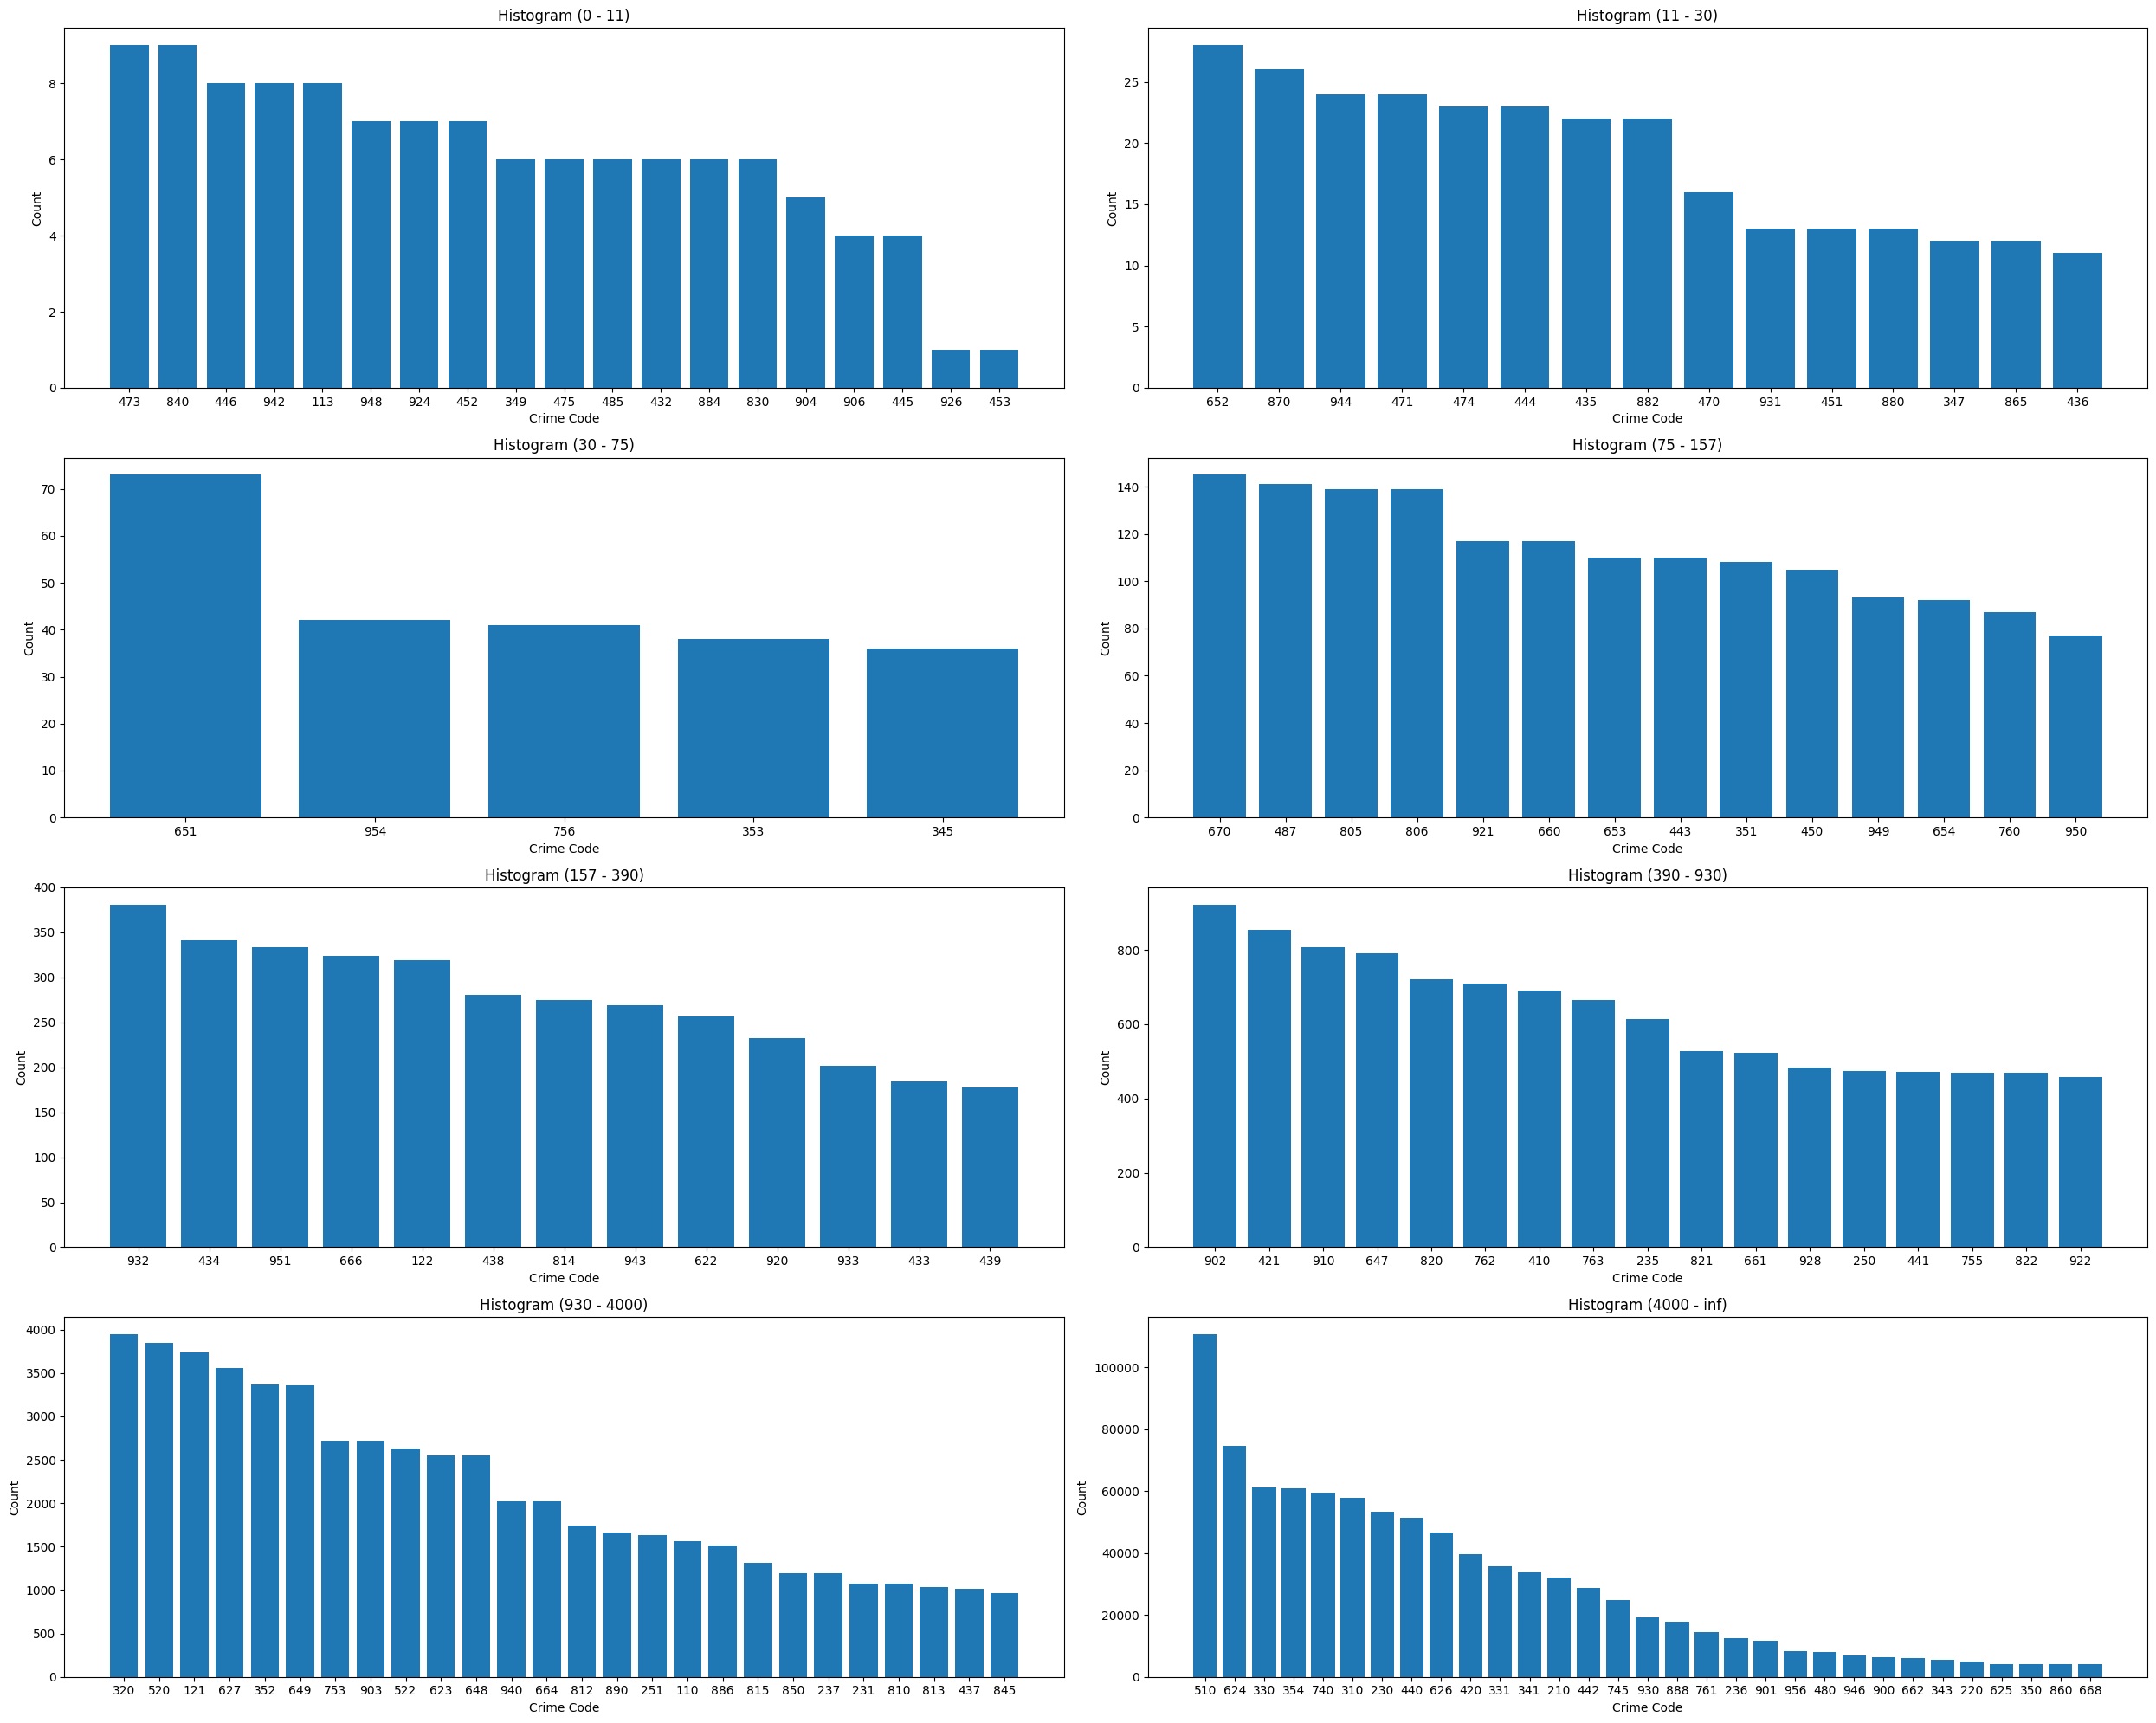

In [10]:
res = count_crime(df)
display(res)
create_histogram(res, [11, 30, 75, 157, 390, 930, 4000], rows=4,cols=2)



Crime Code                             Crime Code Description  Count
0           510                                   VEHICLE - STOLEN  20771
1           624                           BATTERY - SIMPLE ASSAULT  16331
2           740  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  12927
3           310                                           BURGLARY  12837
4           330                              BURGLARY FROM VEHICLE  12714
..          ...                                                ...    ...
124         470            TILL TAP - GRAND THEFT ($950.01 & OVER)      2
125         906           FIREARMS RESTRAINING ORDER (FIREARMS RO)      1
126         942                                            BRIBERY      1
127         349                          GRAND THEFT / AUTO REPAIR      1
128         452                                PICKPOCKET, ATTEMPT      1

[129 rows x 3 columns]

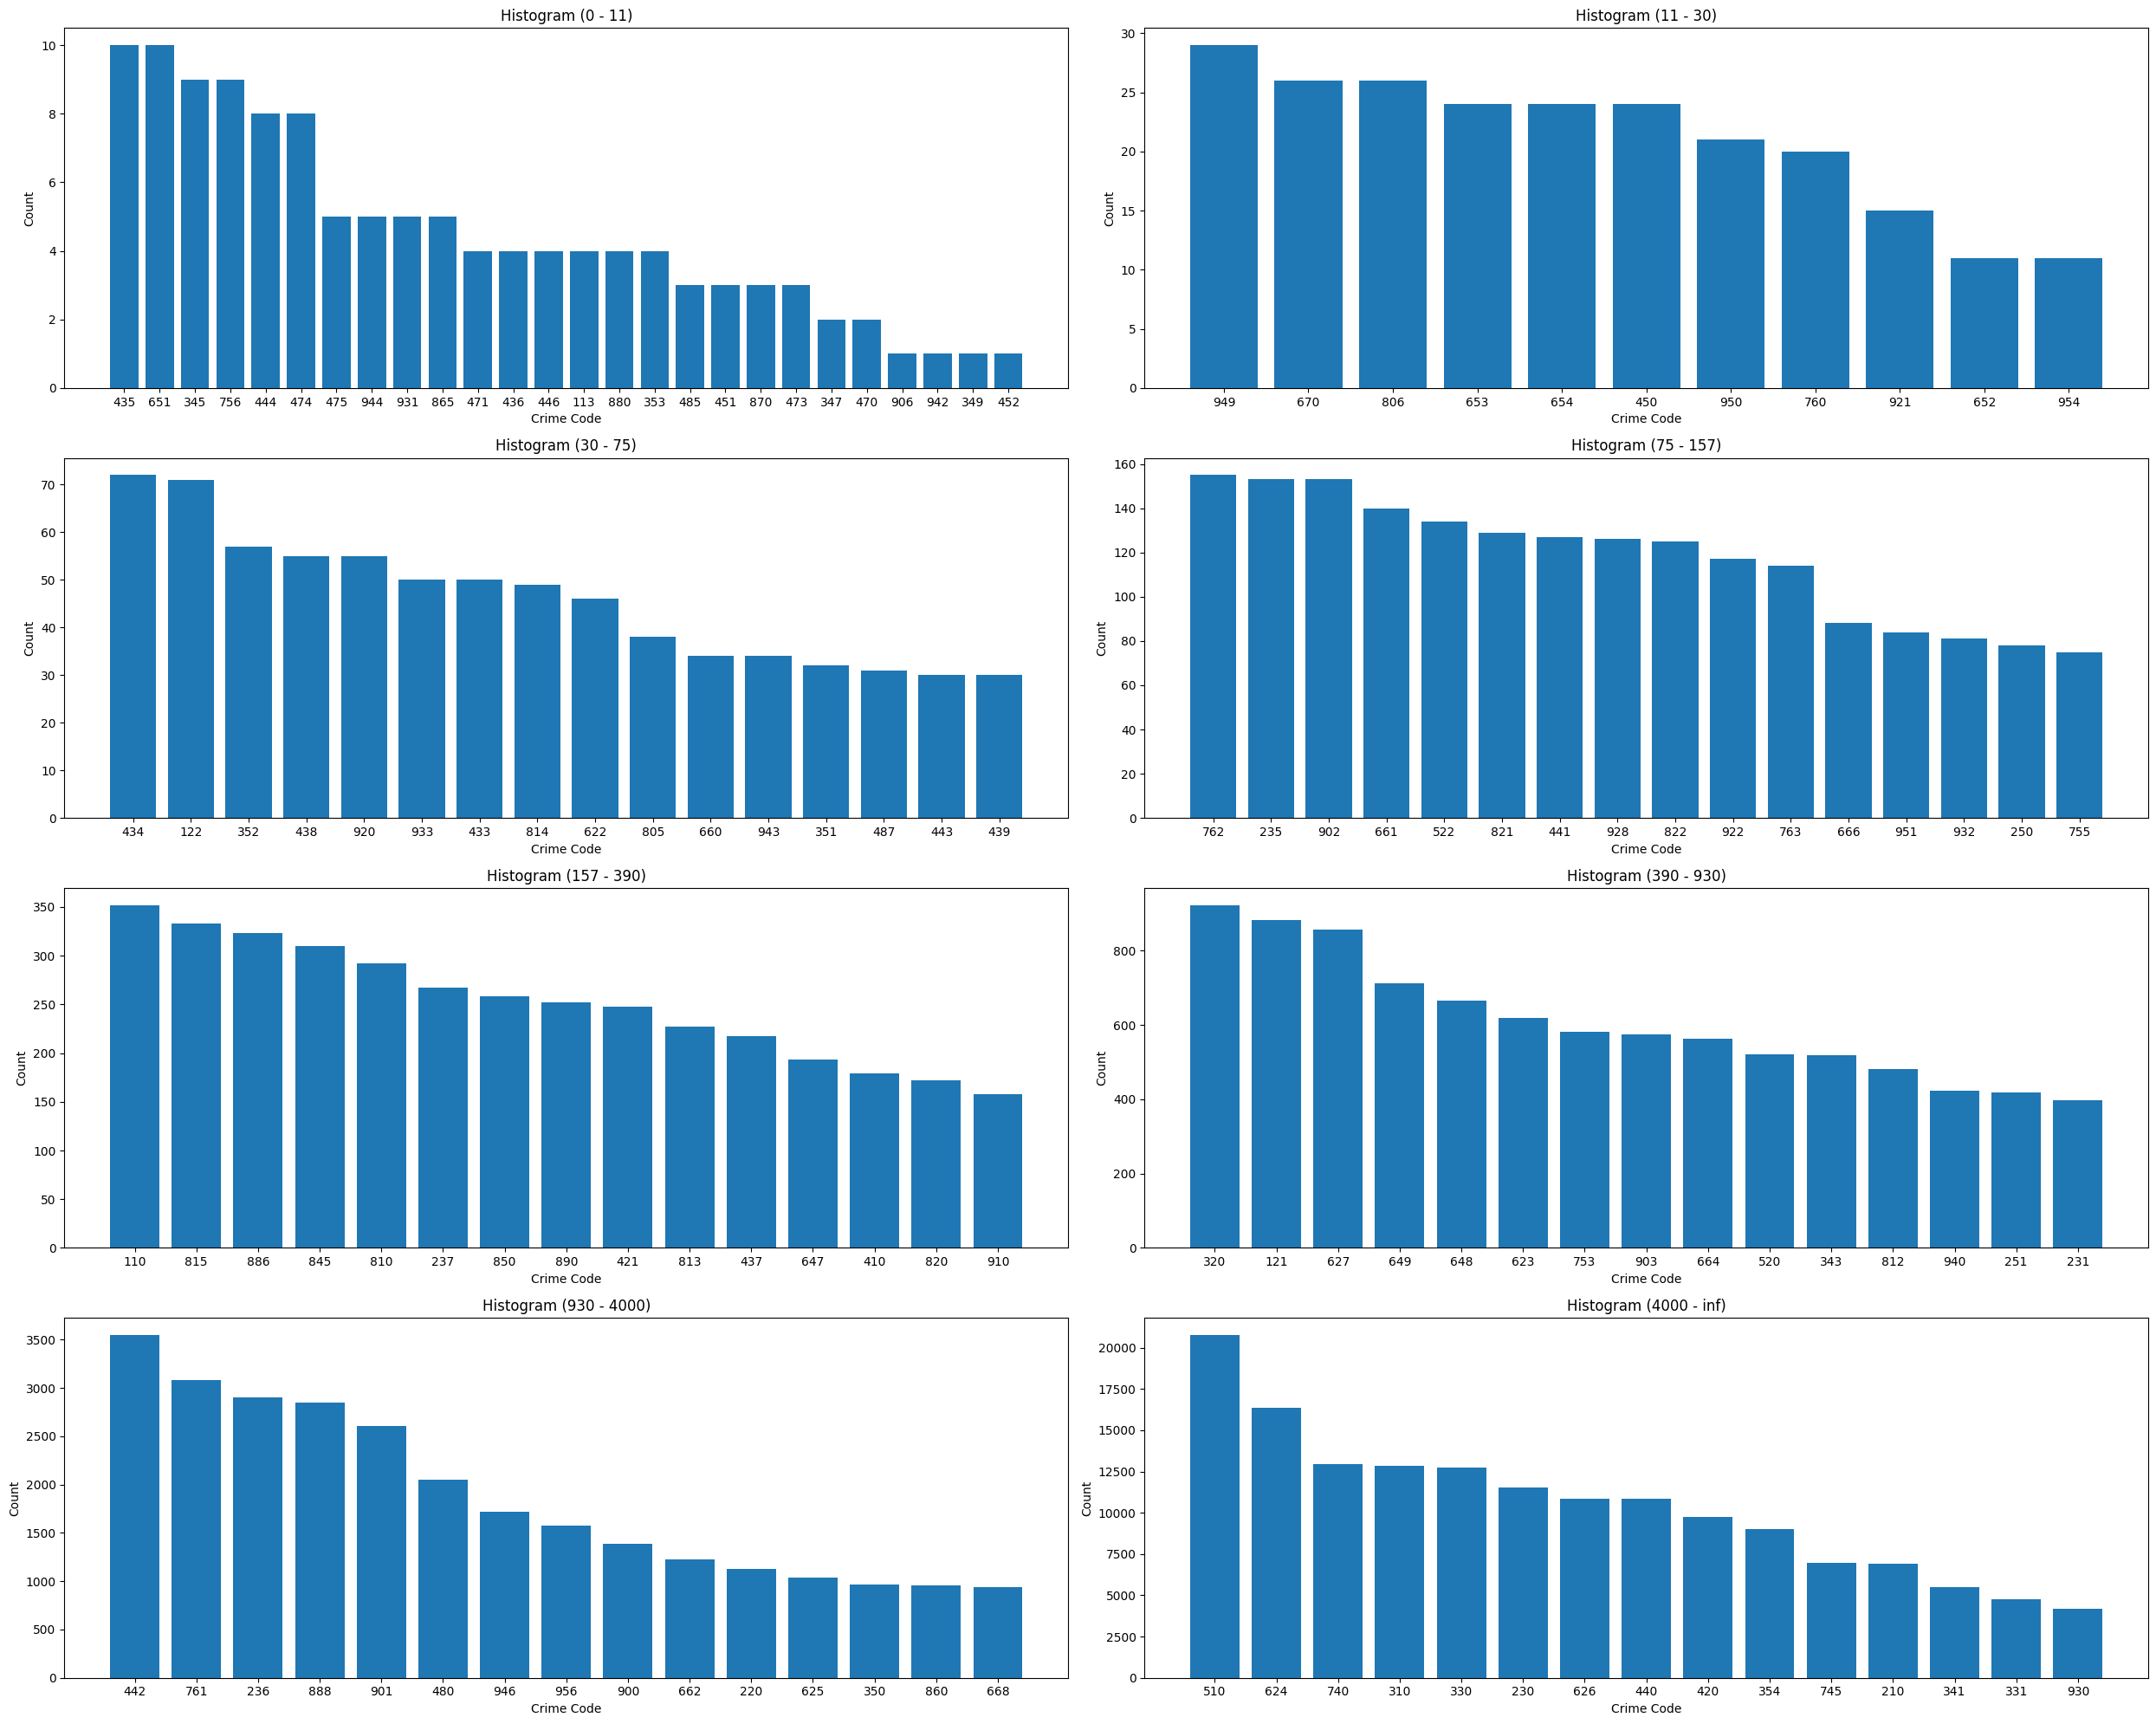

In [11]:
res = count_crime(crime_by_year[0])
display(res)
create_histogram(res, [11, 30, 75, 157, 390, 930, 4000], rows=4,cols=2)

Crime Code                             Crime Code Description  Count
0           510                                   VEHICLE - STOLEN  23683
1           624                           BATTERY - SIMPLE ASSAULT  16199
2           740  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  13681
3           330                              BURGLARY FROM VEHICLE  13478
4           230     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  12739
..          ...                                                ...    ...
128         446                          PETTY THEFT - AUTO REPAIR      2
129         347                      GRAND THEFT / INSURANCE FRAUD      2
130         452                                PICKPOCKET, ATTEMPT      1
131         435                                           LYNCHING      1
132         470            TILL TAP - GRAND THEFT ($950.01 & OVER)      1

[133 rows x 3 columns]

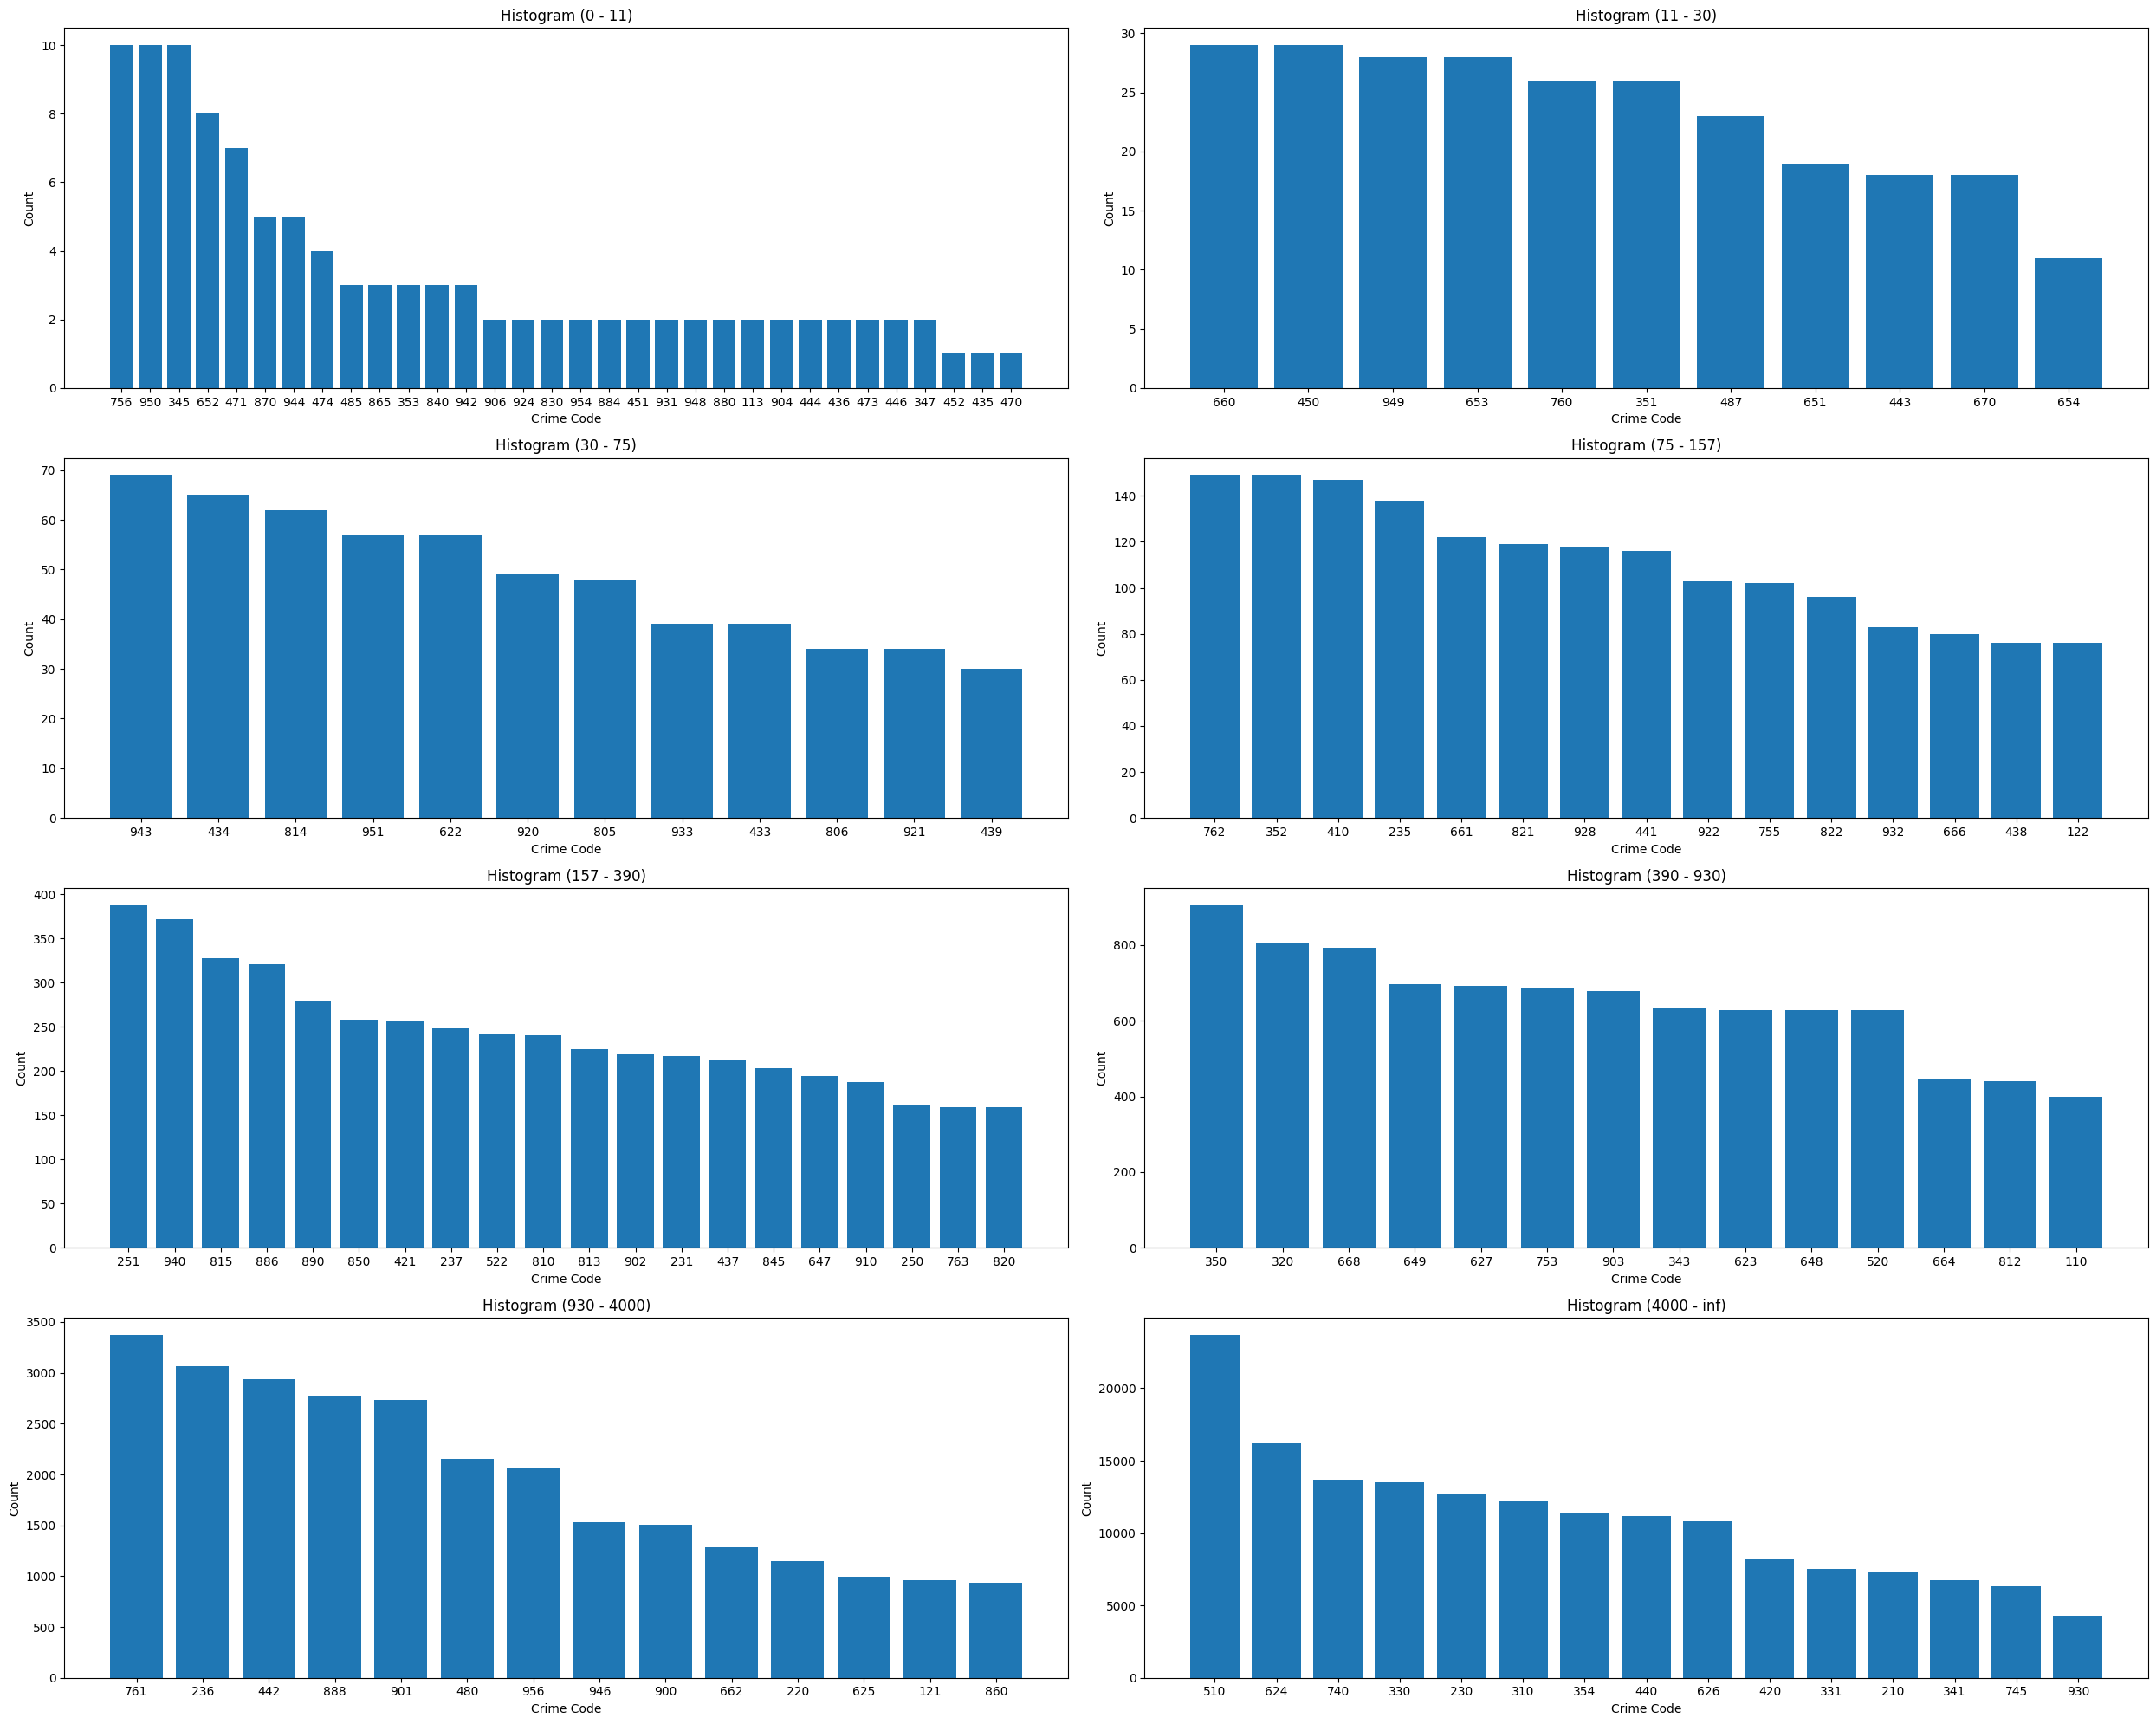

In [12]:
res = count_crime(crime_by_year[1])
display(res)
create_histogram(res, [11, 30, 75, 157, 390, 930, 4000], rows=4,cols=2)

Crime Code                    Crime Code Description  Count
0           510                          VEHICLE - STOLEN  24742
1           354                         THEFT OF IDENTITY  22130
2           624                  BATTERY - SIMPLE ASSAULT  18058
3           330                     BURGLARY FROM VEHICLE  14231
4           310                                  BURGLARY  14069
..          ...                                       ...    ...
129         347             GRAND THEFT / INSURANCE FRAUD      1
130         113                   MANSLAUGHTER, NEGLIGENT      1
131         906  FIREARMS RESTRAINING ORDER (FIREARMS RO)      1
132         652         DOCUMENT WORTHLESS ($200 & UNDER)      1
133         452                       PICKPOCKET, ATTEMPT      1

[134 rows x 3 columns]

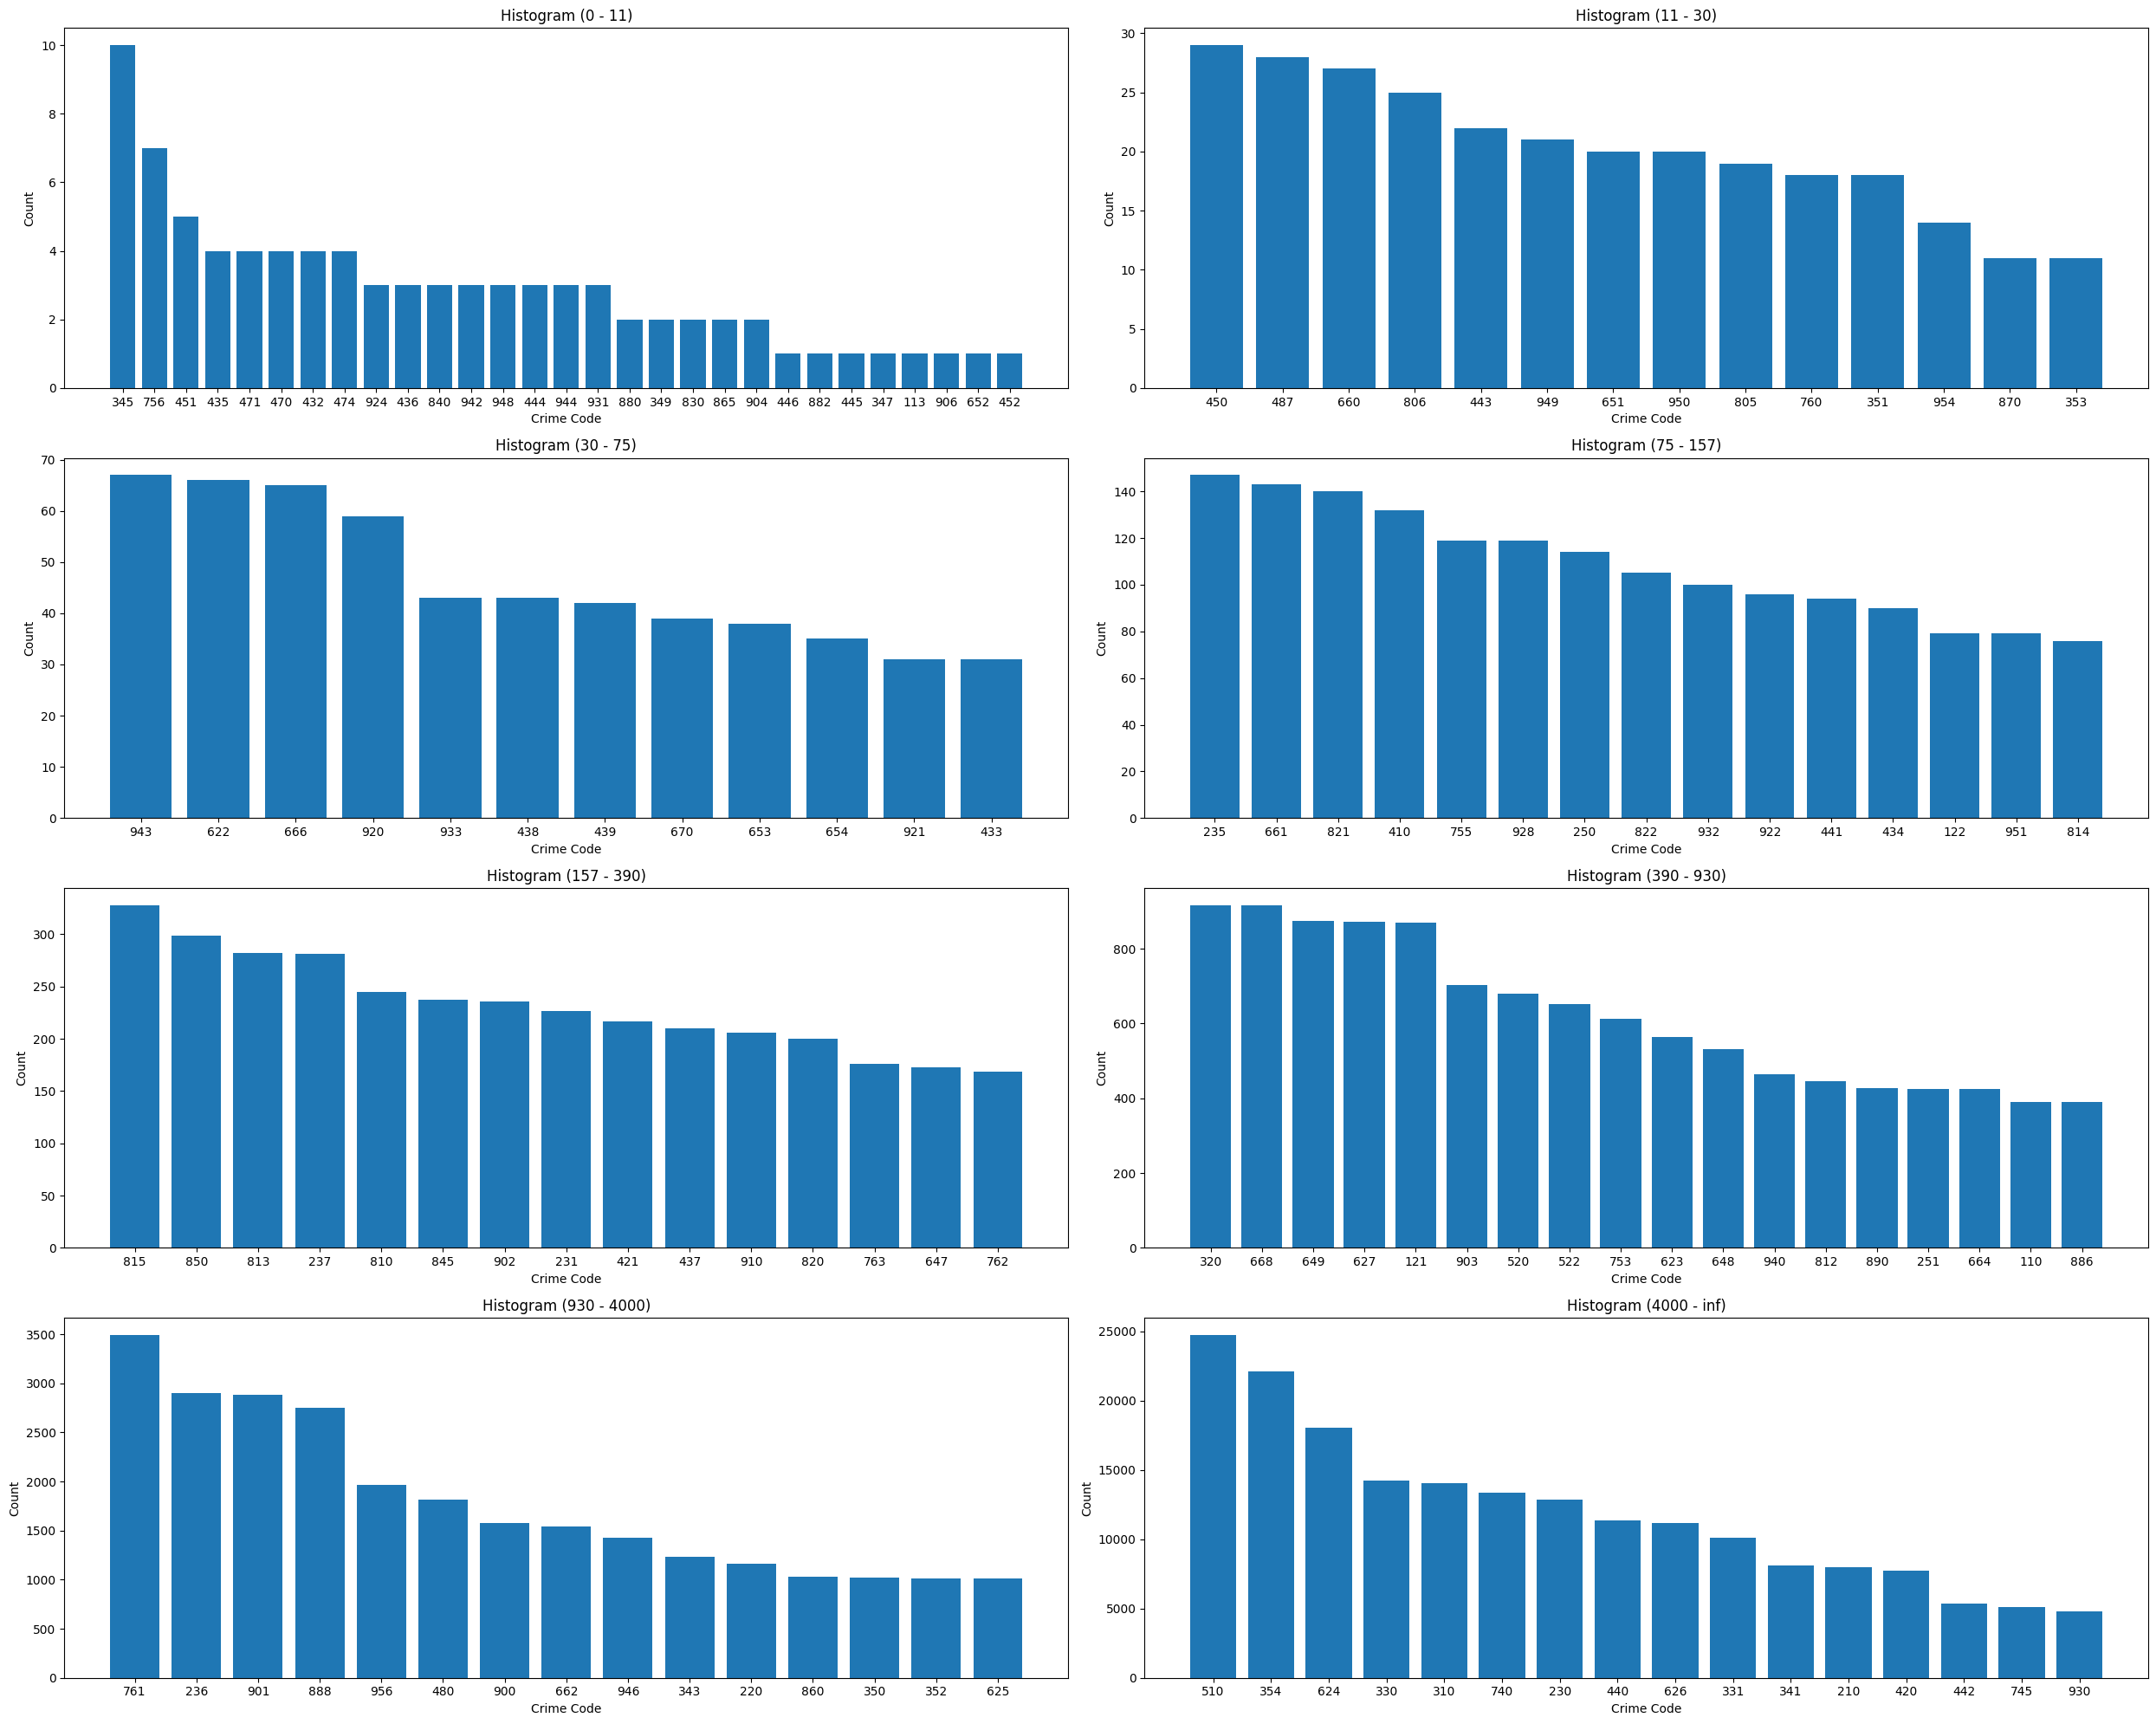

In [13]:
res = count_crime(crime_by_year[2])
display(res)
create_histogram(res, [11, 30, 75, 157, 390, 930, 4000], rows=4,cols=2)

Crime Code                             Crime Code Description  Count
0           510                                   VEHICLE - STOLEN  24464
1           624                           BATTERY - SIMPLE ASSAULT  18834
2           310                                           BURGLARY  14287
3           330                              BURGLARY FROM VEHICLE  13556
4           354                                  THEFT OF IDENTITY  13508
..          ...                                                ...    ...
130         884                                FAILURE TO DISPERSE      1
131         904  FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS ...      1
132         865                                  DRUGS, TO A MINOR      1
133         924                        TELEPHONE PROPERTY - DAMAGE      1
134         446                          PETTY THEFT - AUTO REPAIR      1

[135 rows x 3 columns]

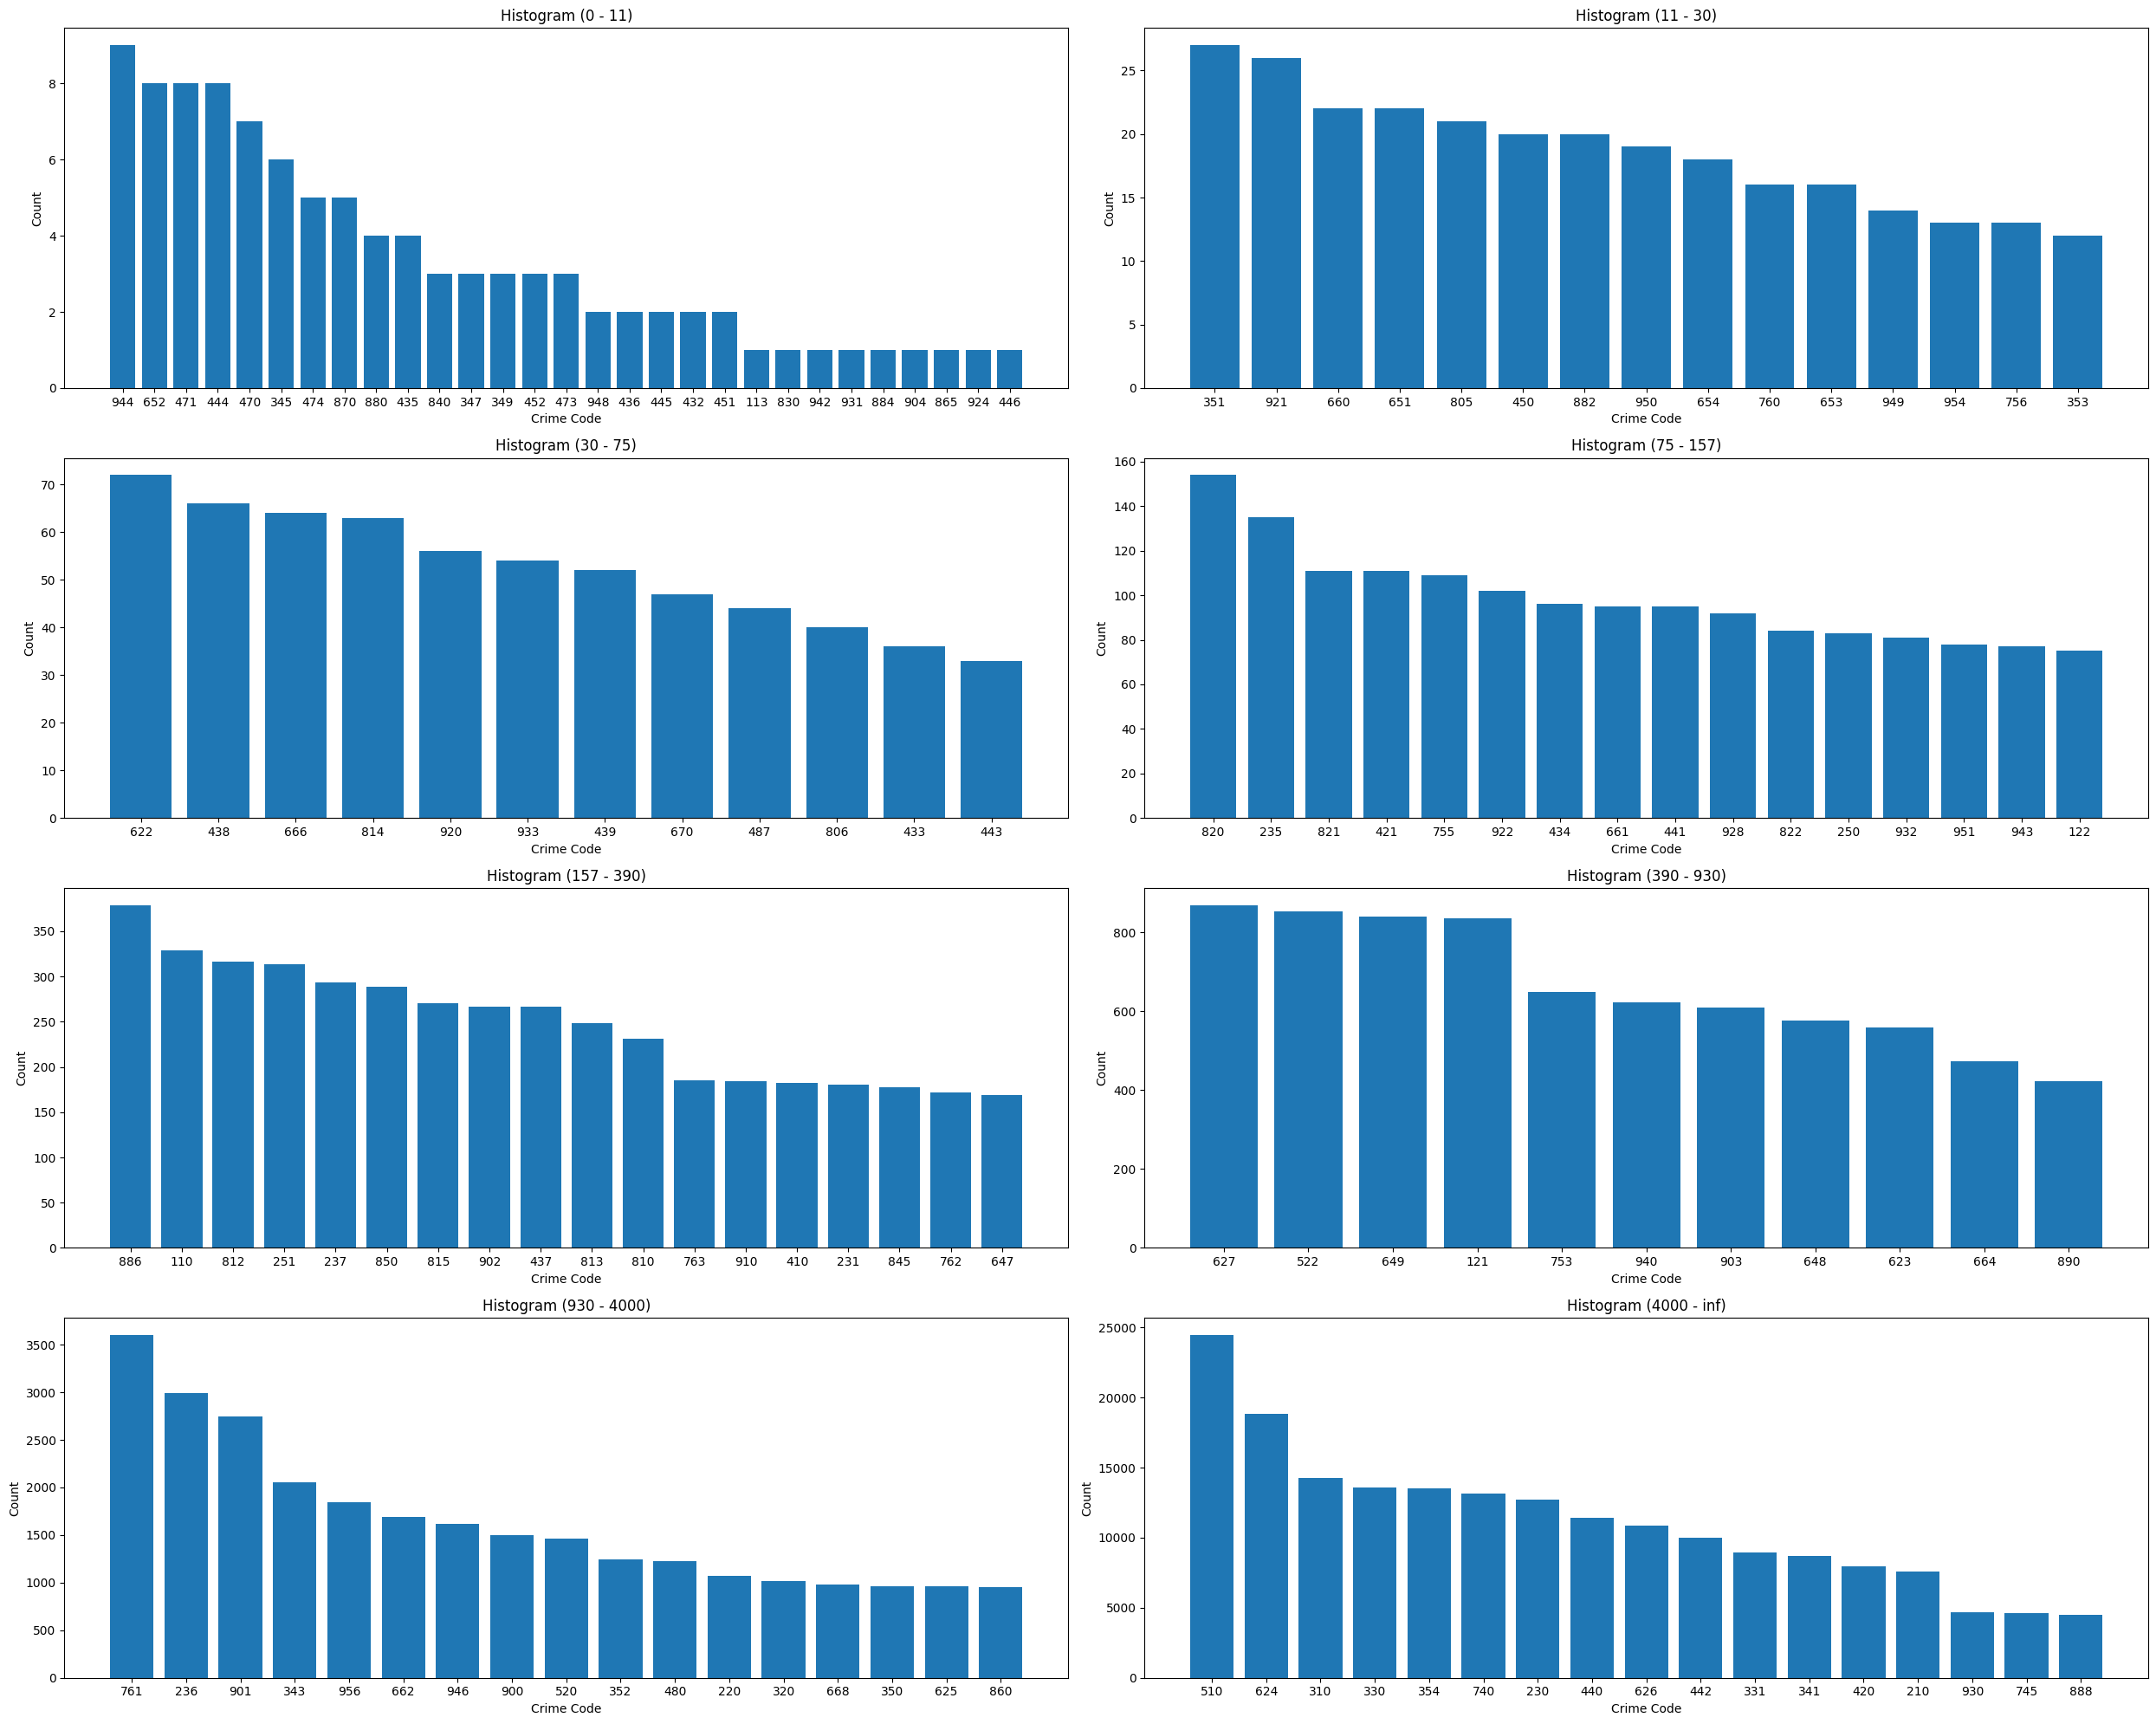

In [14]:
res = count_crime(crime_by_year[3])
display(res)
create_histogram(res, [11, 30, 75, 157, 390, 930, 4000], rows=4,cols=2)

Crime Code                             Crime Code Description  Count
0           510                                   VEHICLE - STOLEN  17144
1           330                              BURGLARY FROM VEHICLE   7345
2           442           SHOPLIFTING - PETTY THEFT ($950 & UNDER)   6986
3           440                 THEFT PLAIN - PETTY ($950 & UNDER)   6510
4           740  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...   6501
..          ...                                                ...    ...
123         453                               DRUNK ROLL - ATTEMPT      1
124         452                                PICKPOCKET, ATTEMPT      1
125         880                                     DISRUPT SCHOOL      1
126         865                                  DRUGS, TO A MINOR      1
127         445                 DISHONEST EMPLOYEE ATTEMPTED THEFT      1

[128 rows x 3 columns]

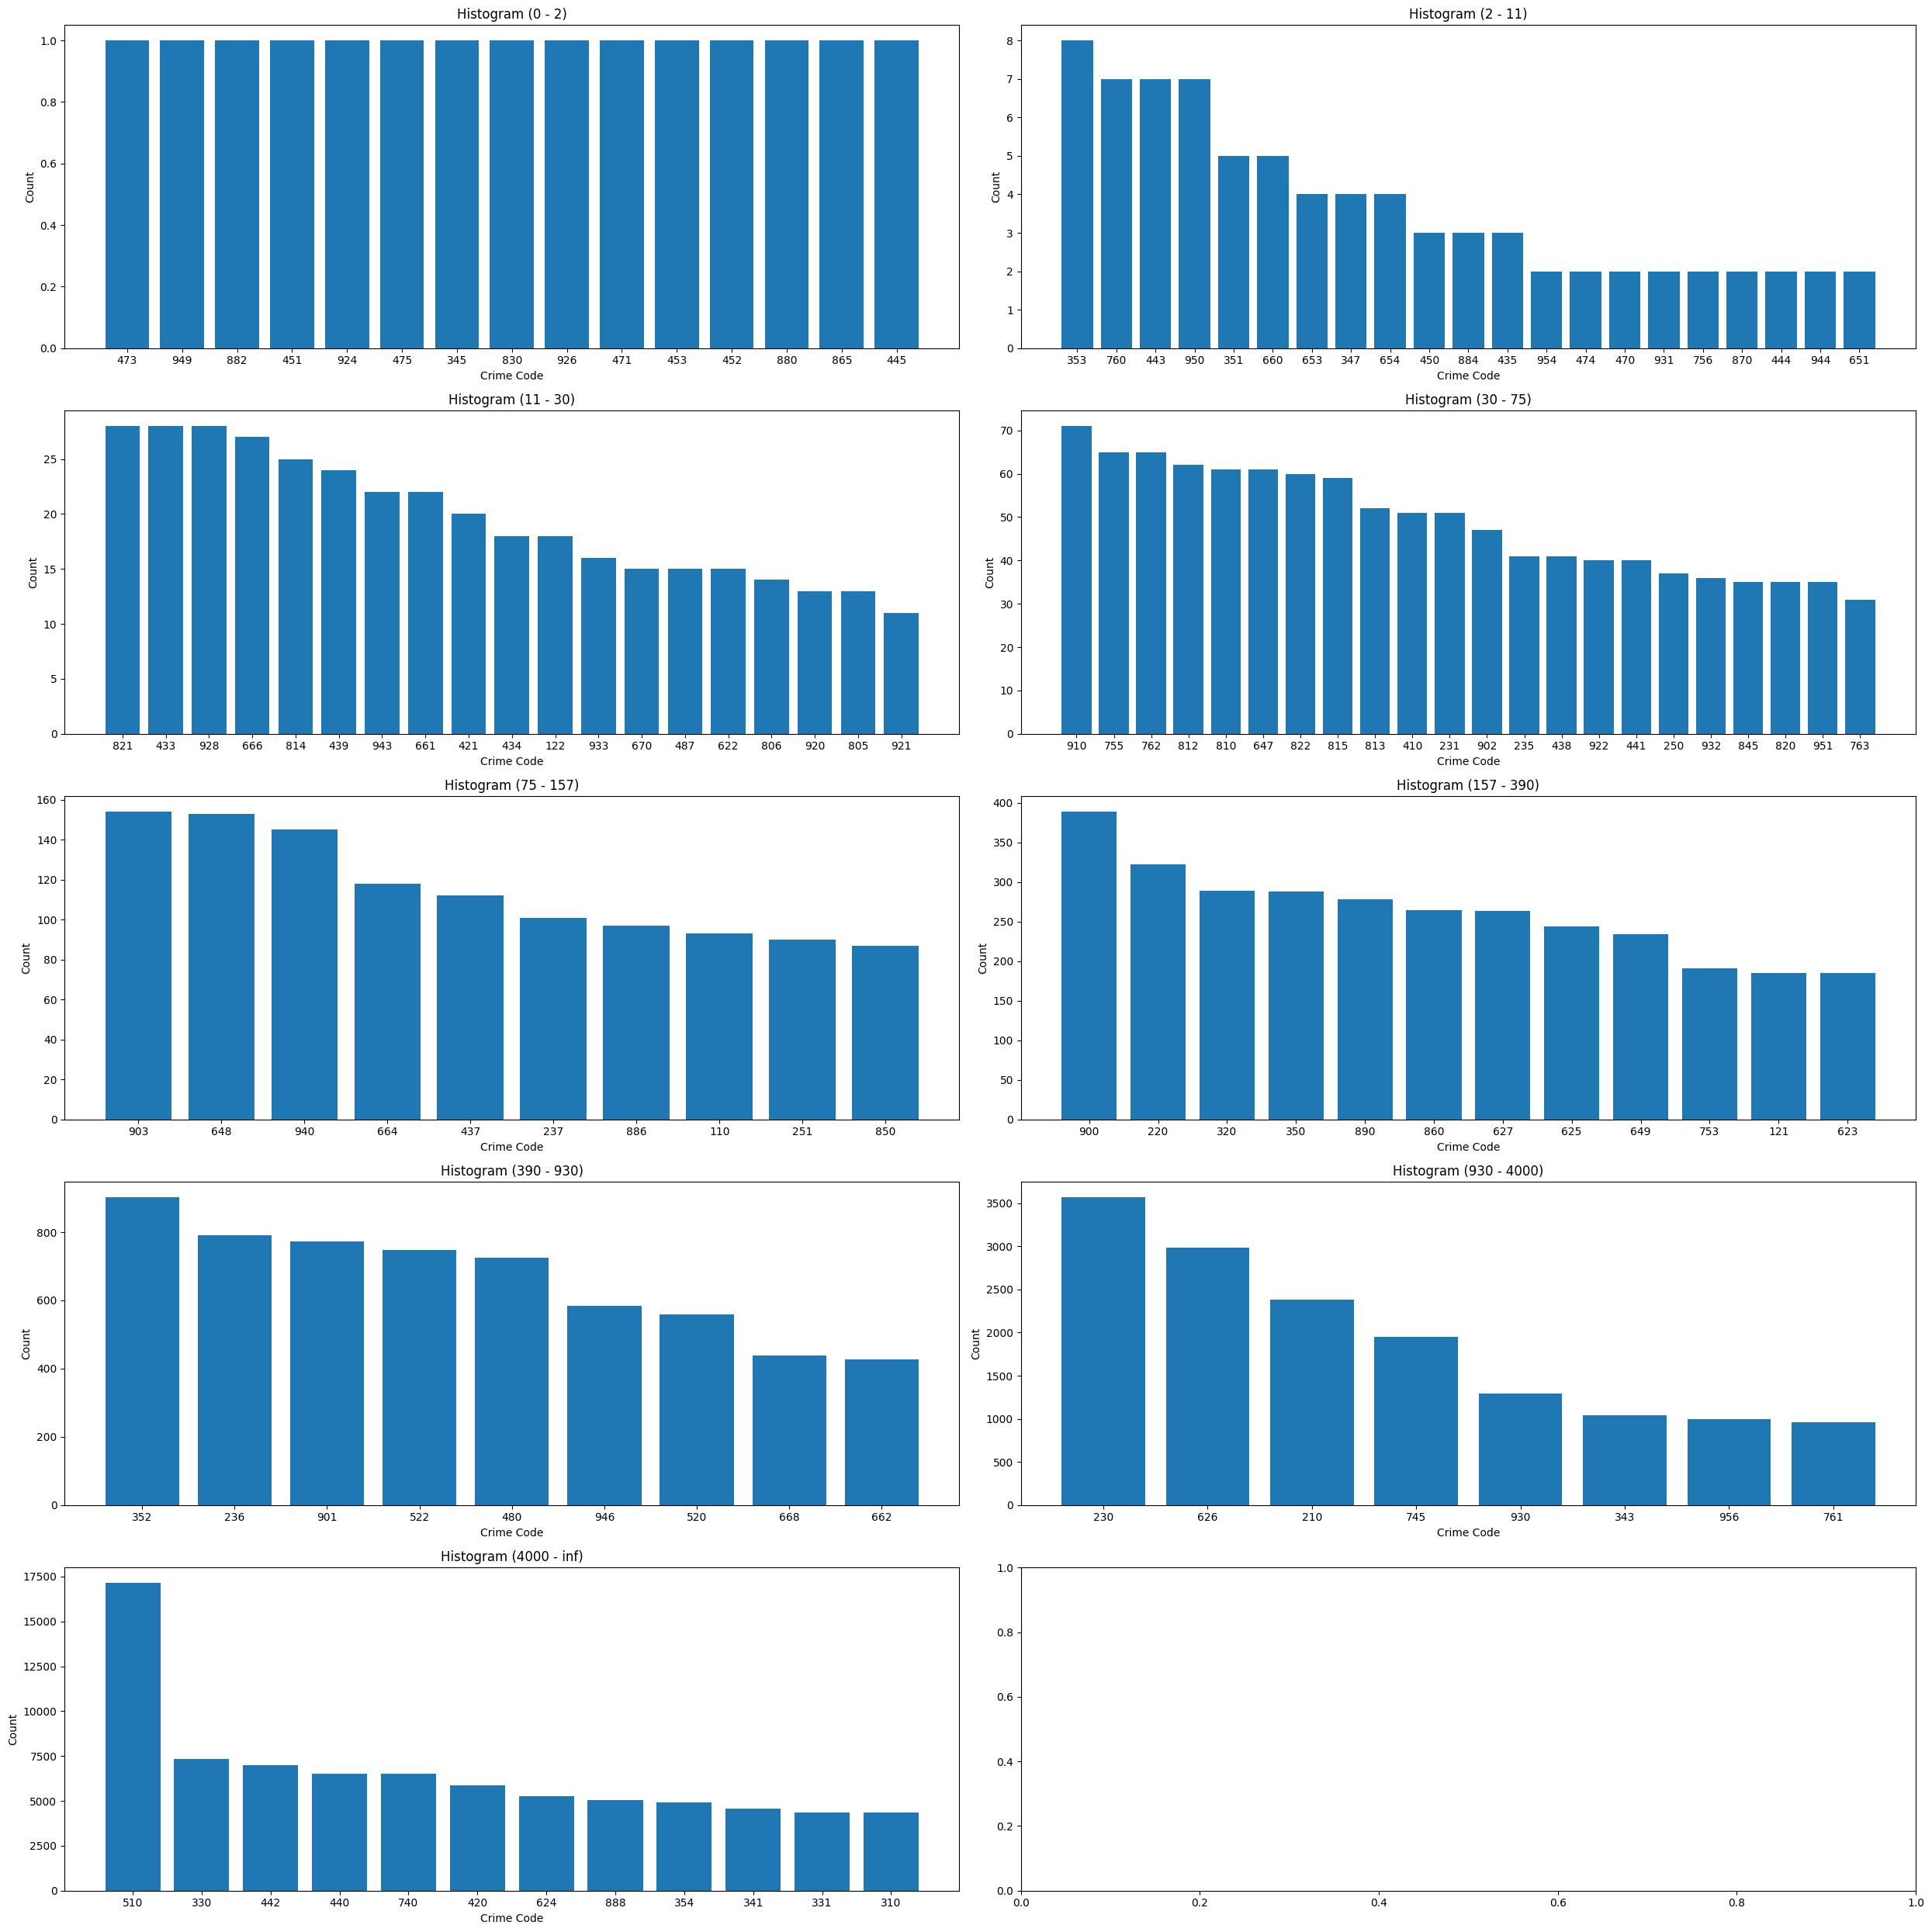

In [15]:
res = count_crime(crime_by_year[4])
display(res)
create_histogram(res, [2, 11, 30, 75, 157, 390, 930, 4000], rows=5,cols=2)

In [16]:
crimes_categories_names = ["Abuse", "Theft", "Fraud", "Property Damage / Theft", "Threats", "Sexual Crimes", "Other Crimes"]
crimes_categories_codes = [[110, 113, 230, 231, 235, 236, 237, 250, 251, 434, 435, 436, 622, 623, 624, 625, 626, 627, 870, 910, 920, 921, 922, 943],
                           [210, 220, 310, 320, 330, 331, 341, 343, 347, 349, 350, 351, 352, 353, 354, 410, 420, 421, 433, 440, 441, 442, 443, 444, 446, 450, 451, 452, 470, 471, 473, 474, 475],
                           [649, 651, 652, 653, 654, 660, 662, 664, 666, 668, 670, 942, 950, 951],
                           [647, 648, 740, 745, 888, 433, 438, 480, 485, 487, 510, 520, 522],
                           [940, 753, 755, 756, 763, 928, 933, 930],
                           [760, 762, 805, 806, 810, 812, 813, 814, 815, 820, 821, 822, 845, 850, 932, 956, 121, 122, 860],
                           [437, 439, 661, 761, 880, 886, 890, 900, 901, 902, 903, 906, 931, 944, 946, 949, 954, 865]]

In [17]:
def count_crimes_by_category(df):
    res_df = pd.DataFrame()
    for i in range(len(crimes_categories_names)):
      crimes = crimes_categories_codes[i]
      count = df[df["Crm Cd"].isin(crimes)]["Crm Cd"].count()
      data = {"Crime Category": [crimes_categories_names[i]], "Count": [count]}

      res_df = pd.concat([res_df, pd.DataFrame(data)], ignore_index=True)

    return res_df.sort_values(by=["Count"], ascending=False).reset_index(drop=True)

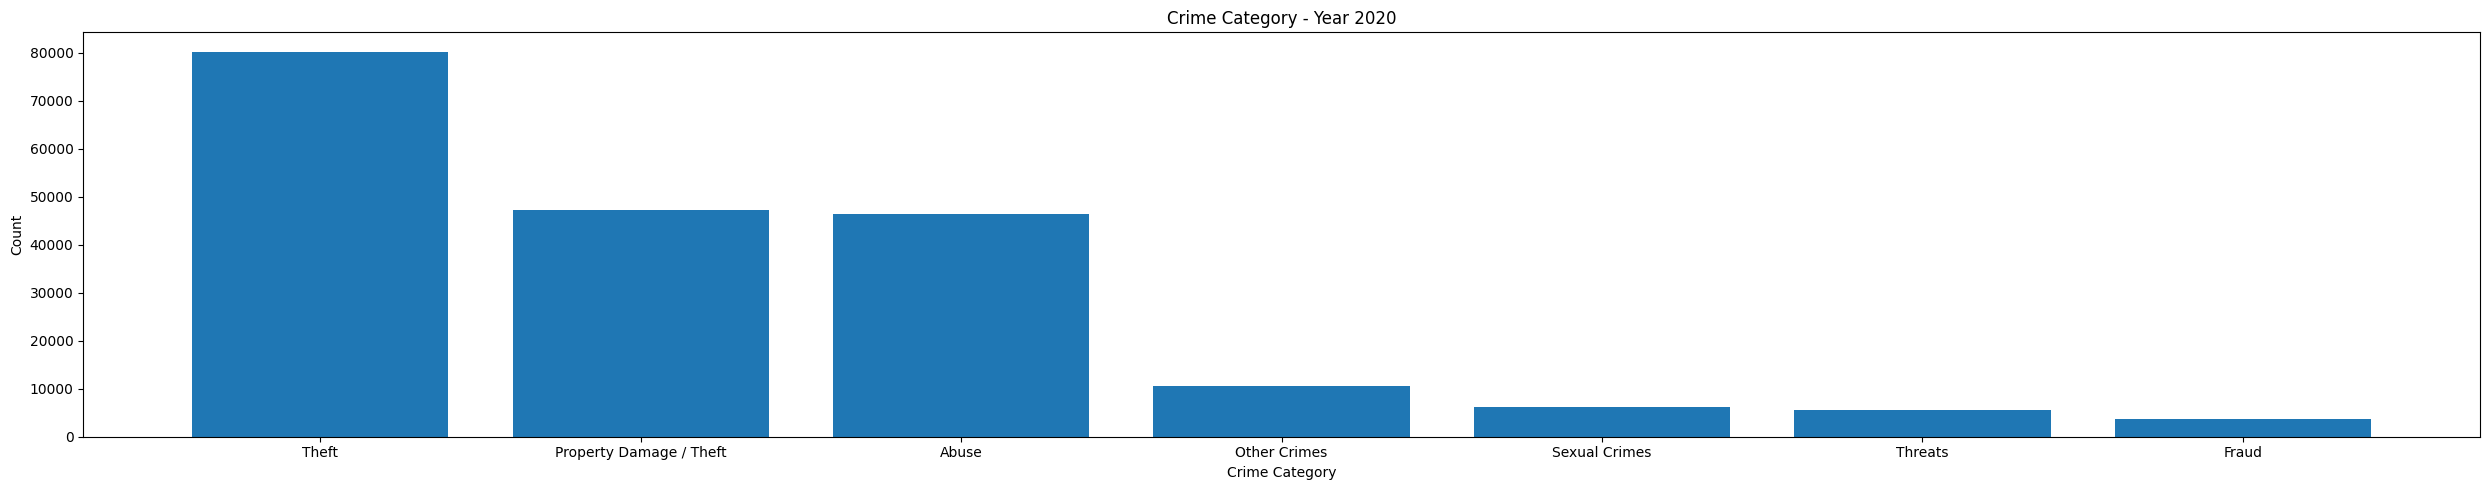

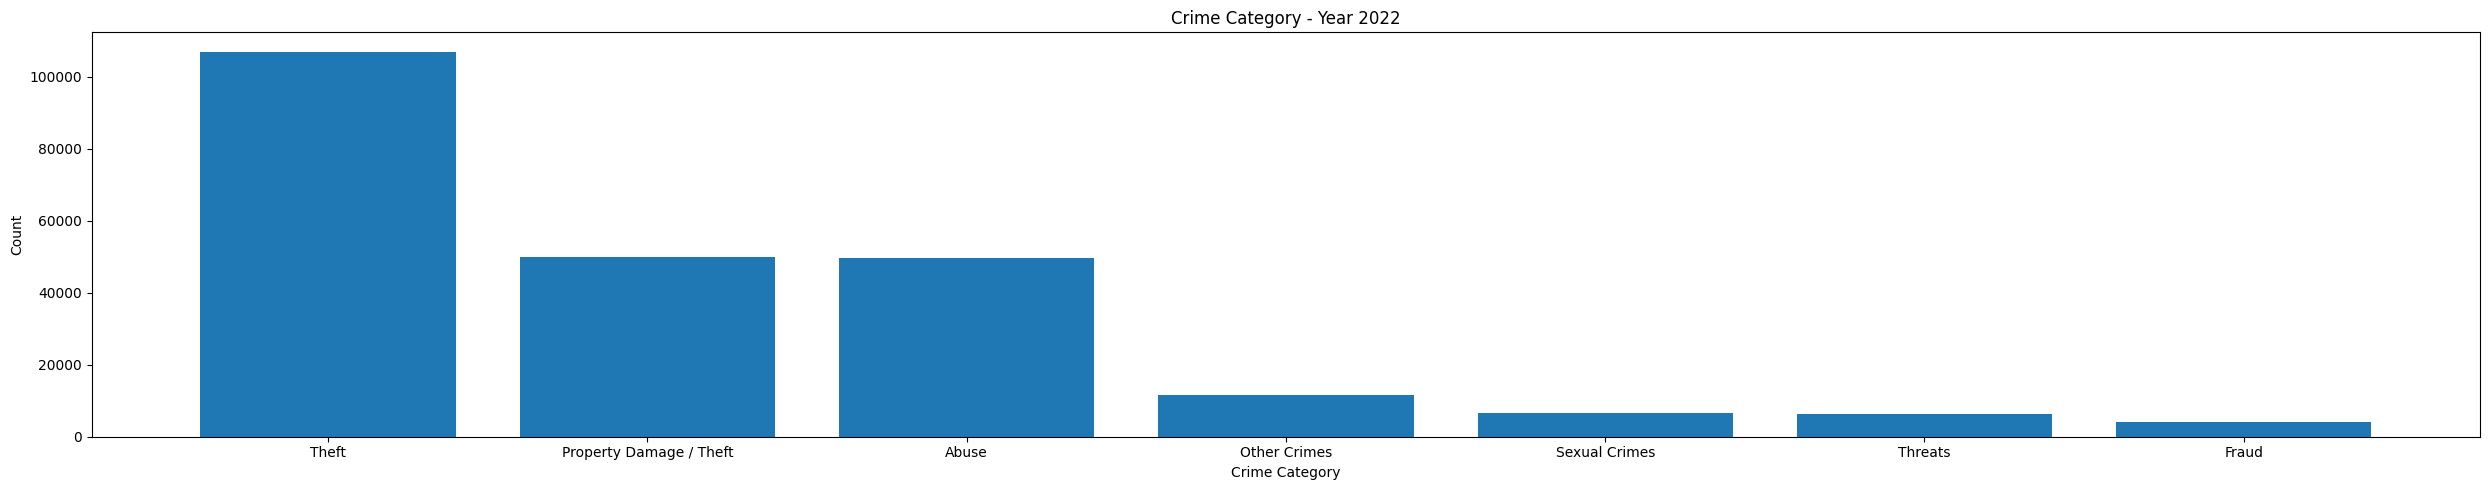

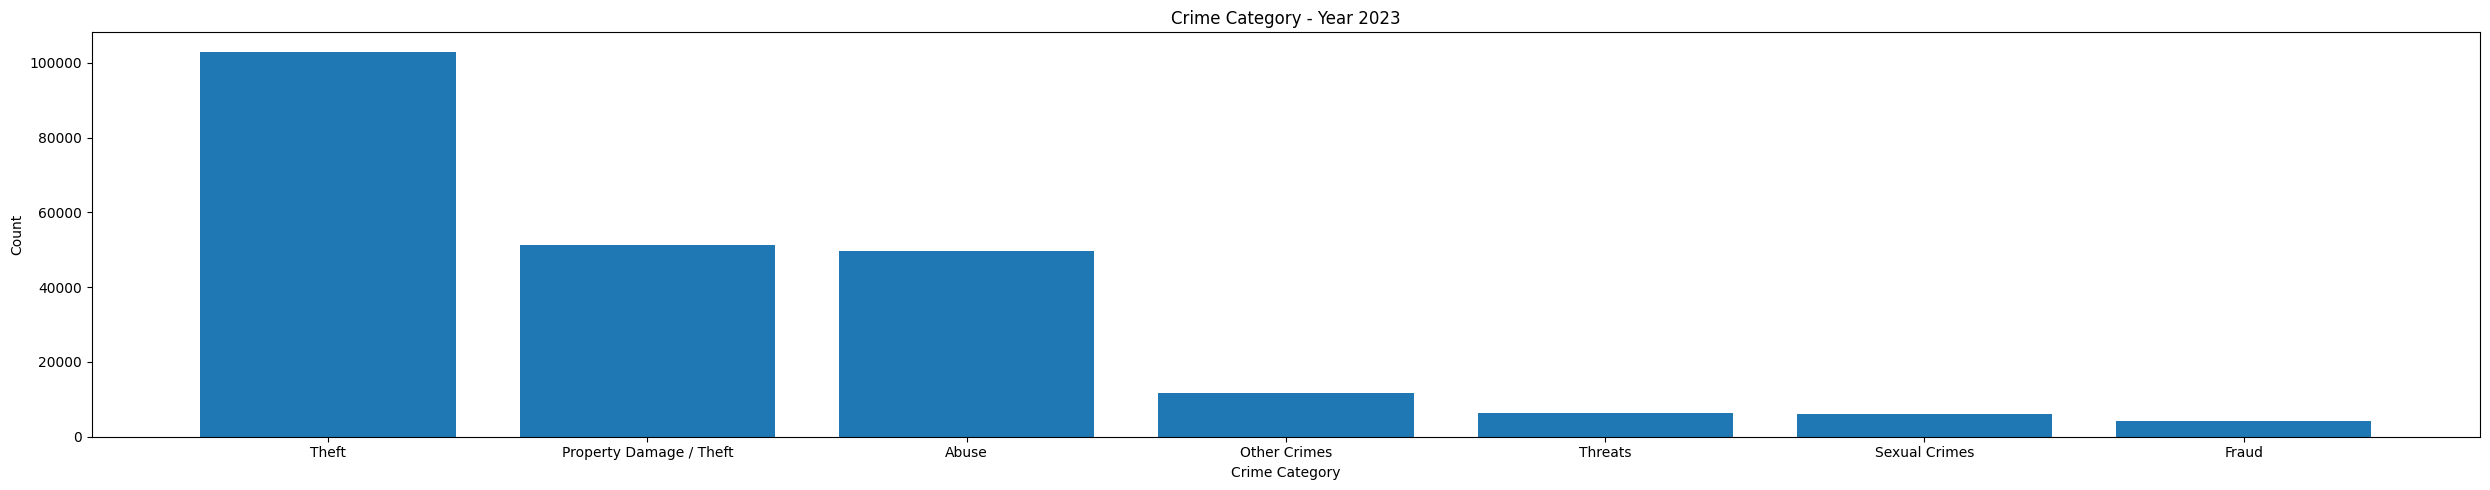

In [18]:
for i in [0, 2, 3]:
  res = count_crimes_by_category(crime_by_year[i])
  create_histogram(res, title="Crime Category - Year " + str(years[i]))

In [19]:
from datetime import datetime

def count_crimes_by_time(df, crime_category):
    res_df = pd.DataFrame()
    crimes = crimes_categories_codes[crime_category]
    for i in range(24):
      count = df[(df["Crm Cd"].isin(crimes)) & (df["DATE OCC"].dt.hour == i)]["Crm Cd"].count()
      data = {"Hour": datetime.strptime(str(i) + ":" + "00", "%H:%M").time(), "Count": [count]}

      res_df = pd.concat([res_df, pd.DataFrame(data)], ignore_index=True)

    return res_df.sort_values(by=["Hour"], ascending=True).reset_index(drop=True)

In [20]:
iter = [0, 2, 3]

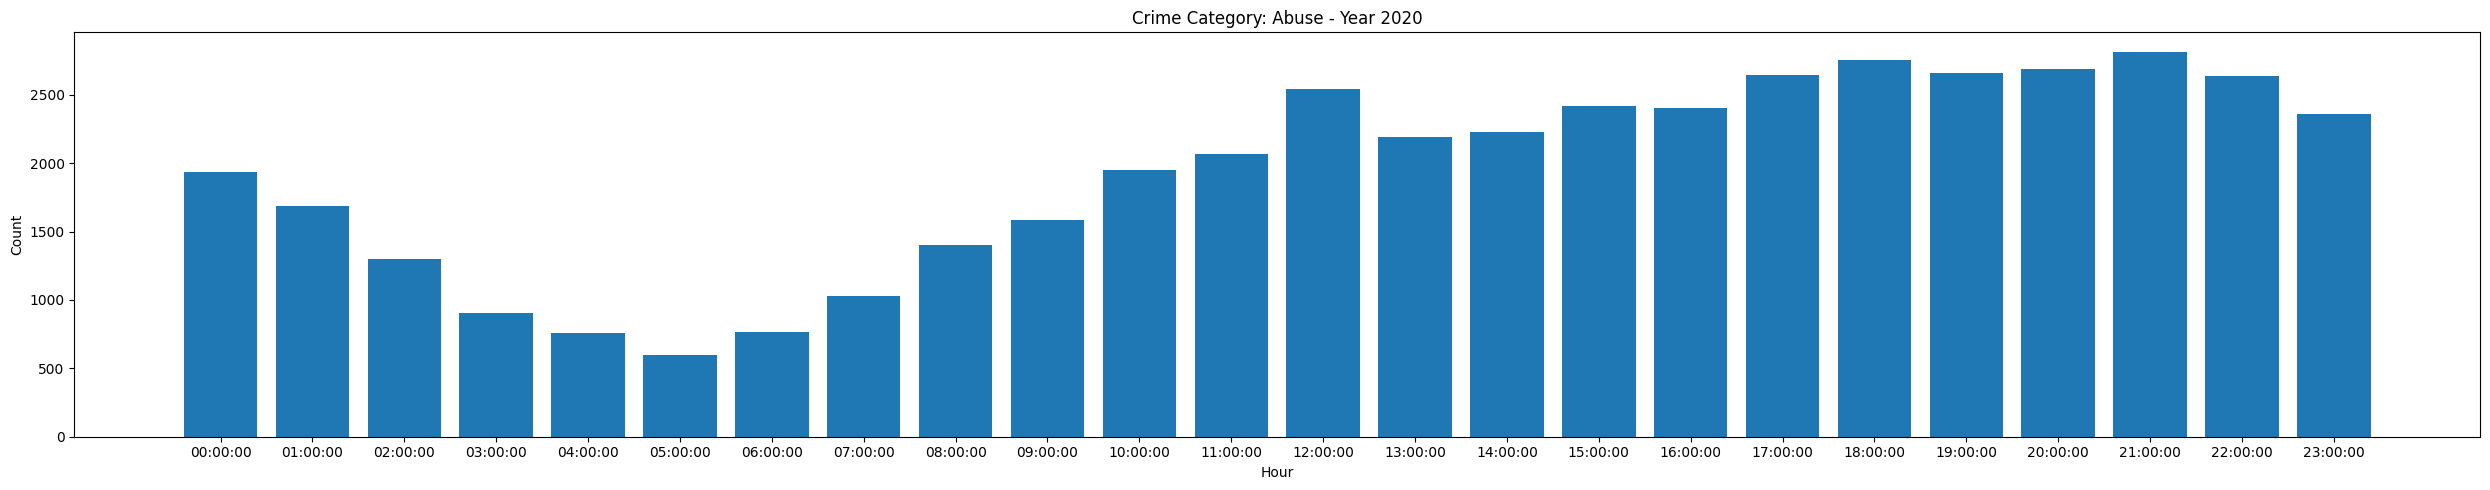

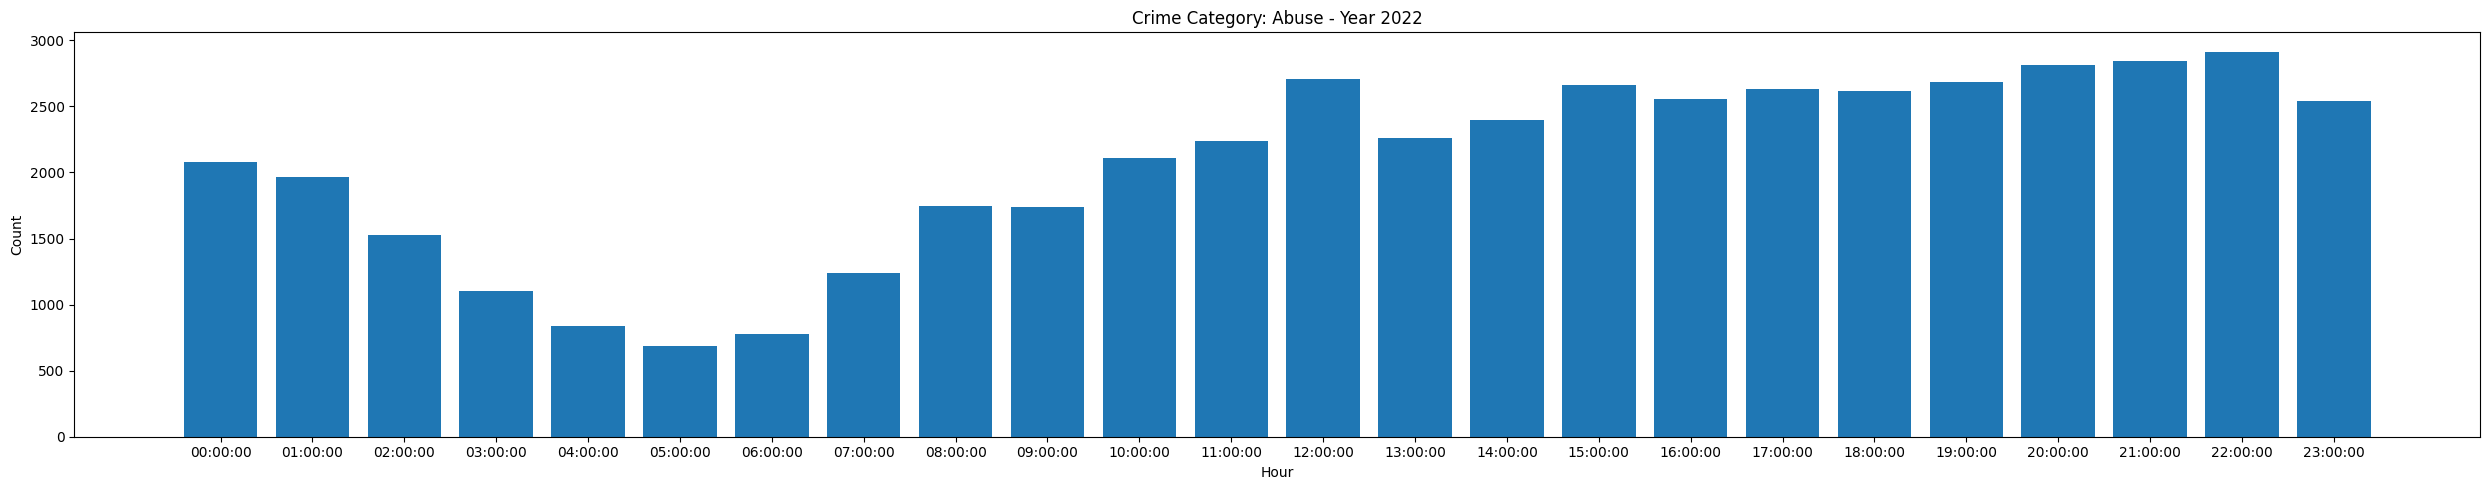

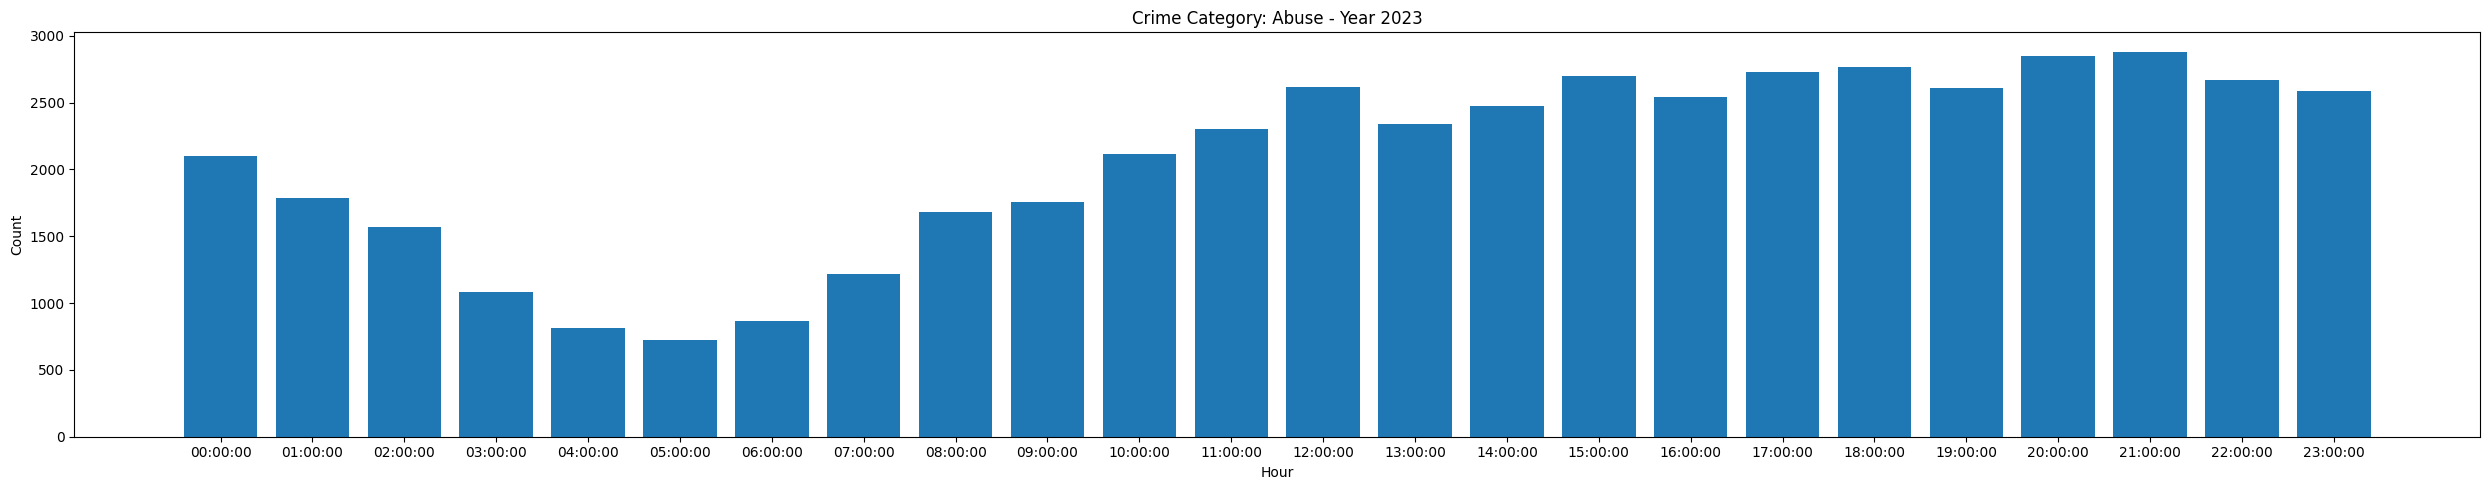

In [21]:
for i in iter:
  res = count_crimes_by_time(crime_by_year[i], crimes_categories_names.index("Abuse"))
  create_histogram(res, title="Crime Category: Abuse - Year " + str(years[i]))

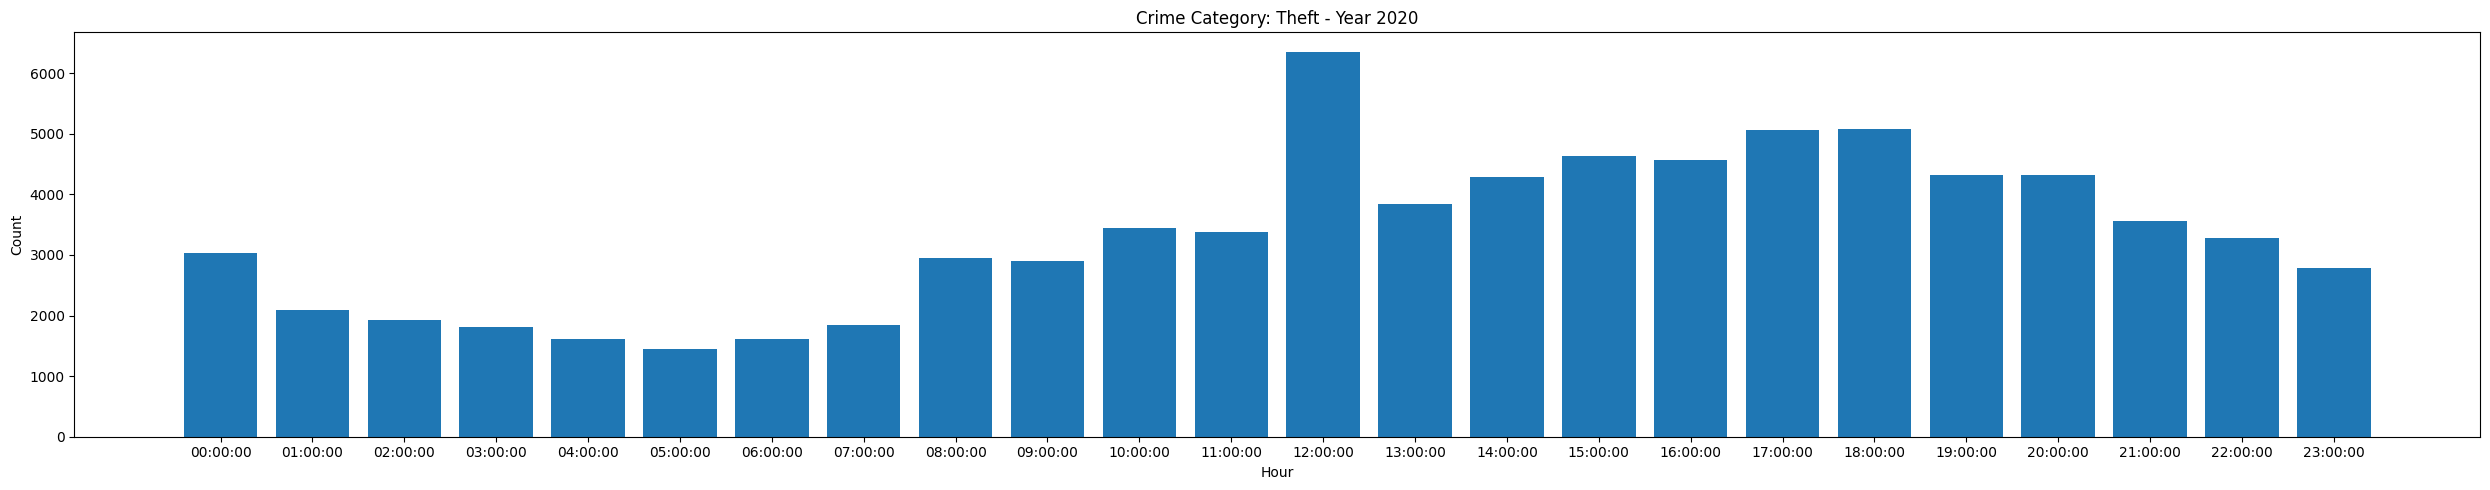

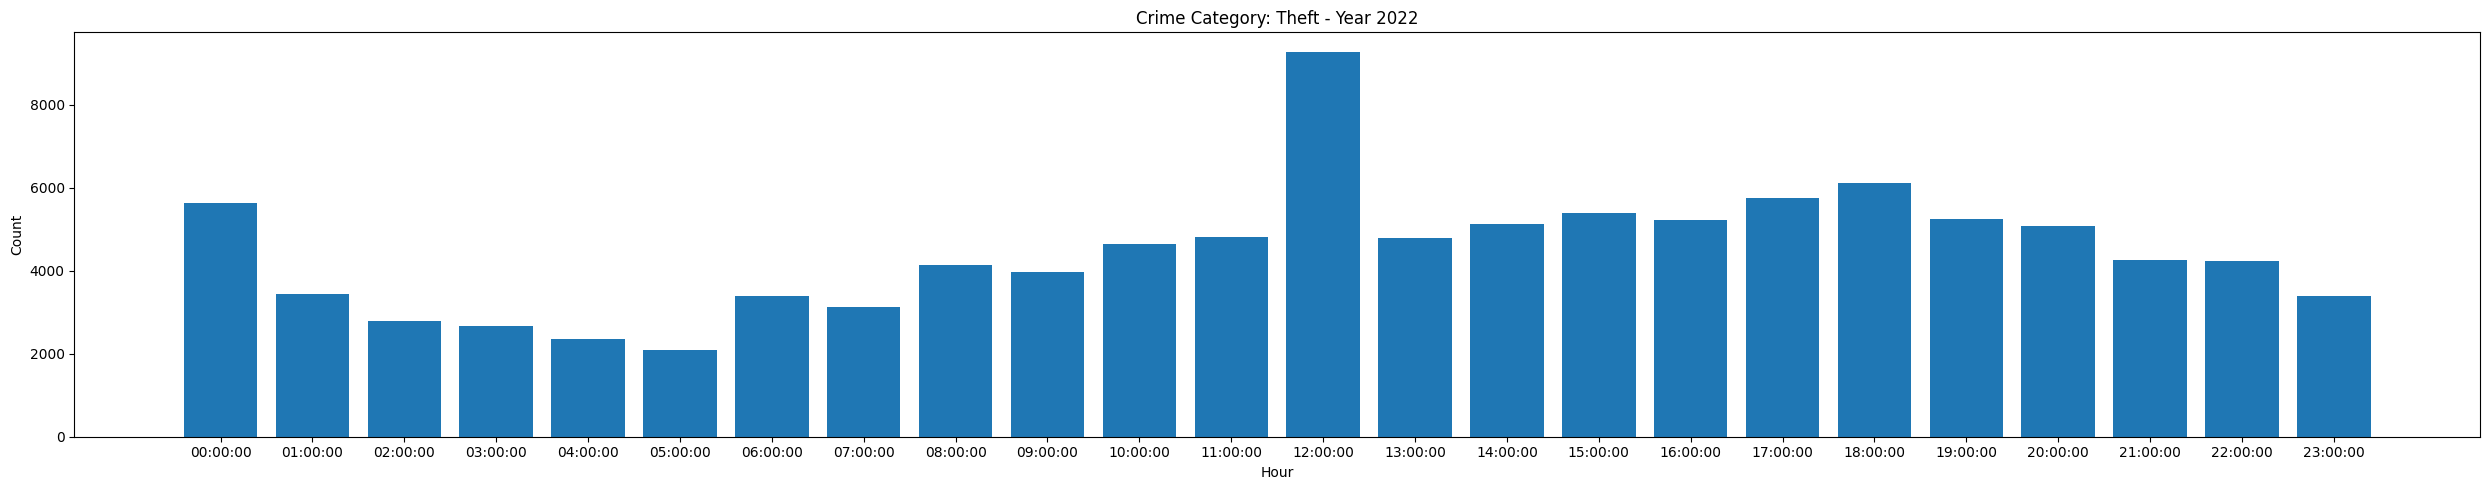

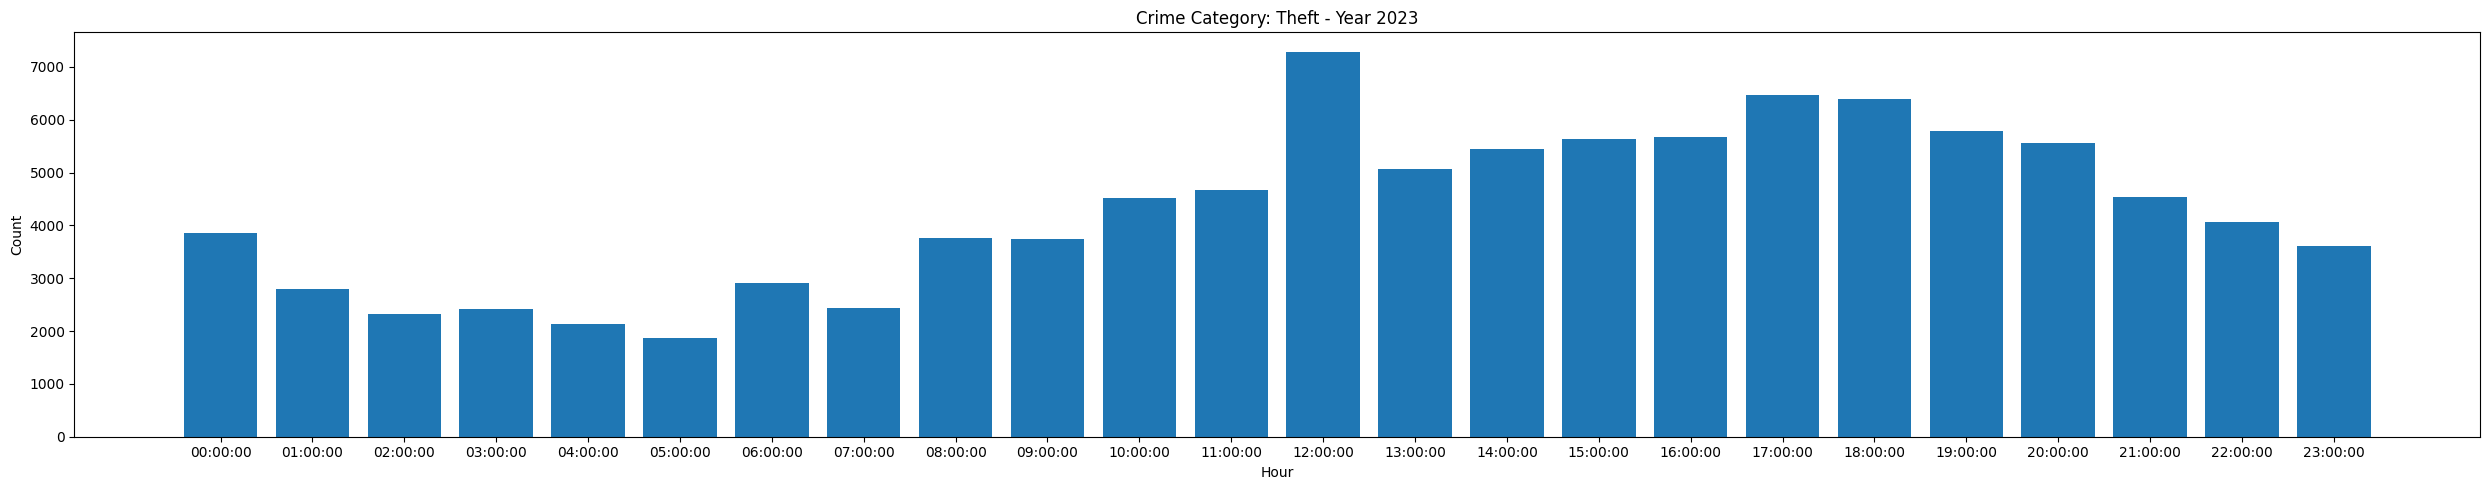

In [22]:
for i in iter:
  res = count_crimes_by_time(crime_by_year[i], crimes_categories_names.index("Theft"))
  create_histogram(res, title="Crime Category: Theft - Year " + str(years[i]))

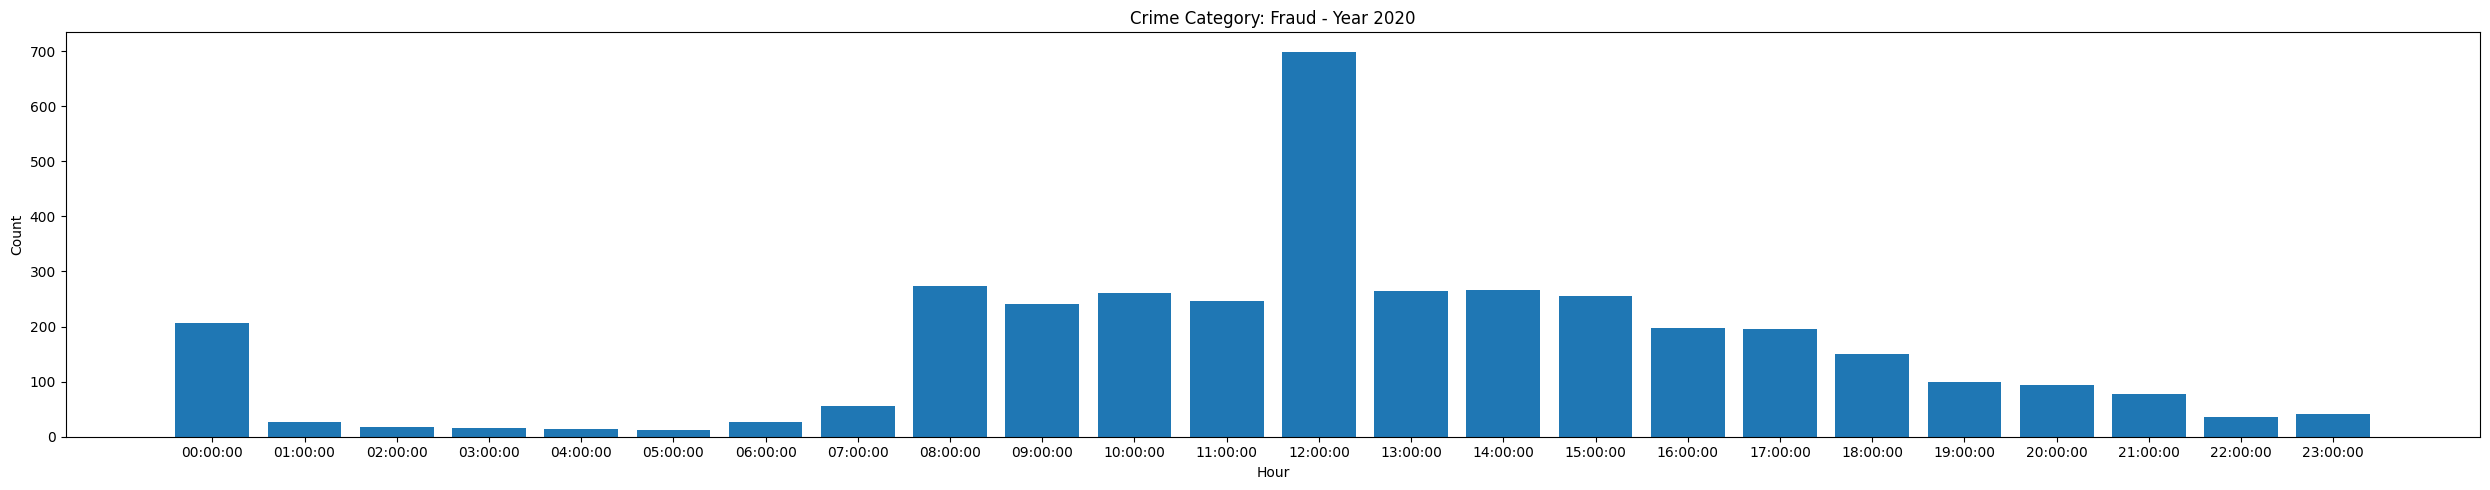

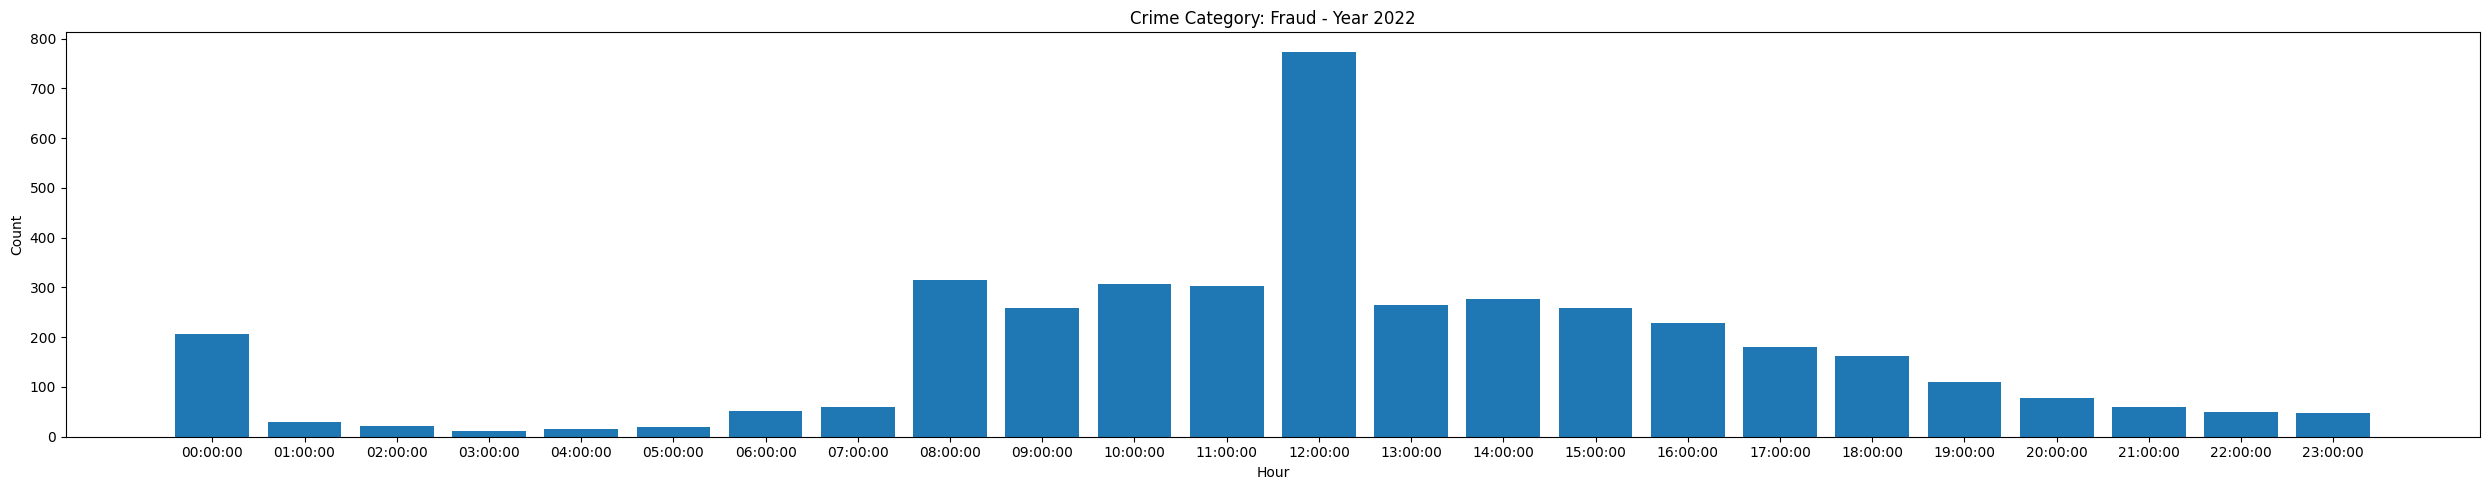

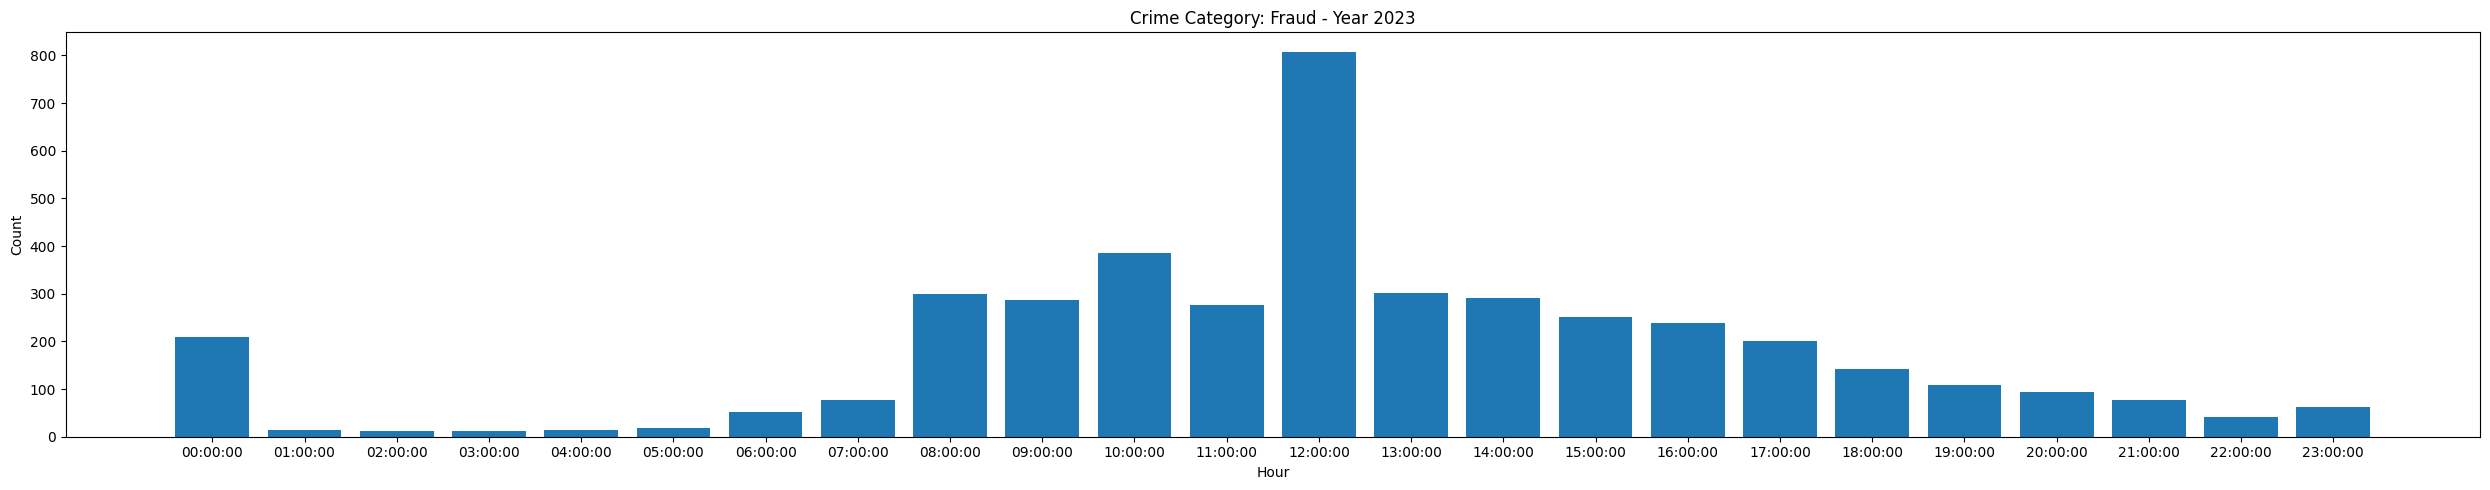

In [23]:
for i in iter:
  res = count_crimes_by_time(crime_by_year[i], crimes_categories_names.index("Fraud"))
  create_histogram(res, title="Crime Category: Fraud - Year " + str(years[i]))

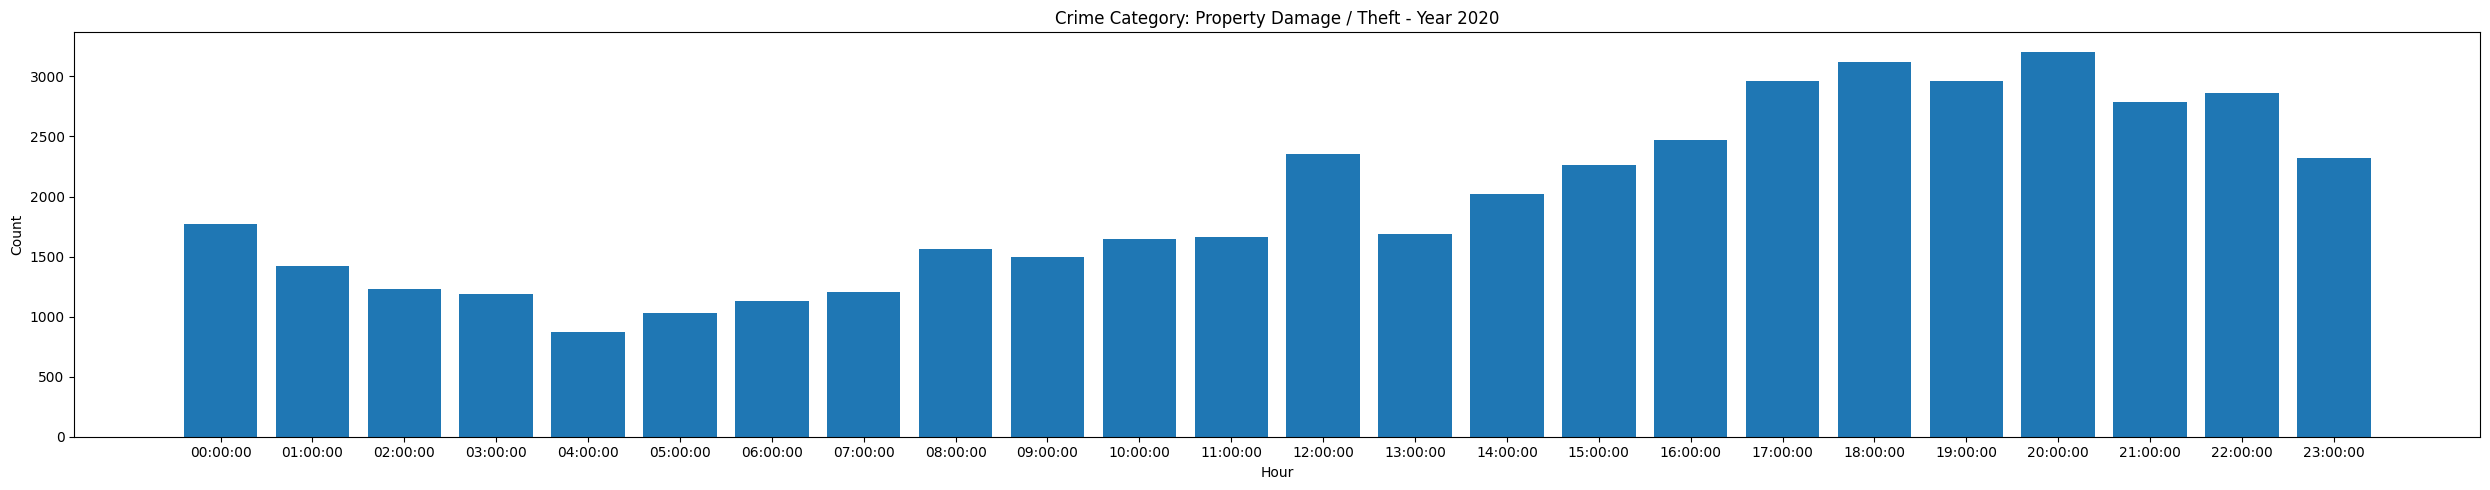

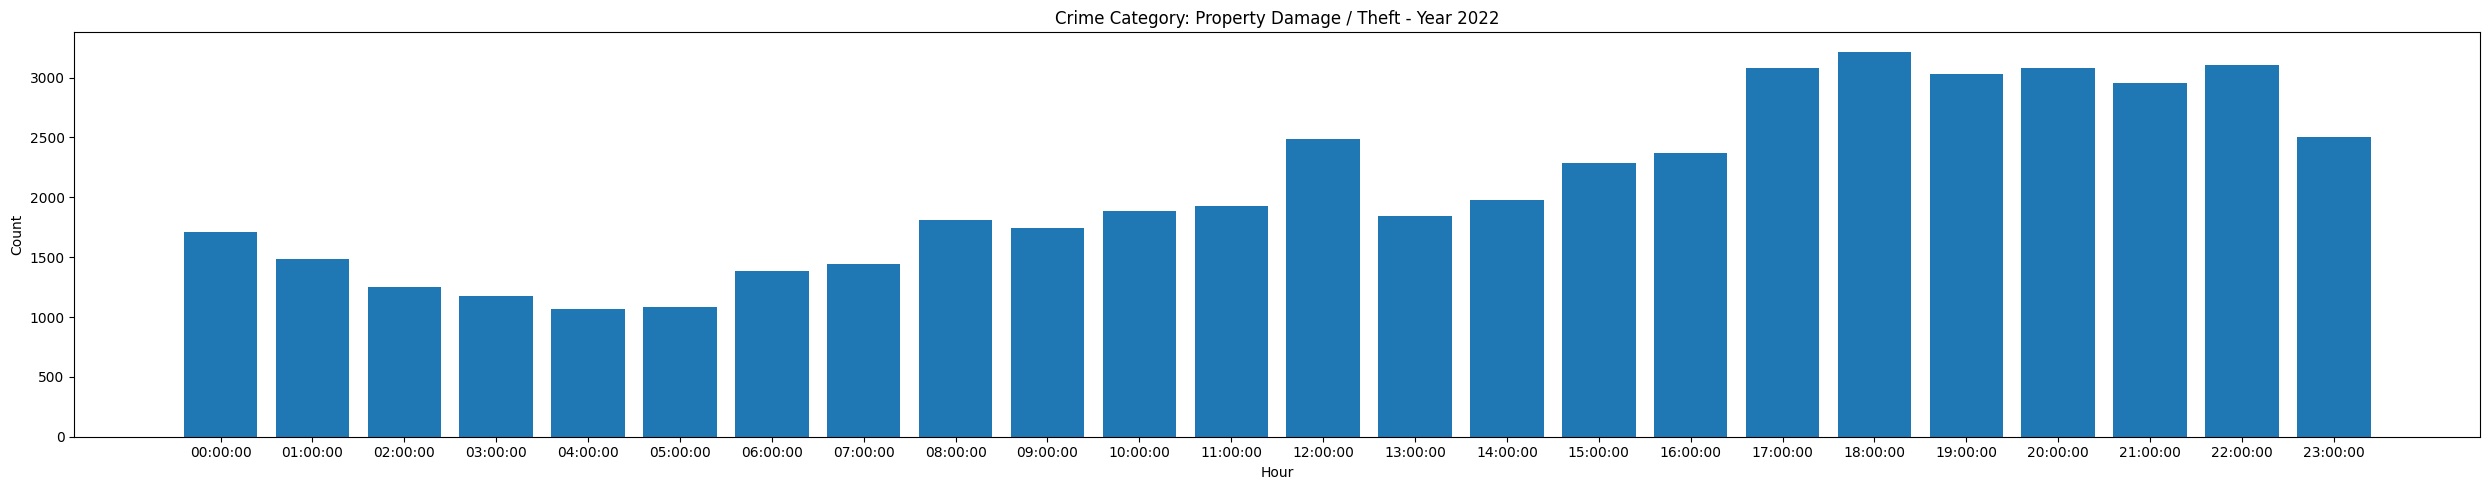

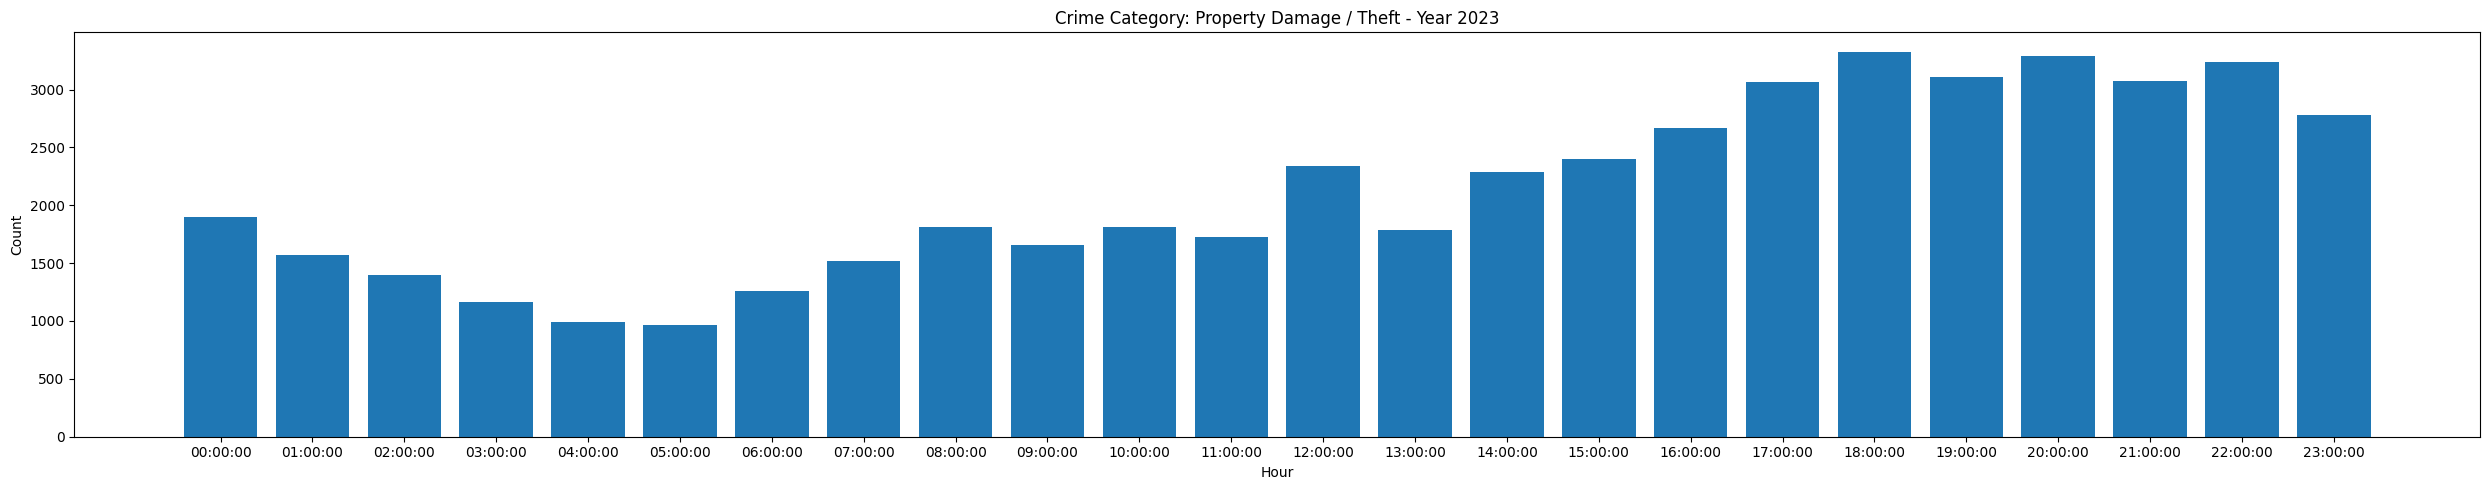

In [24]:
for i in iter:
  res = count_crimes_by_time(crime_by_year[i], crimes_categories_names.index("Property Damage / Theft"))
  create_histogram(res, title="Crime Category: Property Damage / Theft - Year " + str(years[i]))

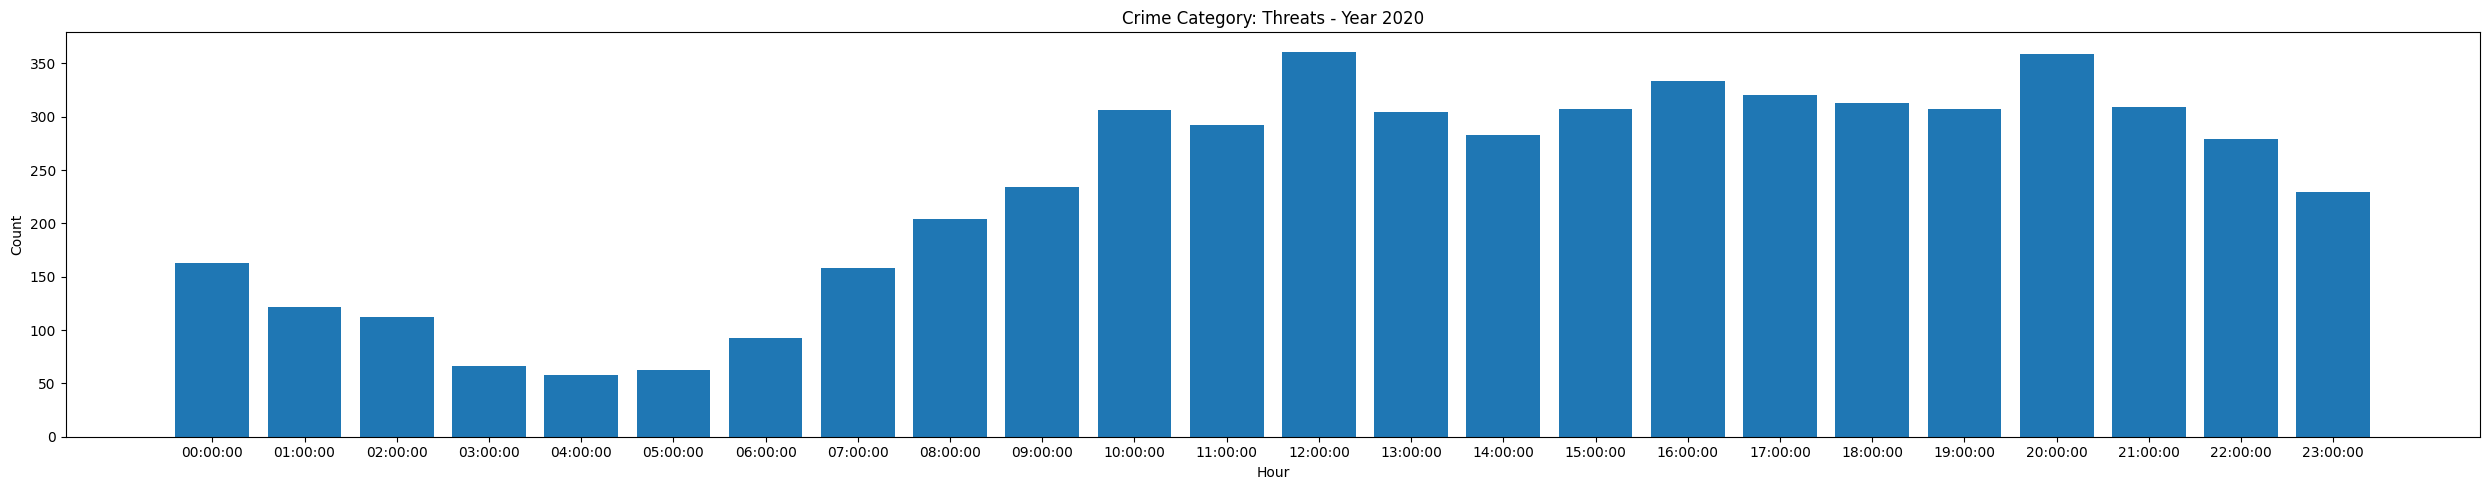

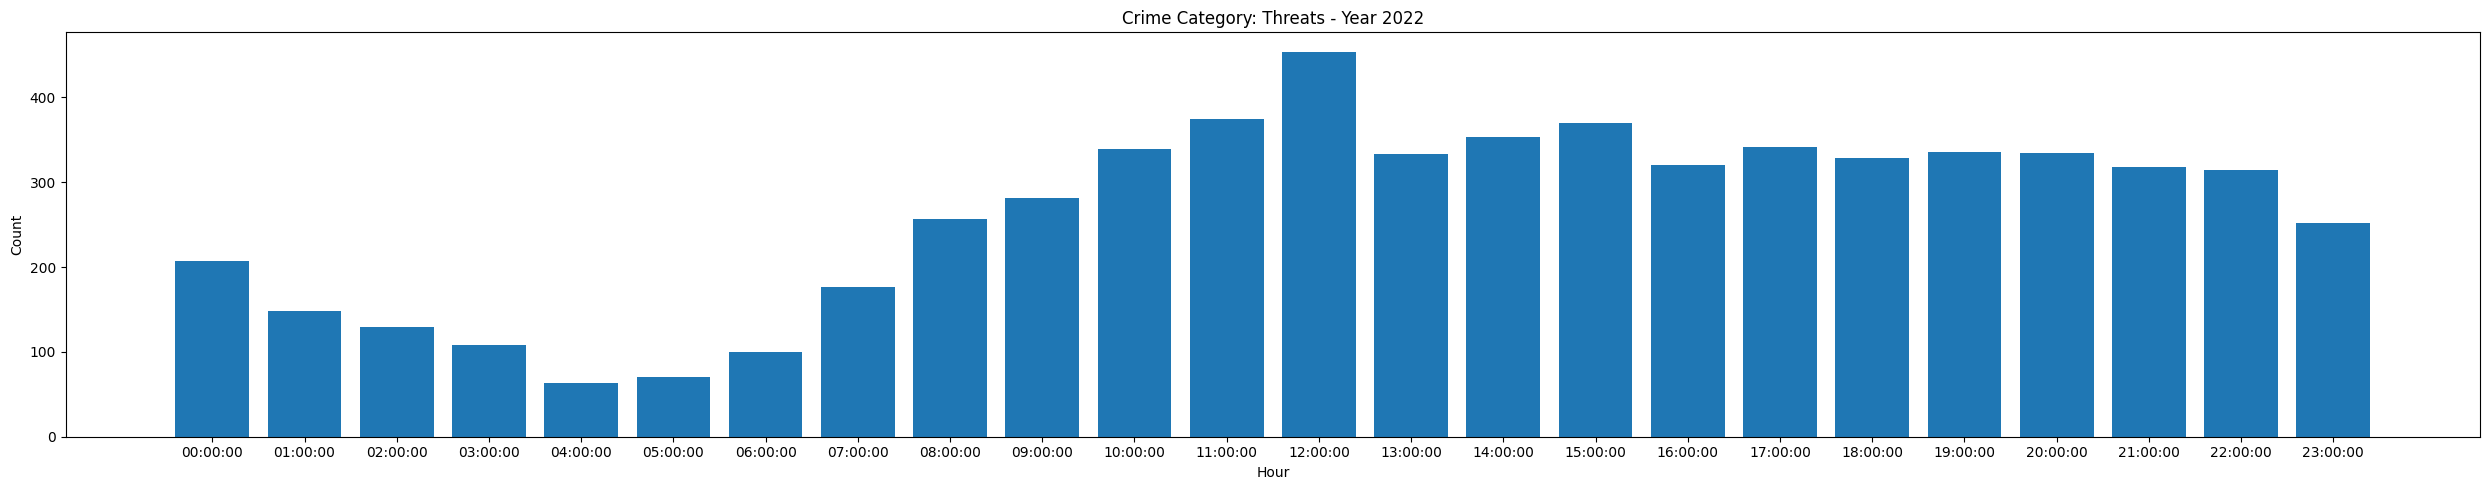

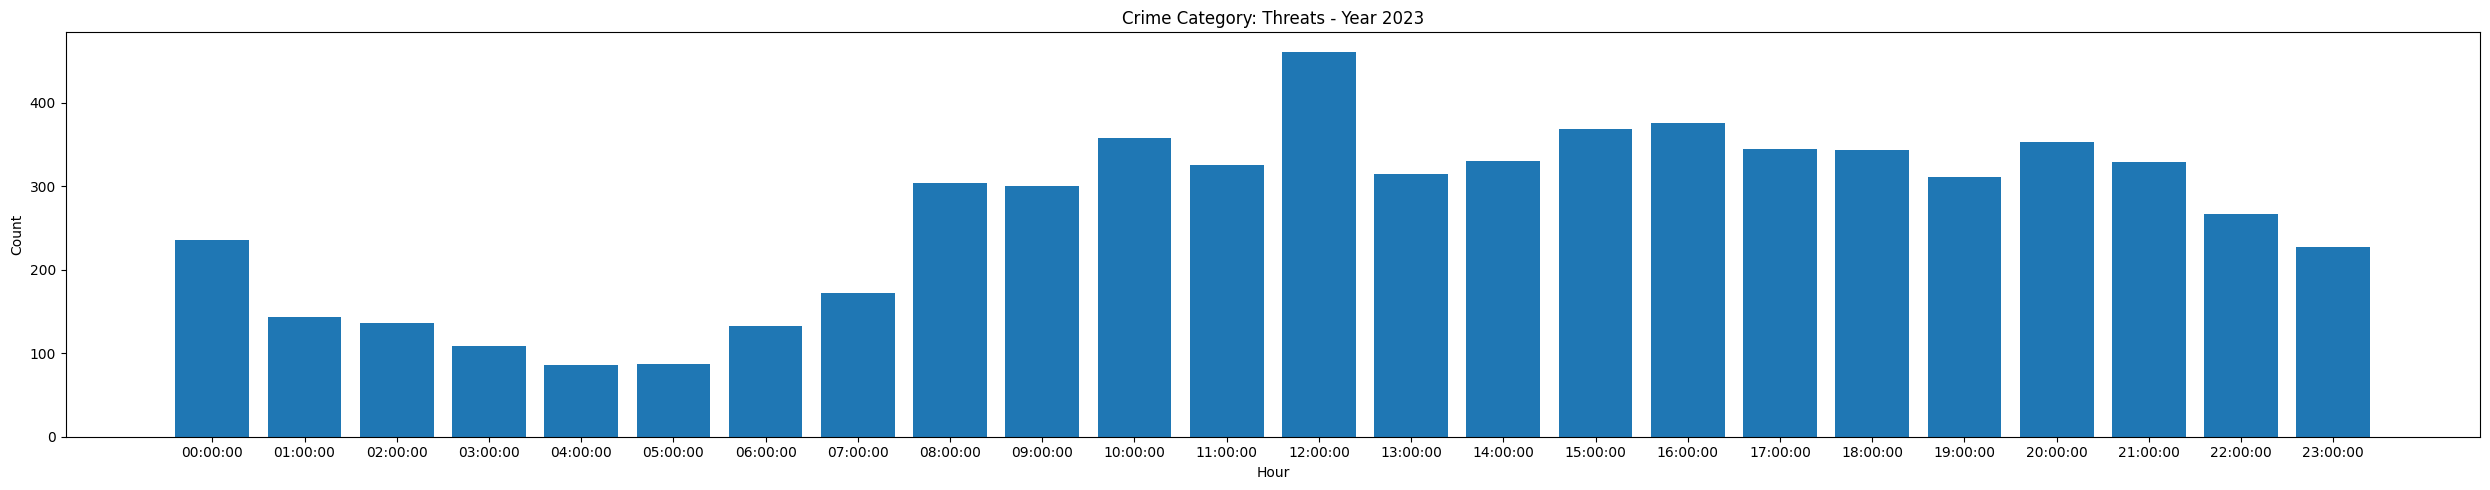

In [25]:
for i in iter:
  res = count_crimes_by_time(crime_by_year[i], crimes_categories_names.index("Threats"))
  create_histogram(res, title="Crime Category: Threats - Year " + str(years[i]))

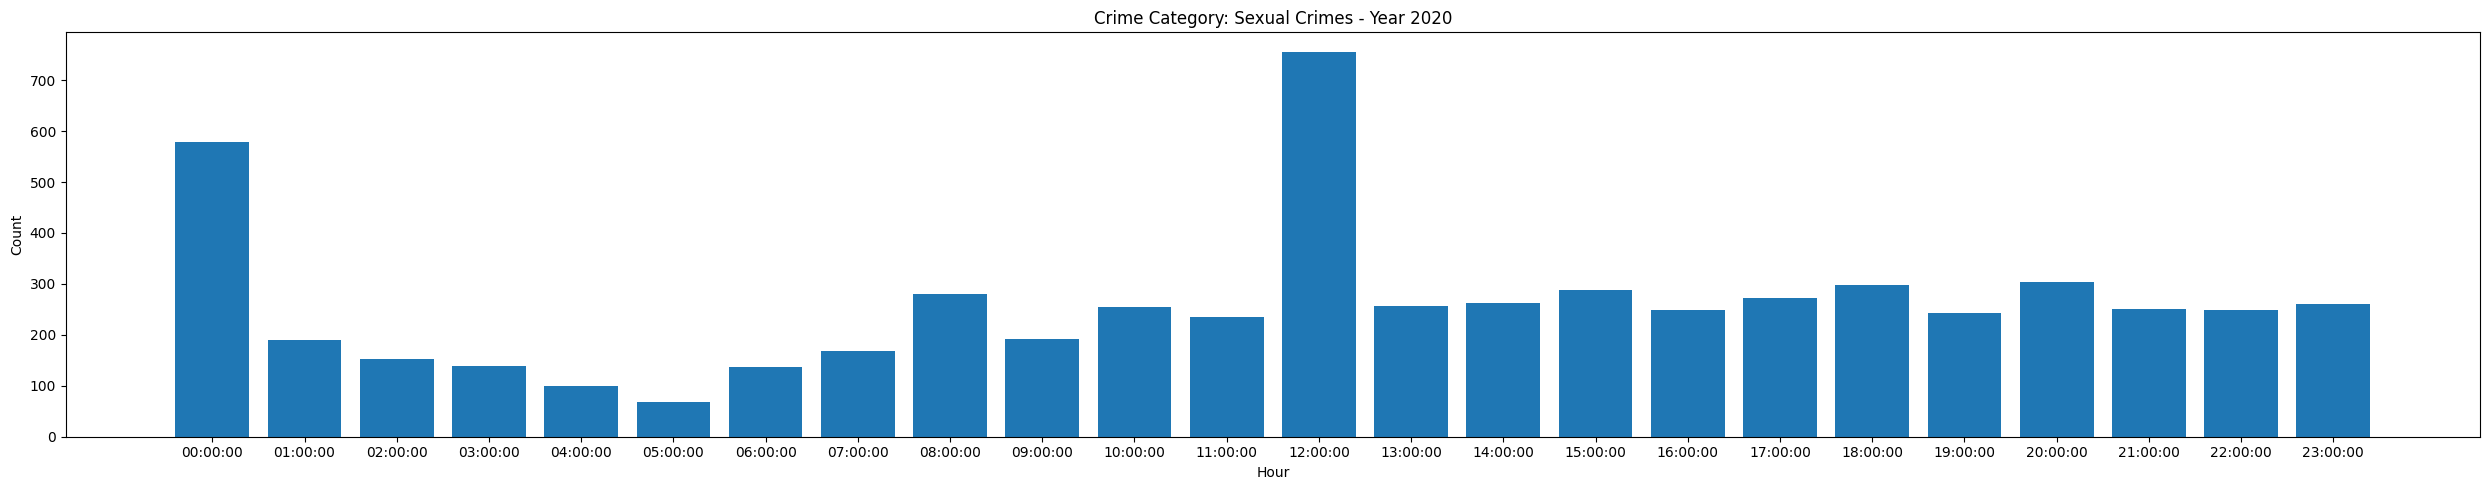

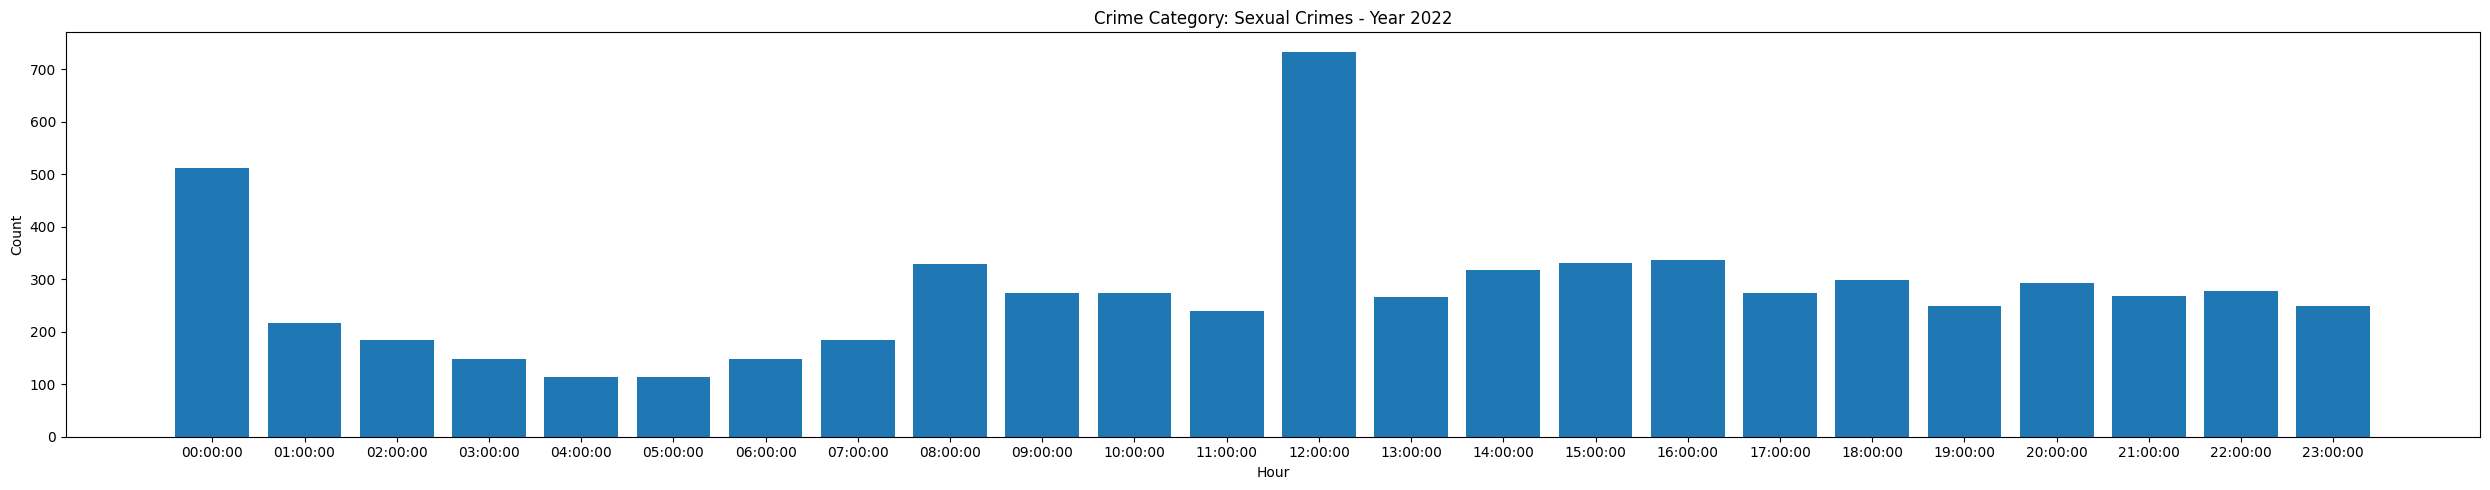

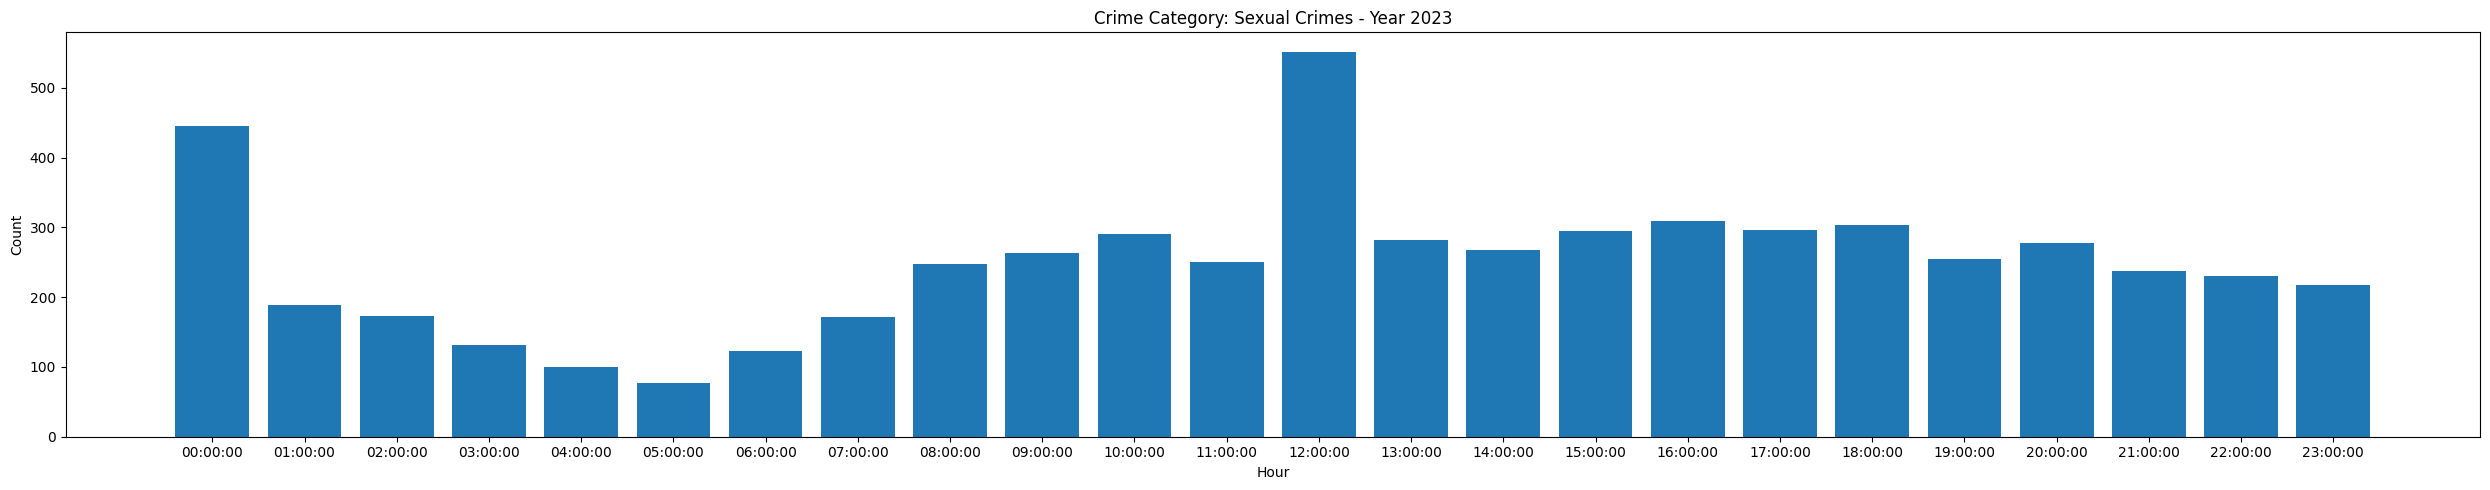

In [26]:
for i in iter:
  res = count_crimes_by_time(crime_by_year[i], crimes_categories_names.index("Sexual Crimes"))
  create_histogram(res, title="Crime Category: Sexual Crimes - Year " + str(years[i]))

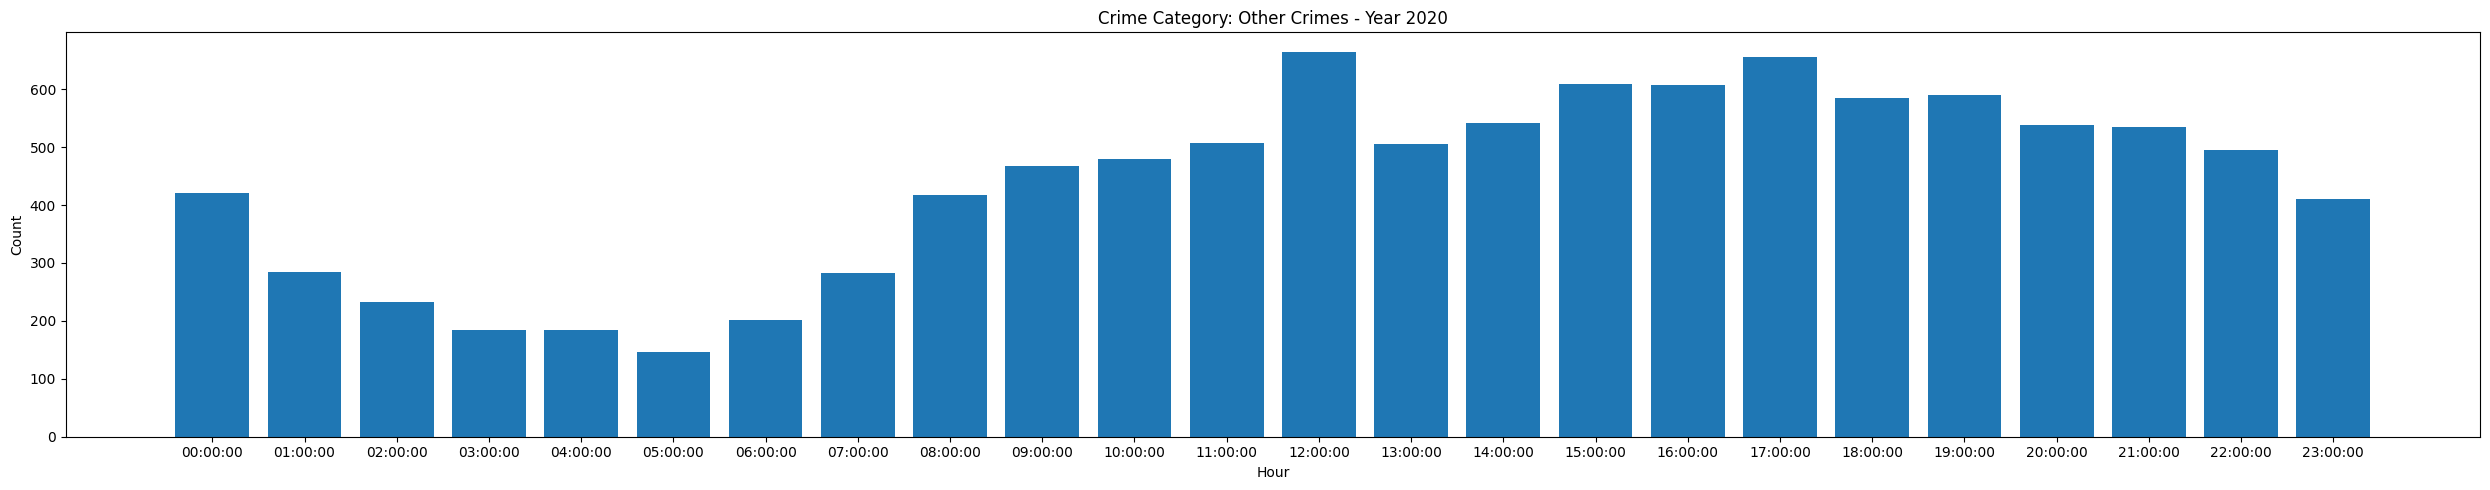

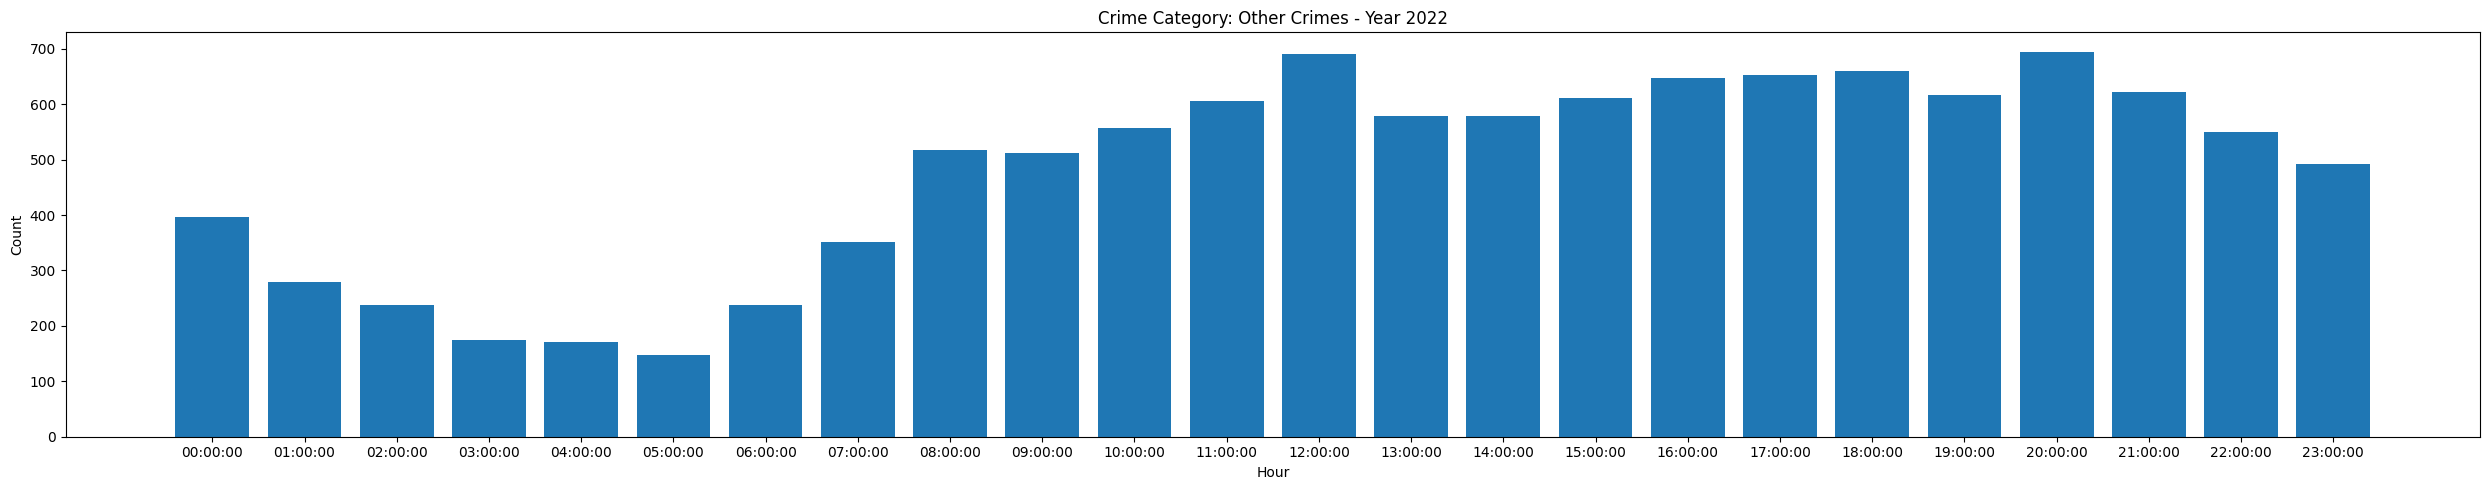

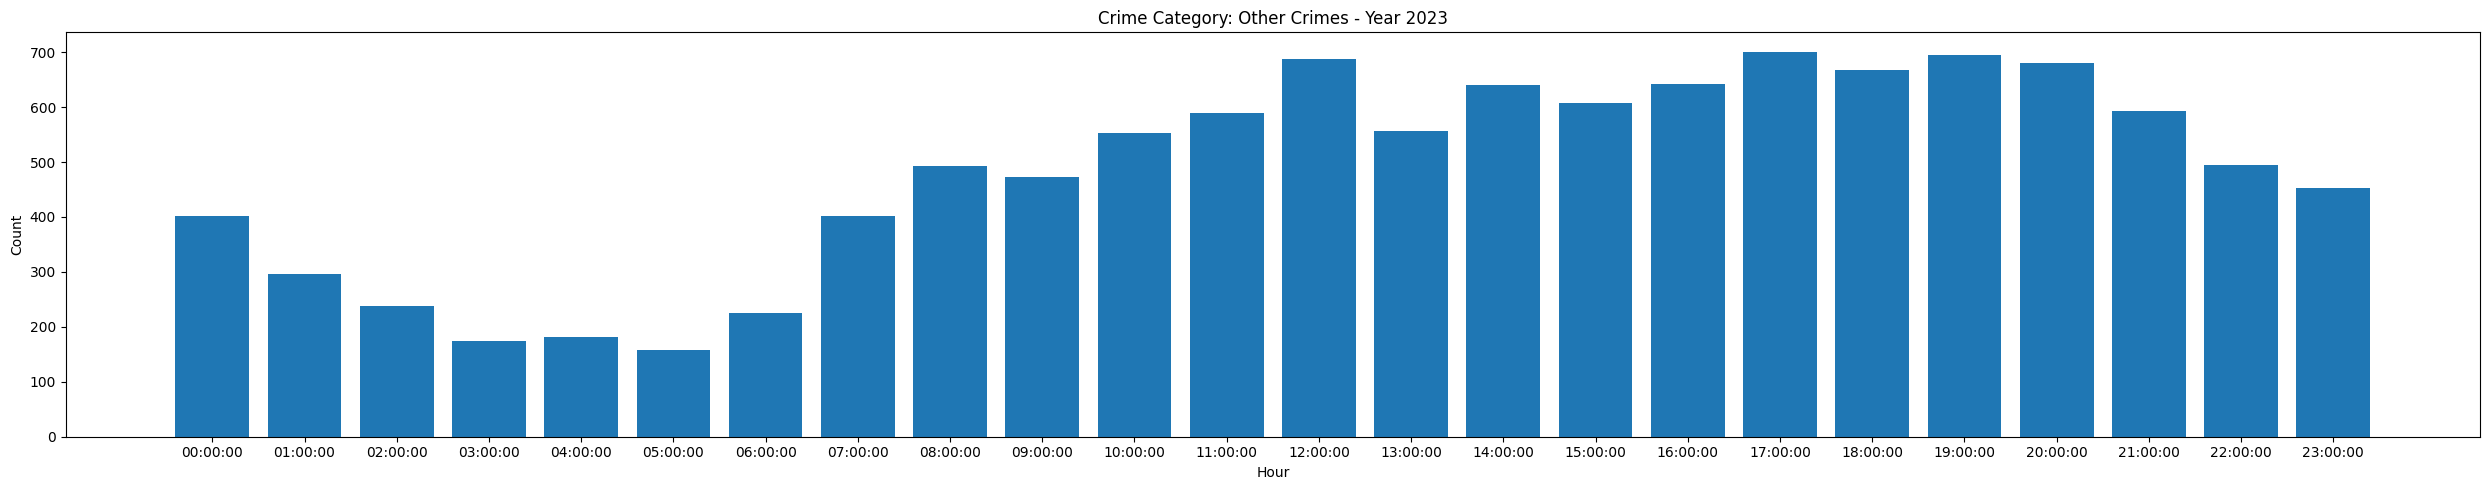

In [27]:
for i in iter:
  res = count_crimes_by_time(crime_by_year[i], crimes_categories_names.index("Other Crimes"))
  create_histogram(res, title="Crime Category: Other Crimes - Year " + str(years[i]))

## Etniczność ofiary - kody:
* H - Latynosi
* W - Biały
* B - Czarny
* X - Nie wiadomo
* O - Inny
* A - Inni Azjaci
* K - Koreańska
* F - Filipińska
* C - Chińska
* J - Japońska
* V - Wietnamska
* I - Indiańska / Alaskańska
* P - Z wysp Pacyfiku
* Z - Indyjska
* U - Hawajska 🍕
* G - Ludzie z wyspy Guam
* S - Samoańska
* D - Ludzie z Kambodży
* L - Laotyjska

In [28]:
def merge_ethn(df):
  copy_df = df.copy()
  main_ethn = ["H", "W", "B"]

  for ethn in copy_df["Vict Descent"].unique():
    if ethn not in main_ethn:
      copy_df.loc[copy_df["Vict Descent"] == ethn, "Vict Descent"] = "O"

  return copy_df
def count_ethnicity(df):
    res_df = pd.DataFrame()
    copy_df = merge_ethn(df)
    for ethn in copy_df["Vict Descent"].unique():
      count = copy_df[copy_df["Vict Descent"] == ethn]["Vict Descent"].count()
      data = {"Victim Descent": [ethn], "Count": [count]}

      res_df = pd.concat([res_df, pd.DataFrame(data)], ignore_index=True)

    return res_df.sort_values(by=["Count"], ascending=False).reset_index(drop=True)

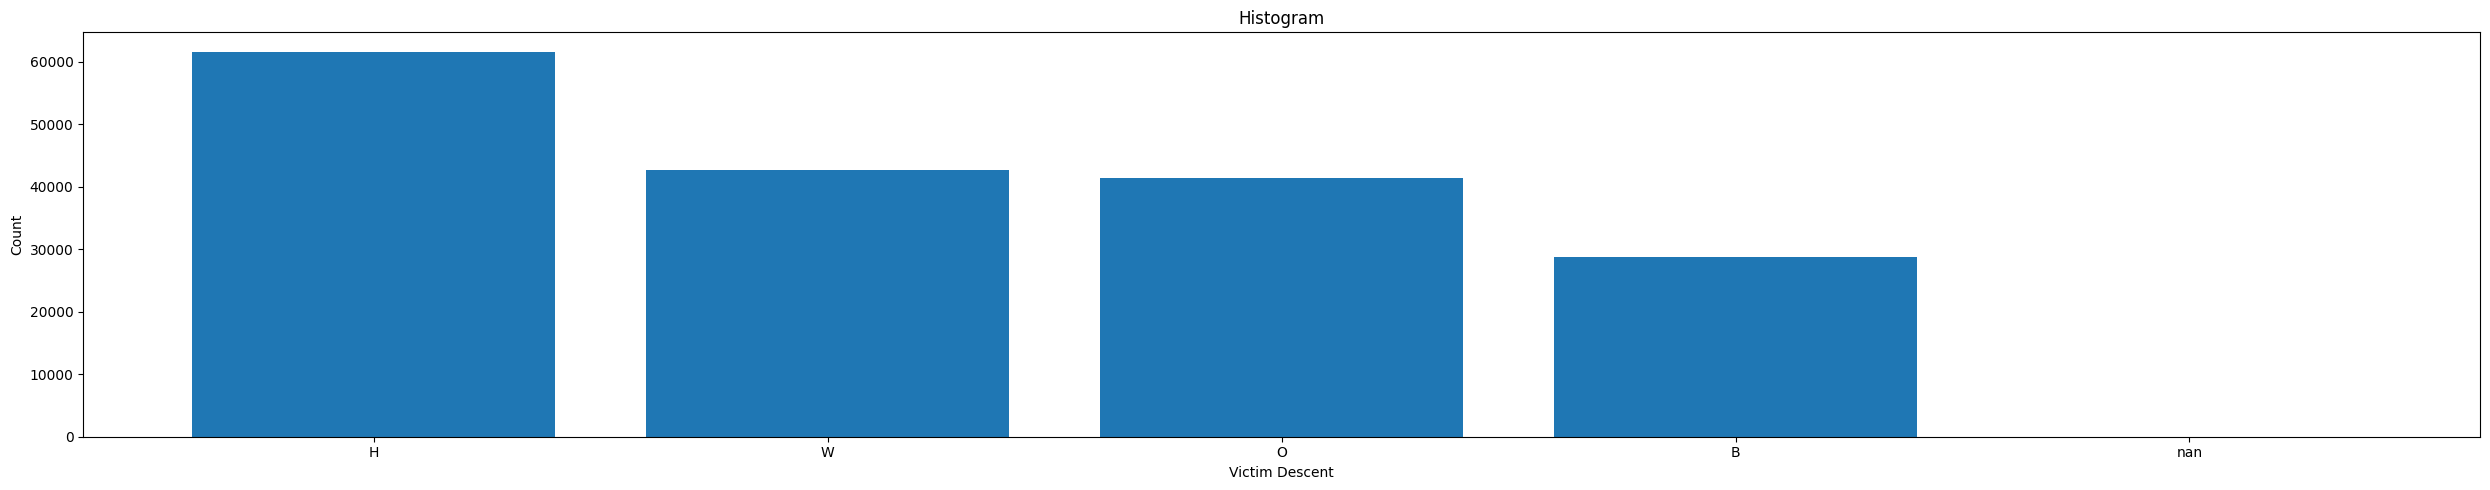

In [29]:
res = count_ethnicity(crime_by_year[0])
create_histogram(res)

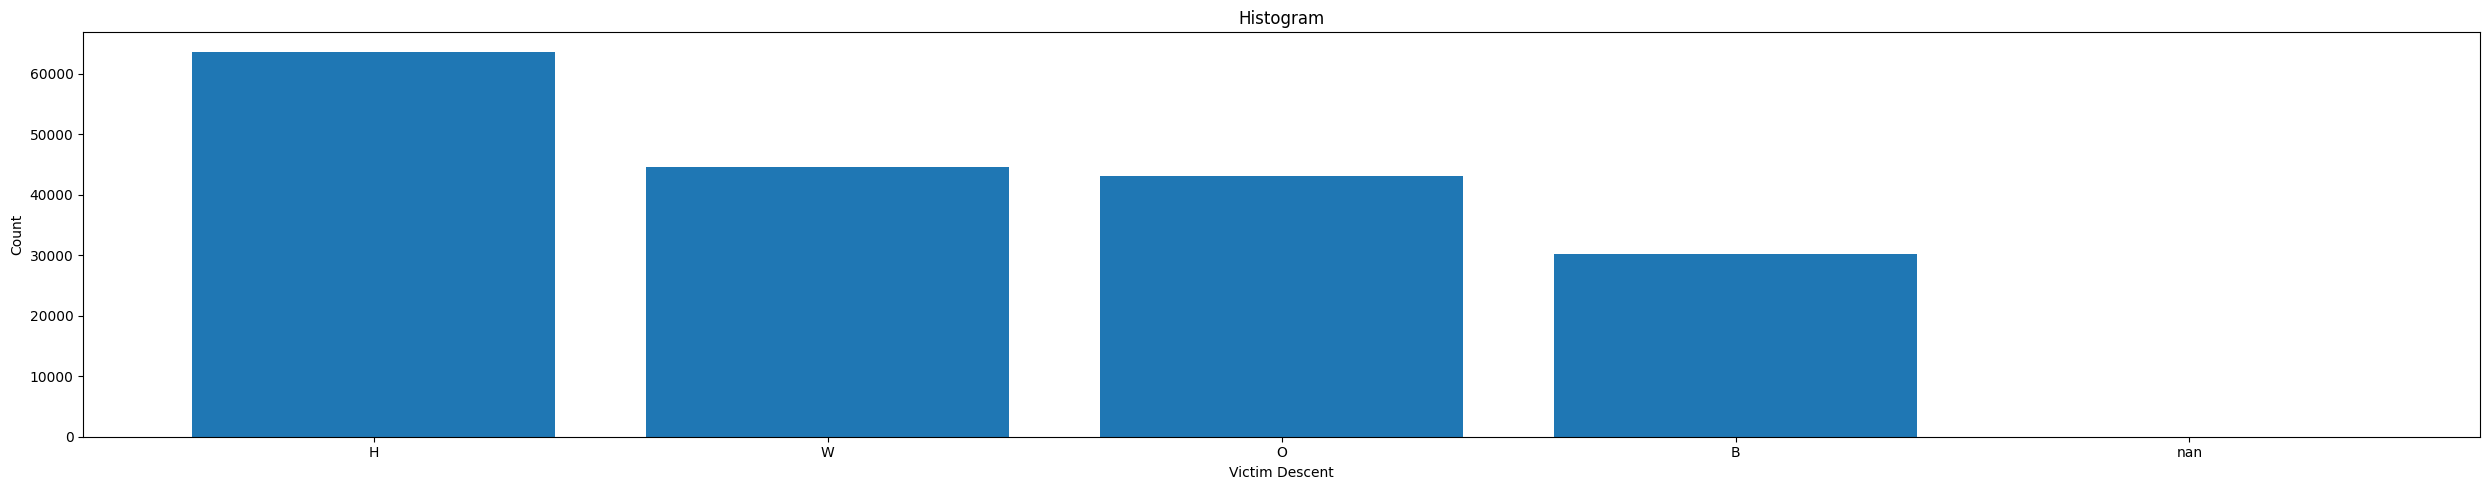

In [30]:
res = count_ethnicity(crime_by_year[1])
create_histogram(res)

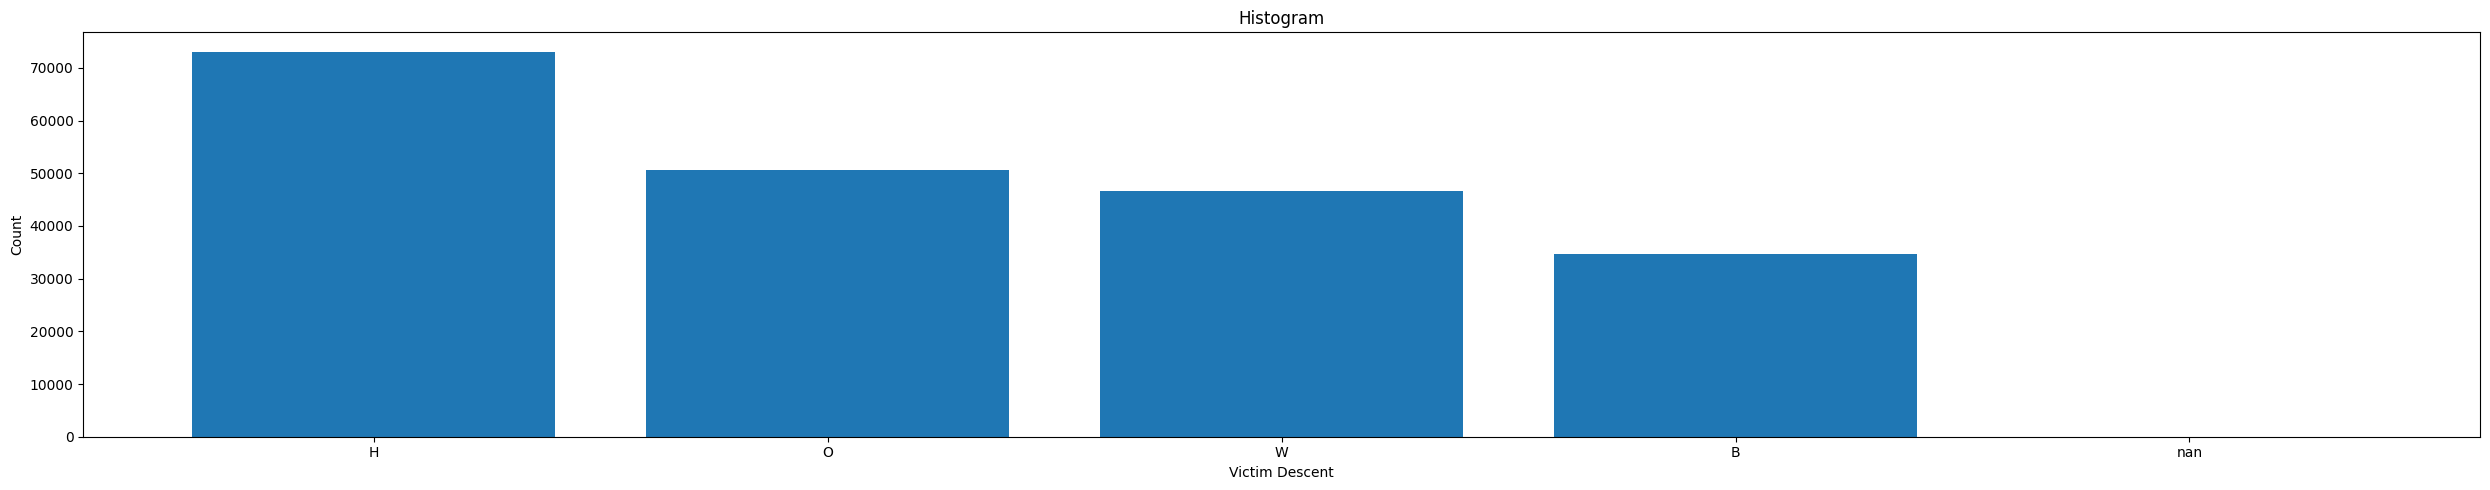

In [31]:
res = count_ethnicity(crime_by_year[2])
create_histogram(res)

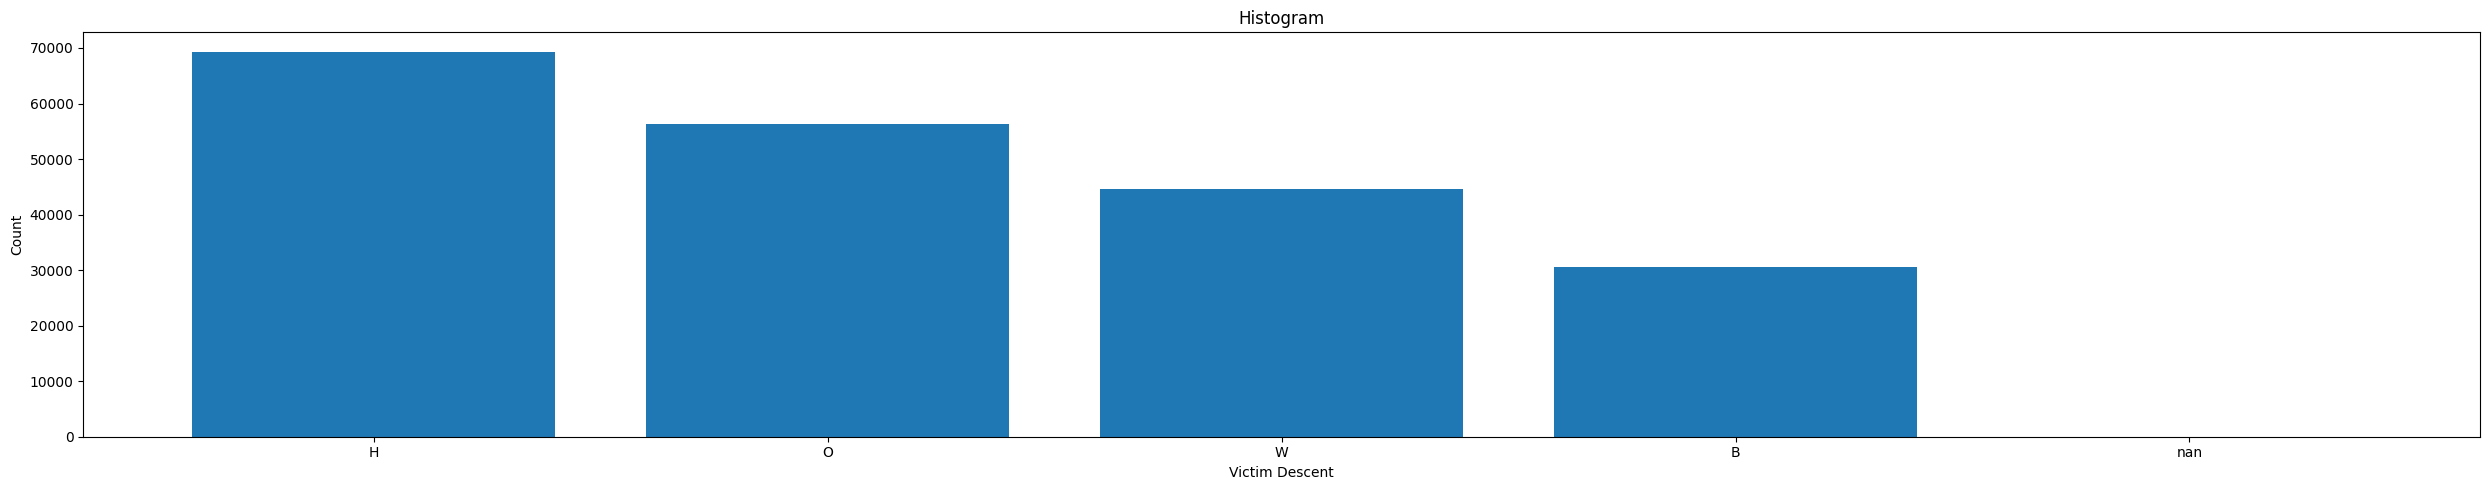

In [32]:
res = count_ethnicity(crime_by_year[3])
create_histogram(res, rows=1, cols=3)

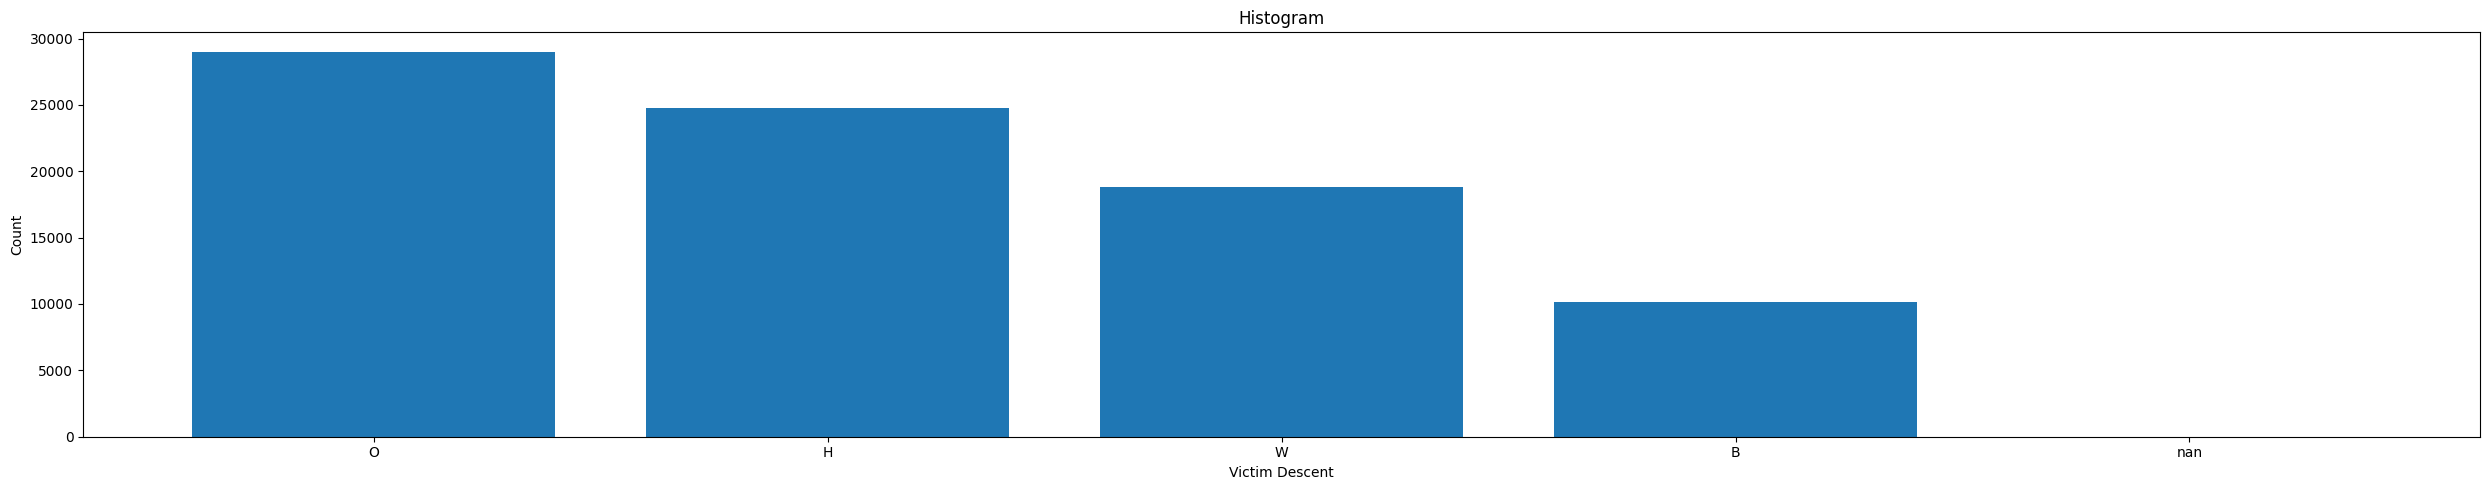

In [33]:
res = count_ethnicity(crime_by_year[4])
create_histogram(res, rows=1, cols=3)

In [34]:
def count_crimes_by_ethnicity(df, crime_category):
    res_df = pd.DataFrame()
    copy_df = merge_ethn(df)
    crimes = crimes_categories_codes[crime_category]
    for ethn in copy_df["Vict Descent"].unique():
      count = copy_df[(copy_df["Crm Cd"].isin(crimes)) & (copy_df["Vict Descent"] == ethn)]["Crm Cd"].count()
      data = {"Victim Descent": [ethn], "Count": [count]}

      res_df = pd.concat([res_df, pd.DataFrame(data)], ignore_index=True)

    return res_df.sort_values(by=["Count"], ascending=False).reset_index(drop=True)

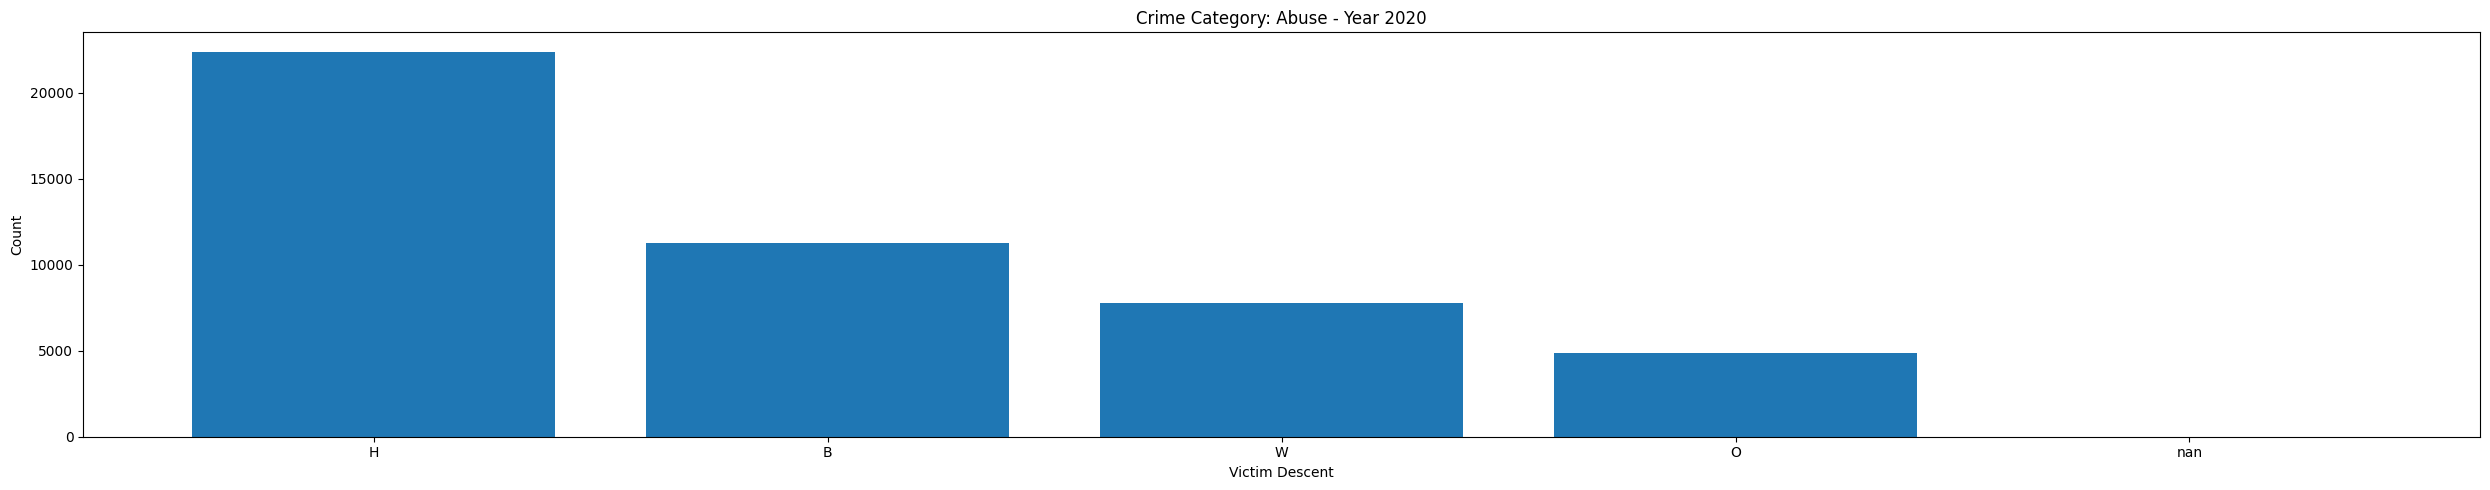

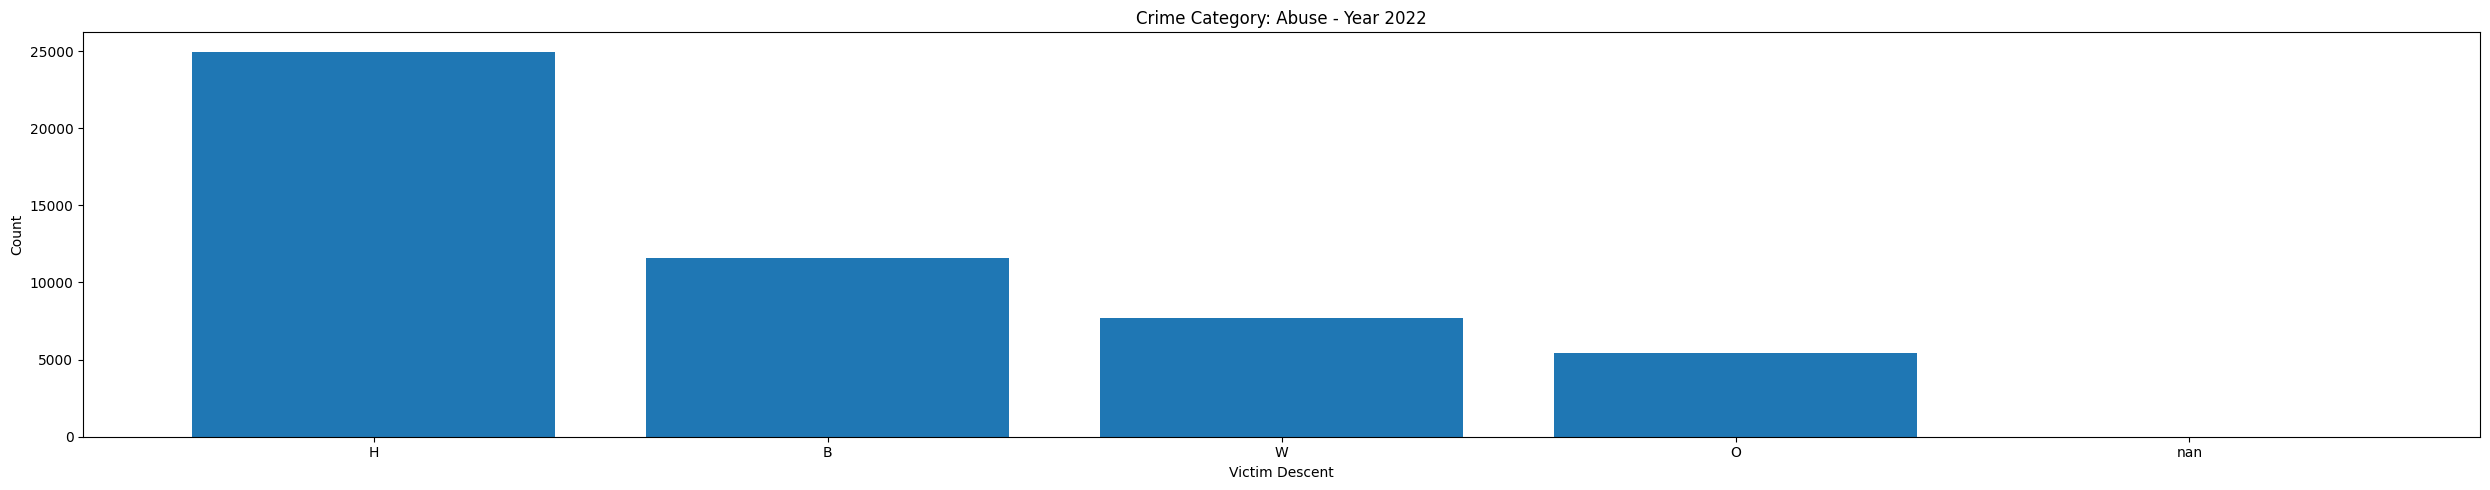

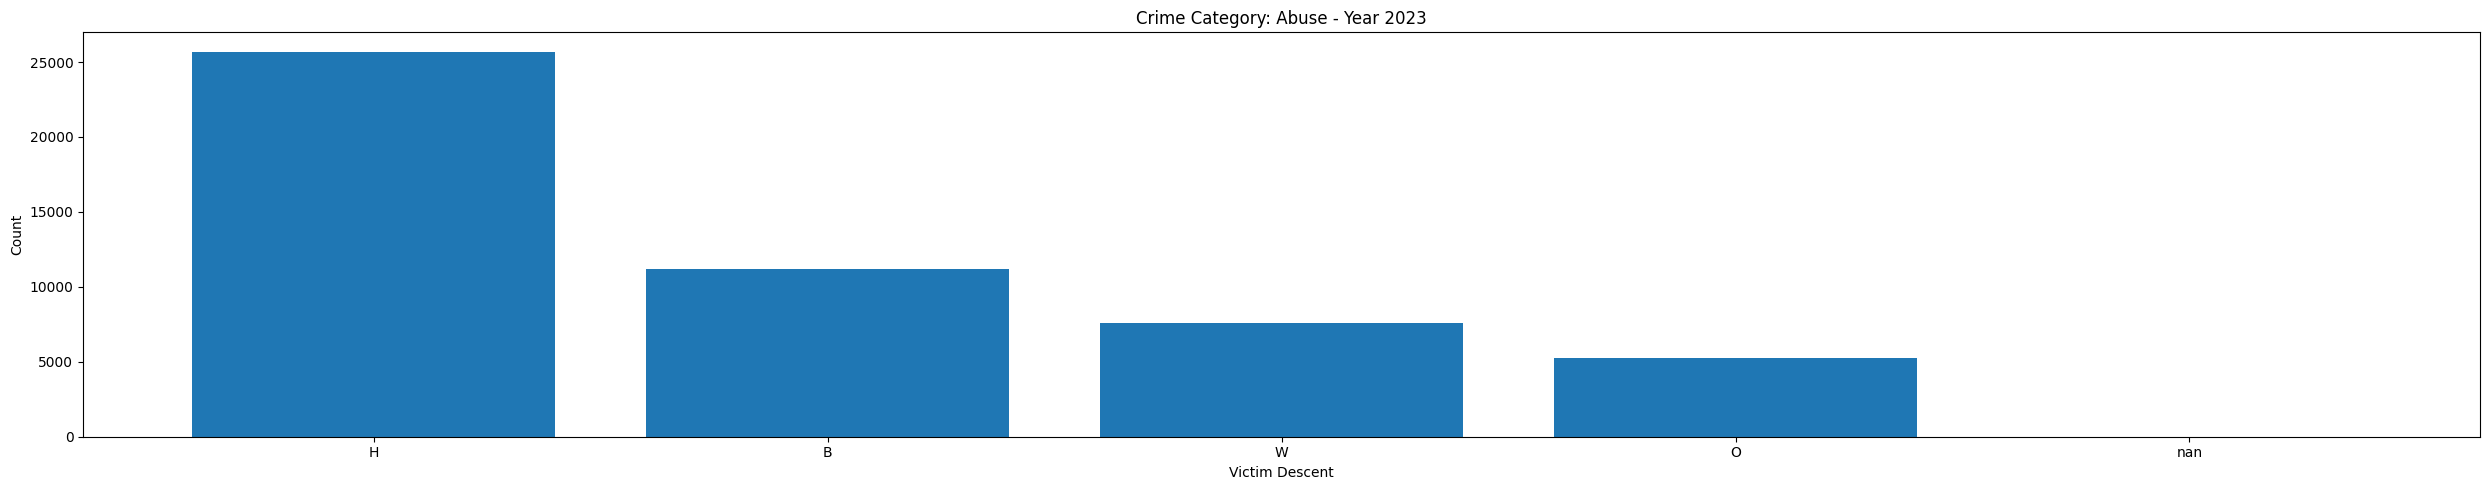

In [35]:
for i in iter:
  res = count_crimes_by_ethnicity(crime_by_year[i], crimes_categories_names.index("Abuse"))
  create_histogram(res, title="Crime Category: Abuse - Year " + str(years[i]))

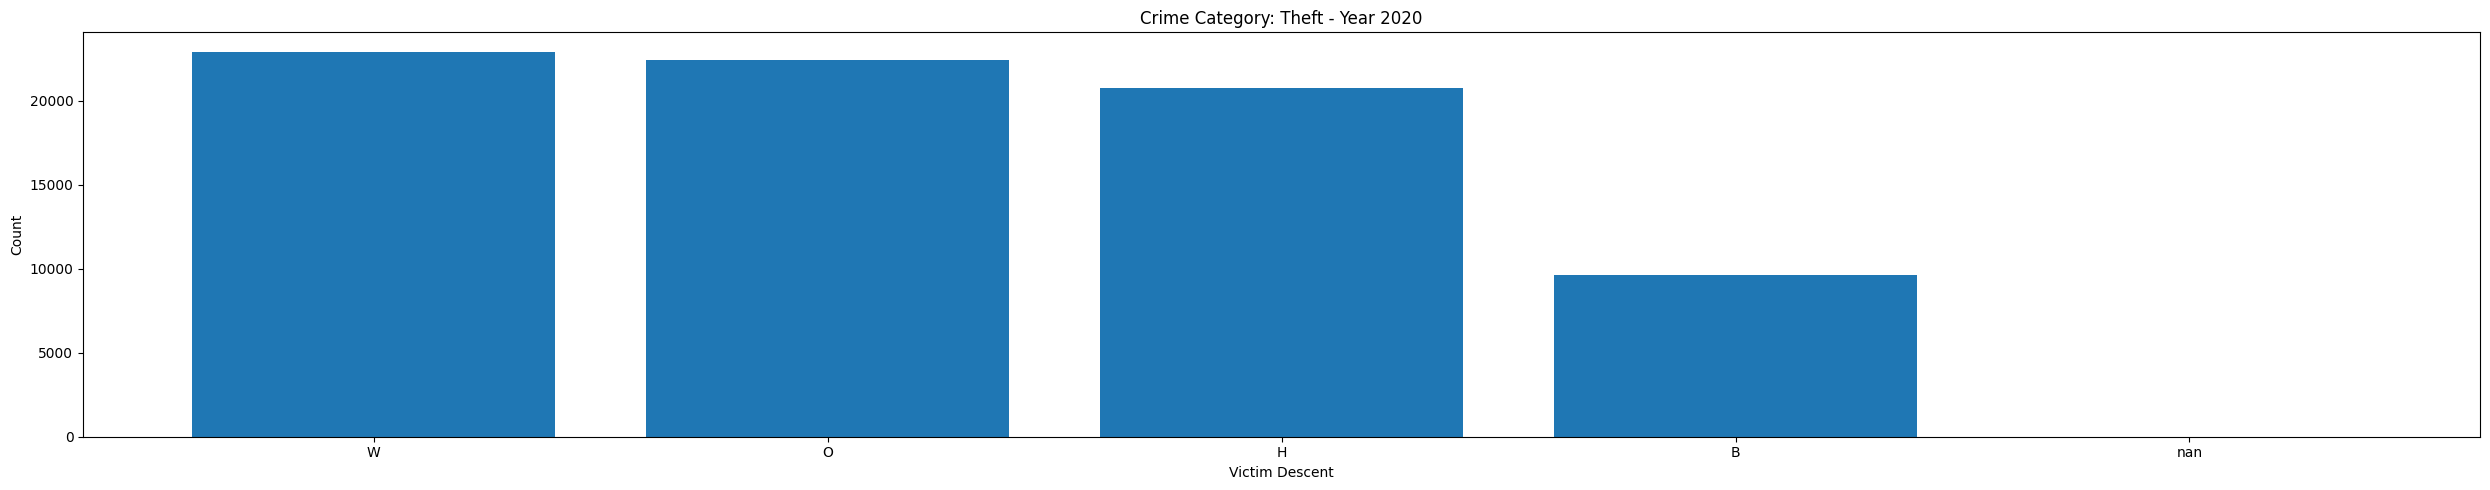

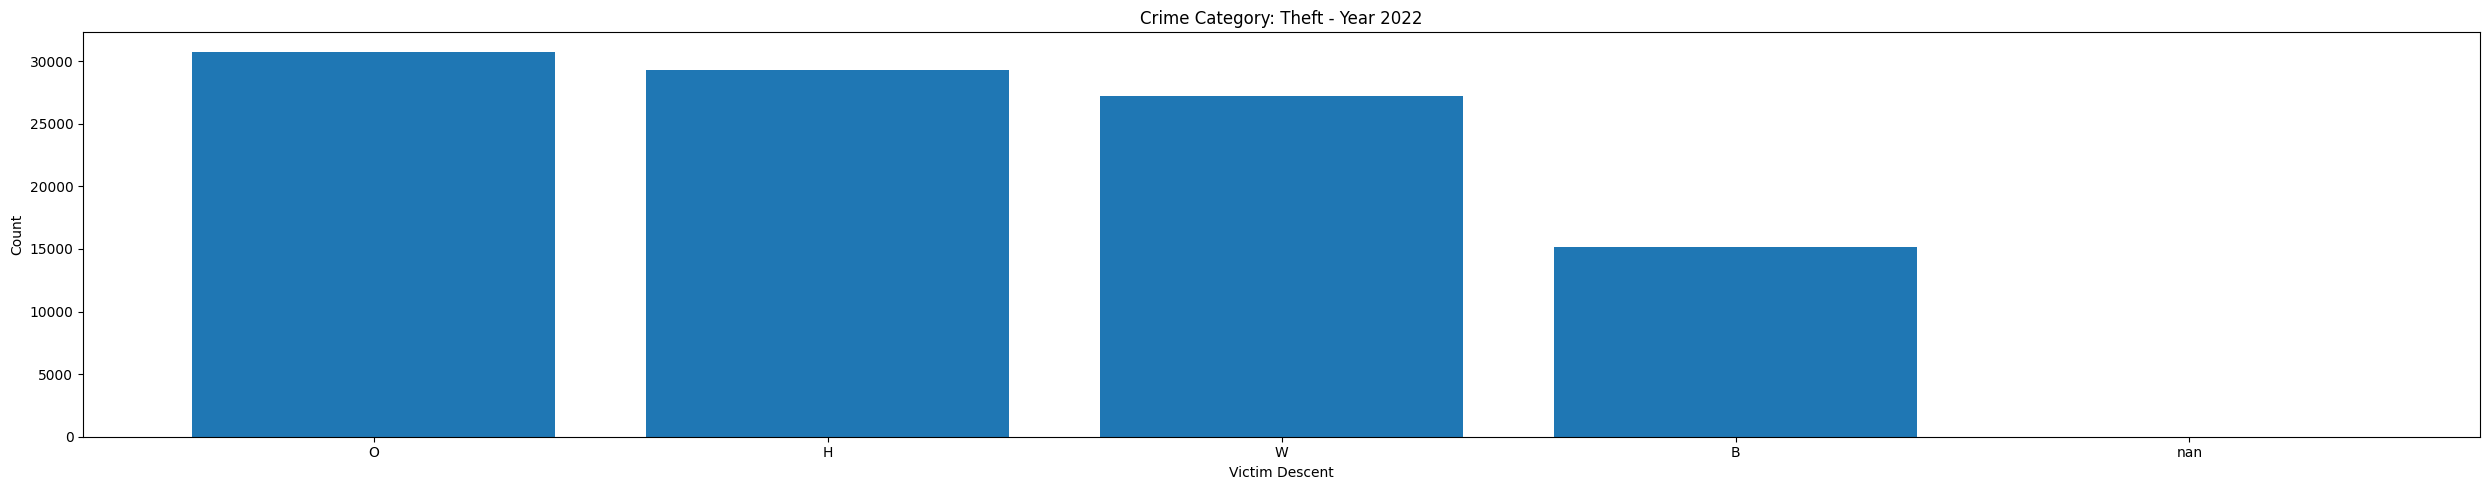

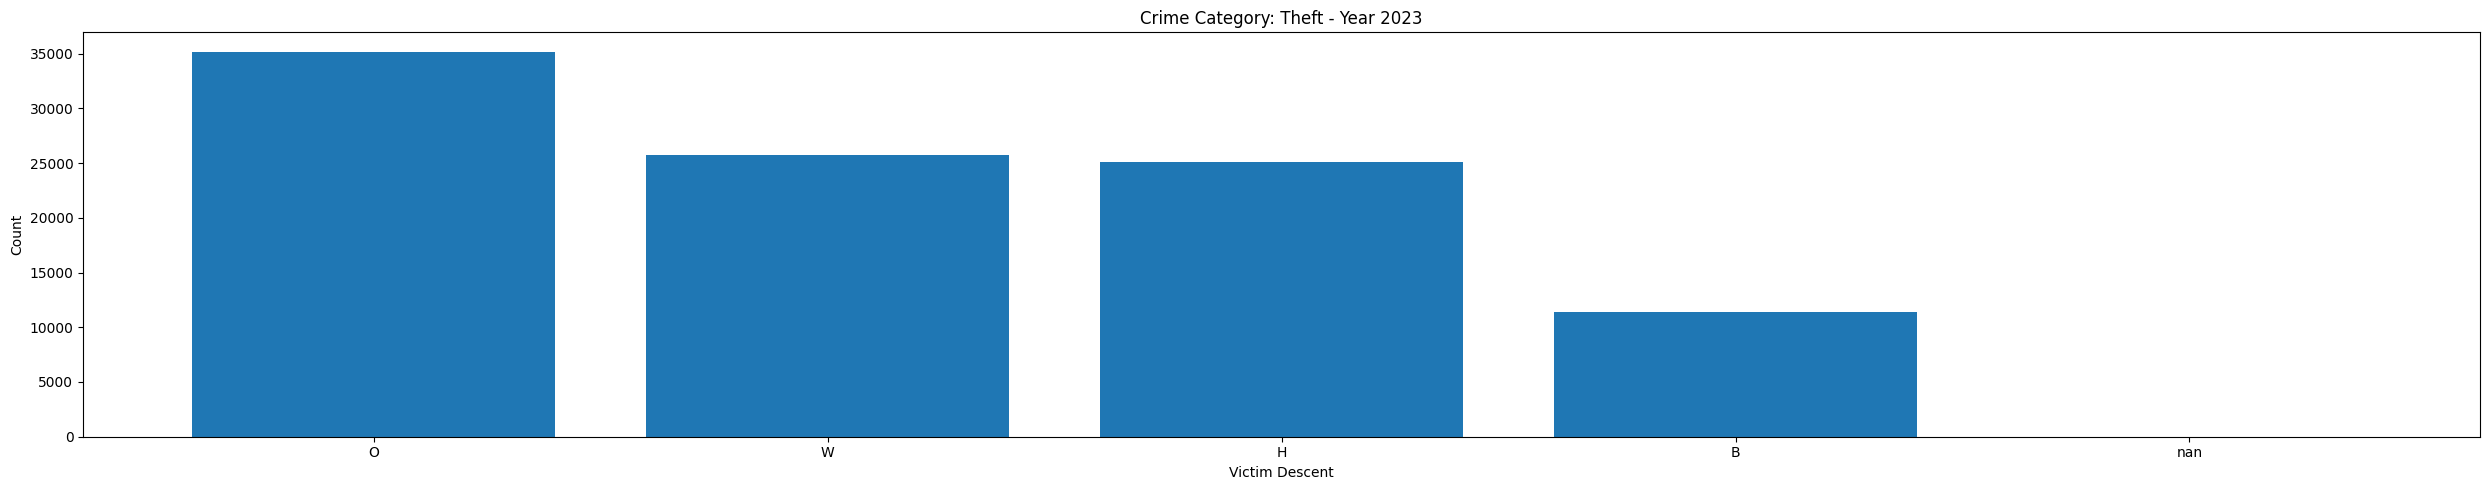

In [36]:
for i in iter:
  res = count_crimes_by_ethnicity(crime_by_year[i], crimes_categories_names.index("Theft"))
  create_histogram(res, title="Crime Category: Theft - Year " + str(years[i]))

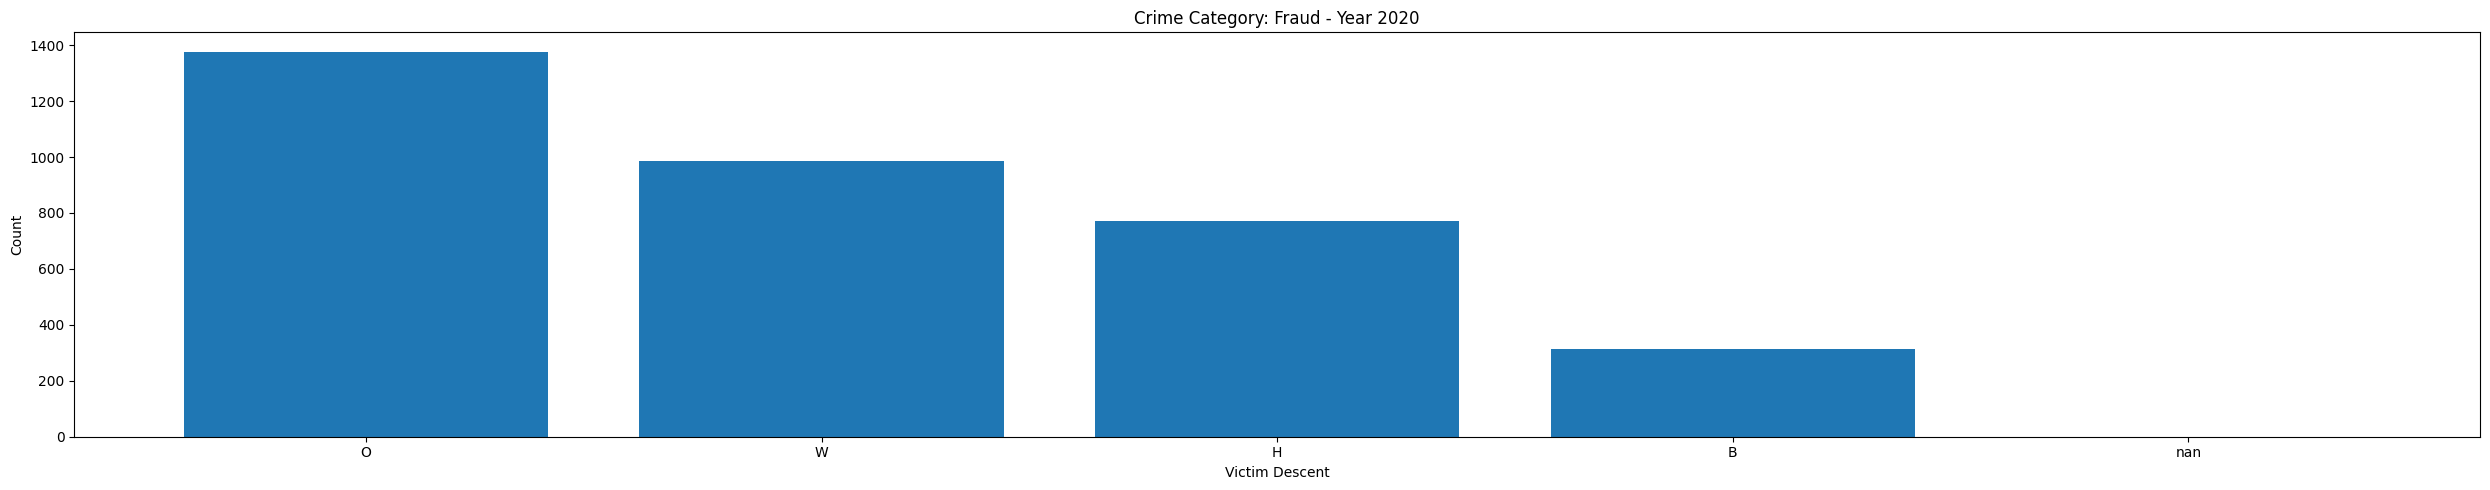

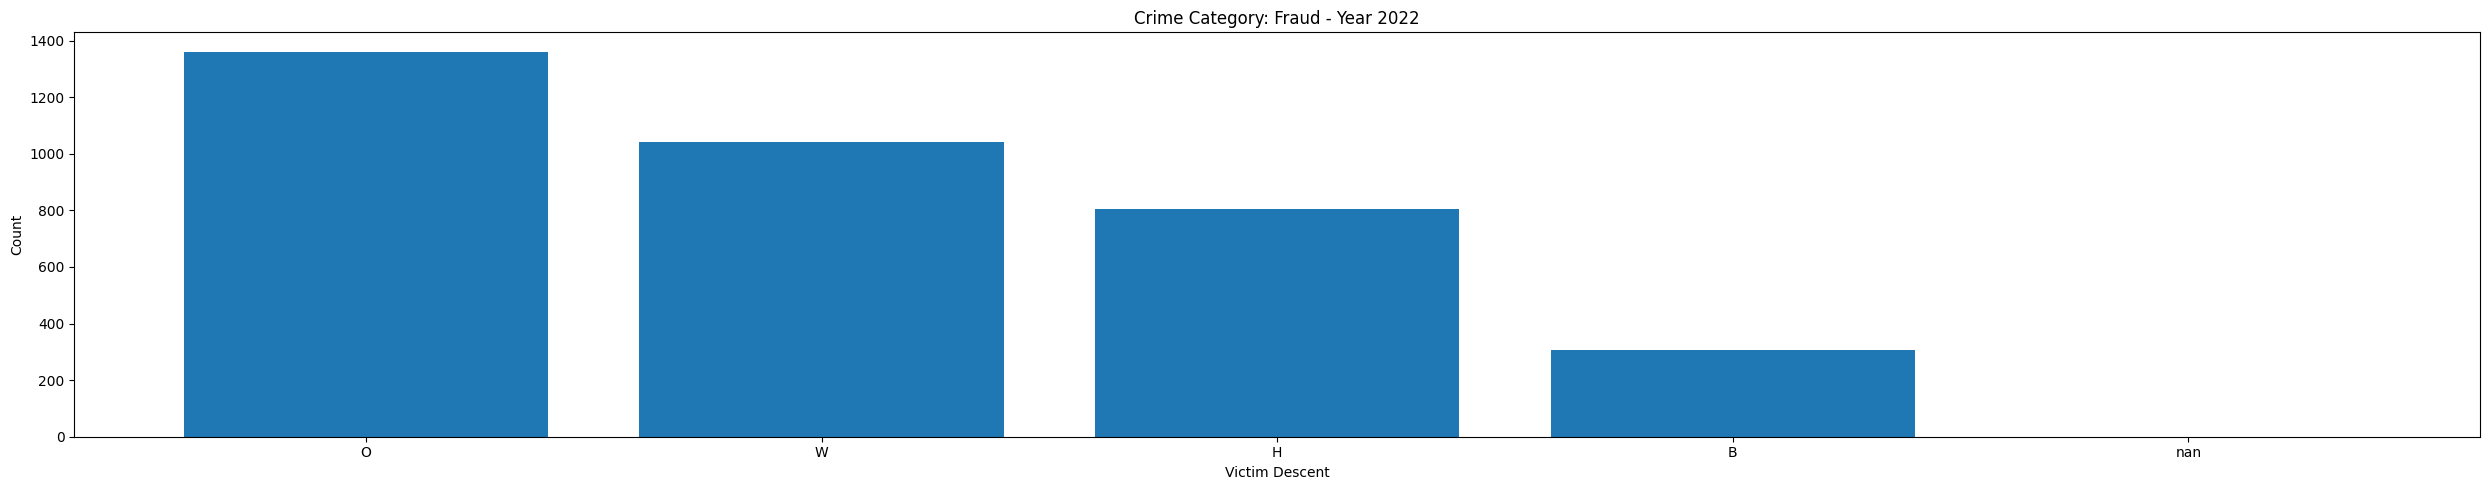

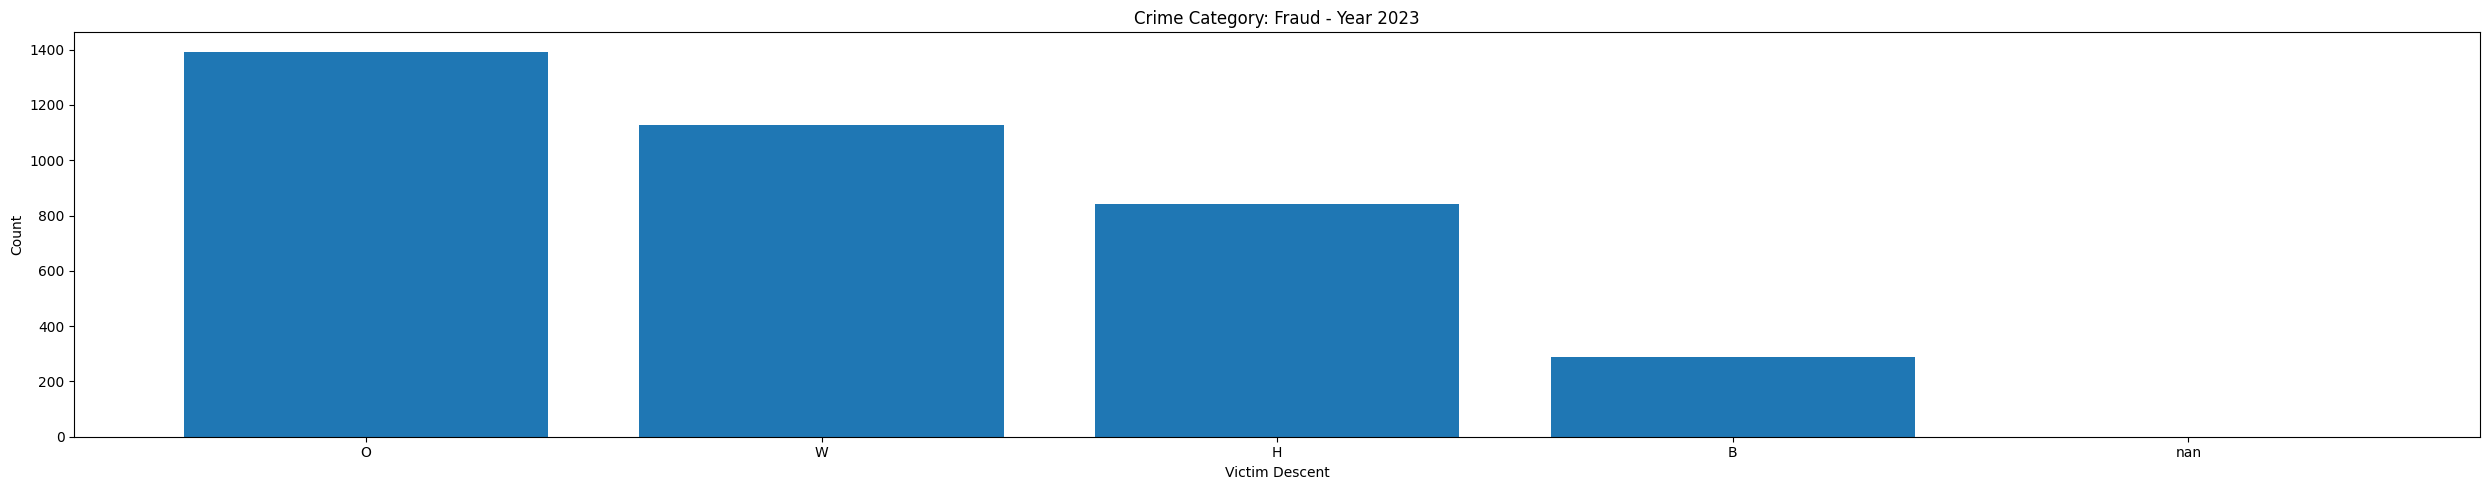

In [37]:
for i in iter:
    res = count_crimes_by_ethnicity(crime_by_year[i], crimes_categories_names.index("Fraud"))
    create_histogram(res, title="Crime Category: Fraud - Year " + str(years[i]))

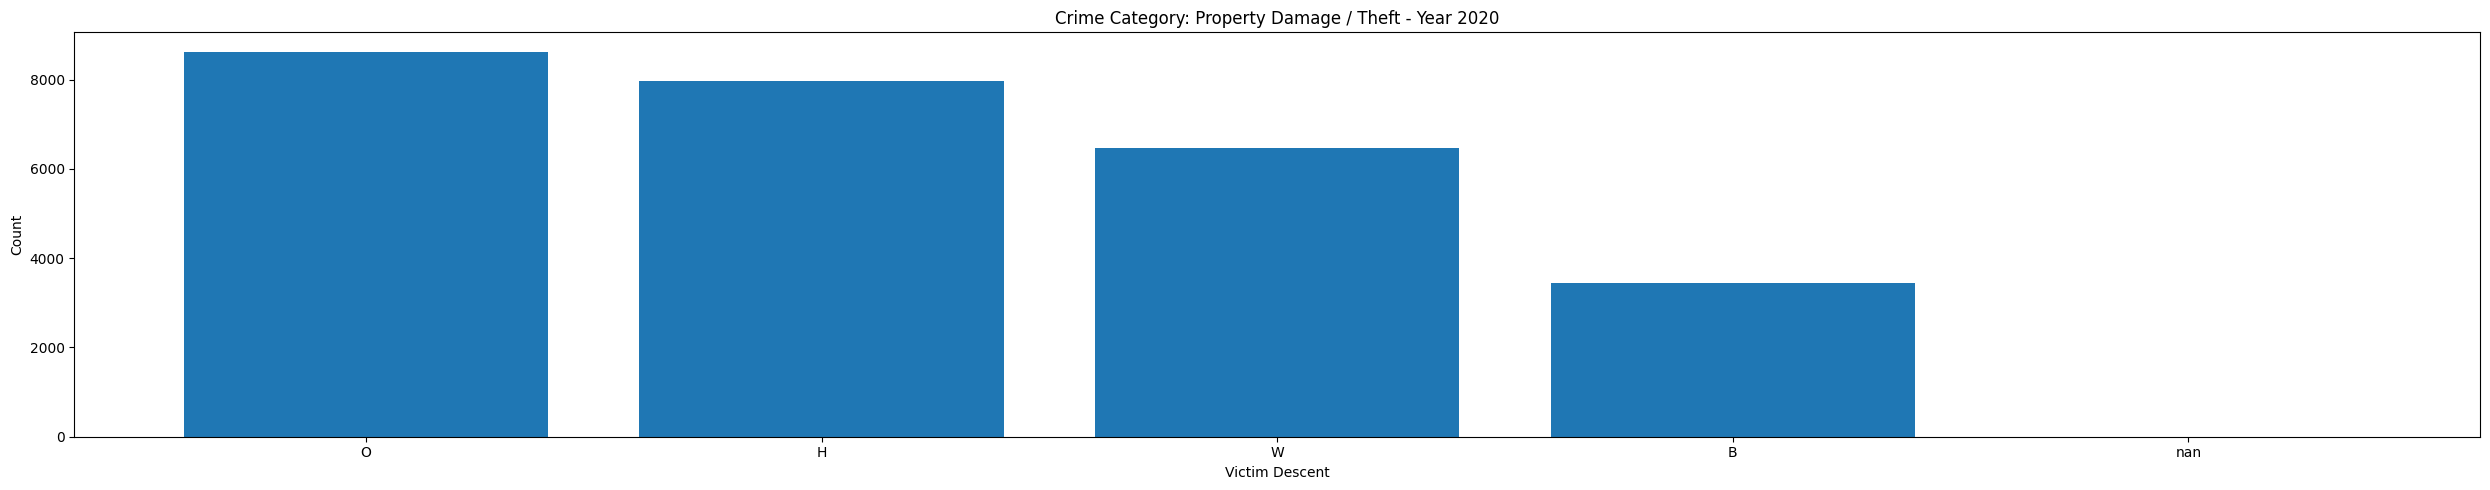

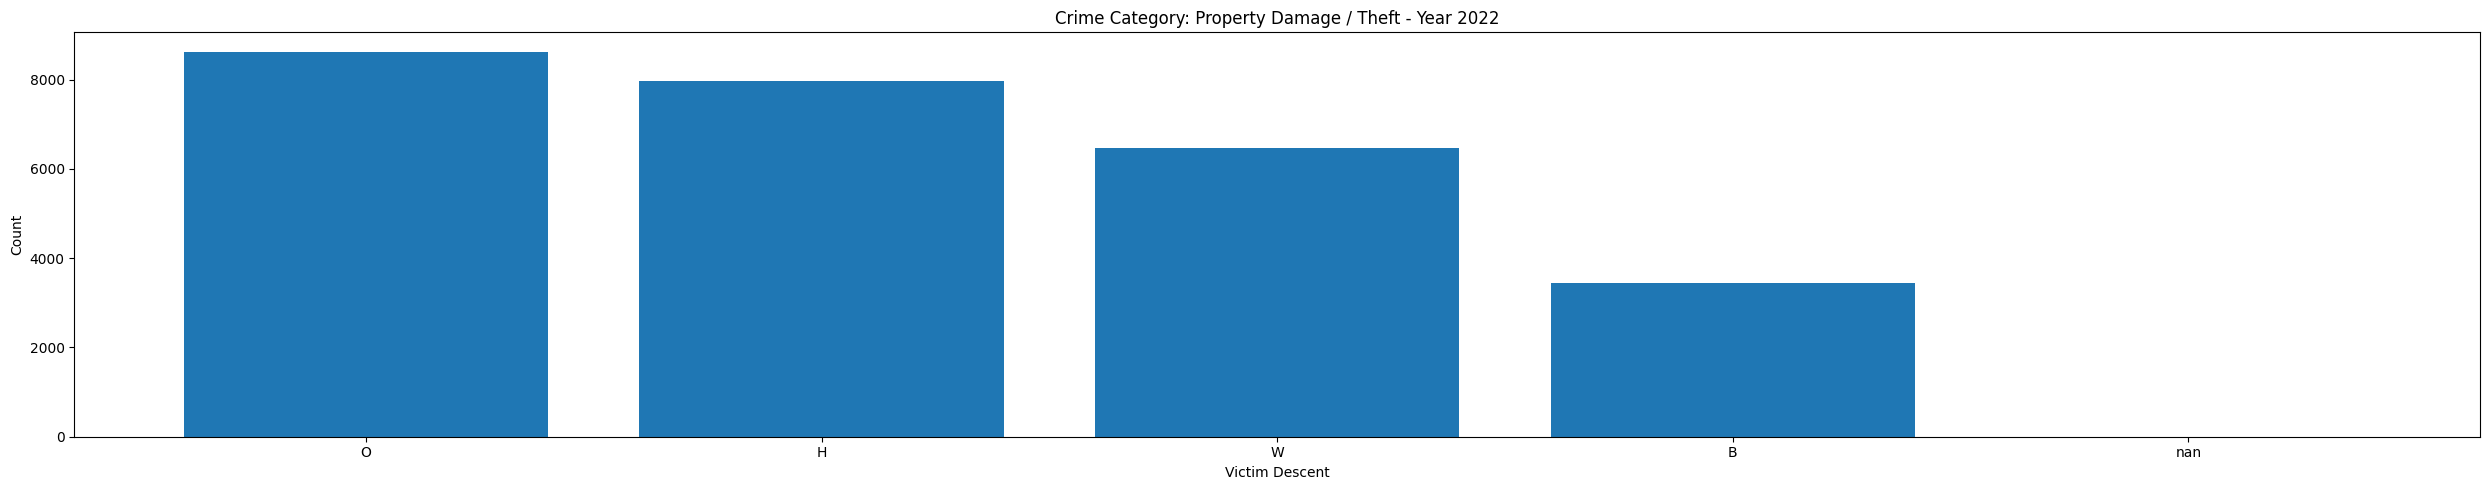

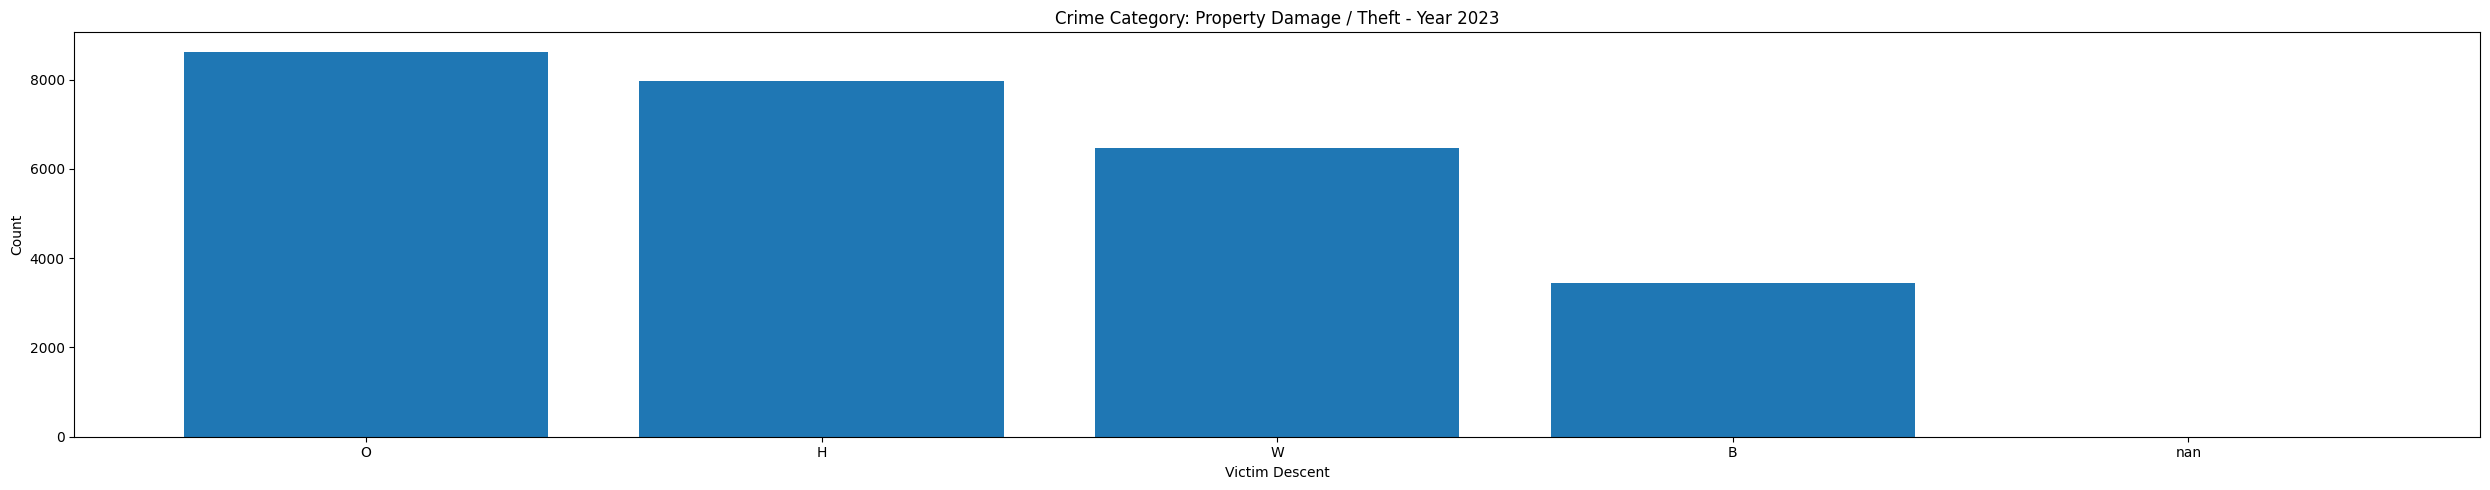

In [38]:
for i in iter:
  res = count_crimes_by_ethnicity(crime_by_year[0], crimes_categories_names.index("Property Damage / Theft"))
  create_histogram(res, title="Crime Category: Property Damage / Theft - Year " + str(years[i]))

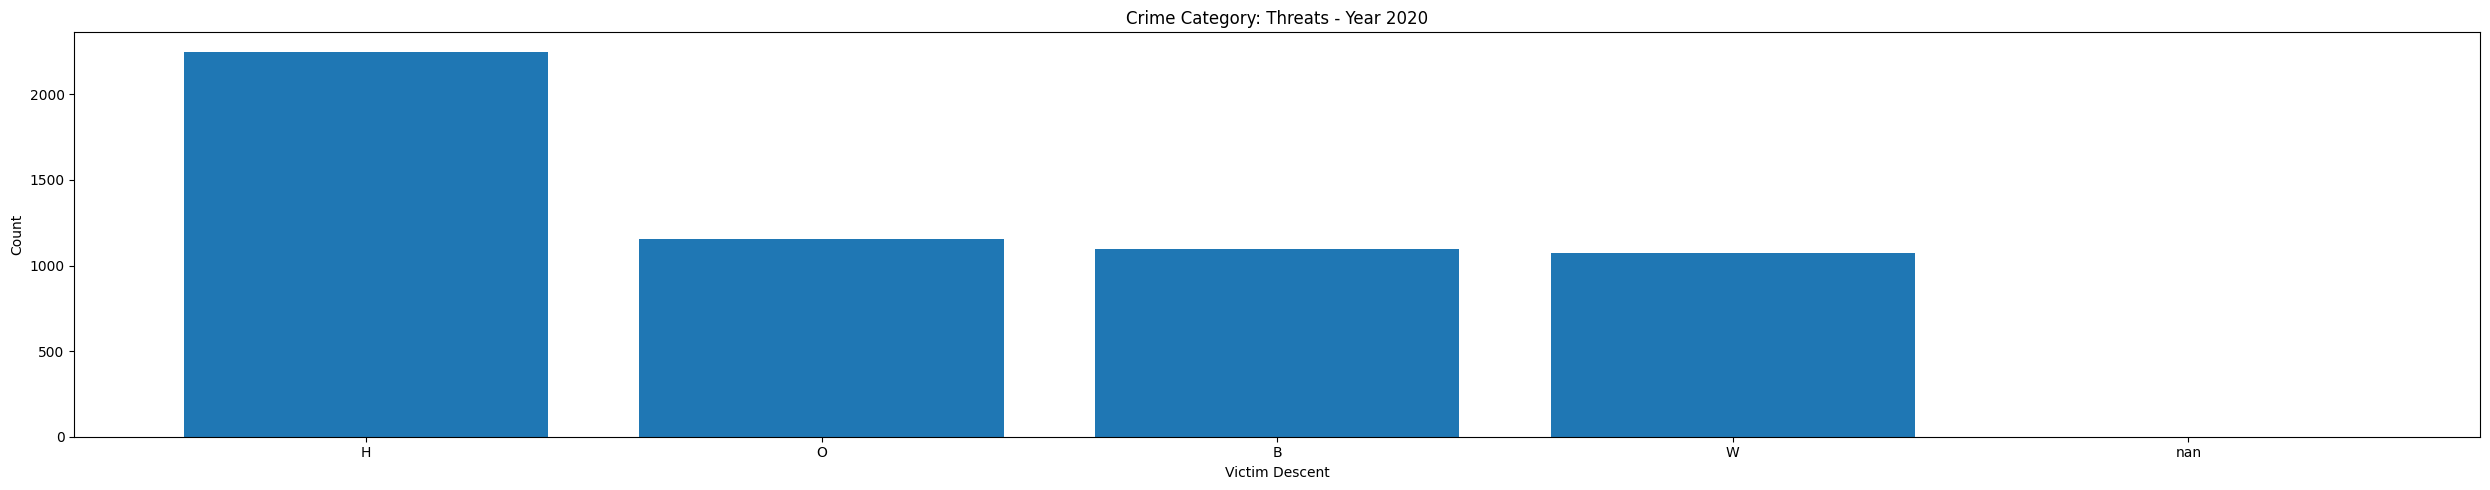

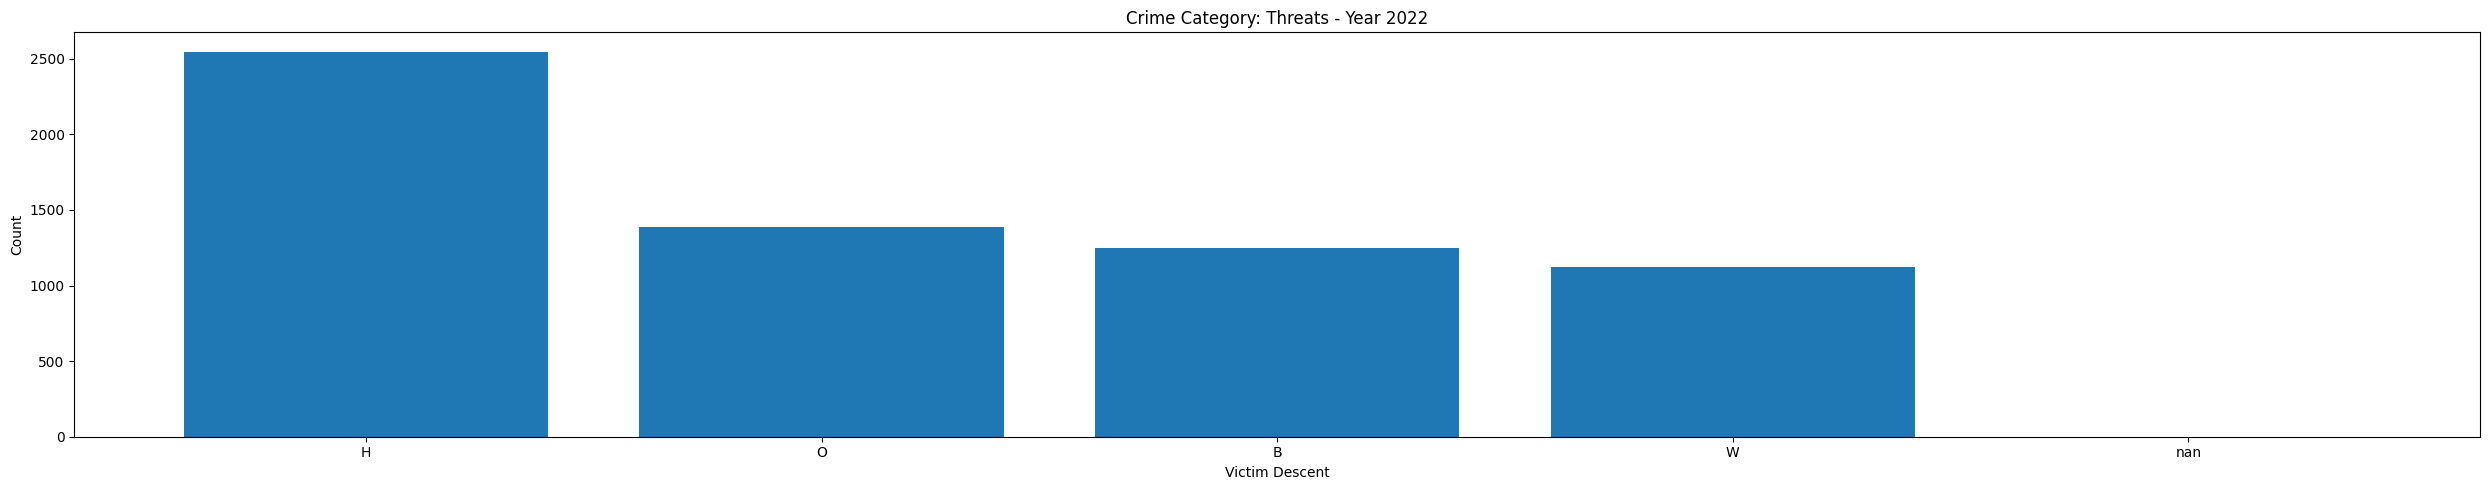

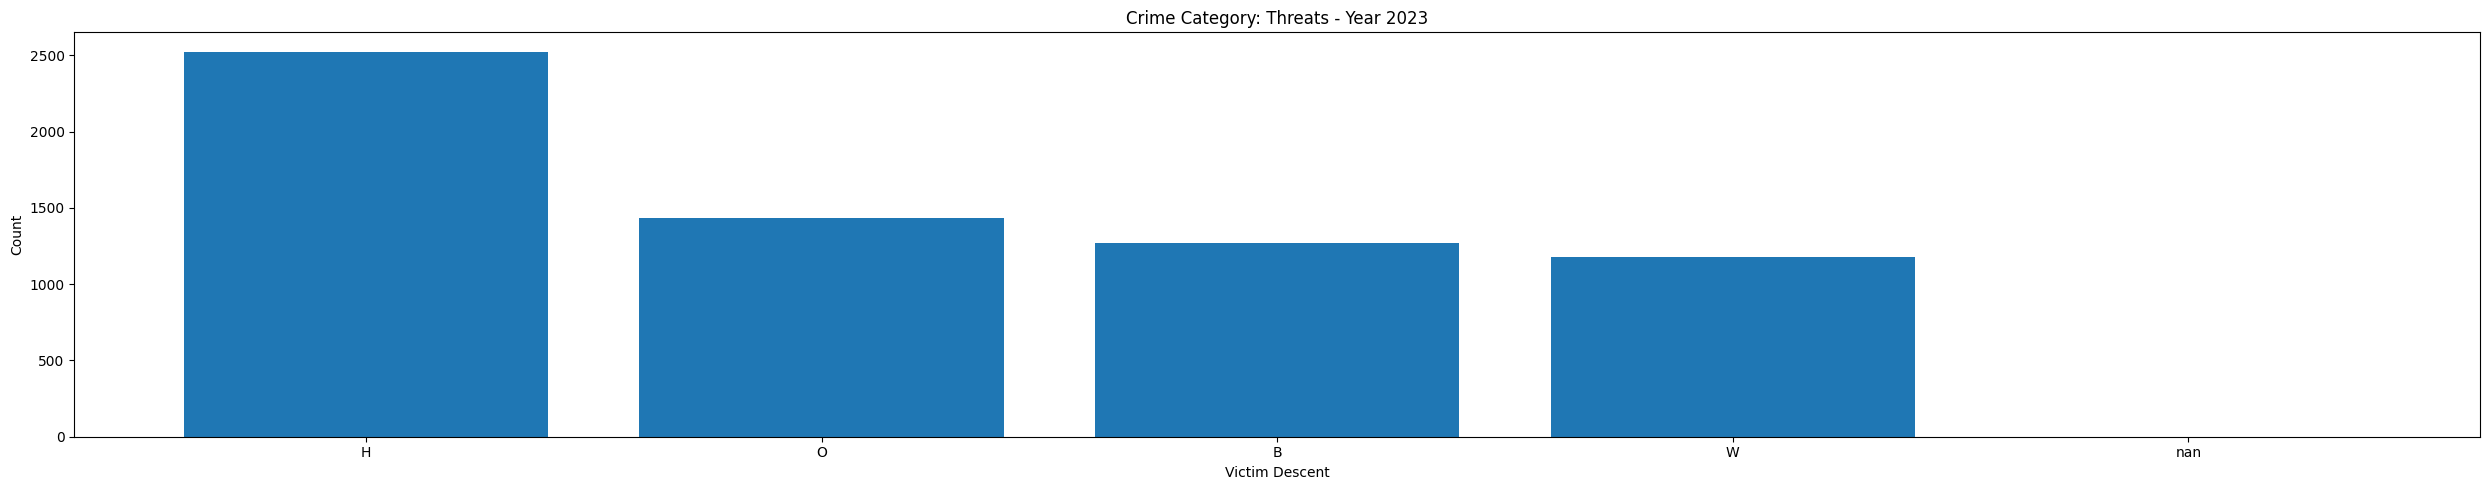

In [39]:
for i in iter:
    res = count_crimes_by_ethnicity(crime_by_year[i], crimes_categories_names.index("Threats"))
    create_histogram(res, title="Crime Category: Threats - Year " + str(years[i]))

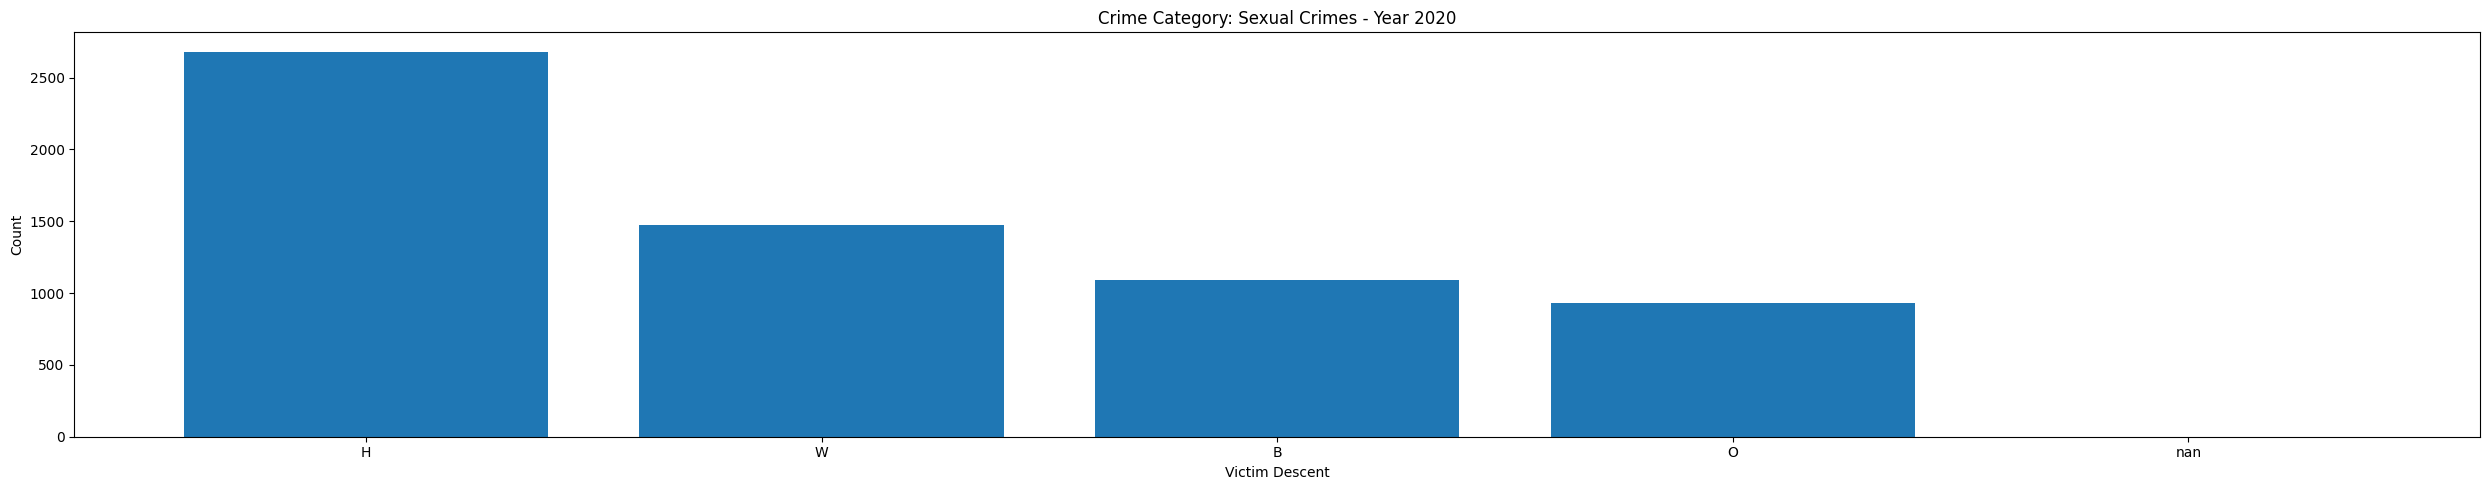

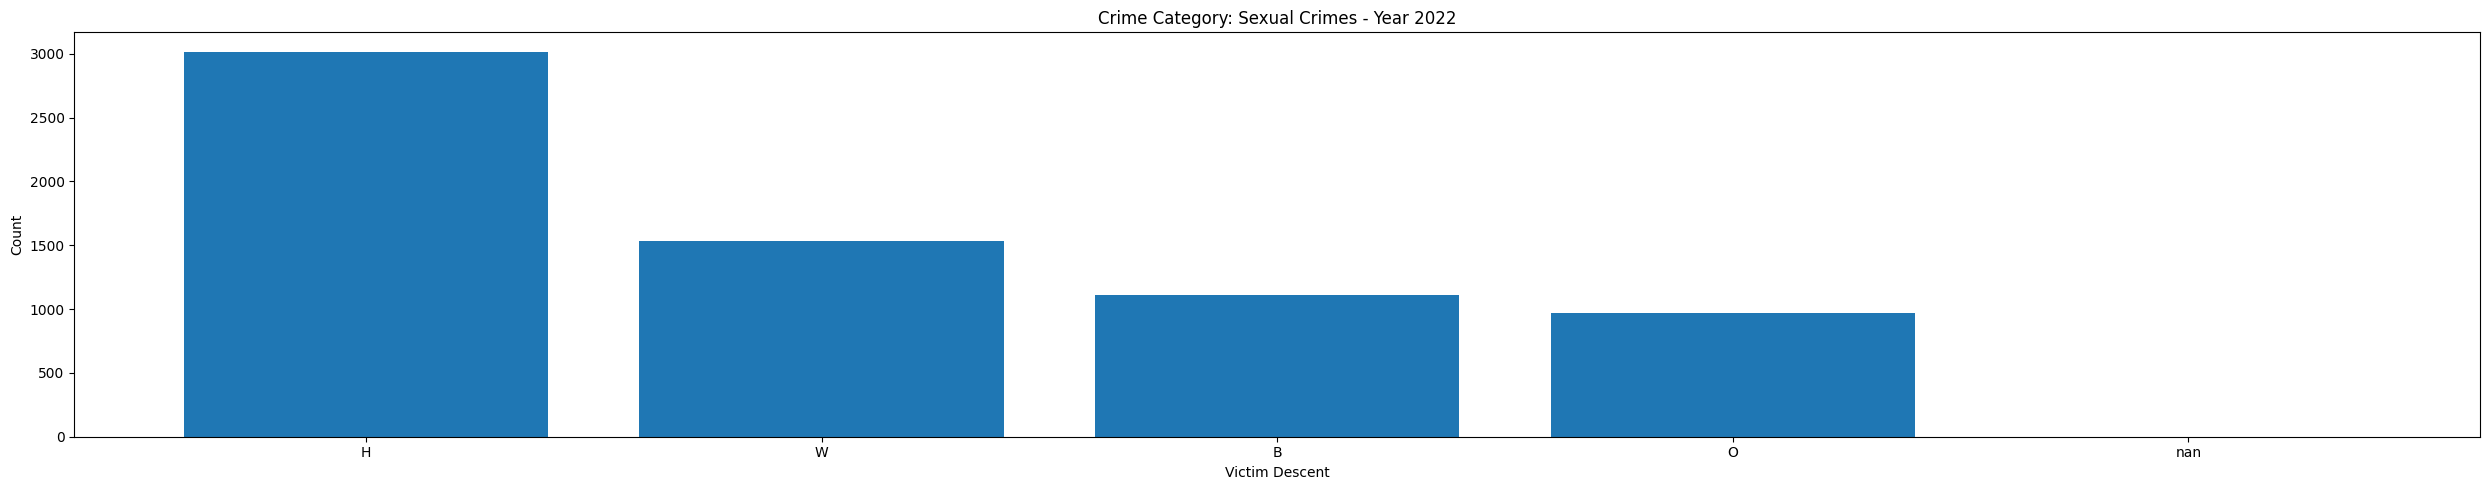

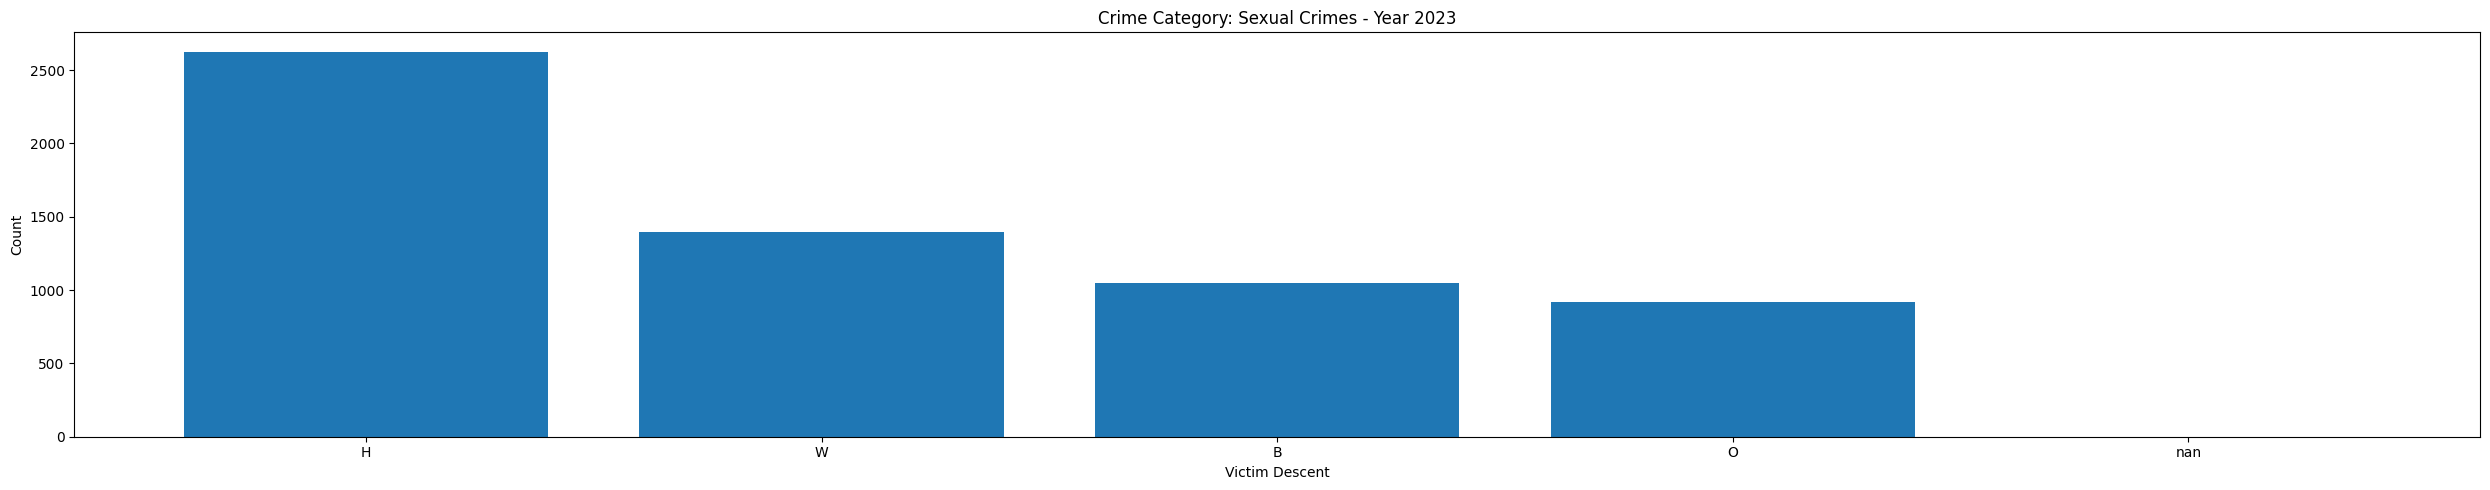

In [40]:
for i in iter:
  res = count_crimes_by_ethnicity(crime_by_year[i], crimes_categories_names.index("Sexual Crimes"))
  create_histogram(res, title="Crime Category: Sexual Crimes - Year " + str(years[i]))

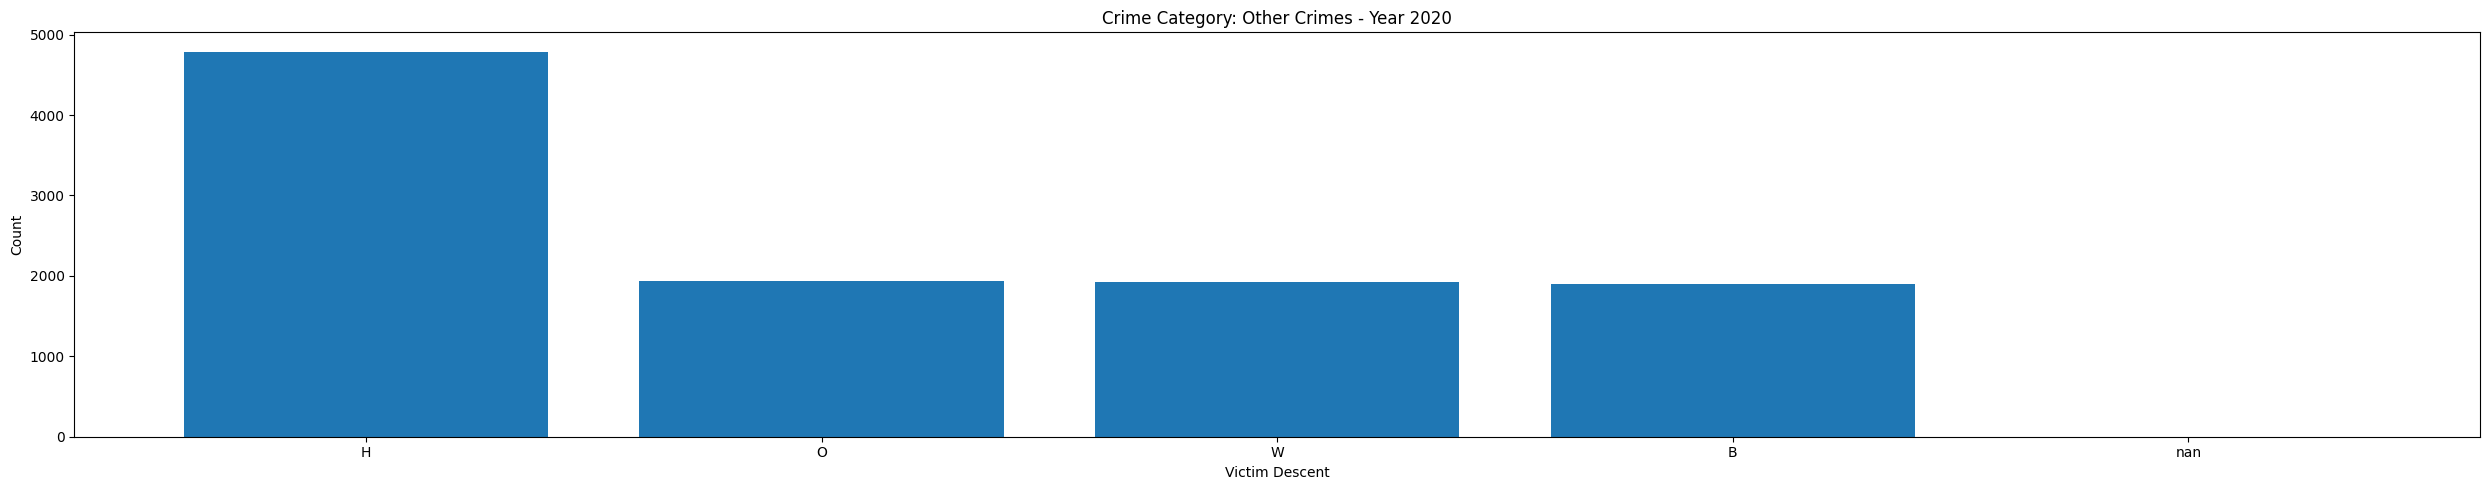

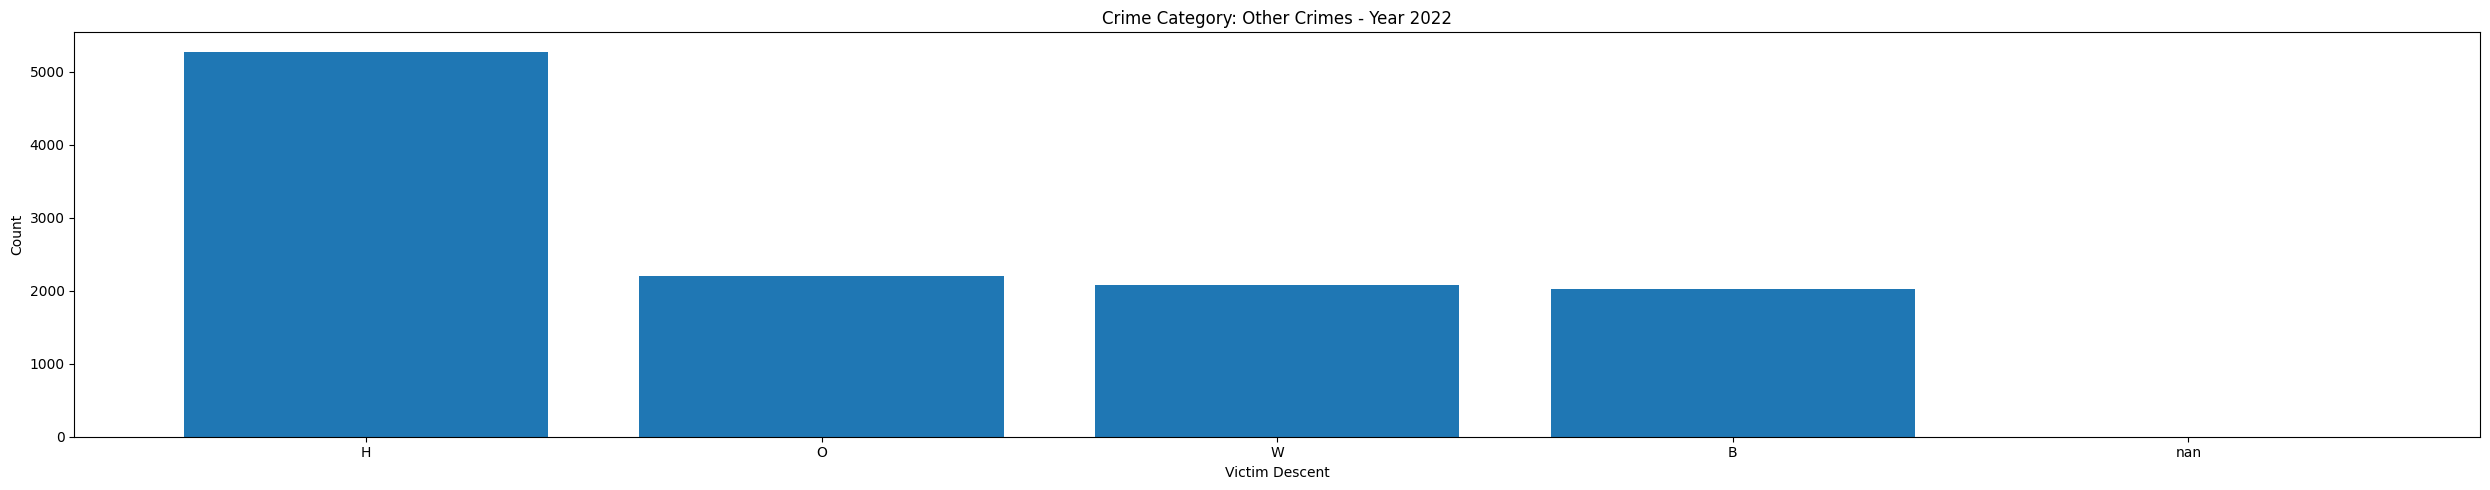

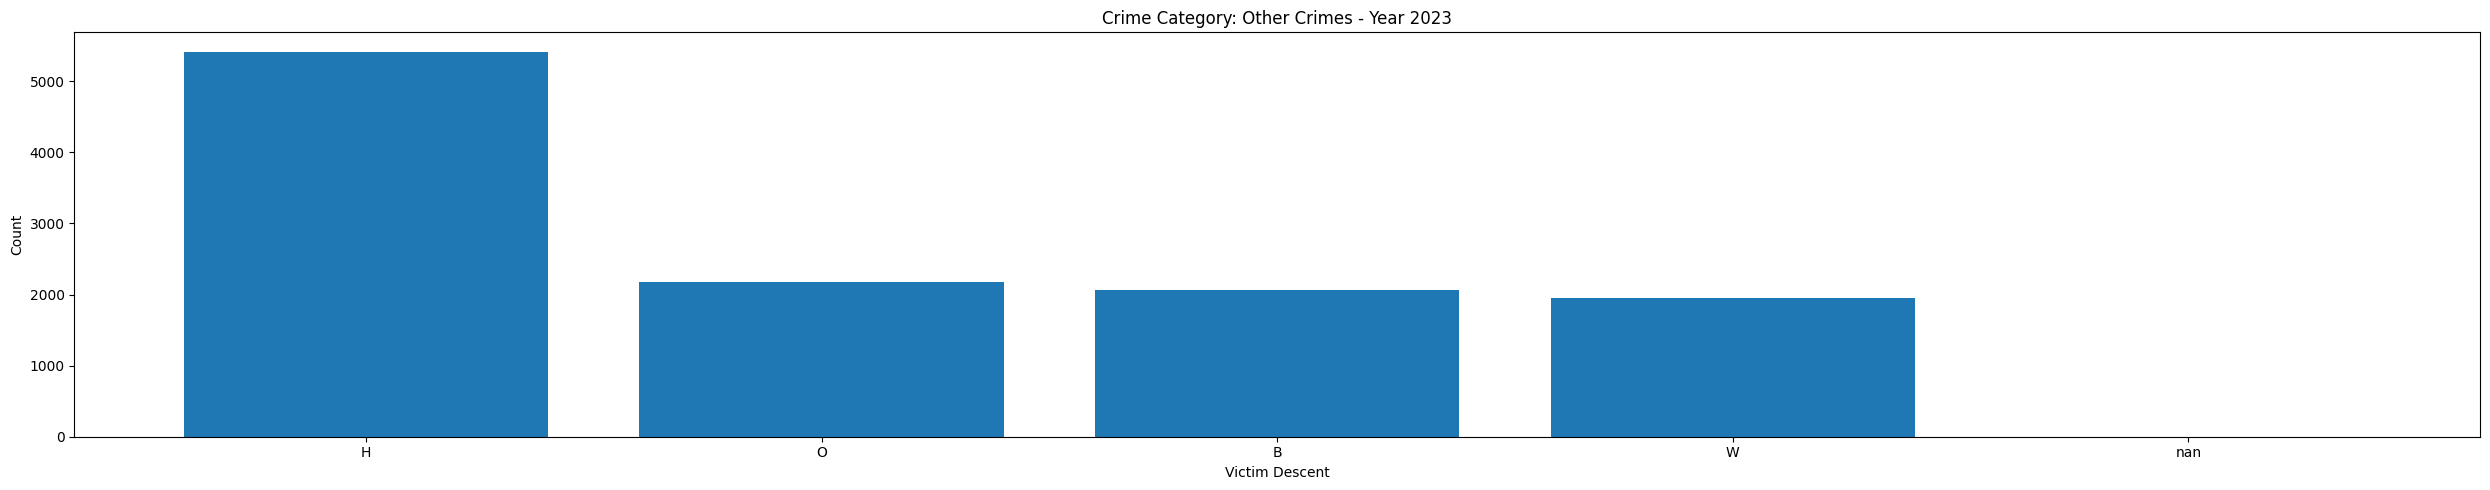

In [41]:
for i in iter:
  res = count_crimes_by_ethnicity(crime_by_year[i], crimes_categories_names.index("Other Crimes"))
  create_histogram(res, title="Crime Category: Other Crimes - Year " + str(years[i]))

In [42]:
def count_location(df):
    res_df = pd.DataFrame()

    for area in df["AREA"].unique():
      count = df[df["AREA"] == area]["AREA"].count()
      name = df[df["AREA"] == area]["AREA NAME"]
      data = {"Area Code": [area], "Area Name": [name], "Count": [count]}

      res_df = pd.concat([res_df, pd.DataFrame(data)], ignore_index=True)

    return res_df.sort_values(by=["Count"], ascending=False).reset_index(drop=True)

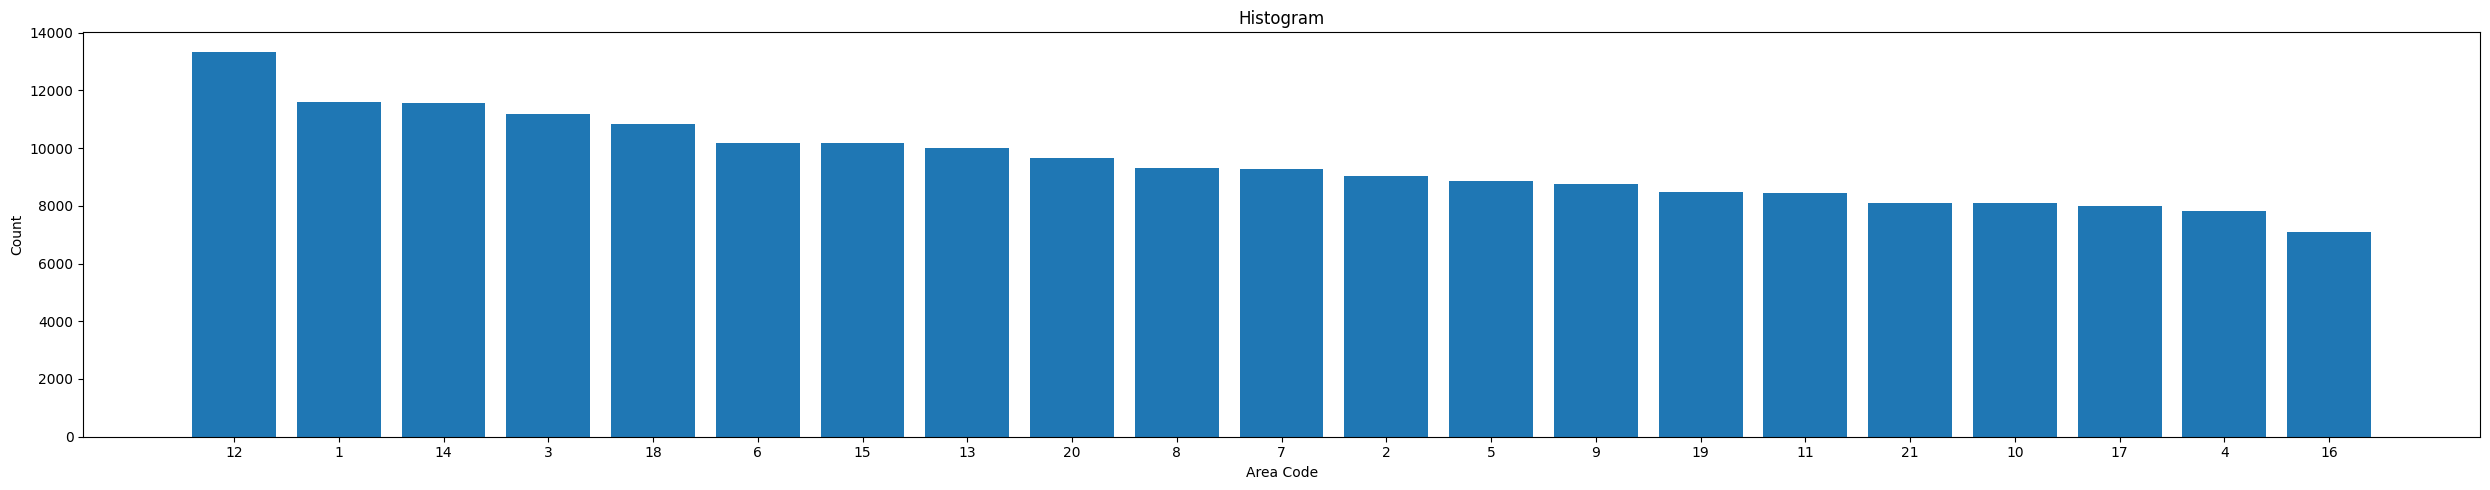

Area Code                                          Area Name  Count
0         12  28        77th Street
30        77th Street
31...  13341
1          1  1         Central
6         Central
58        ...  11599
2         14  33        Pacific
70        Pacific
73        ...  11574
3          3  2         Southwest
7         Southwest
14    ...  11178
4         18  5         Southeast
10        Southeast
15    ...  10846
5          6  4         Hollywood
53        Hollywood
59    ...  10171
6         15  37        N Hollywood
43        N Hollywood
52...  10167
7         13  8         Newton
16        Newton
44        Ne...   9993
8         20  22        Olympic
84        Olympic
105       ...   9639
9          8  20        West LA
29        West LA
61        ...   9309
10         7  0         Wilshire
17        Wilshire
19      ...   9291
11         2  12        Rampart
27        Rampart
34        ...   9025
12         5  49        Harbor
115       Harbor
120       Ha...   8874
13         9  3         Van Nuys
45        Van Nuys
87      ...   8763
14        19  9         Mission
11        Mission
21        ...   8479
15        11  25        Northeast
32        Northeast
54    ...   8452
16        21  24        Topanga
26        Topanga
89        ...   8106
17        10  13        West Valley
18        West Valley
40...   8089
18        17  55        Devonshire
62        Devonshire
64  ...   7981
19         4  23        Hollenbeck
38        Hollenbeck
57  ...   7805
20        16  51        Foothill
126       Foothill
137     ...   7105

In [43]:
res = count_location(crime_by_year[0])
create_histogram(res)
display(res)

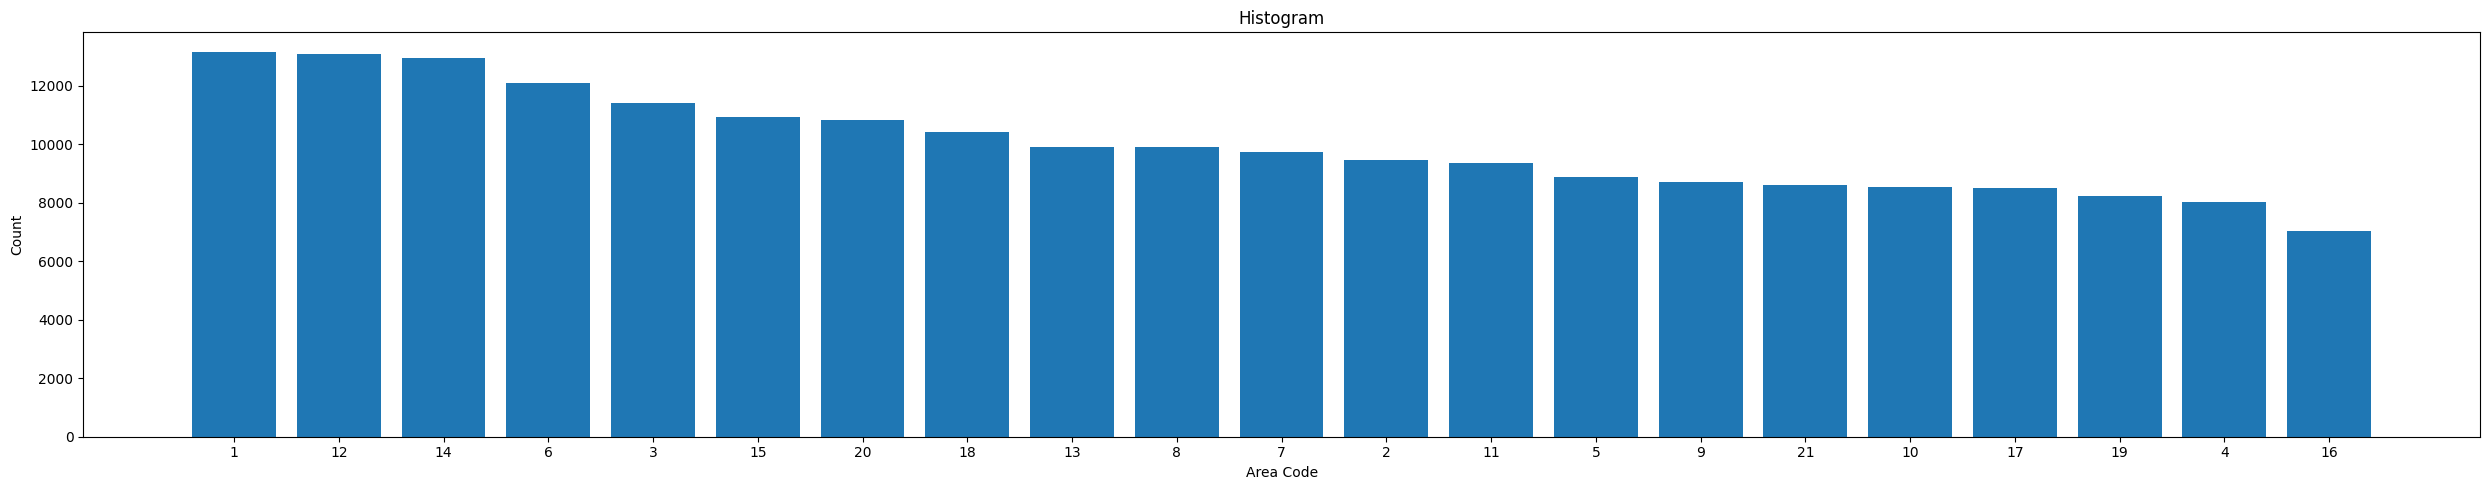

In [44]:
res = count_location(crime_by_year[1])
create_histogram(res)

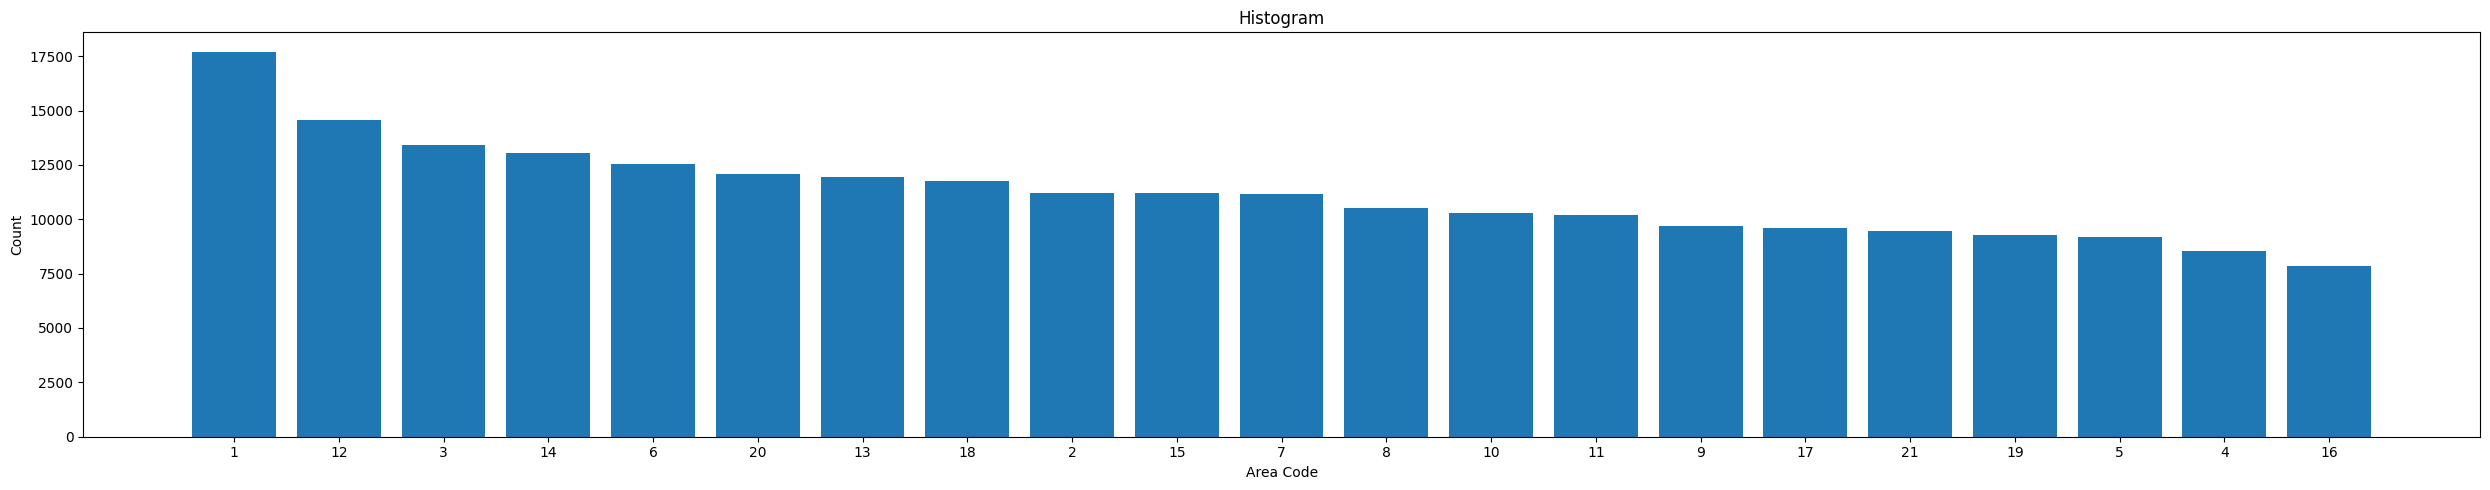

In [45]:
res = count_location(crime_by_year[2])
create_histogram(res)

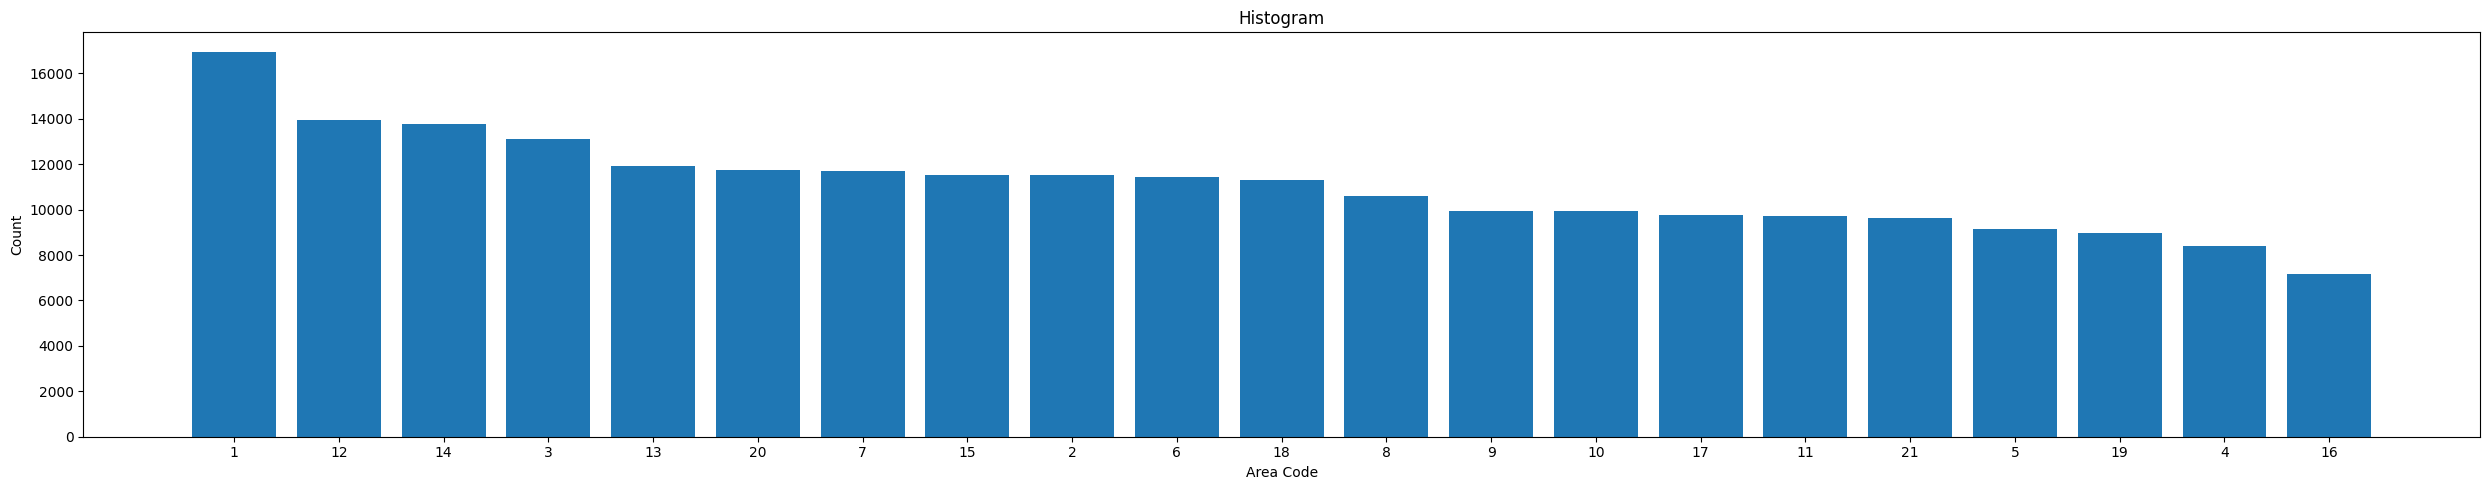

In [46]:
res = count_location(crime_by_year[3])
create_histogram(res)

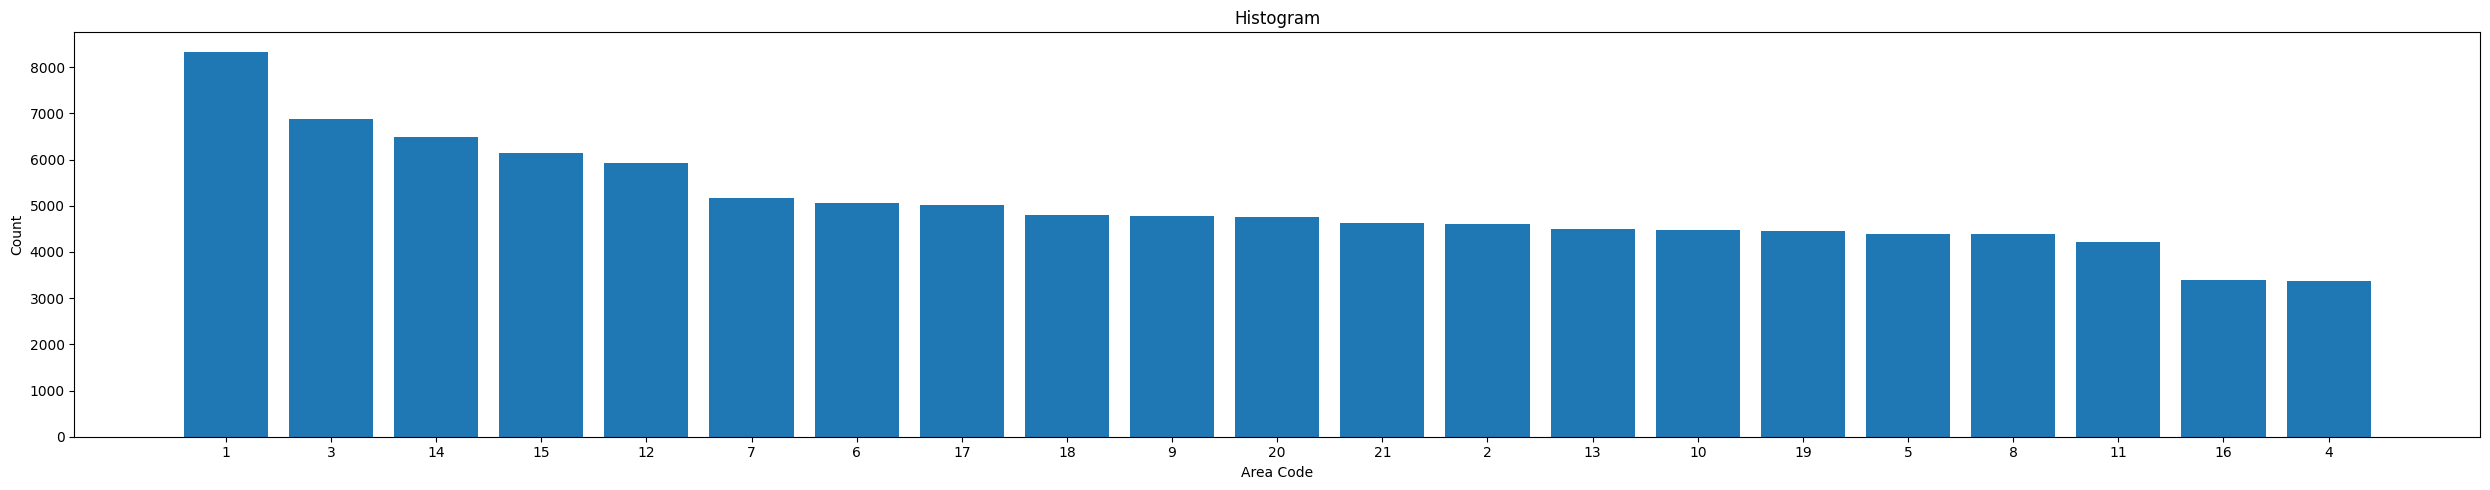

In [47]:
res = count_location(crime_by_year[4])
create_histogram(res)

897 1390


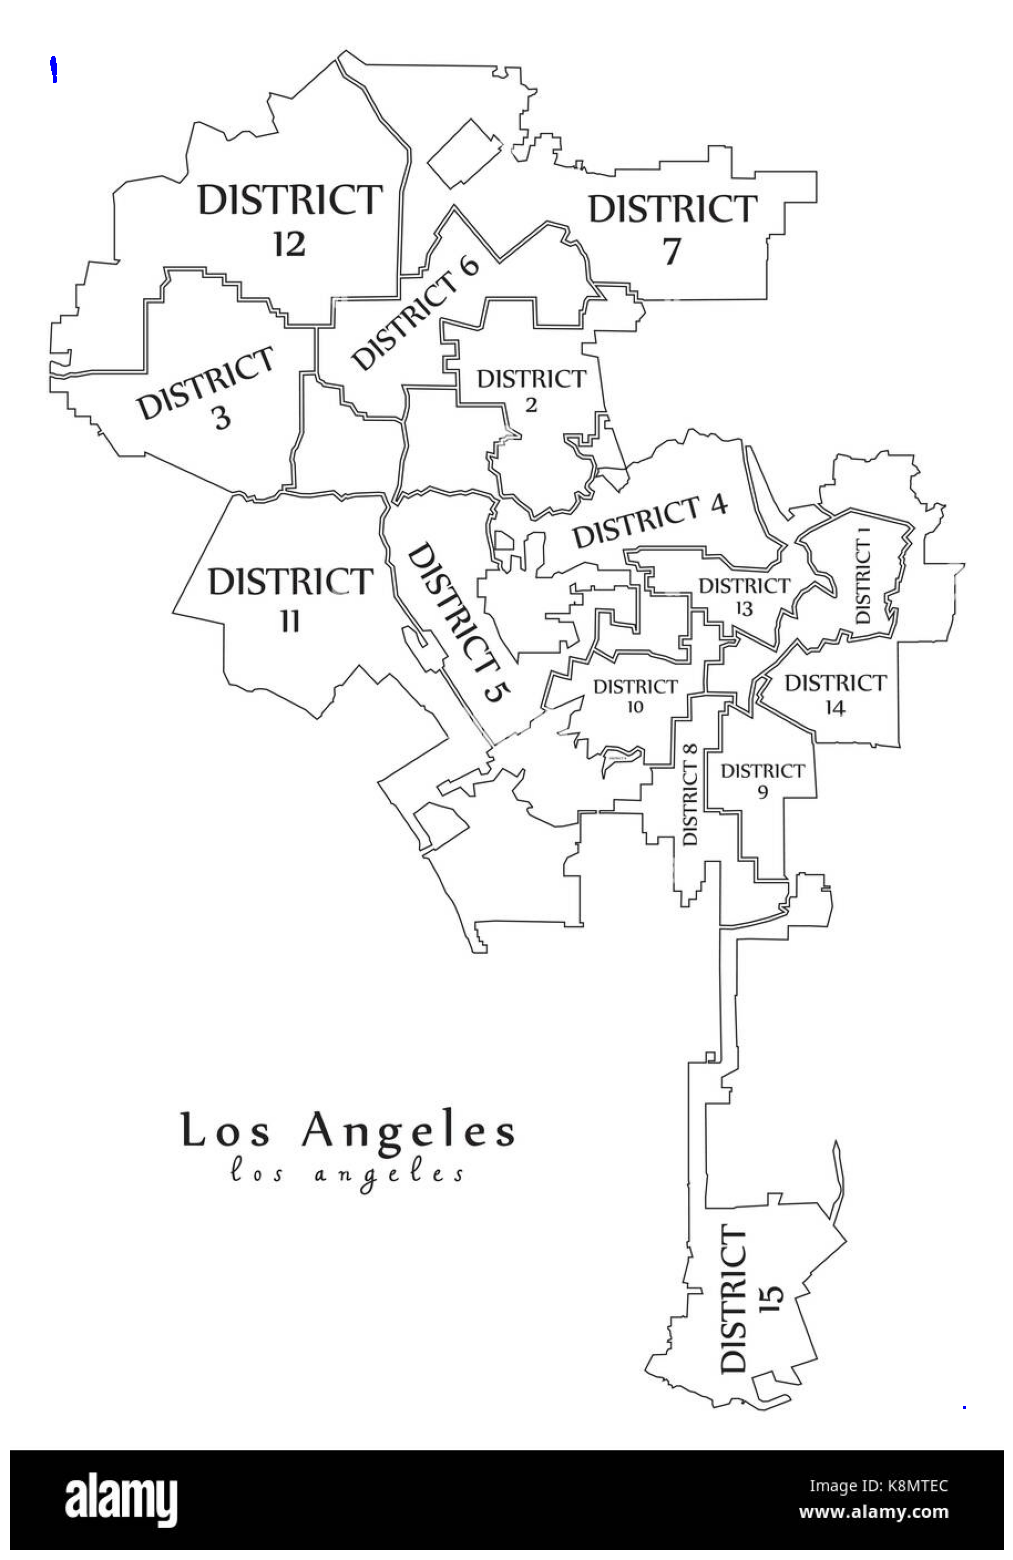

In [48]:
from PIL import Image
import requests

def image_la(df, color="blue"):
    img_data = requests.get("https://c7.alamy.com/comp/K8MTEC/modern-city-map-los-angeles-city-of-the-usa-with-boroughs-and-titles-K8MTEC.jpg").content
    with open('map.jpg', 'wb') as handler:
        handler.write(img_data)

    img = Image.open("map.jpg")

    lat_min, lat_max = df['LAT'].min(), df['LAT'].max()
    lon_min, lon_max = df['LON'].min(), df['LON'].max()

    img_width, img_height = img.size
    print(img_width, img_height)

    img_scale_x = 0.918
    img_scale_y = 0.877

    img_offset_x = 0.041 * img_width
    img_offset_y = 0.03 * img_height

    x = ((df['LON'] - lon_min) / (lon_max - lon_min)) * (img_width * img_scale_x) + img_offset_x
    y = ((lat_max - df['LAT']) / (lat_max - lat_min)) * (img_height * img_scale_y) + img_offset_y
    
    fig, ax = plt.subplots(figsize=(20, 20))
    ax.imshow(img)
    ax.scatter(x, y, s=1, alpha=1, color=color)
    ax.axis('off')

image_la(df)
plt.show()

In [49]:
def count_crimes_by_time_and_ethn(df, crime_category):
    res_df = pd.DataFrame()
    copy_df = merge_ethn(df)
    crimes = crimes_categories_codes[crime_category]
    
    for ethn in ["H", "W", "B", "O"]:
        for i in range(24):
            count = copy_df[(copy_df["Crm Cd"].isin(crimes)) & (copy_df["DATE OCC"].dt.hour == i) & (copy_df["Vict Descent"] == ethn)]["Crm Cd"].count()
            data = {"Hour": i, "Count": [count], "Ethnicity": [ethn]}
            res_df = pd.concat([res_df, pd.DataFrame(data)], ignore_index=True)

    return res_df.sort_values(by=["Hour"], ascending=True).reset_index(drop=True)

In [50]:

df_crimes_by_time_and_ethn = count_crimes_by_time_and_ethn(df, crimes_categories_names.index("Threats"))
display(df_crimes_by_time_and_ethn)


Hour  Count Ethnicity
0      0    292         H
1      0    181         W
2      0    143         B
3      0    288         O
4      1    101         B
..   ...    ...       ...
91    22    192         W
92    23    174         W
93    23    360         H
94    23    167         B
95    23    283         O

[96 rows x 3 columns]

In [51]:
temp = pd.concat([crime_by_year[0], crime_by_year[2]])
crime_final = pd.concat([temp, crime_by_year[3]])

In [52]:
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)

def histogram_time_crime(df, title="", crime_fun=count_crimes_by_time_and_ethn, upper=0, lower=23, column_name="Hour"):
    crime_df = crime_fun(df, crimes_categories_names.index(title))
    # display(crime_df)
    fig, ax = plt.subplots(figsize=(16, 8))
    ax.set_title(title)
    ax.set_xlabel('Hour')
    ax.set_ylabel(column_name)
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.set_xlim(lower - 0.5, upper + 0.5)
    colors = [""]

    for ethn in crime_df["Ethnicity"].unique(): 
        if ethn == "H":
            color = "orange"
        elif ethn == "W":
            color = "red"
        elif ethn == "B":
            color = "black"
        else:
            color = "green"
		
        ax.scatter(crime_df[crime_df["Ethnicity"] == ethn][column_name], crime_df[crime_df["Ethnicity"] == ethn]["Count"], color=color, label=ethn, marker="_", linewidths=3)
        ax.legend(['Hispanic', 'White', 'Black', 'Other'])

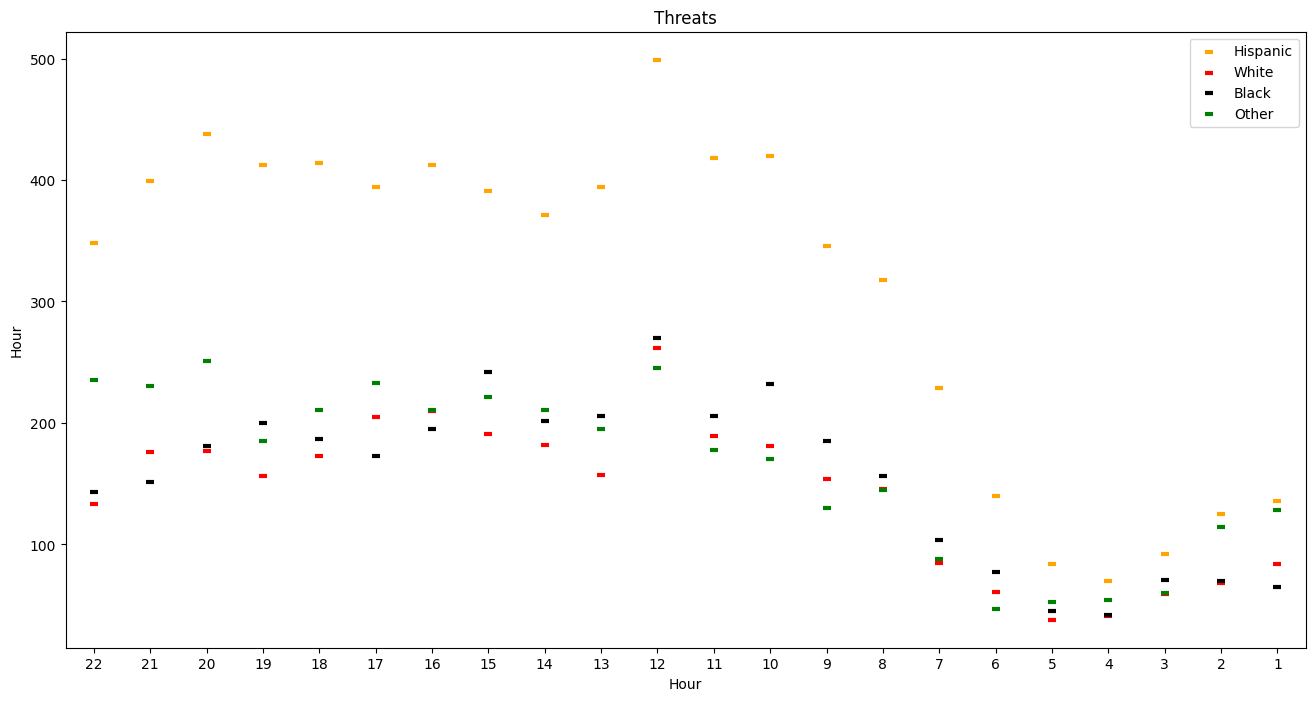

In [53]:
histogram_time_crime(crime_final, "Threats")

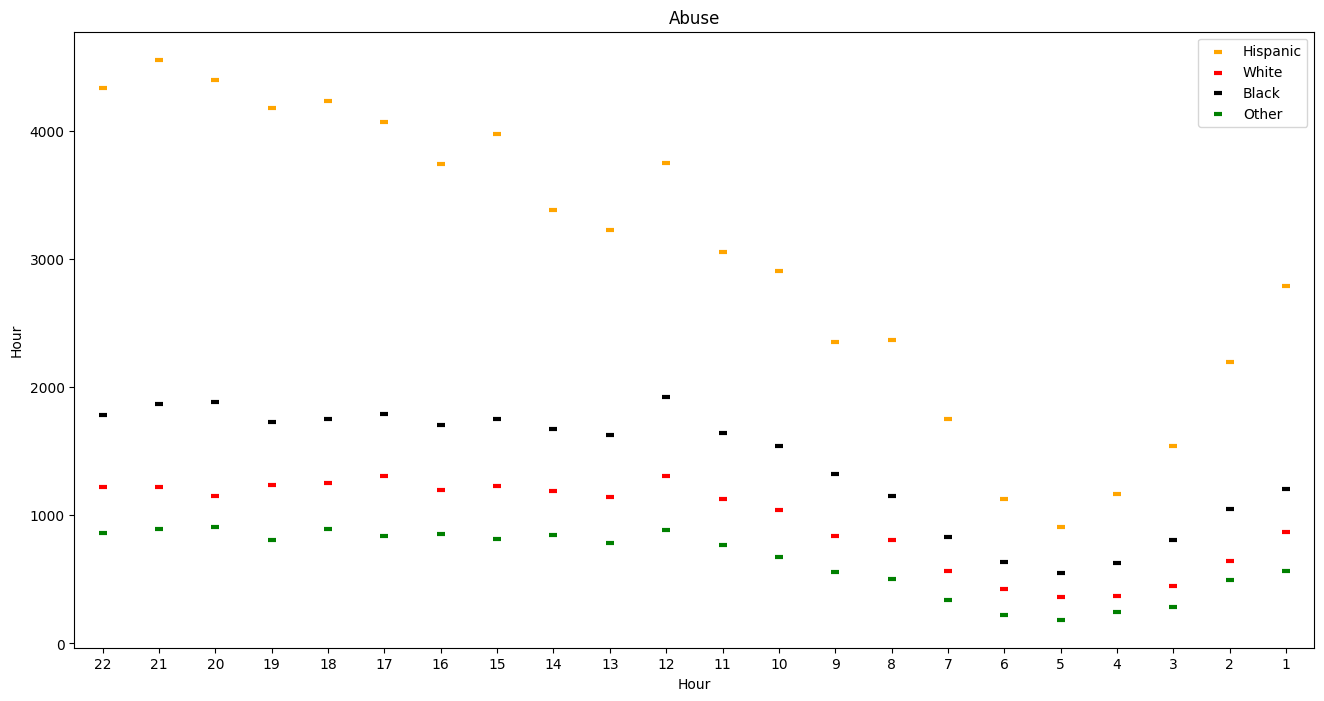

In [54]:
histogram_time_crime(crime_final, "Abuse")

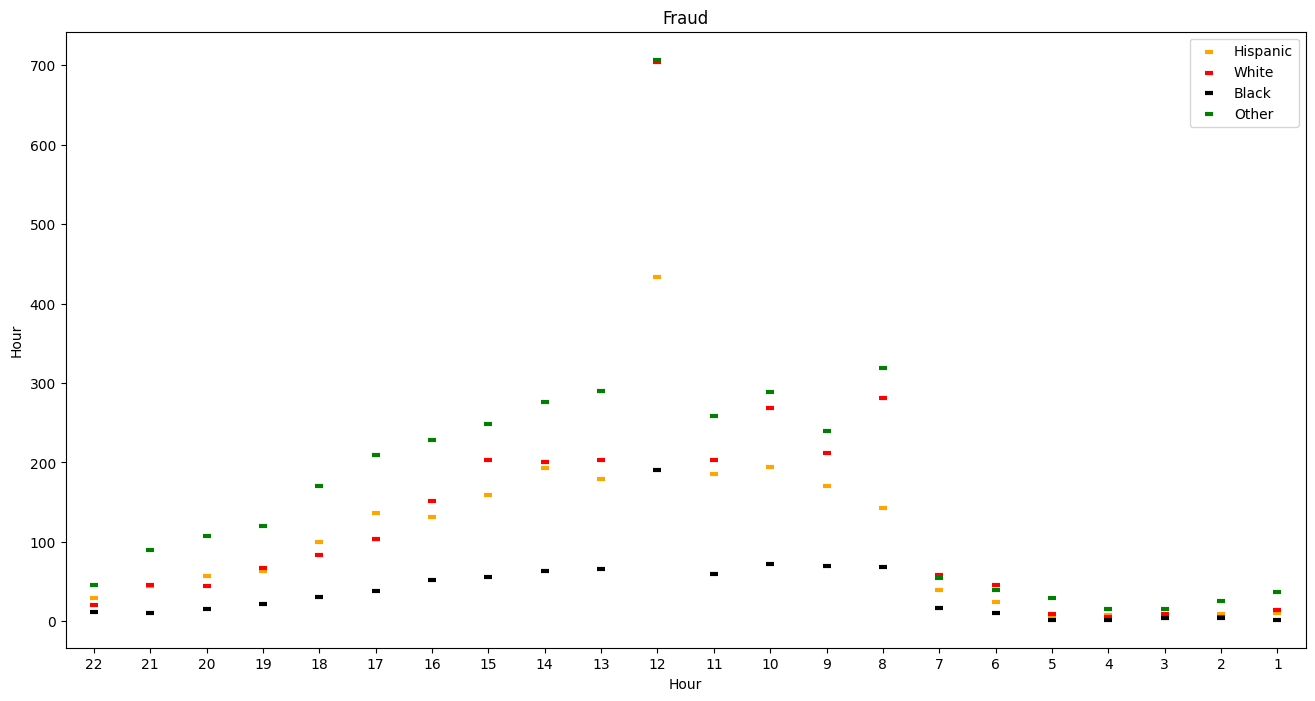

In [55]:
histogram_time_crime(crime_final, "Fraud")

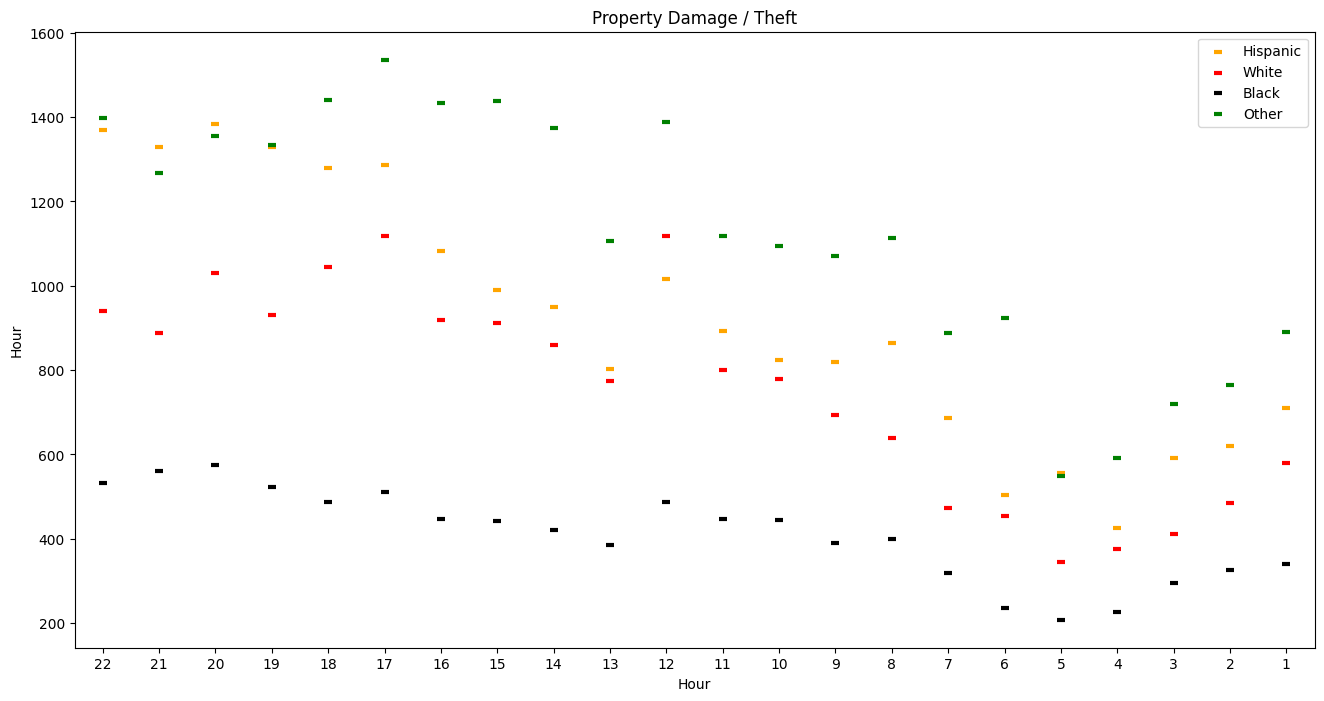

In [56]:
histogram_time_crime(crime_final, "Property Damage / Theft")

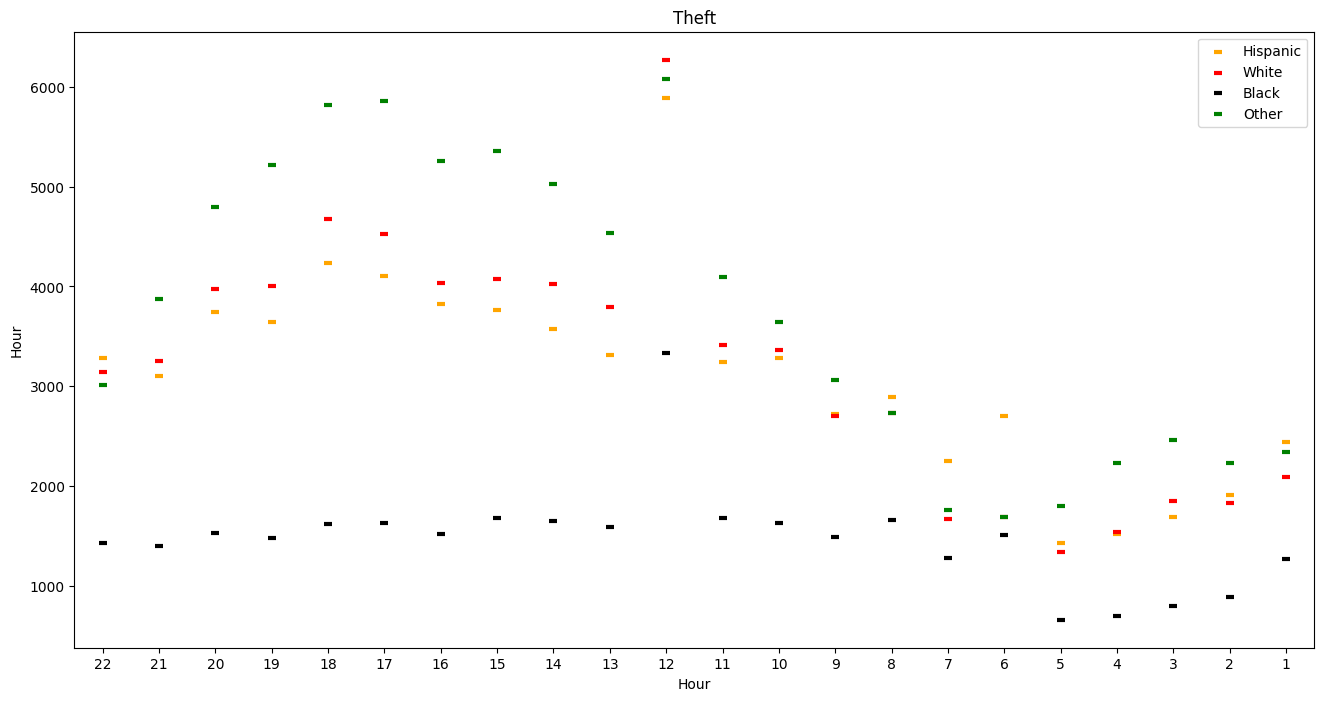

In [57]:
histogram_time_crime(crime_final, "Theft")

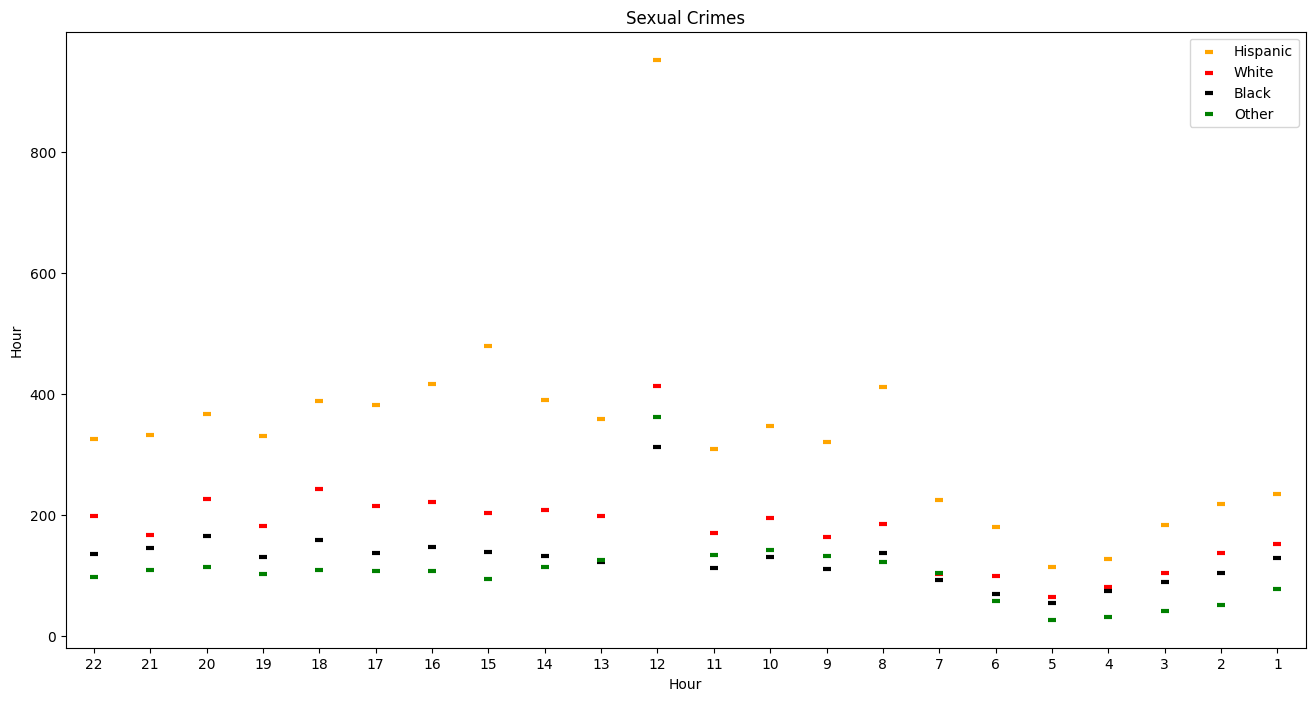

In [58]:
histogram_time_crime(crime_final, "Sexual Crimes")

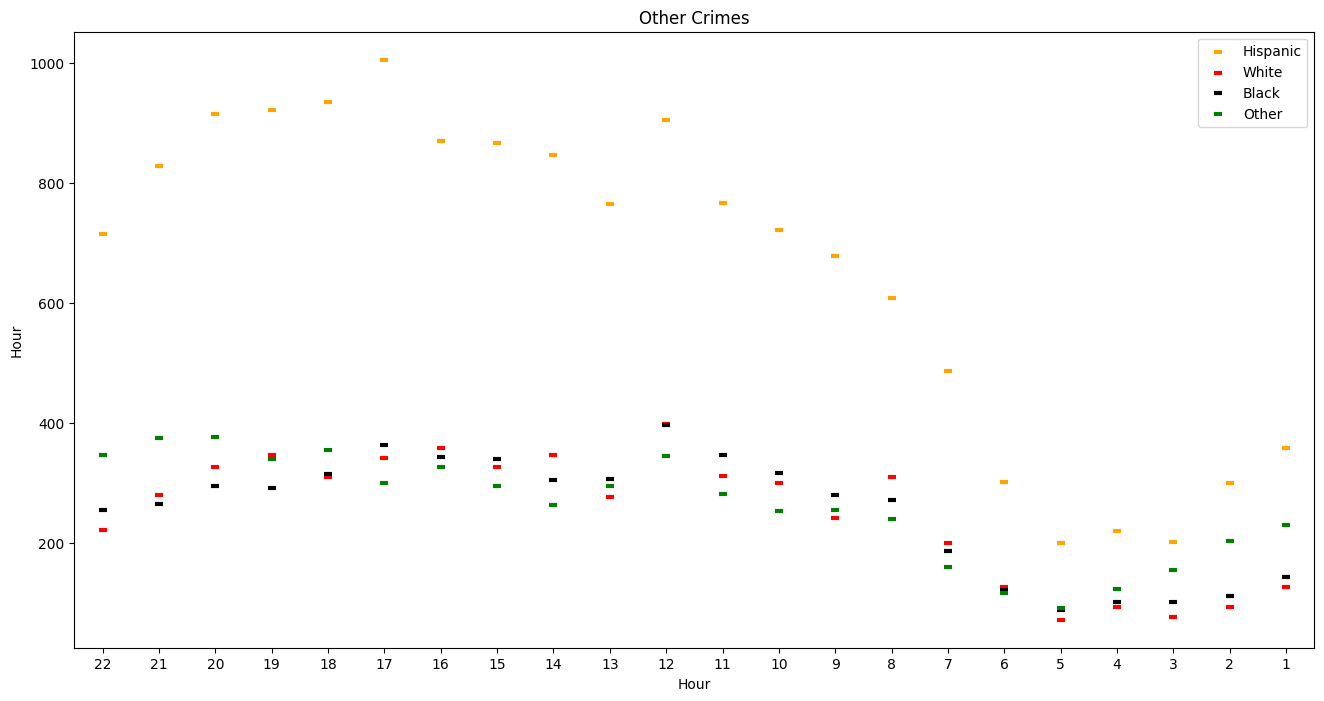

In [59]:
histogram_time_crime(crime_final, "Other Crimes")

In [60]:
def count_crimes_by_weekday_and_ethn(df, crime_category):
    res_df = pd.DataFrame()
    copy_df = merge_ethn(df)
    crimes = crimes_categories_codes[crime_category]
    
    for ethn in ["H", "W", "B", "O"]:
        for i in range(7):
            count = copy_df[(copy_df["Crm Cd"].isin(crimes)) & (copy_df["DATE OCC"].dt.weekday == i) & (copy_df["Vict Descent"] == ethn)]["Crm Cd"].count()
            data = {"Weekday": i, "Count": [count], "Ethnicity": [ethn]}
            res_df = pd.concat([res_df, pd.DataFrame(data)], ignore_index=True)

    return res_df.sort_values(by=["Weekday"], ascending=True).reset_index(drop=True)

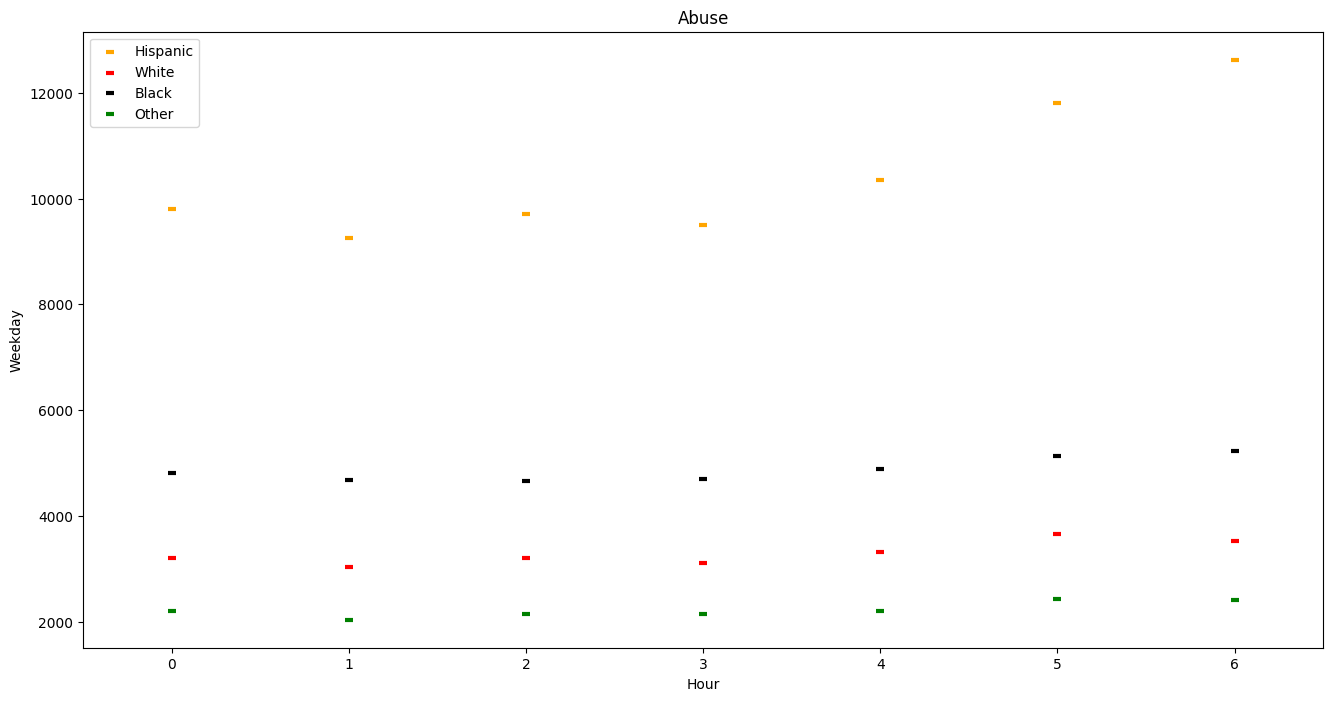

In [61]:
histogram_time_crime(crime_final, "Abuse", crime_fun=count_crimes_by_weekday_and_ethn, lower=0, upper=6, column_name="Weekday")

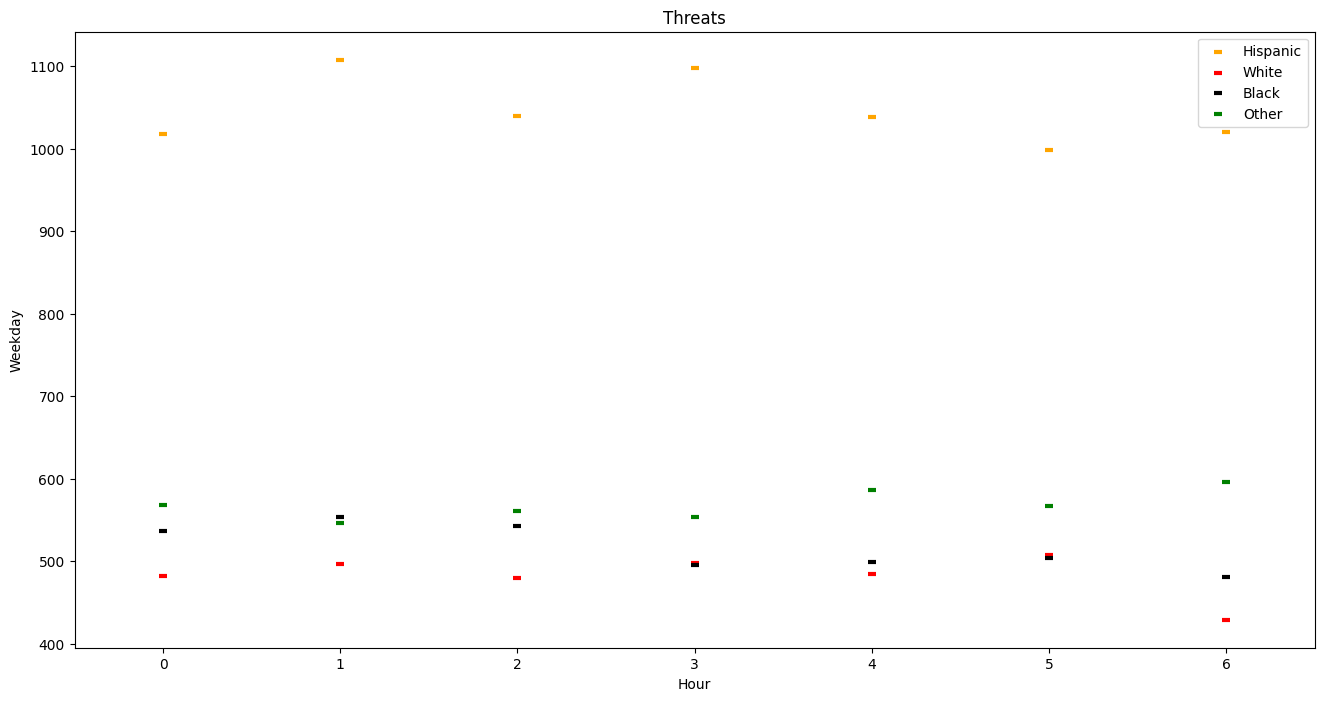

In [62]:
histogram_time_crime(crime_final, "Threats", count_crimes_by_weekday_and_ethn, lower=0, upper=6, column_name="Weekday")

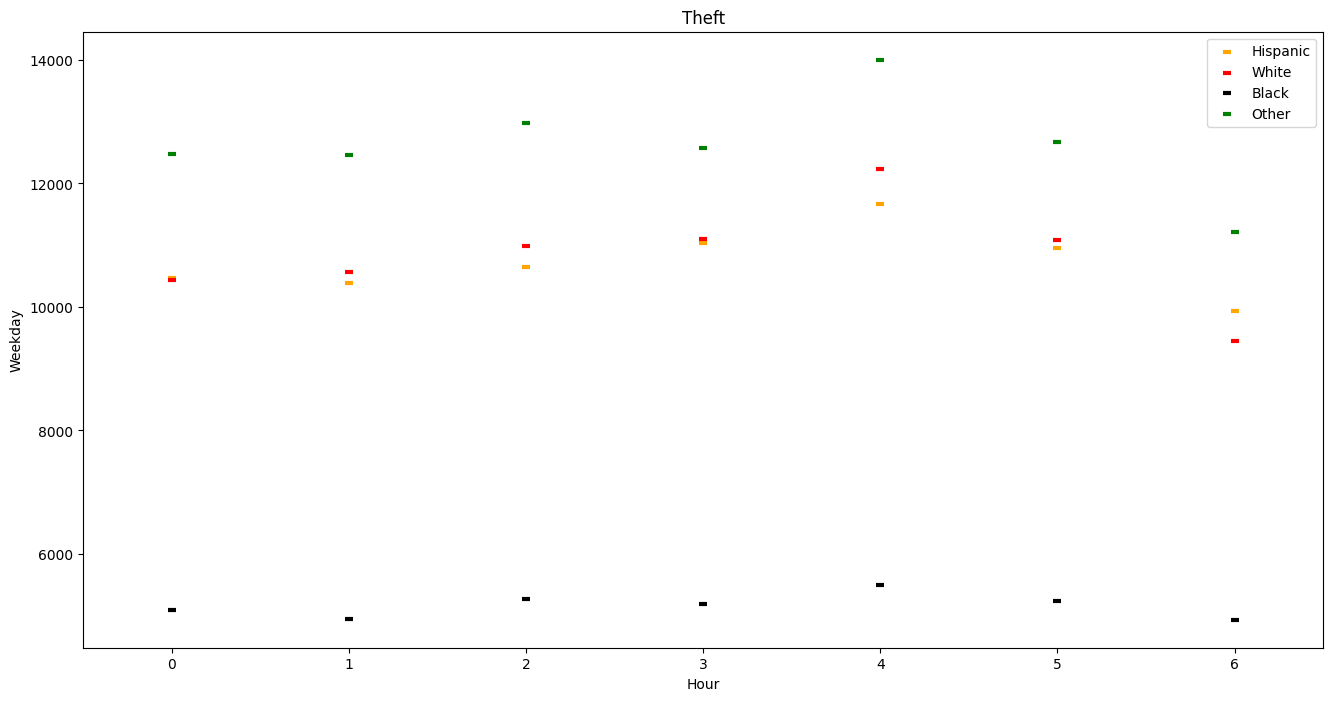

In [63]:
histogram_time_crime(crime_final, "Theft", count_crimes_by_weekday_and_ethn, lower=0, upper=6, column_name="Weekday")

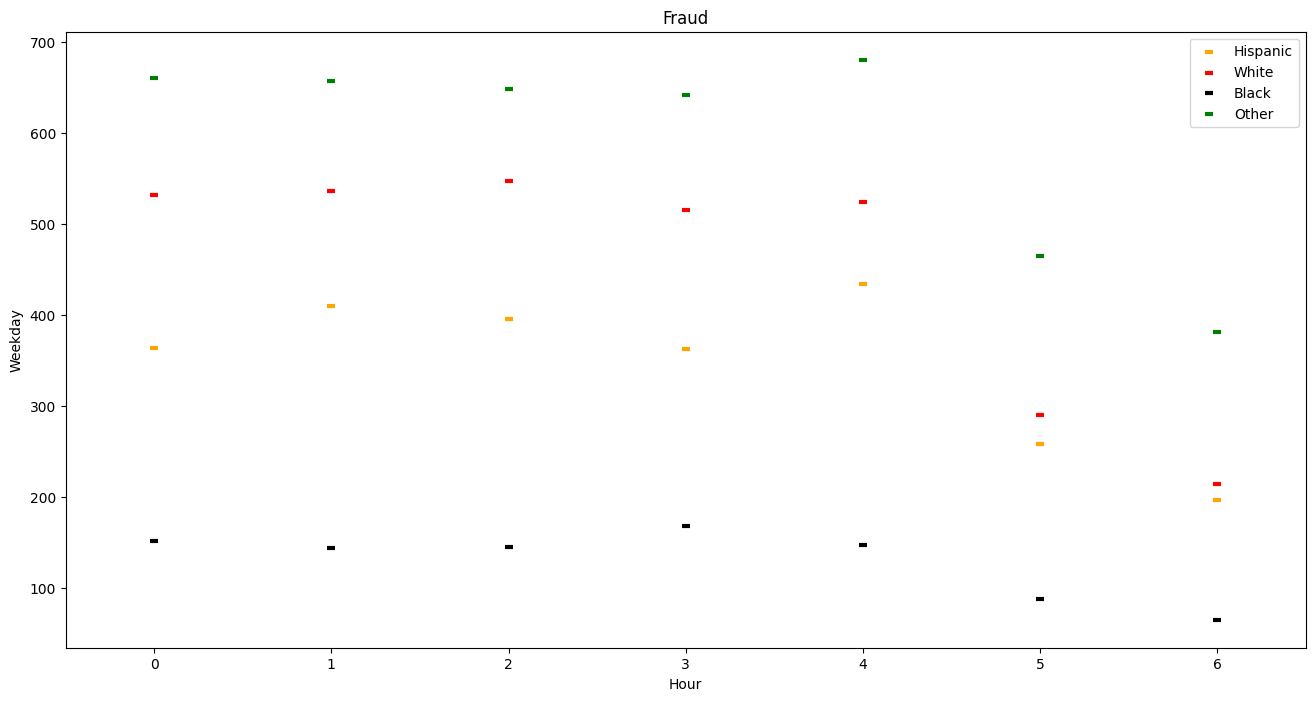

In [64]:
histogram_time_crime(crime_final, "Fraud", count_crimes_by_weekday_and_ethn, lower=0, upper=6, column_name="Weekday")

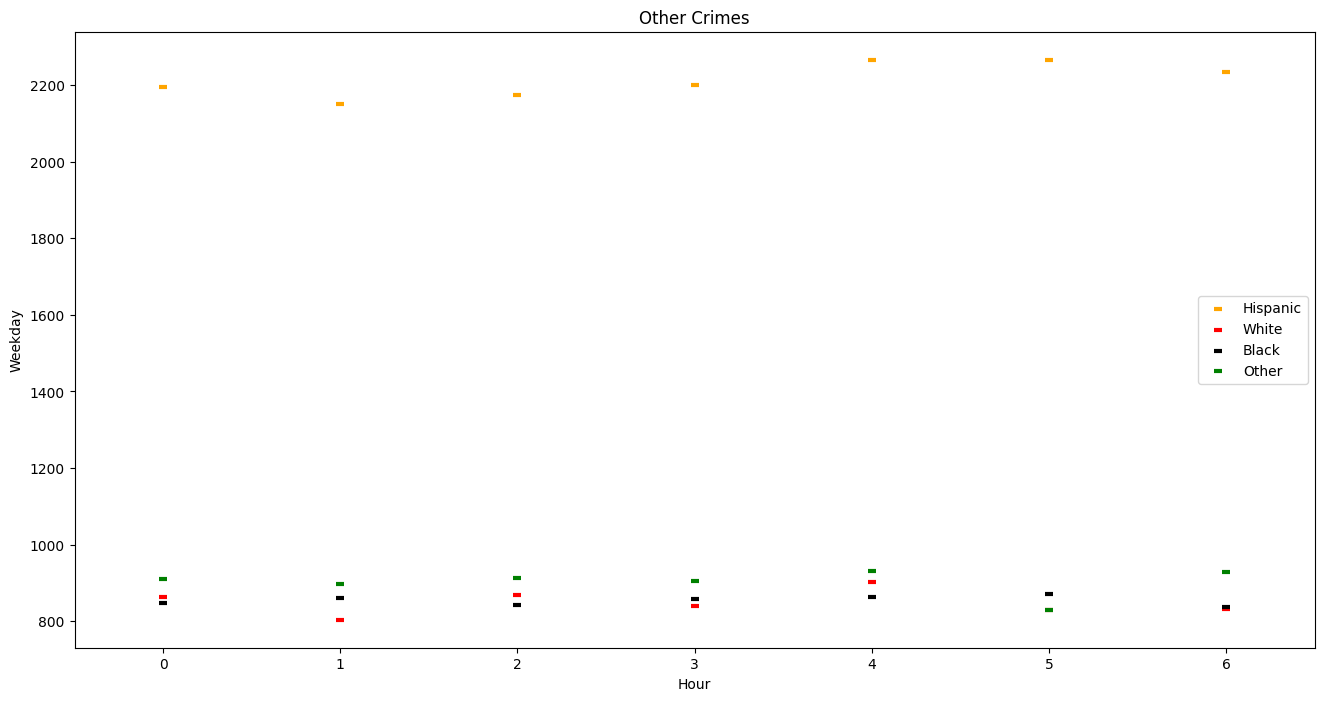

In [65]:
histogram_time_crime(crime_final, "Other Crimes", count_crimes_by_weekday_and_ethn, lower=0, upper=6, column_name="Weekday")

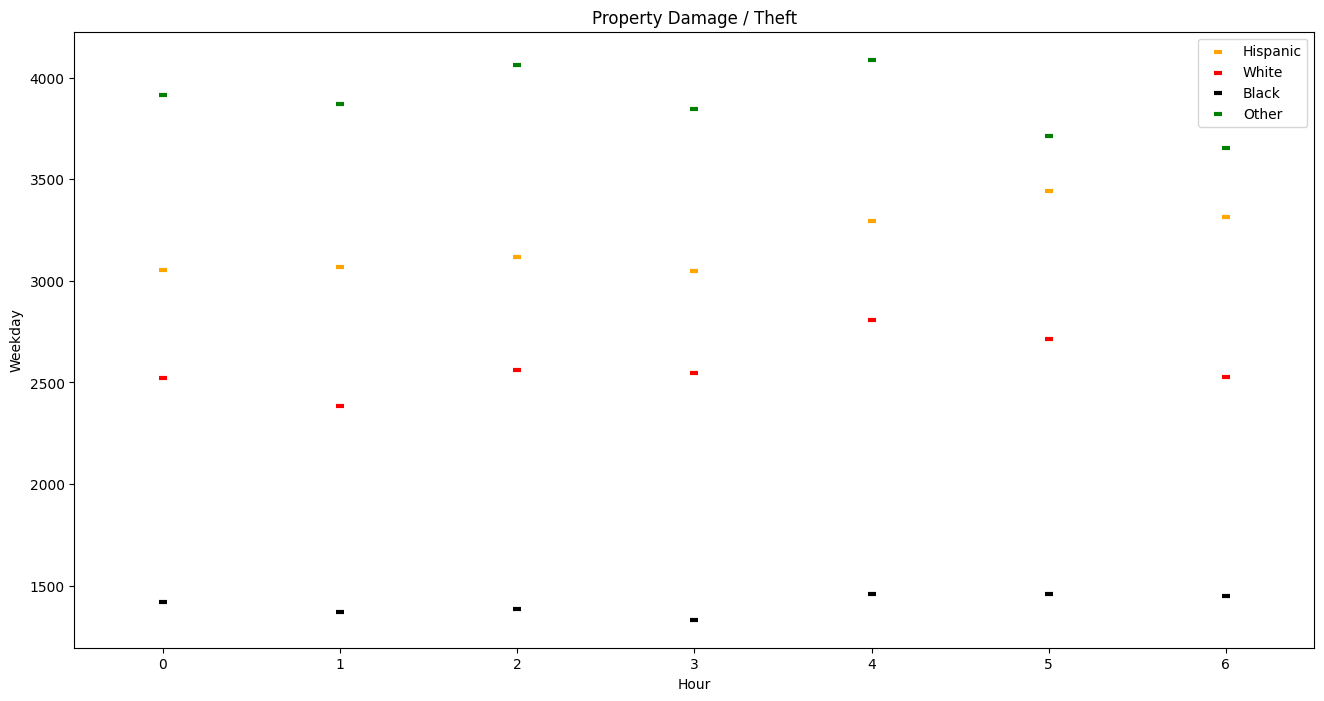

In [66]:
histogram_time_crime(crime_final, "Property Damage / Theft", count_crimes_by_weekday_and_ethn, lower=0, upper=6, column_name="Weekday")

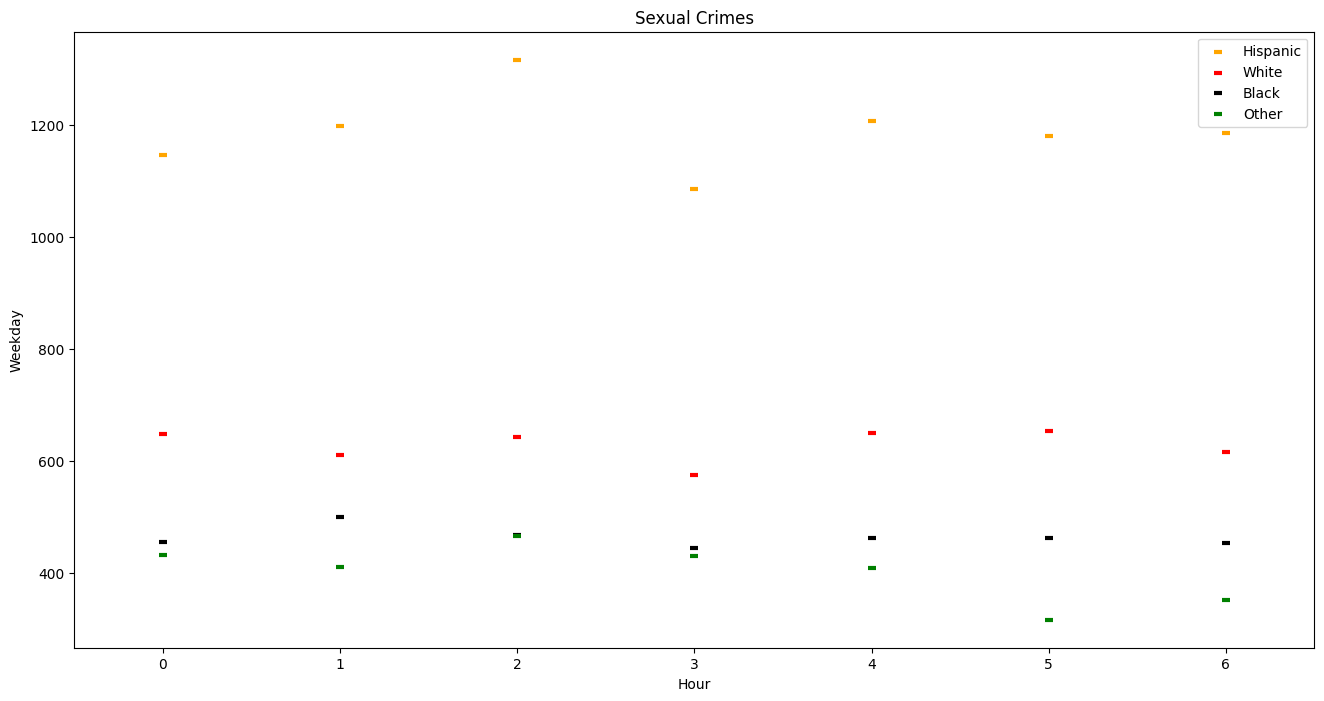

In [67]:
histogram_time_crime(crime_final, "Sexual Crimes", count_crimes_by_weekday_and_ethn, lower=0, upper=6, column_name="Weekday")

In [68]:
def count_crimes_by_month_and_ethn(df, crime_category):
    res_df = pd.DataFrame()
    copy_df = merge_ethn(df)
    crimes = crimes_categories_codes[crime_category]
    
    for ethn in ["H", "W", "B", "O"]:
        for i in range(1, 13):
            count = copy_df[(copy_df["Crm Cd"].isin(crimes)) & (copy_df["DATE OCC"].dt.month == i) & (copy_df["Vict Descent"] == ethn)]["Crm Cd"].count()
            data = {"Month": i, "Count": [count], "Ethnicity": [ethn]}
            res_df = pd.concat([res_df, pd.DataFrame(data)], ignore_index=True)

    return res_df.sort_values(by=["Month"], ascending=True).reset_index(drop=True)

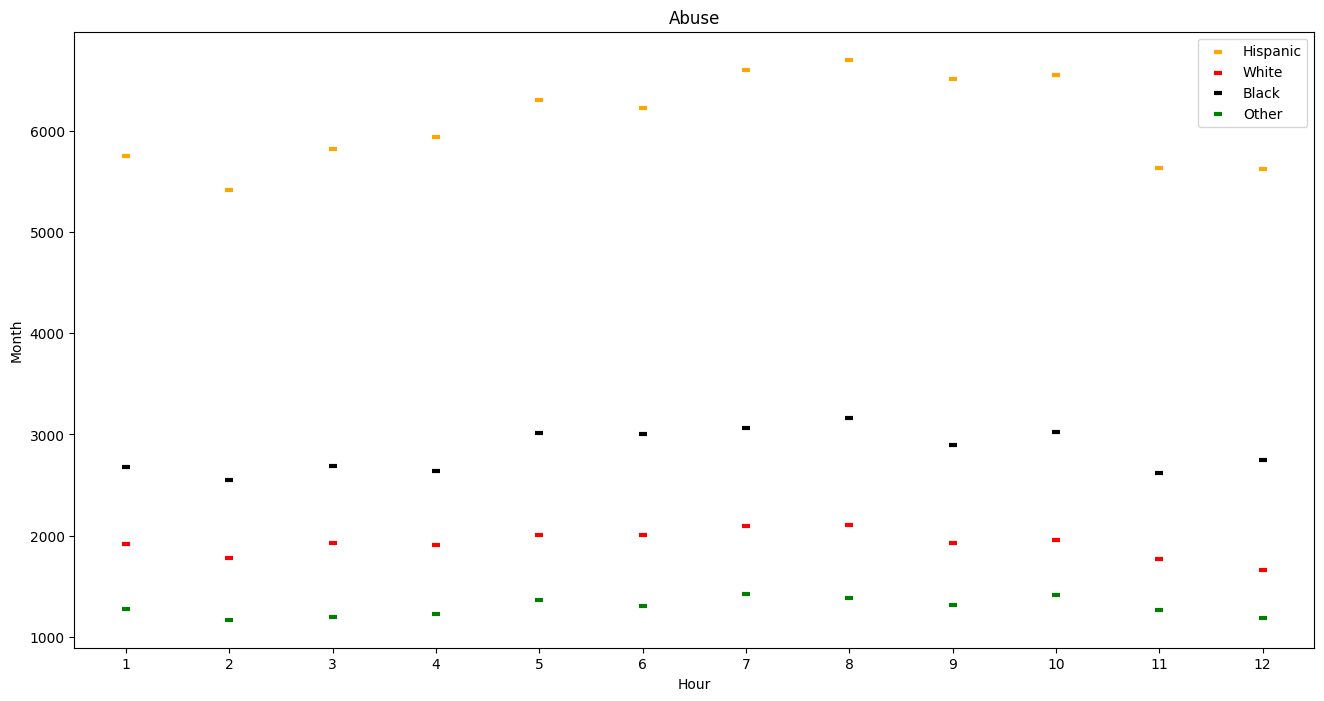

In [69]:
histogram_time_crime(crime_final, "Abuse", count_crimes_by_month_and_ethn, lower=1, upper=12, column_name="Month")

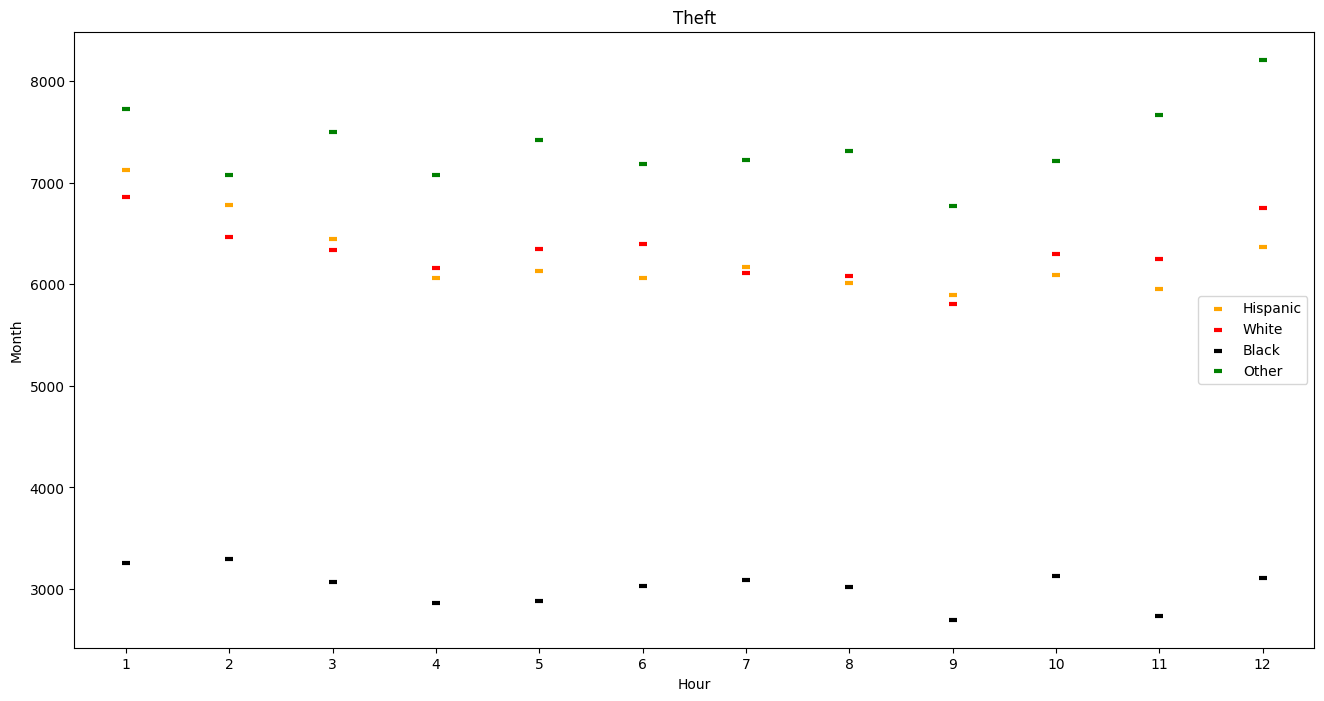

In [70]:
histogram_time_crime(crime_final, "Theft", count_crimes_by_month_and_ethn, lower=1, upper=12, column_name="Month")

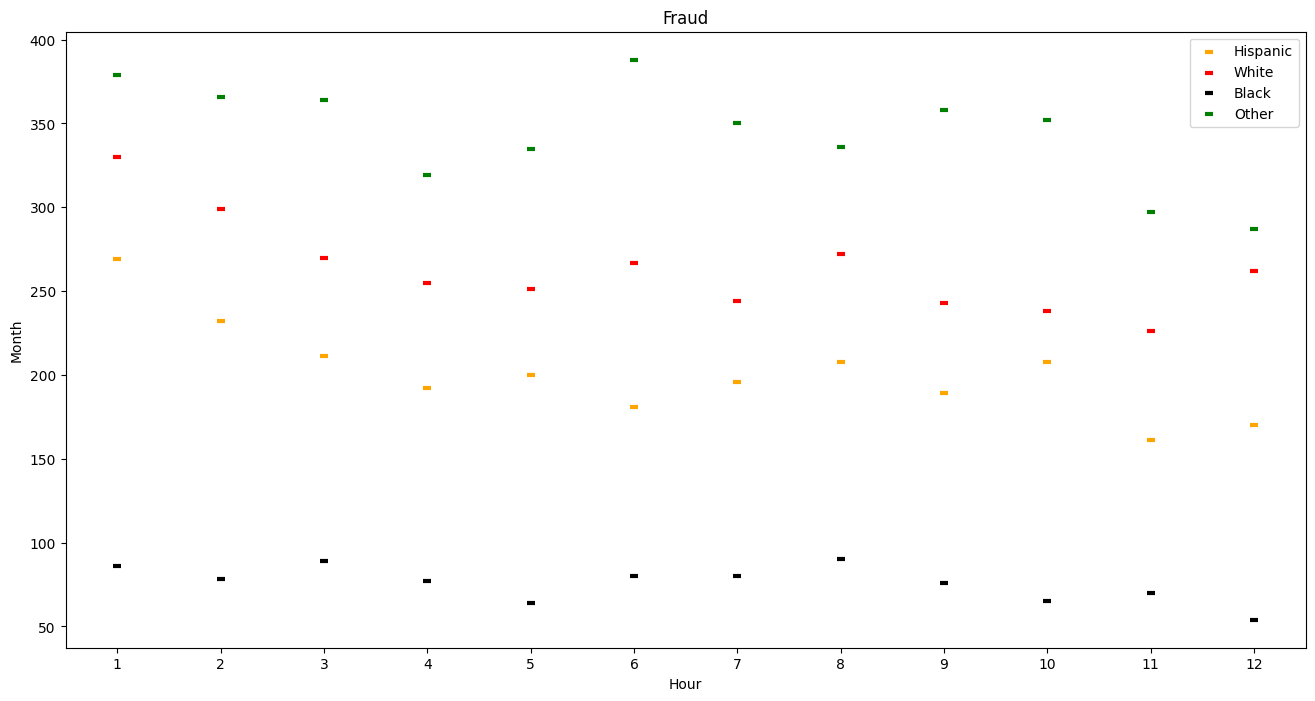

In [71]:
histogram_time_crime(crime_final, "Fraud", count_crimes_by_month_and_ethn, lower=1, upper=12, column_name="Month")

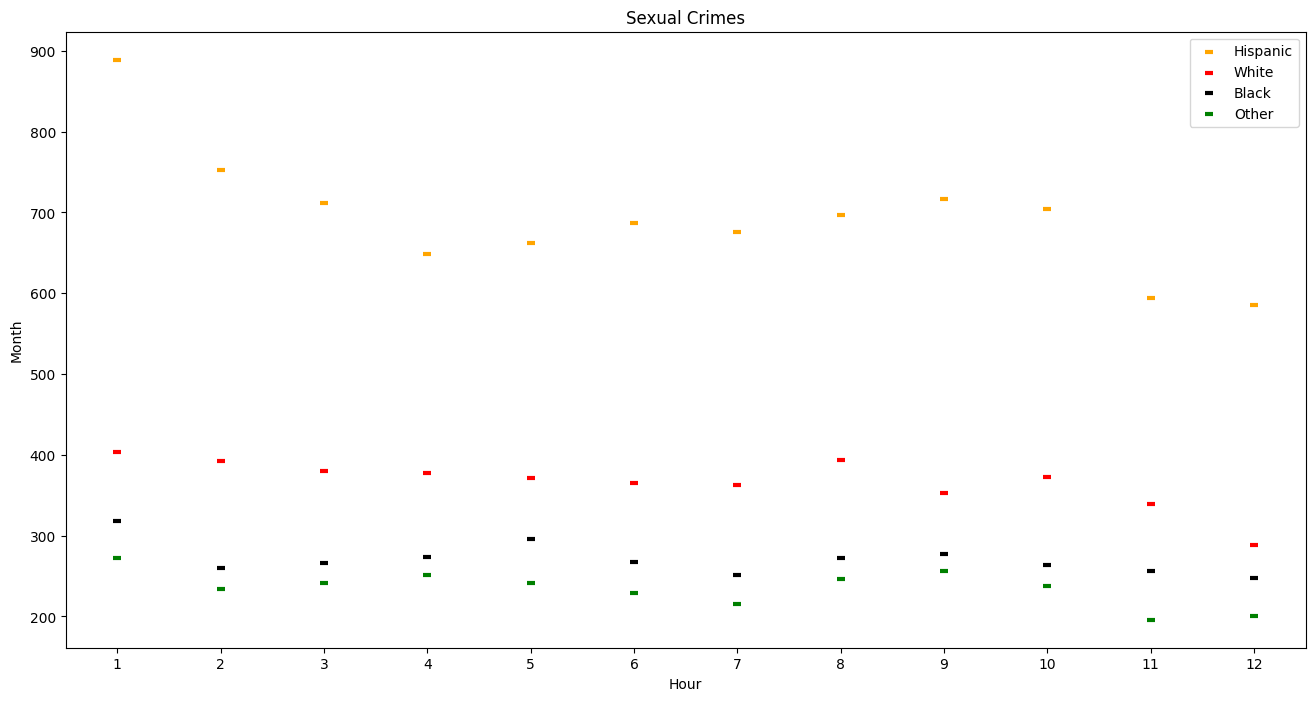

In [72]:
histogram_time_crime(crime_final, "Sexual Crimes", count_crimes_by_month_and_ethn, lower=1, upper=12, column_name="Month")

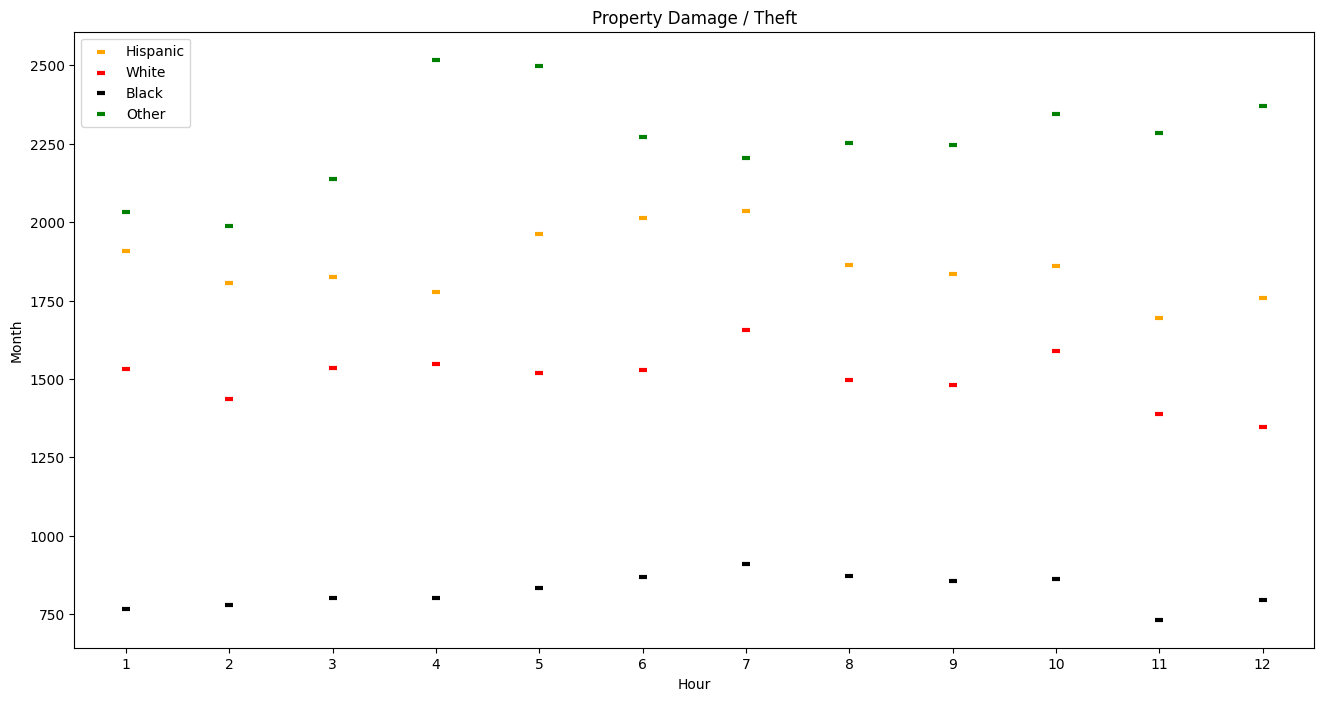

In [73]:
histogram_time_crime(crime_final, "Property Damage / Theft", count_crimes_by_month_and_ethn, lower=1, upper=12, column_name="Month")

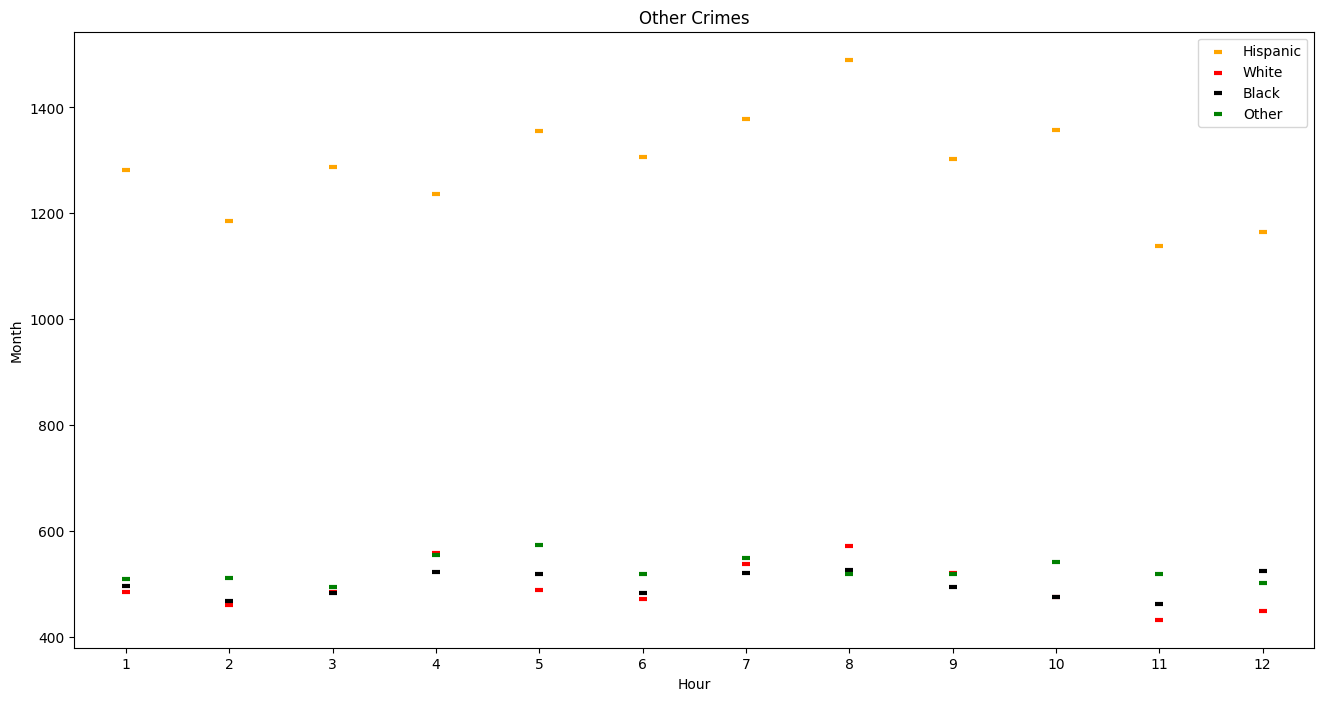

In [74]:
histogram_time_crime(crime_final, "Other Crimes", count_crimes_by_month_and_ethn, lower=1, upper=12, column_name="Month")

In [75]:
def image_la_by_ethn(df, ethn, color=["blue"]):
    img_data = requests.get("https://c7.alamy.com/comp/K8MTEC/modern-city-map-los-angeles-city-of-the-usa-with-boroughs-and-titles-K8MTEC.jpg").content
    with open('map.jpg', 'wb') as handler:
        handler.write(img_data)

    img = Image.open("map.jpg")

    lat_min, lat_max = df.loc[df['LAT'] != 0, 'LAT'].min(), df['LAT'].max()
    lon_min, lon_max = df['LON'].min(), df.loc[df['LON'] != 0, 'LON'].max()

    img_width, img_height = img.size
    print(img_width, img_height)

    img_scale_x = 0.918
    img_scale_y = 0.877

    img_offset_x = 0.041 * img_width
    img_offset_y = 0.03 * img_height

    fig, ax = plt.subplots(figsize=(20, 20))
    

    if len(ethn) != len(color):
        print("Wrong len of color")
        return
    
    for i in range(len(ethn)):
        temp_df = df[df["Vict Descent"] == ethn[i]]
        x = ((temp_df.loc[temp_df['LON'] != 0, 'LON'] - lon_min) / (lon_max - lon_min)) * (img_width * img_scale_x) + img_offset_x
        y = ((lat_max - temp_df.loc[df['LAT'] != 0, 'LAT']) / (lat_max - lat_min)) * (img_height * img_scale_y) + img_offset_y
        
        no_bins = 300
        x_min, x_max = min(x), max(x)
        y_min, y_max = min(y), max(y)
        bins = np.array([[0 for _ in range(no_bins)] for _ in range(no_bins)])
        for x_value, y_value in zip(x, y):
            bins[int((y_value - y_min) / y_max * no_bins)][int((x_value - x_min) / x_max * no_bins)] += 1
        
        bin_img = Image.fromarray(np.uint8(bins)).resize((int(897*img_scale_x), int(1390 * img_scale_y)), Image.NEAREST)
        #bin_img = Image.fromarray(np.uint8(bins)).resize((897, 1390), Image.NEAREST)
        ax.imshow(img)
        ax.imshow(bin_img, alpha=0.5)

        # ax.scatter(x, y, s=10, alpha=0.25, color=color[i], marker=".")
        ax.axis('off')
    plt.show()

897 1390


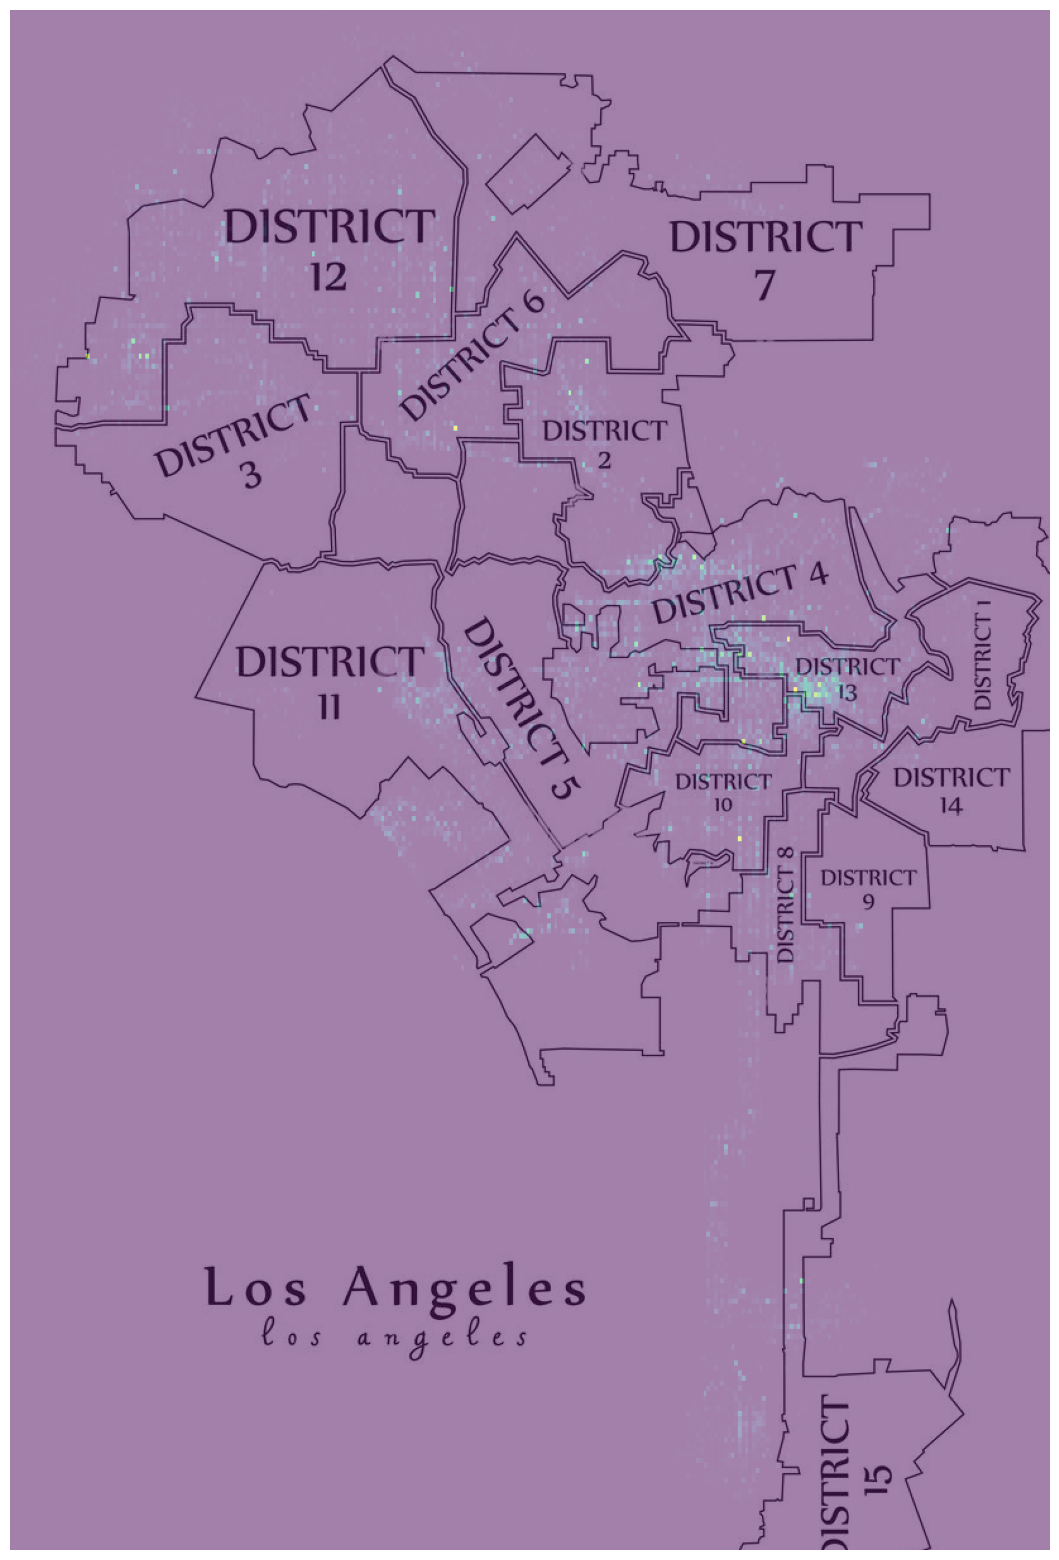

In [76]:
ethn = ["H", "W", "B"]
ethn = ["O"]
color = ["orange", "red", "black"]
color = ["orange"]
merge = merge_ethn(crime_final)
image_la_by_ethn(merge, ethn, color)

In [77]:
crime_final = crime_final[(crime_final["LON"] != 0) & (crime_final["LAT"] != 0)]

In [78]:
from collections import defaultdict

def compute_quantile(data, lower, upper):
    Q1 = np.percentile(data, lower)
    Q3 = np.percentile(data, upper)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return lower_bound, upper_bound

def determine_if_typical(df: pd.DataFrame, low: float, up: float, column_name: str = 'DATE OCC'):
    temp = df.copy()
    
    if column_name == 'DATE OCC':
        temp[column_name] = temp[column_name].dt.date
    
    temp = temp[(temp["LAT"] != 0) & (temp["LON"] != 0)]

    counted = temp.groupby(column_name).size().to_dict()
    print(counted)


    
    counted = sorted(counted.items(), key=lambda x: x[1])
    counted = dict(counted)
    counted_items = list(counted.values())

    lower, upper = compute_quantile(counted_items, low, up)
    typical_dict = {}

    for idx, val in counted.items():
        if not lower <= val <= upper:
            typical_dict[idx] = 1
        else:
            typical_dict[idx] = 0
    return typical_dict, counted


typical, counted = determine_if_typical(crime_final, 25, 75, 'LAT')

i = 0
for idx, val in typical.items():
    if val == 1:
        i+=1
print(i / float(len(typical)))

{33.7061: 1, 33.7064: 10, 33.7065: 4, 33.7068: 4, 33.707: 52, 33.7071: 1, 33.7076: 1, 33.7079: 45, 33.7087: 24, 33.7088: 9, 33.7089: 4, 33.7091: 4, 33.7096: 48, 33.7101: 2, 33.7105: 6, 33.7106: 42, 33.7108: 27, 33.7109: 1, 33.7111: 12, 33.7112: 3, 33.7113: 4, 33.7115: 44, 33.7116: 4, 33.7117: 5, 33.7119: 1, 33.7122: 2, 33.7124: 7, 33.7125: 9, 33.7126: 2, 33.7129: 1, 33.7132: 2, 33.7133: 11, 33.7134: 13, 33.7135: 8, 33.7136: 74, 33.714: 13, 33.7141: 3, 33.7142: 12, 33.7143: 28, 33.7144: 36, 33.7146: 5, 33.7147: 3, 33.7149: 3, 33.715: 1, 33.7152: 27, 33.7156: 5, 33.7157: 2, 33.7158: 1, 33.7159: 4, 33.716: 5, 33.7161: 25, 33.7162: 4, 33.7163: 3, 33.7166: 14, 33.7167: 32, 33.7168: 6, 33.7169: 4, 33.717: 43, 33.7171: 8, 33.7172: 6, 33.7173: 15, 33.7174: 3, 33.7175: 77, 33.7176: 2, 33.7177: 8, 33.7178: 25, 33.7179: 25, 33.718: 4, 33.7181: 4, 33.7182: 24, 33.7183: 3, 33.7184: 6, 33.7185: 7, 33.7186: 4, 33.7188: 28, 33.7189: 8, 33.719: 16, 33.7191: 5, 33.7192: 4, 33.7194: 12, 33.7196: 2, 33.71

In [79]:
def histogram_typical(df: pd.DataFrame, column_name="DATE OCC", title="", year=2020):
    crime_df = df.copy()
    crime_df = crime_df[crime_df['DATE OCC'].dt.year == year]

    typical_dict, counted = determine_if_typical(crime_df, 25, 75, column_name)

    crime_df["DATE OCC"] = crime_df['DATE OCC'].dt.date
    # display(crime_df)
    fig, ax = plt.subplots(figsize=(16, 8))
    ax.set_title(title)
    ax.set_xlabel('Count')
    ax.set_ylabel(column_name)
    # ax.set_xlim(lower - 0.5, upper + 0.5)

    ax.scatter(list(counted.keys()), list(counted.values()), color="blue", marker="_", linewidths=3)
    for date in crime_df[column_name].unique():
        if typical_dict[date] == 1:
            plt.scatter(date, counted[date], marker="_", c="red", linewidths=3)

    ax.legend(['Typical', 'Not Typical'])

{datetime.date(2020, 1, 1): 1156, datetime.date(2020, 1, 2): 527, datetime.date(2020, 1, 3): 596, datetime.date(2020, 1, 4): 541, datetime.date(2020, 1, 5): 505, datetime.date(2020, 1, 6): 593, datetime.date(2020, 1, 7): 538, datetime.date(2020, 1, 8): 539, datetime.date(2020, 1, 9): 576, datetime.date(2020, 1, 10): 625, datetime.date(2020, 1, 11): 547, datetime.date(2020, 1, 12): 518, datetime.date(2020, 1, 13): 560, datetime.date(2020, 1, 14): 553, datetime.date(2020, 1, 15): 621, datetime.date(2020, 1, 16): 592, datetime.date(2020, 1, 17): 643, datetime.date(2020, 1, 18): 565, datetime.date(2020, 1, 19): 575, datetime.date(2020, 1, 20): 589, datetime.date(2020, 1, 21): 593, datetime.date(2020, 1, 22): 568, datetime.date(2020, 1, 23): 588, datetime.date(2020, 1, 24): 619, datetime.date(2020, 1, 25): 596, datetime.date(2020, 1, 26): 599, datetime.date(2020, 1, 27): 591, datetime.date(2020, 1, 28): 606, datetime.date(2020, 1, 29): 591, datetime.date(2020, 1, 30): 589, datetime.date(202

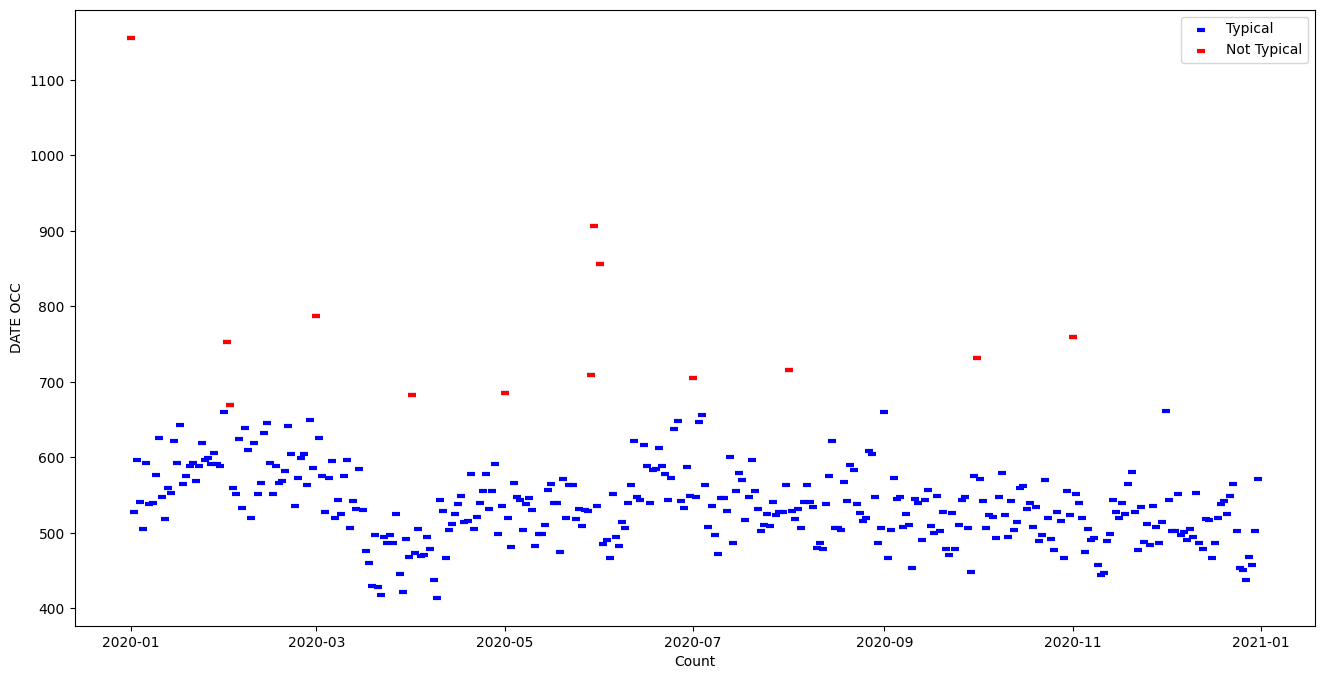

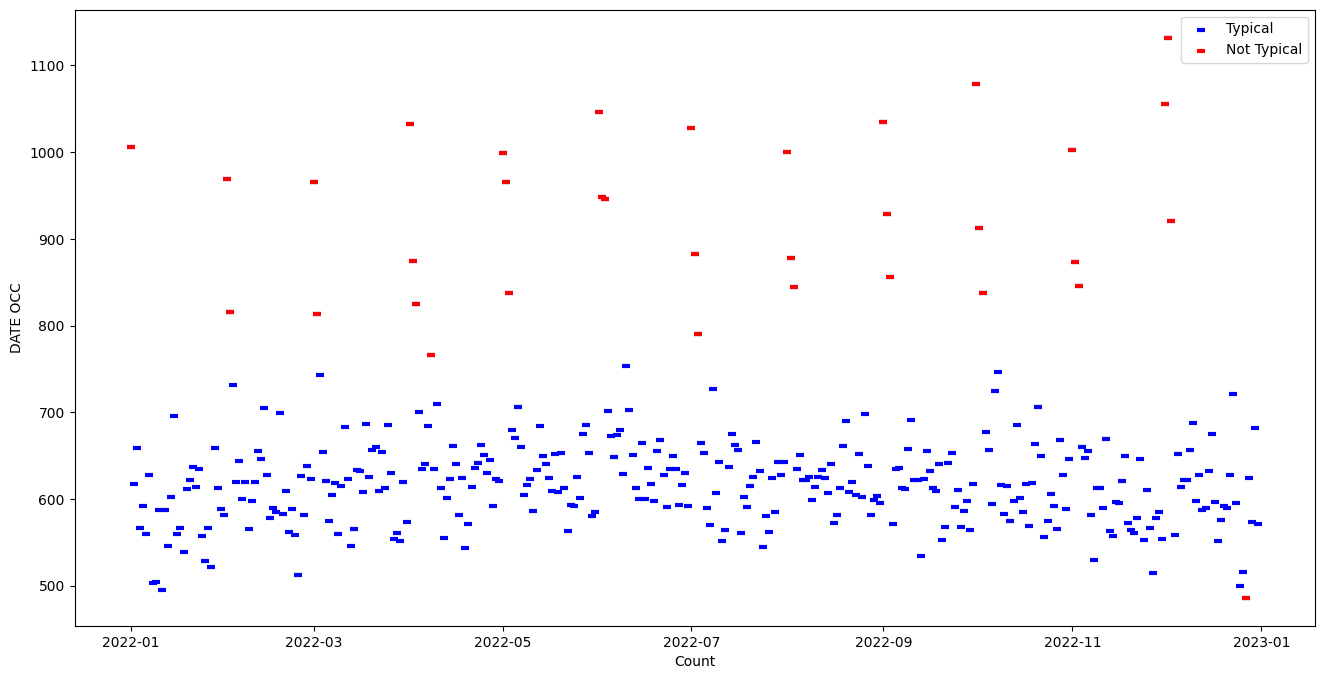

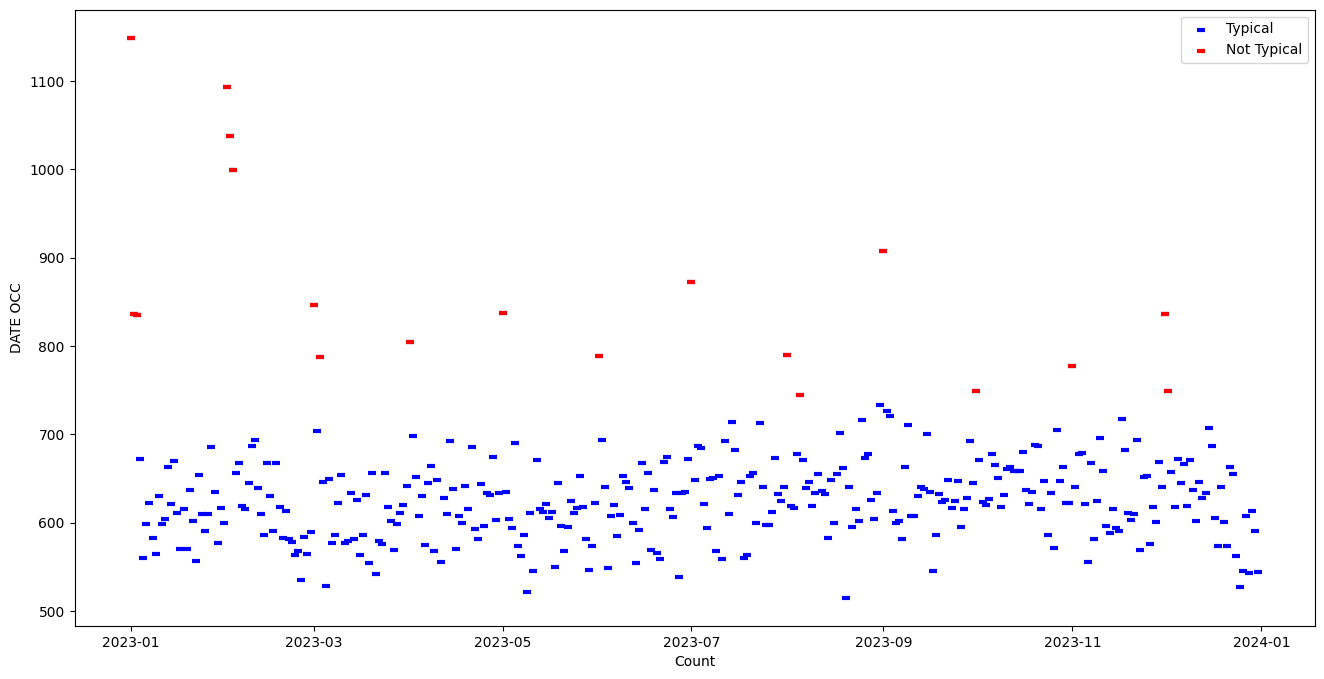

In [80]:
histogram_typical(crime_final, year=2020)
histogram_typical(crime_final, year=2022)
histogram_typical(crime_final, year=2023)

{-118.6676: 1, -118.6673: 2, -118.6672: 1, -118.6661: 1, -118.6652: 2, -118.6634: 1, -118.6623: 1, -118.6616: 1, -118.6612: 1, -118.6611: 1, -118.661: 1, -118.6605: 3, -118.6604: 1, -118.6602: 1, -118.6601: 7, -118.6599: 1, -118.659: 3, -118.6588: 1, -118.6585: 5, -118.6584: 1, -118.658: 1, -118.6579: 1, -118.6572: 2, -118.6569: 1, -118.6565: 1, -118.6562: 1, -118.6561: 5, -118.6559: 4, -118.6558: 2, -118.6556: 1, -118.6555: 2, -118.6554: 2, -118.6553: 2, -118.6551: 1, -118.6549: 2, -118.6548: 1, -118.6547: 1, -118.6545: 2, -118.6543: 3, -118.6542: 5, -118.6541: 2, -118.6539: 2, -118.6538: 1, -118.6537: 2, -118.6536: 10, -118.6535: 2, -118.6534: 2, -118.6533: 1, -118.6532: 2, -118.6531: 1, -118.653: 2, -118.6528: 2, -118.6526: 1, -118.6523: 7, -118.6522: 3, -118.6521: 1, -118.652: 2, -118.6519: 1, -118.6517: 1, -118.6511: 1, -118.651: 4, -118.6508: 1, -118.6507: 1, -118.6505: 1, -118.6504: 1, -118.6503: 3, -118.6502: 1, -118.6501: 1, -118.65: 4, -118.6499: 4, -118.6498: 1, -118.6496: 2

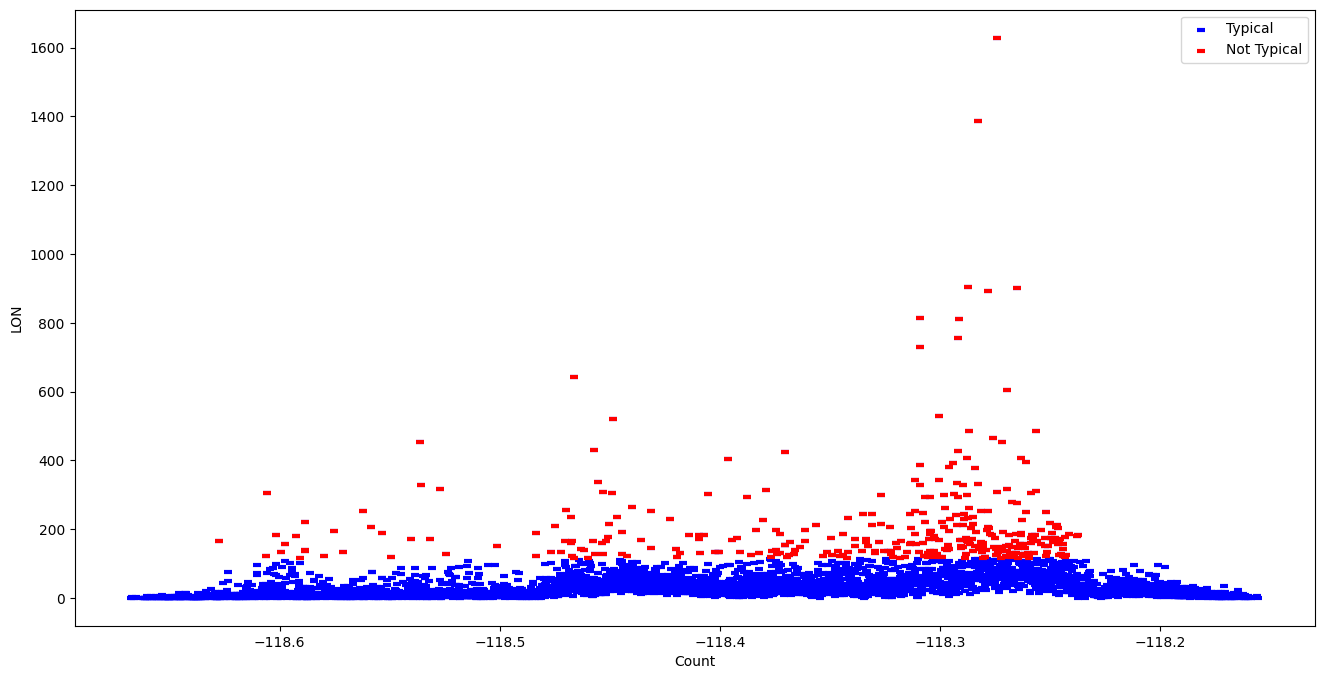

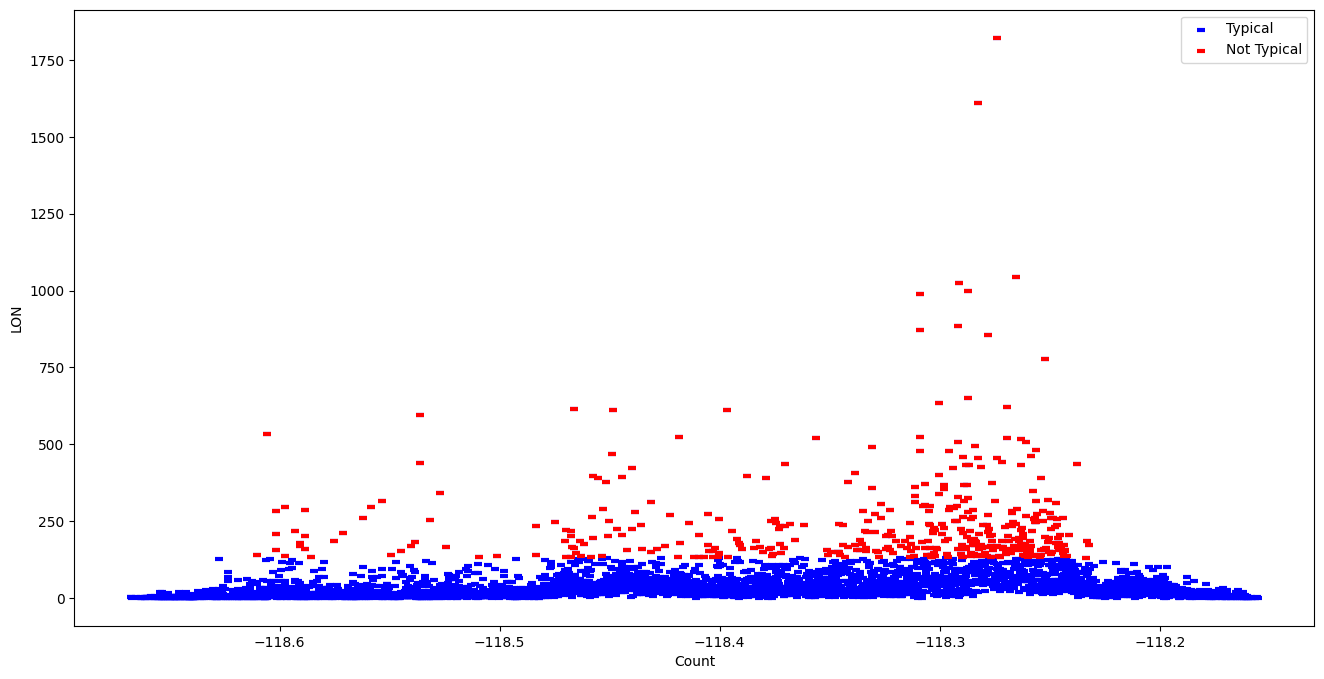

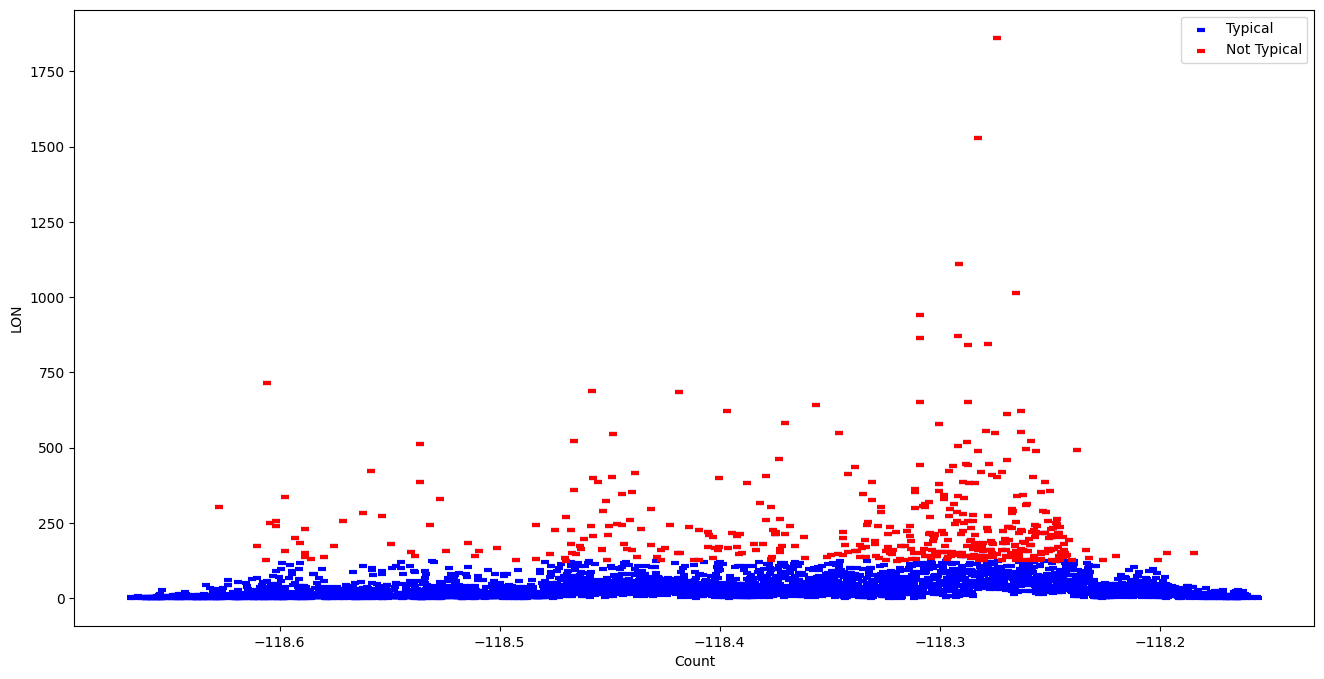

In [81]:
histogram_typical(crime_final, year=2020, column_name="LON")
histogram_typical(crime_final, year=2022, column_name="LON")
histogram_typical(crime_final, year=2023, column_name="LON")

{33.7064: 4, 33.7065: 2, 33.707: 15, 33.7071: 1, 33.7076: 1, 33.7079: 12, 33.7087: 9, 33.7088: 4, 33.7089: 1, 33.7091: 4, 33.7096: 22, 33.7101: 2, 33.7105: 6, 33.7106: 17, 33.7108: 2, 33.7109: 1, 33.7111: 12, 33.7112: 3, 33.7113: 2, 33.7115: 10, 33.7117: 3, 33.7119: 1, 33.7122: 1, 33.7125: 3, 33.7126: 2, 33.7134: 5, 33.7135: 3, 33.7136: 31, 33.7141: 1, 33.7142: 7, 33.7143: 12, 33.7144: 8, 33.7146: 1, 33.7147: 2, 33.7149: 2, 33.715: 1, 33.7152: 12, 33.7156: 1, 33.7157: 2, 33.7159: 2, 33.7161: 13, 33.7162: 1, 33.7163: 2, 33.7166: 4, 33.7167: 5, 33.7169: 1, 33.717: 11, 33.7171: 3, 33.7172: 6, 33.7173: 4, 33.7174: 2, 33.7175: 12, 33.7177: 2, 33.7178: 2, 33.7179: 12, 33.718: 1, 33.7181: 3, 33.7182: 6, 33.7183: 2, 33.7184: 1, 33.7185: 2, 33.7188: 5, 33.7189: 4, 33.719: 7, 33.7192: 4, 33.7194: 5, 33.7196: 1, 33.7197: 4, 33.7198: 1, 33.72: 1, 33.7201: 3, 33.7203: 6, 33.7204: 1, 33.7206: 26, 33.7207: 14, 33.7208: 5, 33.721: 2, 33.7211: 8, 33.7212: 9, 33.7213: 2, 33.7214: 9, 33.7215: 2, 33.7216:

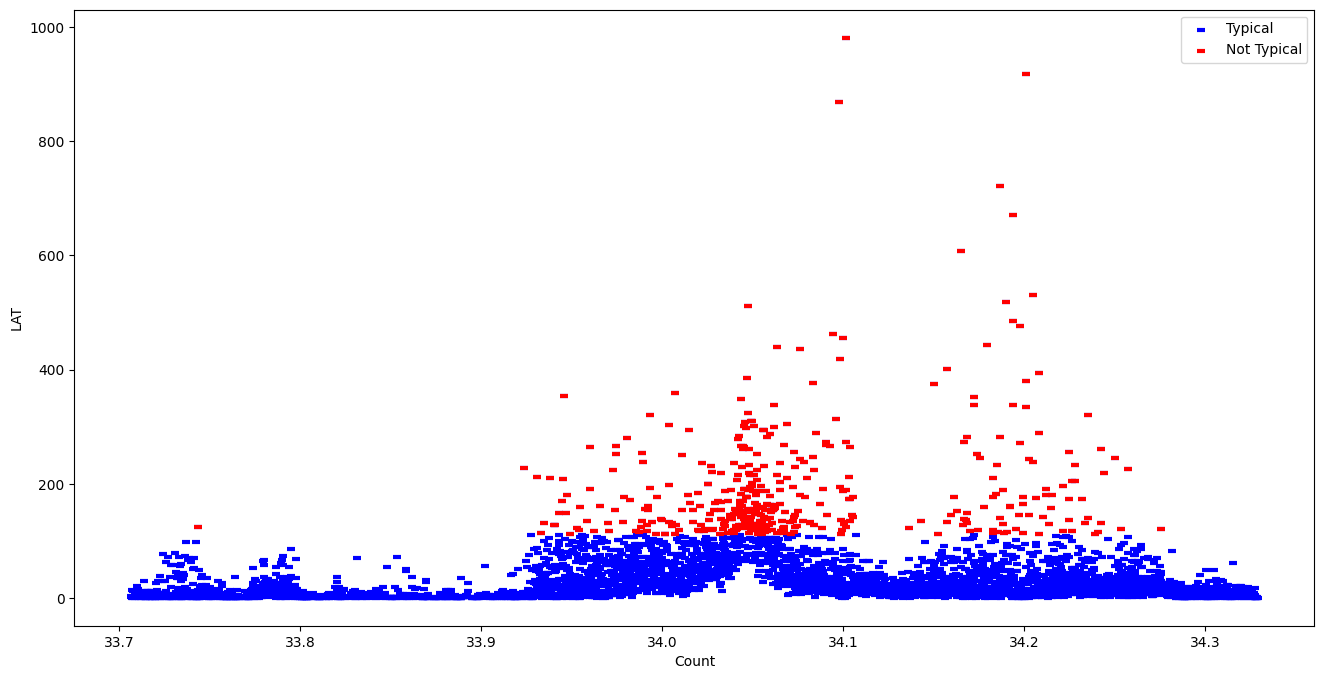

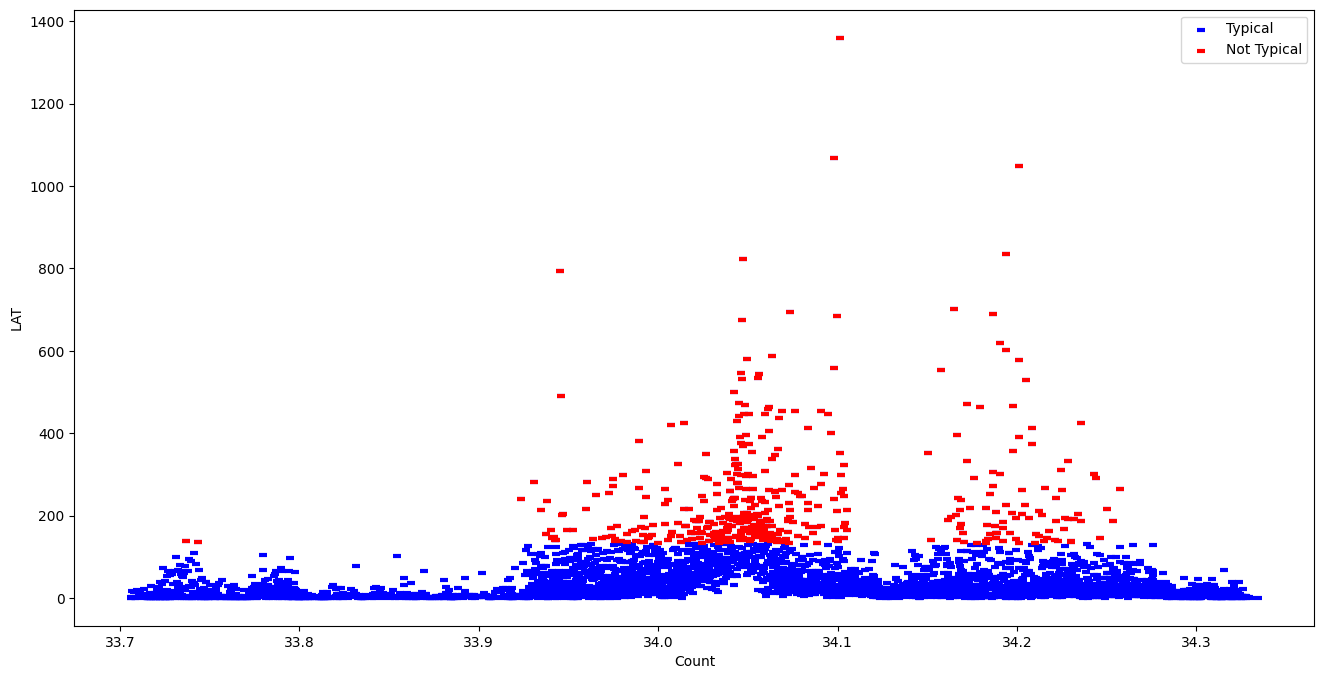

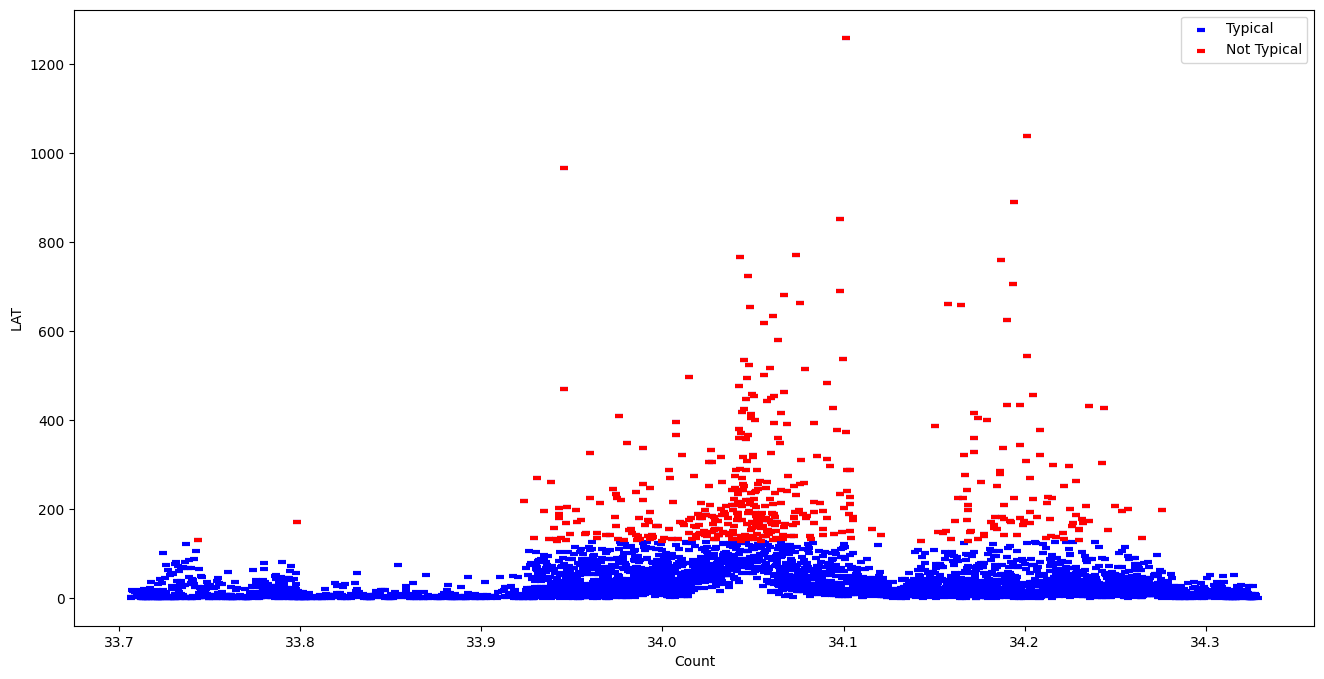

In [82]:
histogram_typical(crime_final, year=2020, column_name="LAT")
histogram_typical(crime_final, year=2022, column_name="LAT")
histogram_typical(crime_final, year=2023, column_name="LAT")

In [83]:
def delete_not_typical_from_years(df: pd.DataFrame, low: float = 25, up: float = 75, column = "DATE OCC"):
    years = [2020, 2022, 2023]
    temp = df.copy()
    crime_years = [temp[temp["DATE OCC"].dt.year == year] for year in years]

    for crime_year in crime_years:
        typical, _ = determine_if_typical(crime_year, low, up, column)
        temp = crime_year.copy()
        temp["DATE OCC"] = temp["DATE OCC"].dt.date
        # crime_year["DATE OCC"] = crime_year["DATE OCC"].dt.date

        for value in temp[column].unique():
            if typical[value] == 1:
                if column == "DATE OCC":
                    crime_year.drop(crime_year.index[(crime_year[column].dt.date == value)], axis=0, inplace=True)
                else:
                    crime_year.drop(crime_year.index[(crime_year[column] == value)], axis=0, inplace=True)
    
    crime_res = pd.concat([crime_years[0], crime_years[1], crime_years[2]])

    return crime_res

fixed_crime = delete_not_typical_from_years(crime_final)
print(f'Before {len(crime_final)}\nAfter {len(fixed_crime)}')
fixed_crime2 = delete_not_typical_from_years(crime_final, column="LON")
print(f'Before {len(crime_final)}\nAfter {len(fixed_crime2)}')
fixed_crime3 = delete_not_typical_from_years(crime_final, column="LAT")
print(f'Before {len(crime_final)}\nAfter {len(fixed_crime3)}')



{datetime.date(2020, 1, 1): 1156, datetime.date(2020, 1, 2): 527, datetime.date(2020, 1, 3): 596, datetime.date(2020, 1, 4): 541, datetime.date(2020, 1, 5): 505, datetime.date(2020, 1, 6): 593, datetime.date(2020, 1, 7): 538, datetime.date(2020, 1, 8): 539, datetime.date(2020, 1, 9): 576, datetime.date(2020, 1, 10): 625, datetime.date(2020, 1, 11): 547, datetime.date(2020, 1, 12): 518, datetime.date(2020, 1, 13): 560, datetime.date(2020, 1, 14): 553, datetime.date(2020, 1, 15): 621, datetime.date(2020, 1, 16): 592, datetime.date(2020, 1, 17): 643, datetime.date(2020, 1, 18): 565, datetime.date(2020, 1, 19): 575, datetime.date(2020, 1, 20): 589, datetime.date(2020, 1, 21): 593, datetime.date(2020, 1, 22): 568, datetime.date(2020, 1, 23): 588, datetime.date(2020, 1, 24): 619, datetime.date(2020, 1, 25): 596, datetime.date(2020, 1, 26): 599, datetime.date(2020, 1, 27): 591, datetime.date(2020, 1, 28): 606, datetime.date(2020, 1, 29): 591, datetime.date(2020, 1, 30): 589, datetime.date(202

In [84]:
fixed_final = pd.concat([fixed_crime, fixed_crime2, fixed_crime3], axis=1, join="inner")
print(len(fixed_final))
display(fixed_final)


221998


Date Rptd            DATE OCC  AREA   AREA NAME  Rpt Dist No  Crm Cd  \
6      2023-04-04 2020-07-03 09:00:00     1     Central          182     354   
7      2022-07-22 2020-05-12 11:10:00     3   Southwest          303     354   
9      2020-12-31 2020-12-31 12:20:00    19     Mission         1974     624   
16     2023-12-24 2020-01-09 12:00:00    13      Newton         1354     354   
23     2020-09-09 2020-09-09 06:30:00     4  Hollenbeck          413     510   
...           ...                 ...   ...         ...          ...     ...   
876859 2023-03-03 2023-03-02 06:20:00     8     West LA          889     354   
876860 2023-01-12 2023-01-12 12:40:00    11   Northeast         1107     440   
876864 2023-12-15 2023-12-14 11:05:00    16    Foothill         1608     210   
876865 2023-07-09 2023-07-06 12:00:00    11   Northeast         1115     745   
876868 2023-01-27 2023-01-26 18:00:00    16    Foothill         1663     740   

                                              Crm Cd Desc Vict Age  Vict Sex  \
6                                       THEFT OF IDENTITY       25         M   
7                                       THEFT OF IDENTITY       27         F   
9                                BATTERY - SIMPLE ASSAULT       26         M   
16                                      THEFT OF IDENTITY       23         M   
23                                       VEHICLE - STOLEN        0       NaN   
...                                                   ...      ...       ...   
876859                                  THEFT OF IDENTITY       25         M   
876860                 THEFT PLAIN - PETTY ($950 & UNDER)       42         M   
876864                                            ROBBERY       65         F   
876865           VANDALISM - MISDEAMEANOR ($399 OR UNDER)       47         M   
876868  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...       23         M   

       Vict Descent  ...   AREA NAME  Rpt Dist No  Crm Cd  \
6                 H  ...     Central          182     354   
7                 B  ...   Southwest          303     354   
9                 H  ...     Mission         1974     624   
16                B  ...      Newton         1354     354   
23              NaN  ...  Hollenbeck          413     510   
...             ...  ...         ...          ...     ...   
876859            W  ...     West LA          889     354   
876860            W  ...   Northeast         1107     440   
876864            W  ...    Foothill         1608     210   
876865            F  ...   Northeast         1115     745   
876868            H  ...    Foothill         1663     740   

                                              Crm Cd Desc Vict Age  Vict Sex  \
6                                       THEFT OF IDENTITY       25         M   
7                                       THEFT OF IDENTITY       27         F   
9                                BATTERY - SIMPLE ASSAULT       26         M   
16                                      THEFT OF IDENTITY       23         M   
23                                       VEHICLE - STOLEN        0       NaN   
...                                                   ...      ...       ...   
876859                                  THEFT OF IDENTITY       25         M   
876860                 THEFT PLAIN - PETTY ($950 & UNDER)       42         M   
876864                                            ROBBERY       65         F   
876865           VANDALISM - MISDEAMEANOR ($399 OR UNDER)       47         M   
876868  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...       23         M   

       Vict Descent                                  LOCATION      LAT  \
6                 H   1100 S  GRAND                        AV  34.0415   
7                 B   2500 S  SYCAMORE                     AV  34.0335   
9                 H   9000    CEDROS                       AV  34.2336   
16                B   4000    WALL                         ST  34.0112   
23              NaN   

897 1390


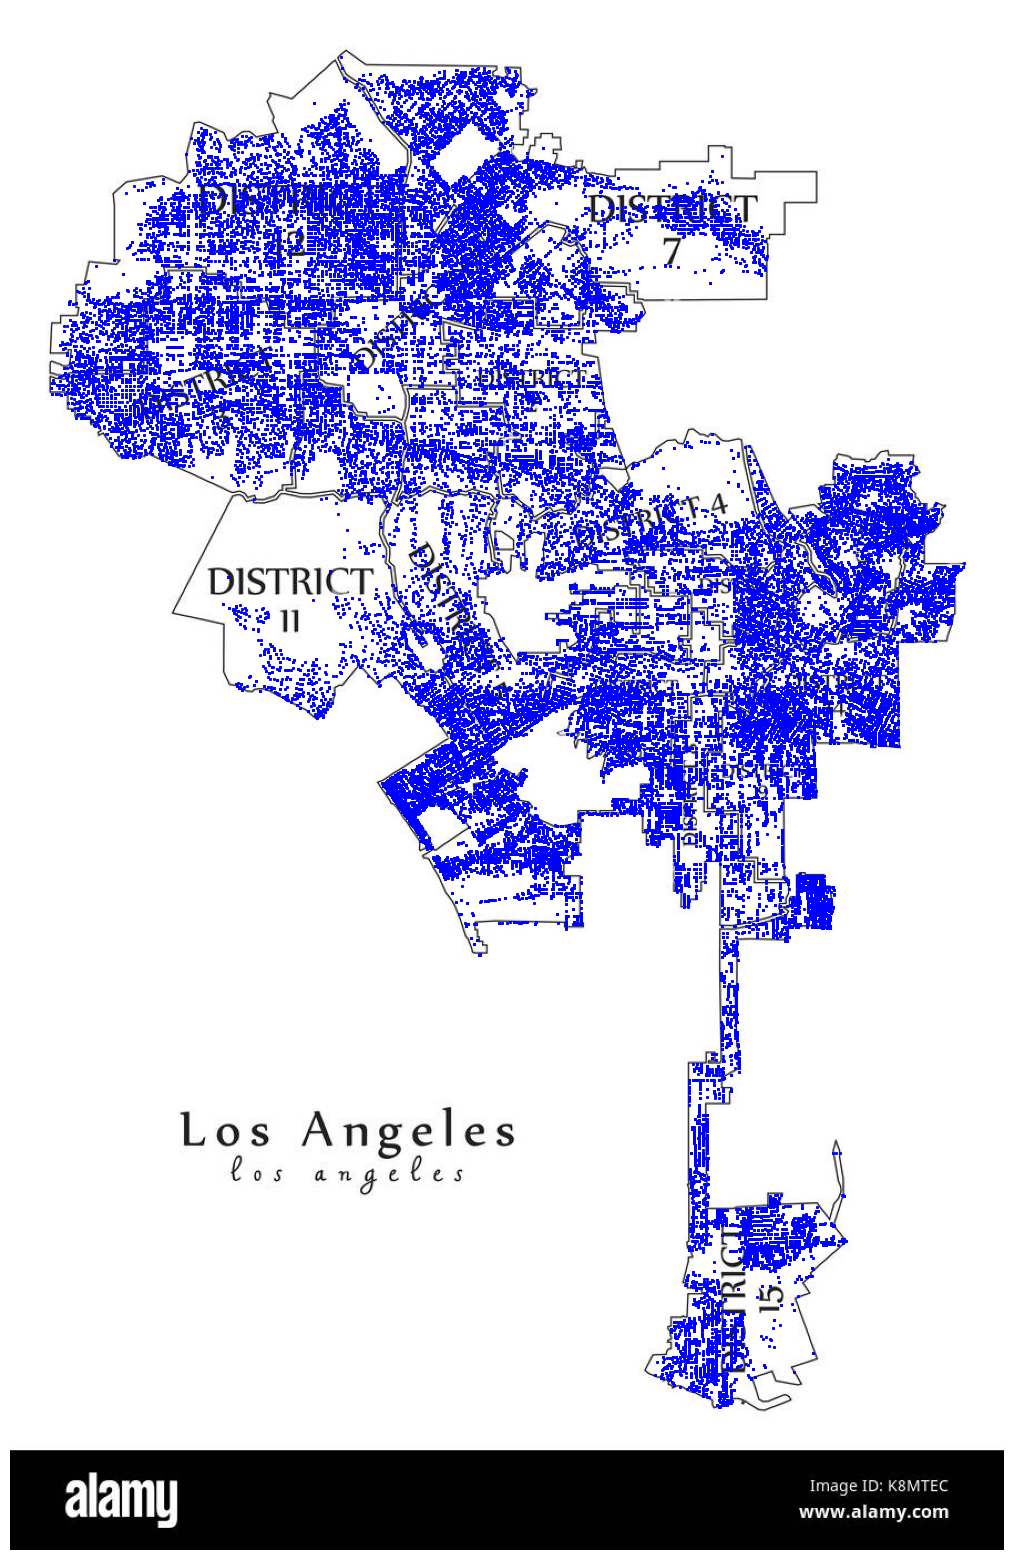

In [85]:
image_la(fixed_final)

In [86]:
from scipy.stats import chi2

def determine_if_typical_mahalanobis(data: pd.DataFrame, threshold: float = 0.99):

    #preprocess time
    temp = data.copy()
    process_data = data[["DATE OCC", "LON", "LAT"]].copy()
    min_date = process_data["DATE OCC"].min()
    process_data["DATE OCC"] = (process_data["DATE OCC"] - min_date).dt.days
    print(process_data.dtypes)
    data_np = process_data.to_numpy()

    # Obliczenie średniej i macierzy kowariancji
    mean = np.mean(data_np, axis=0)
    cov_matrix = np.cov(data_np, rowvar=False)

    # odwrotność macierzy kowariancji
    cov_inv = np.linalg.inv(cov_matrix)

    # odległość Mahalanobisa dla każdego punktu
    distances = np.array([
        np.sqrt((x - mean) @ cov_inv @ (x - mean).T)
        for x in data_np
    ])

    # Wartość krytyczna
    critical = chi2.ppf(threshold, df=data_np.shape[1])

    mask = distances <= np.sqrt(critical)

    clean_data = temp[mask]


    return clean_data, pd.Series(distances, index=temp.index)

In [87]:
fixed_clean, distances = determine_if_typical_mahalanobis(crime_final, 0.95)

print(f'Before {len(crime_final)} vs After {len(fixed_clean)}')


DATE OCC      int64
LON         float64
LAT         float64
dtype: object
Before 666273 vs After 635834


In [88]:
def histogram_typical_mahalanobis(main: pd.DataFrame, cleaned: pd.DataFrame, column_name="DATE OCC", title="", year=2022):
    crime_df = main.copy()
    crime_clean = cleaned.copy()
    crime_df = crime_df[crime_df['DATE OCC'].dt.year == year]
    crime_clean = crime_clean[crime_clean['DATE OCC'].dt.year == year]



    _, counted = determine_if_typical(crime_df, 25, 75, column_name)

    # print(crime_df.dtypes)
    # print(crime_clean.dtypes)

    crime_df['DATE OCC'] = crime_df['DATE OCC'].dt.date
    crime_clean['DATE OCC'] = crime_clean['DATE OCC'].dt.date
    # display(crime_clean)
    fig, ax = plt.subplots(figsize=(16, 8))
    ax.set_title(title)
    ax.set_xlabel('Count')
    ax.set_ylabel(column_name)
    # ax.set_xlim(lower - 0.5, upper + 0.5)

    ax.scatter(list(counted.keys()), list(counted.values()), color="blue", marker="|", linewidths=3)

    ax.legend(['Typical', 'Not Typical'])

{datetime.date(2022, 1, 1): 1006, datetime.date(2022, 1, 2): 617, datetime.date(2022, 1, 3): 659, datetime.date(2022, 1, 4): 566, datetime.date(2022, 1, 5): 592, datetime.date(2022, 1, 6): 560, datetime.date(2022, 1, 7): 627, datetime.date(2022, 1, 8): 503, datetime.date(2022, 1, 9): 504, datetime.date(2022, 1, 10): 587, datetime.date(2022, 1, 11): 495, datetime.date(2022, 1, 12): 587, datetime.date(2022, 1, 13): 546, datetime.date(2022, 1, 14): 602, datetime.date(2022, 1, 15): 696, datetime.date(2022, 1, 16): 559, datetime.date(2022, 1, 17): 567, datetime.date(2022, 1, 18): 539, datetime.date(2022, 1, 19): 611, datetime.date(2022, 1, 20): 622, datetime.date(2022, 1, 21): 637, datetime.date(2022, 1, 22): 614, datetime.date(2022, 1, 23): 635, datetime.date(2022, 1, 24): 557, datetime.date(2022, 1, 25): 528, datetime.date(2022, 1, 26): 567, datetime.date(2022, 1, 27): 522, datetime.date(2022, 1, 28): 659, datetime.date(2022, 1, 29): 613, datetime.date(2022, 1, 30): 588, datetime.date(202

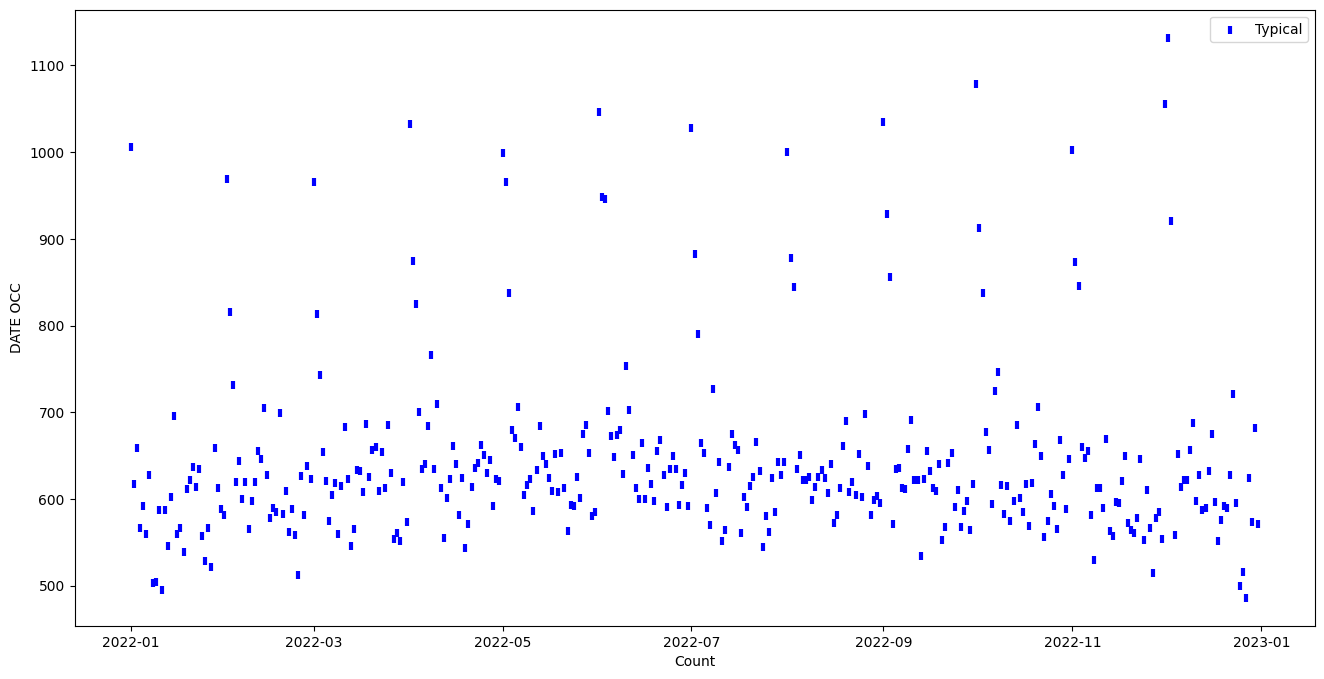

In [89]:
histogram_typical_mahalanobis(crime_final, fixed_clean)

{datetime.date(2022, 1, 1): 1006, datetime.date(2022, 1, 2): 617, datetime.date(2022, 1, 3): 659, datetime.date(2022, 1, 4): 566, datetime.date(2022, 1, 5): 592, datetime.date(2022, 1, 6): 560, datetime.date(2022, 1, 7): 627, datetime.date(2022, 1, 8): 503, datetime.date(2022, 1, 9): 504, datetime.date(2022, 1, 10): 587, datetime.date(2022, 1, 11): 495, datetime.date(2022, 1, 12): 587, datetime.date(2022, 1, 13): 546, datetime.date(2022, 1, 14): 602, datetime.date(2022, 1, 15): 696, datetime.date(2022, 1, 16): 559, datetime.date(2022, 1, 17): 567, datetime.date(2022, 1, 18): 539, datetime.date(2022, 1, 19): 611, datetime.date(2022, 1, 20): 622, datetime.date(2022, 1, 21): 637, datetime.date(2022, 1, 22): 614, datetime.date(2022, 1, 23): 635, datetime.date(2022, 1, 24): 557, datetime.date(2022, 1, 25): 528, datetime.date(2022, 1, 26): 567, datetime.date(2022, 1, 27): 522, datetime.date(2022, 1, 28): 659, datetime.date(2022, 1, 29): 613, datetime.date(2022, 1, 30): 588, datetime.date(202

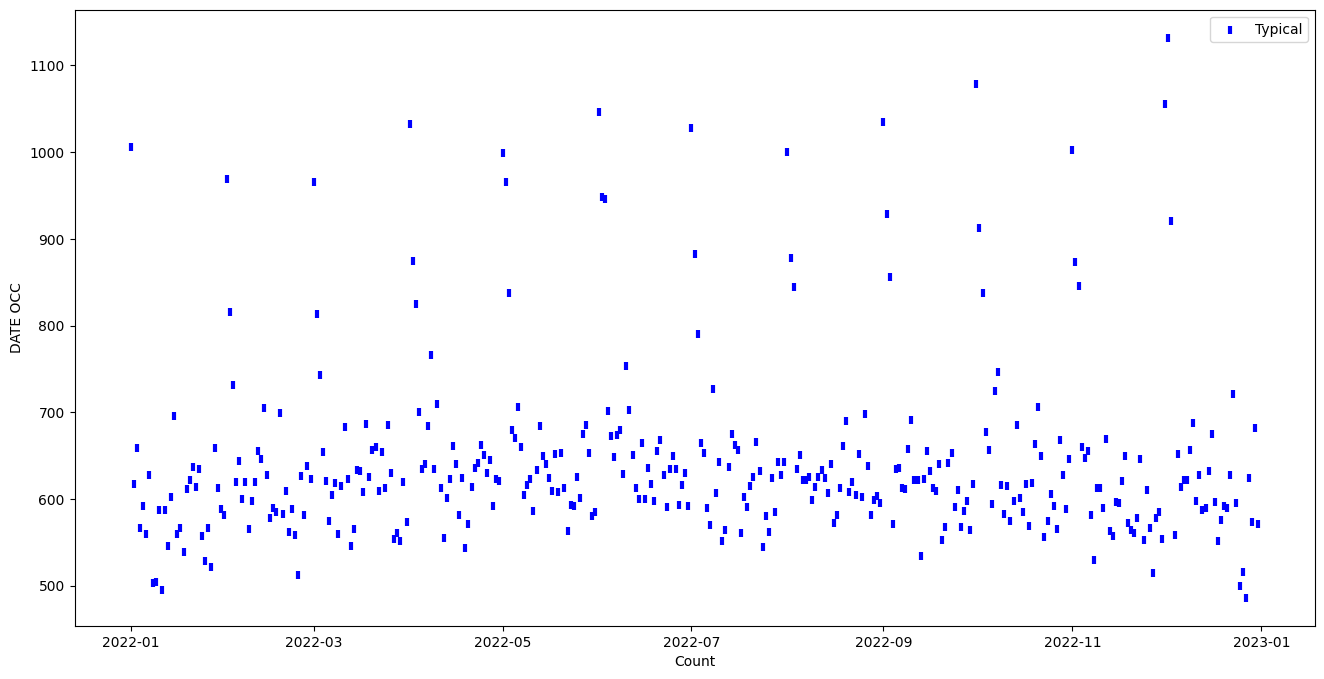

In [90]:
histogram_typical_mahalanobis(crime_final, fixed_clean)

In [91]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

def dates_to_floats(dates, min_date):
    dates = [(dates[i] - min_date).days for i in range(len(dates))]
    dates = np.array(dates)
    dates = dates / max(dates)
    return dates

def floats_to_dates(floats, min_date, max_date):
    total_days = (max_date - min_date).days
    day_offsets = (floats * total_days).astype(int)
    dates = [min_date + pd.Timedelta(days=offset) for offset in day_offsets]
    return dates

def float_to_date(float, min_date, max_date):
    total_days = (max_date - min_date).days
    day_offset = int(float * total_days)
    date = min_date + pd.Timedelta(days=day_offset)
    return date

def normalize_position(x):
    x_max, x_min = max(x), min(x)
    x_diff = x_max - x_min
    return (x - x_min) / x_diff

def unormalize_position(x, x_min, x_max):
    x_diff = x_max - x_min
    return x * x_diff + x_min

def k_neighbors(df):
    temp = df.copy()
    temp.reset_index(drop=True, inplace=True)

    dates = temp['DATE OCC'].dt.date.to_numpy()
    
    min_date = min(dates)
    max_date = max(dates)
    
    dates = dates_to_floats(dates, min_date)
    
    x = temp['LAT'].values
    x_max, x_min = max(x), min(x)
    x = normalize_position(x)
    
    y = temp['LON'].values
    y_max, y_min = max(y), min(y)
    y = normalize_position(y)
    
    data = np.array(list(zip(dates, x, y)))
    
    no_clusters = 50
    km = KMeans(n_clusters=no_clusters)
    km.fit(data)
    argmin, distances = pairwise_distances_argmin_min(data, km.cluster_centers_)
    
    filtered_indexes_all = np.array([])
    for center in range(max(argmin) + 1):
        center_indexes = []
        center_distances = distances[argmin == center]
        for i in range(len(data)):
            if argmin[i] != center:
                continue
            center_indexes.append(i)
            
        center_indexes = np.array(center_indexes)
        
        Q3 = np.percentile(center_distances, 75)
        Q1 = np.percentile(center_distances, 25)
        IQR = Q3 - Q1;
        
        filtered_indexes = center_indexes[(center_distances <= Q3 + 1.5 * IQR) & (center_distances >= Q1 - 1.5 * IQR)]
        
        filtered_indexes_all = np.concatenate((filtered_indexes_all, filtered_indexes))
    
    #filtered_data_all = [[float_to_date(row[0], min_date, max_date), unormalize_position(row[1], x_min, x_max), unormalize_position(row[2], y_min, y_max)] for row in filtered_data_all]
    #print(float_to_date(filtered_data_all[0][0], min_date, max_date))
    cluster_centers = [[float_to_date(row[0], min_date, max_date), unormalize_position(row[1], x_min, x_max), unormalize_position(row[2], y_min, y_max)] for row in km.cluster_centers_]
    
    return cluster_centers, temp.iloc[filtered_indexes_all]
            
    

In [92]:
display(crime_final)

Date Rptd            DATE OCC  AREA   AREA NAME  Rpt Dist No  Crm Cd  \
0      2020-03-01 2020-03-01 21:30:00     7    Wilshire          784     510   
1      2020-02-09 2020-02-08 18:00:00     1     Central          182     330   
2      2020-11-11 2020-11-04 17:00:00     3   Southwest          356     480   
3      2023-05-10 2020-03-10 20:37:00     9    Van Nuys          964     343   
4      2022-08-18 2020-08-17 12:00:00     6   Hollywood          666     354   
...           ...                 ...   ...         ...          ...     ...   
876869 2023-03-22 2023-03-22 10:00:00    16    Foothill         1602     230   
876870 2023-10-02 2023-09-25 22:00:00    17  Devonshire         1798     740   
876871 2023-07-02 2023-07-01 00:01:00     1     Central          154     352   
876872 2023-03-05 2023-03-05 09:00:00     9    Van Nuys          914     745   
876873 2023-11-10 2023-11-09 23:00:00     3   Southwest          395     331   

                                              Crm Cd Desc  Vict Age Vict Sex  \
0                                        VEHICLE - STOLEN         0        M   
1                                   BURGLARY FROM VEHICLE        47        M   
2                                           BIKE - STOLEN        19        X   
3                SHOPLIFTING-GRAND THEFT ($950.01 & OVER)        19        M   
4                                       THEFT OF IDENTITY        28        M   
...                                                   ...       ...      ...   
876869     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT        25        F   
876870  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...        44        F   
876871                                         PICKPOCKET        24        F   
876872           VANDALISM - MISDEAMEANOR ($399 OR UNDER)        53        F   
876873  THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...        38        M   

       Vict Descent                                  LOCATION      LAT  \
0                 O   1900 S  LONGWOOD                     AV  34.0375   
1                 O   1000 S  FLOWER                       ST  34.0444   
2                 X   1400 W  37TH                         ST  34.0210   
3                 O  14000    RIVERSIDE                    DR  34.1576   
4                 H                         1900    TRANSIENT  34.0944   
...             ...                                       ...      ...   
876869            H  12800    FILMORE                      ST  34.2790   
876870            H   8800    HASKELL                      AV  34.2302   
876871            H    500 S  MAIN                         ST  34.0467   
876872            H  14500    HARTLAND                     ST  34.1951   
876873            W   4100 S  HOBART                       BL  34.0091   

             LON  
0      -118.3506  
1      -118.2628  
2      -118.3002  
3      -118.4387  
4      -118.3277  
...          ...  
876869 -118.4116  
876870 -118.4764  
876871 -118.2485  
876872 -118.4487  
876873 -118.3078  

[666273 rows x 13 columns]

In [93]:
cluster_centers, aaa = k_neighbors(crime_final)

print(cluster_centers)


[[datetime.date(2020, 5, 1), np.float64(34.17960583057167), np.float64(-118.38584391052196)], [datetime.date(2023, 4, 5), np.float64(34.056739391538585), np.float64(-118.26883021311995)], [datetime.date(2022, 4, 28), np.float64(34.20682150561143), np.float64(-118.57640879609386)], [datetime.date(2020, 4, 10), np.float64(34.051694176746004), np.float64(-118.35571493367148)], [datetime.date(2022, 10, 18), np.float64(33.950958313834455), np.float64(-118.27319861801696)], [datetime.date(2020, 10, 9), np.float64(34.07158922515561), np.float64(-118.33781730700436)], [datetime.date(2023, 9, 3), np.float64(34.004979793579516), np.float64(-118.42643413980296)], [datetime.date(2022, 7, 5), np.float64(34.27496350275567), np.float64(-118.44480944070219)], [datetime.date(2022, 6, 29), np.float64(33.770140456570154), np.float64(-118.2852347884187)], [datetime.date(2023, 1, 20), np.float64(34.197184808376136), np.float64(-118.45567280389832)], [datetime.date(2020, 4, 2), np.float64(34.204883677461424

In [179]:
from sklearn.neighbors import NearestNeighbors

def knn_remove(df, threshold=0.01):
    temp = df.copy()
    temp.reset_index(drop=True, inplace=True)

    dates = temp['DATE OCC'].dt.date.to_numpy()
    
    min_date = min(dates)
    max_date = max(dates)
    
    dates = dates_to_floats(dates, min_date)
    
    x = temp['LAT'].values
    x_max, x_min = max(x), min(x)
    x = normalize_position(x)
    
    y = temp['LON'].values
    y_max, y_min = max(y), min(y)
    y = normalize_position(y)
    
    data = np.array(list(zip(dates, x, y)))
    
    knn = NearestNeighbors(n_neighbors=10).fit(data)
    neigh_dist, neigh_ind = knn.kneighbors(data)
    neigh_dist, neigh_ind = np.array(neigh_dist), np.array(neigh_ind)
    
    max_dist = np.max(neigh_dist, axis=1)
    
    sorted_indices = np.argsort(max_dist)
    
    for i in range(len(sorted_indices)):
        if max_dist[sorted_indices[i]] > threshold:
            break
        
    normal_indices = sorted_indices[:i]
    outlier_indices = sorted_indices[i:]
    print(len(normal_indices) / len(sorted_indices) * 100)
    return normal_indices, outlier_indices
    
    
    

99.17226122025056


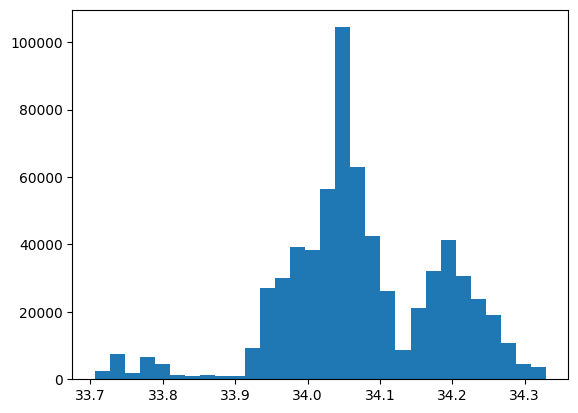

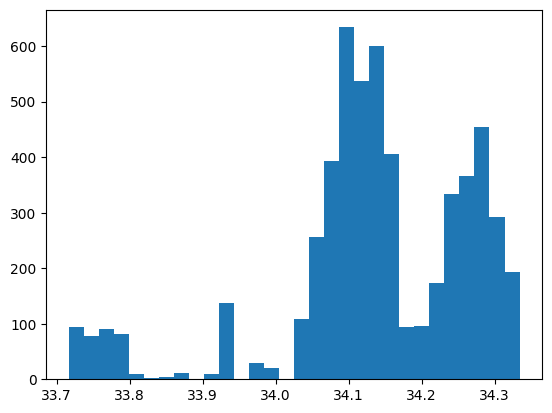

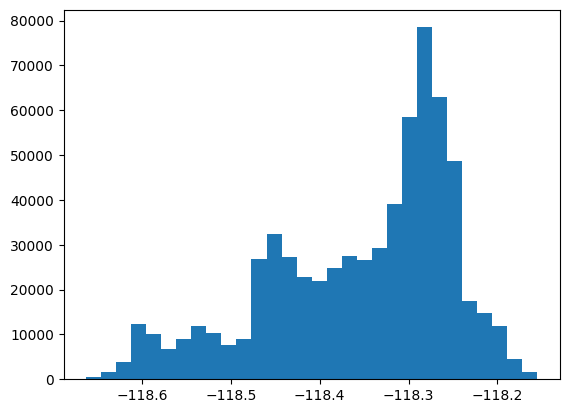

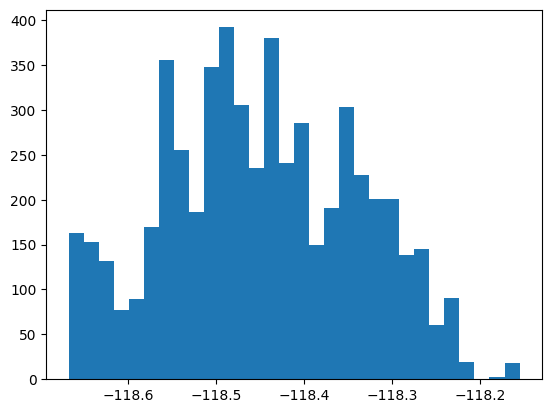

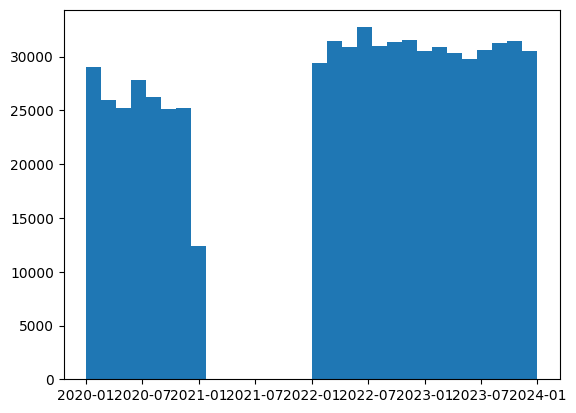

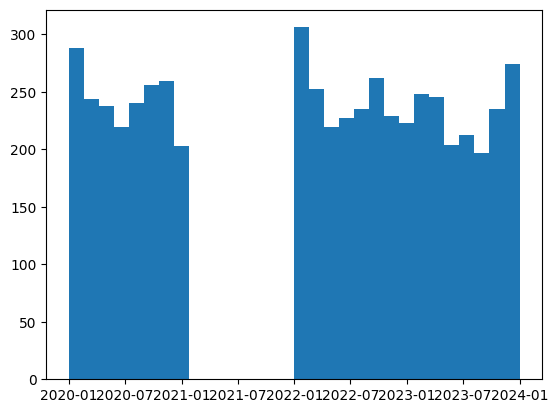

In [188]:
normal_indices, outlier_indices = knn_remove(crime_final, threshold=0.02)

normal_cf = crime_final.iloc[normal_indices]
outlier_cf = crime_final.iloc[outlier_indices]

plt.hist(normal_cf['LAT'].values, bins=30)
plt.show()

plt.hist(outlier_cf['LAT'].values, bins=30)
plt.show()

plt.hist(normal_cf['LON'].values, bins=30)
plt.show()

plt.hist(outlier_cf['LON'].values, bins=30)
plt.show()

normal_dates = normal_cf['DATE OCC'].dt.date.to_numpy()
dates = dates_to_floats(normal_dates, min(normal_dates))
outlier_dates = outlier_cf['DATE OCC'].dt.date.to_numpy()
dates = dates_to_floats(outlier_dates, min(outlier_dates))

plt.hist(normal_dates, bins=30)
plt.show()

plt.hist(outlier_dates, bins=30)
plt.show()
